**EFFICIENT NET**

In [1]:
pip install torch torchvision scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import time  # Added for tracking training time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, accuracy_score

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 32
num_epochs = 30
learning_rate = 0.001
num_classes = 3  # Change based on your dataset (e.g., healthy, alternaria, straw mite)

# Data Augmentation and Preprocessing
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),  # EfficientNet requires 224x224 images
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load Dataset
data_dir = "path_to_your_dataset"  # Replace with your dataset path
image_datasets = {
    "train": datasets.ImageFolder(root=f"/kaggle/input/leaf-data/Leaf_Dataset/Train", transform=data_transforms["train"]),
    "val": datasets.ImageFolder(root=f"/kaggle/input/leaf-data/Leaf_Dataset/Test", transform=data_transforms["val"]),
}
dataloaders = {
    "train": DataLoader(image_datasets["train"], batch_size=batch_size, shuffle=True),
    "val": DataLoader(image_datasets["val"], batch_size=batch_size, shuffle=False),
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
print(f"Classes: {class_names}")

# Load Pretrained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # Update classifier
model = model.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Function
def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        start_time = time.time()  # Start timing the epoch

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        # Calculate and display epoch training time
        epoch_time = time.time() - start_time
        print(f"Epoch {epoch + 1} completed in {epoch_time:.2f} seconds.\n")

    print(f"Best Val Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Train the Model
model = train_model(model, criterion, optimizer, num_epochs)

# Save the Model
torch.save(model.state_dict(), "efficientnet_b0.pth")
print("Model saved!")

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))
    print("Accuracy:", accuracy_score(all_labels, all_preds))

evaluate_model(model, dataloaders["val"])


Using device: cuda
Classes: ['alternaria', 'healthy', 'strawmite']


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 139MB/s] 


Epoch 1/30
----------


KeyboardInterrupt: 

In [ ]:
import time  # Added for tracking training time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, accuracy_score
import os
import random
import numpy as np
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 32
num_epochs = 30
learning_rate = 0.001
num_classes = 3  # Change based on your dataset (e.g., healthy, alternaria, straw mite)

# Data Augmentation and Preprocessing
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),  # EfficientNet requires 224x224 images
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load Dataset
data_dir = "/kaggle/input/leaf-data/Leaf_Dataset"  # Replace with your dataset path
image_datasets = {
    "train": datasets.ImageFolder(root=f"/kaggle/input/leaf-data/Leaf_Dataset/Train", transform=data_transforms["train"]),
    "val": datasets.ImageFolder(root=f"/kaggle/input/leaf-data/Leaf_Dataset/Test", transform=data_transforms["val"]),
}
dataloaders = {
    "train": DataLoader(image_datasets["train"], batch_size=batch_size, shuffle=True),
    "val": DataLoader(image_datasets["val"], batch_size=batch_size, shuffle=False),
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
print(f"Classes: {class_names}")

# Load Pretrained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # Update classifier
model = model.to(device)

# Print model size and trainable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
model_size = sum(p.element_size() * p.numel() for p in model.parameters()) / (1024 ** 2)  # in MB
print(f"Model size: {model_size:.2f} MB")
print(f"Trainable parameters: {num_params}")

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Function
def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    total_train_time = 0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        start_time = time.time()  # Start timing the epoch

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        # Calculate and display epoch training time
        epoch_time = time.time() - start_time
        total_train_time += epoch_time
        print(f"Epoch {epoch + 1} completed in {epoch_time:.2f} seconds.\n")

    avg_epoch_time = total_train_time / num_epochs
    print(f"Average training time per epoch: {avg_epoch_time:.2f} seconds")
    print(f"Best Val Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Train the Model
model = train_model(model, criterion, optimizer, num_epochs)

# Save the Model
torch.save(model.state_dict(), "efficientnet_b0.pth")
print("Model saved!")

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names,digits=3))
    print("Accuracy:", accuracy_score(all_labels, all_preds))

evaluate_model(model, dataloaders["val"])


Using device: cuda
Classes: ['alternaria', 'healthy', 'strawmite']
Model size: 15.30 MB
Trainable parameters: 4011391
Epoch 1/30
----------


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train Loss: 0.3492 Acc: 0.8717
val Loss: 0.3346 Acc: 0.8505
Epoch 1 completed in 291.79 seconds.

Epoch 2/30
----------
train Loss: 0.2010 Acc: 0.9302
val Loss: 0.2082 Acc: 0.9435
Epoch 2 completed in 293.02 seconds.

Epoch 3/30
----------
train Loss: 0.1245 Acc: 0.9598
val Loss: 0.3875 Acc: 0.8904
Epoch 3 completed in 291.99 seconds.

Epoch 4/30
----------
train Loss: 0.1390 Acc: 0.9537
val Loss: 0.0870 Acc: 0.9801
Epoch 4 completed in 292.61 seconds.

Epoch 5/30
----------
train Loss: 0.1166 Acc: 0.9581
val Loss: 0.1165 Acc: 0.9668
Epoch 5 completed in 292.78 seconds.

Epoch 6/30
----------
train Loss: 0.0731 Acc: 0.9738
val Loss: 0.1131 Acc: 0.9834
Epoch 6 completed in 293.41 seconds.

Epoch 7/30
----------
train Loss: 0.0802 Acc: 0.9721
val Loss: 0.1686 Acc: 0.9701
Epoch 7 completed in 294.04 seconds.

Epoch 8/30
----------
train Loss: 0.0777 Acc: 0.9721
val Loss: 0.0938 Acc: 0.9834
Epoch 8 completed in 293.62 seconds.

Epoch 9/30
----------
train Loss: 0.0590 Acc: 0.9833
val Loss:

In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, accuracy_score
import os
import random
import numpy as np

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # Added for multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Additional environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

# Set seed before any model/data operations
set_seed(42)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 32
num_epochs = 30
learning_rate = 0.001
num_classes = 3

# Data Augmentation and Preprocessing
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load Dataset
data_dir = "/kaggle/input/leaf-data/Leaf_Dataset"
image_datasets = {
    "train": datasets.ImageFolder(root=f"/kaggle/input/leaf-data/Leaf_Dataset/Train", transform=data_transforms["train"]),
    "val": datasets.ImageFolder(root=f"/kaggle/input/leaf-data/Leaf_Dataset/Test", transform=data_transforms["val"]),
}

# Create generator for reproducible DataLoader
def worker_init_fn(worker_id):
    np.random.seed(42 + worker_id)

dataloaders = {
    "train": DataLoader(
        image_datasets["train"], 
        batch_size=batch_size, 
        shuffle=True,
        worker_init_fn=worker_init_fn,
        generator=torch.Generator().manual_seed(42)  # For reproducible shuffling
    ),
    "val": DataLoader(
        image_datasets["val"], 
        batch_size=batch_size, 
        shuffle=False,
        worker_init_fn=worker_init_fn
    ),
}

dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
print(f"Classes: {class_names}")

# Load Pretrained EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)

# Set seed again before modifying classifier to ensure reproducible initialization
torch.manual_seed(42)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model = model.to(device)

# Print model info
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
model_size = sum(p.element_size() * p.numel() for p in model.parameters()) / (1024 ** 2)
print(f"Model size: {model_size:.2f} MB")
print(f"Trainable parameters: {num_params}")

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Function
def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    total_train_time = 0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        start_time = time.time()

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        epoch_time = time.time() - start_time
        total_train_time += epoch_time
        print(f"Epoch {epoch + 1} completed in {epoch_time:.2f} seconds.\n")

    avg_epoch_time = total_train_time / num_epochs
    print(f"Average training time per epoch: {avg_epoch_time:.2f} seconds")
    print(f"Best Val Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Train the Model
model = train_model(model, criterion, optimizer, num_epochs)

# Save the Model
torch.save(model.state_dict(), "efficientnet_b0.pth")
print("Model saved!")

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names, digits=3))
    print("Accuracy:", accuracy_score(all_labels, all_preds))

evaluate_model(model, dataloaders["val"])

Using device: cuda
Classes: ['alternaria', 'healthy', 'strawmite']
Model size: 15.30 MB
Trainable parameters: 4011391
Epoch 1/30
----------
train Loss: 0.3918 Acc: 0.8454
val Loss: 0.1292 Acc: 0.9601
Epoch 1 completed in 302.30 seconds.

Epoch 2/30
----------
train Loss: 0.1692 Acc: 0.9425
val Loss: 0.1636 Acc: 0.9535
Epoch 2 completed in 307.80 seconds.

Epoch 3/30
----------
train Loss: 0.1500 Acc: 0.9492
val Loss: 0.3388 Acc: 0.9302
Epoch 3 completed in 306.69 seconds.

Epoch 4/30
----------
train Loss: 0.1300 Acc: 0.9559
val Loss: 0.1895 Acc: 0.9635
Epoch 4 completed in 307.78 seconds.

Epoch 5/30
----------
train Loss: 0.1145 Acc: 0.9615
val Loss: 0.0529 Acc: 0.9834
Epoch 5 completed in 306.49 seconds.

Epoch 6/30
----------
train Loss: 0.0816 Acc: 0.9738
val Loss: 0.0683 Acc: 0.9900
Epoch 6 completed in 304.32 seconds.

Epoch 7/30
----------
train Loss: 0.1117 Acc: 0.9660
val Loss: 0.0541 Acc: 0.9834
Epoch 7 completed in 304.22 seconds.

Epoch 8/30
----------
train Loss: 0.0655 A

**Resnet 50**
Model size: 15.30 MB
Trainable parameters: 4011391
Epoch 1/30
----------
train Loss: 0.3918 Acc: 0.8454
val Loss: 0.1292 Acc: 0.9601
Epoch 1 completed in 358.02 seconds.

In [1]:


import time  # Added for tracking training time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, accuracy_score
import os

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 32
num_epochs = 30
learning_rate = 0.001
num_classes = 3  # Change based on your dataset (e.g., healthy, alternaria, straw mite)

# Data Augmentation and Preprocessing
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),  # ResNet requires 224x224 images
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load Dataset
data_dir = "/kaggle/input/leaf-data/Leaf_Dataset"  # Replace with your dataset path
image_datasets = {
    "train": datasets.ImageFolder(root=f"{data_dir}/Train", transform=data_transforms["train"]),
    "val": datasets.ImageFolder(root=f"{data_dir}/Test", transform=data_transforms["val"]),
}
dataloaders = {
    "train": DataLoader(image_datasets["train"], batch_size=batch_size, shuffle=True),
    "val": DataLoader(image_datasets["val"], batch_size=batch_size, shuffle=False),
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
print(f"Classes: {class_names}")

# Load Pretrained ResNet-50
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Update the fully connected layer
model = model.to(device)

# Print model size and trainable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
model_size = sum(p.element_size() * p.numel() for p in model.parameters()) / (1024 ** 2)  # in MB
print(f"Model size: {model_size:.2f} MB")
print(f"Trainable parameters: {num_params}")

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Function
def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    total_train_time = 0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        start_time = time.time()  # Start timing the epoch

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        # Calculate and display epoch training time
        epoch_time = time.time() - start_time
        total_train_time += epoch_time
        print(f"Epoch {epoch + 1} completed in {epoch_time:.2f} seconds.\n")

    avg_epoch_time = total_train_time / num_epochs
    print(f"Average training time per epoch: {avg_epoch_time:.2f} seconds")
    print(f"Best Val Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Train the Model
model = train_model(model, criterion, optimizer, num_epochs)

# Save the Model
torch.save(model.state_dict(), "resnet50_leaf_classification.pth")
print("Model saved!")

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names,digits=3))
    print("Accuracy:", accuracy_score(all_labels, all_preds))

evaluate_model(model, dataloaders["val"])


Using device: cuda
Classes: ['alternaria', 'healthy', 'strawmite']


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 202MB/s]


Model size: 89.70 MB
Trainable parameters: 23514179
Epoch 1/30
----------
train Loss: 0.5355 Acc: 0.8052
val Loss: 0.4946 Acc: 0.8239
Epoch 1 completed in 349.04 seconds.

Epoch 2/30
----------
train Loss: 0.3330 Acc: 0.8800
val Loss: 0.6811 Acc: 0.7409
Epoch 2 completed in 304.58 seconds.

Epoch 3/30
----------
train Loss: 0.3599 Acc: 0.8666
val Loss: 0.9028 Acc: 0.8239
Epoch 3 completed in 306.99 seconds.

Epoch 4/30
----------
train Loss: 0.2808 Acc: 0.8962
val Loss: 0.4576 Acc: 0.8073
Epoch 4 completed in 308.42 seconds.

Epoch 5/30
----------
train Loss: 0.2483 Acc: 0.9040
val Loss: 0.3172 Acc: 0.8671
Epoch 5 completed in 308.25 seconds.

Epoch 6/30
----------
train Loss: 0.3137 Acc: 0.8901
val Loss: 0.1405 Acc: 0.9668
Epoch 6 completed in 309.43 seconds.

Epoch 7/30
----------
train Loss: 0.2663 Acc: 0.8996
val Loss: 0.2608 Acc: 0.9003
Epoch 7 completed in 310.51 seconds.

Epoch 8/30
----------
train Loss: 0.2127 Acc: 0.9224
val Loss: 0.1439 Acc: 0.9635
Epoch 8 completed in 311.5

**MobileNet V2**

In [2]:
import time  # Added for tracking training time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, accuracy_score
import os

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 32
num_epochs = 30
learning_rate = 0.001
num_classes = 3  # Change based on your dataset (e.g., healthy, alternaria, straw mite)

# Data Augmentation and Preprocessing
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),  # MobileNet-v2 requires 224x224 images
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load Dataset
data_dir = "/kaggle/input/leaf-data/Leaf_Dataset"  # Replace with your dataset path
image_datasets = {
    "train": datasets.ImageFolder(root=f"{data_dir}/Train", transform=data_transforms["train"]),
    "val": datasets.ImageFolder(root=f"{data_dir}/Test", transform=data_transforms["val"]),
}
dataloaders = {
    "train": DataLoader(image_datasets["train"], batch_size=batch_size, shuffle=True),
    "val": DataLoader(image_datasets["val"], batch_size=batch_size, shuffle=False),
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
print(f"Classes: {class_names}")

# Load Pretrained MobileNet-v2
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, num_classes)  # Update the classifier
model = model.to(device)

# Print model size and trainable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
model_size = sum(p.element_size() * p.numel() for p in model.parameters()) / (1024 ** 2)  # in MB
print(f"Model size: {model_size:.2f} MB")
print(f"Trainable parameters: {num_params}")

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Function
def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    total_train_time = 0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        start_time = time.time()  # Start timing the epoch

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        # Calculate and display epoch training time
        epoch_time = time.time() - start_time
        total_train_time += epoch_time
        print(f"Epoch {epoch + 1} completed in {epoch_time:.2f} seconds.\n")

    avg_epoch_time = total_train_time / num_epochs
    print(f"Average training time per epoch: {avg_epoch_time:.2f} seconds")
    print(f"Best Val Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Train the Model
model = train_model(model, criterion, optimizer, num_epochs)

# Save the Model
torch.save(model.state_dict(), "mobilenet_v2_leaf_classification.pth")
print("Model saved!")

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names, digits=3))
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy:.3f}")

evaluate_model(model, dataloaders["val"])


Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


Classes: ['alternaria', 'healthy', 'strawmite']


100%|██████████| 13.6M/13.6M [00:00<00:00, 196MB/s]


Model size: 8.50 MB
Trainable parameters: 2227715
Epoch 1/30
----------
train Loss: 0.3980 Acc: 0.8521
val Loss: 0.2200 Acc: 0.9468
Epoch 1 completed in 313.65 seconds.

Epoch 2/30
----------
train Loss: 0.2320 Acc: 0.9247
val Loss: 0.2077 Acc: 0.9070
Epoch 2 completed in 316.97 seconds.

Epoch 3/30
----------
train Loss: 0.1952 Acc: 0.9336
val Loss: 0.2089 Acc: 0.9535
Epoch 3 completed in 322.11 seconds.

Epoch 4/30
----------
train Loss: 0.1827 Acc: 0.9375
val Loss: 0.1402 Acc: 0.9635
Epoch 4 completed in 321.29 seconds.

Epoch 5/30
----------
train Loss: 0.1681 Acc: 0.9342
val Loss: 0.1573 Acc: 0.9568
Epoch 5 completed in 320.50 seconds.

Epoch 6/30
----------
train Loss: 0.1040 Acc: 0.9665
val Loss: 0.5117 Acc: 0.8239
Epoch 6 completed in 320.65 seconds.

Epoch 7/30
----------
train Loss: 0.1787 Acc: 0.9442
val Loss: 0.8395 Acc: 0.7641
Epoch 7 completed in 320.98 seconds.

Epoch 8/30
----------
train Loss: 0.1745 Acc: 0.9487
val Loss: 0.2295 Acc: 0.9269
Epoch 8 completed in 319.14 

**VIT B16**

In [1]:
import time  # Added for tracking training time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, accuracy_score
import os

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 32
num_epochs = 30
learning_rate = 0.001
num_classes = 3  # Change based on your dataset (e.g., healthy, alternaria, straw mite)

# Data Augmentation and Preprocessing
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),  # ViT requires 224x224 images
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

# Load Dataset
data_dir = "/kaggle/input/leaf-data/Leaf_Dataset"  # Replace with your dataset path
image_datasets = {
    "train": datasets.ImageFolder(root=f"{data_dir}/Train", transform=data_transforms["train"]),
    "val": datasets.ImageFolder(root=f"{data_dir}/Test", transform=data_transforms["val"]),
}
dataloaders = {
    "train": DataLoader(image_datasets["train"], batch_size=batch_size, shuffle=True),
    "val": DataLoader(image_datasets["val"], batch_size=batch_size, shuffle=False),
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
print(f"Classes: {class_names}")

# Load Pretrained ViT Model
model = models.vit_b_16(pretrained=True)  # Use ViT-Base-16
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)  # Update the classifier
model = model.to(device)

# Print model size and trainable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
model_size = sum(p.element_size() * p.numel() for p in model.parameters()) / (1024 ** 2)  # in MB
print(f"Model size: {model_size:.2f} MB")
print(f"Trainable parameters: {num_params}")

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# Training Function
def train_model(model, criterion, optimizer, num_epochs):
    best_model_wts = model.state_dict()
    best_acc = 0.0
    total_train_time = 0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 10)

        start_time = time.time()  # Start timing the epoch

        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        # Calculate and display epoch training time
        epoch_time = time.time() - start_time
        total_train_time += epoch_time
        print(f"Epoch {epoch + 1} completed in {epoch_time:.2f} seconds.\n")

    avg_epoch_time = total_train_time / num_epochs
    print(f"Average training time per epoch: {avg_epoch_time:.2f} seconds")
    print(f"Best Val Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Train the Model
model = train_model(model, criterion, optimizer, num_epochs)

# Save the Model
torch.save(model.state_dict(), "vit_b_16_leaf_classification.pth")
print("Model saved!")

# Evaluation
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names, digits=3))
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy:.3f}")

evaluate_model(model, dataloaders["val"])


Using device: cuda
Classes: ['alternaria', 'healthy', 'strawmite']


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 206MB/s] 


Model size: 327.30 MB
Trainable parameters: 85800963
Epoch 1/30
----------
train Loss: 1.1808 Acc: 0.4688
val Loss: 0.8576 Acc: 0.6080
Epoch 1 completed in 381.29 seconds.

Epoch 2/30
----------
train Loss: 0.9357 Acc: 0.5564
val Loss: 0.8117 Acc: 0.5847
Epoch 2 completed in 347.90 seconds.

Epoch 3/30
----------
train Loss: 0.8541 Acc: 0.6283
val Loss: 0.5372 Acc: 0.8405
Epoch 3 completed in 348.58 seconds.

Epoch 4/30
----------
train Loss: 0.7869 Acc: 0.6702
val Loss: 0.5014 Acc: 0.8405
Epoch 4 completed in 347.64 seconds.

Epoch 5/30
----------
train Loss: 0.6479 Acc: 0.7221
val Loss: 0.4385 Acc: 0.8140
Epoch 5 completed in 348.23 seconds.

Epoch 6/30
----------
train Loss: 0.6756 Acc: 0.7165
val Loss: 0.4157 Acc: 0.8704
Epoch 6 completed in 348.50 seconds.

Epoch 7/30
----------
train Loss: 0.5455 Acc: 0.7684
val Loss: 0.3550 Acc: 0.8704
Epoch 7 completed in 346.18 seconds.

Epoch 8/30
----------
train Loss: 0.4982 Acc: 0.7846
val Loss: 0.5171 Acc: 0.7542
Epoch 8 completed in 353.

In [ ]:
SpinahResSE


Epoch 1/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=1.0468, Acc=0.3289]


Train Loss: 1.1115, Train Accuracy: 0.4637
Validation Loss: 1.0468, Validation Accuracy: 0.3289

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.33      0.01      0.02        85
     healthy       0.29      0.02      0.03       120
   strawmite       0.33      1.00      0.50        96

    accuracy                           0.33       301
   macro avg       0.32      0.34      0.18       301
weighted avg       0.31      0.33      0.18       301



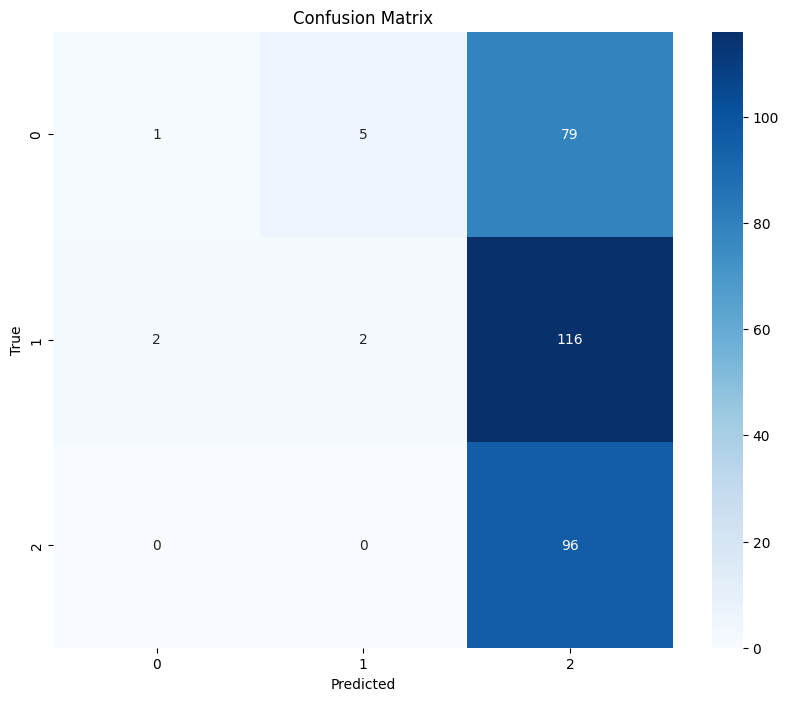


Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.8958, Acc=0.5548]


Train Loss: 1.0504, Train Accuracy: 0.4911
Validation Loss: 0.8958, Validation Accuracy: 0.5548

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.60      0.46      0.52        85
     healthy       0.74      0.27      0.39       120
   strawmite       0.50      1.00      0.66        96

    accuracy                           0.55       301
   macro avg       0.61      0.58      0.53       301
weighted avg       0.62      0.55      0.52       301



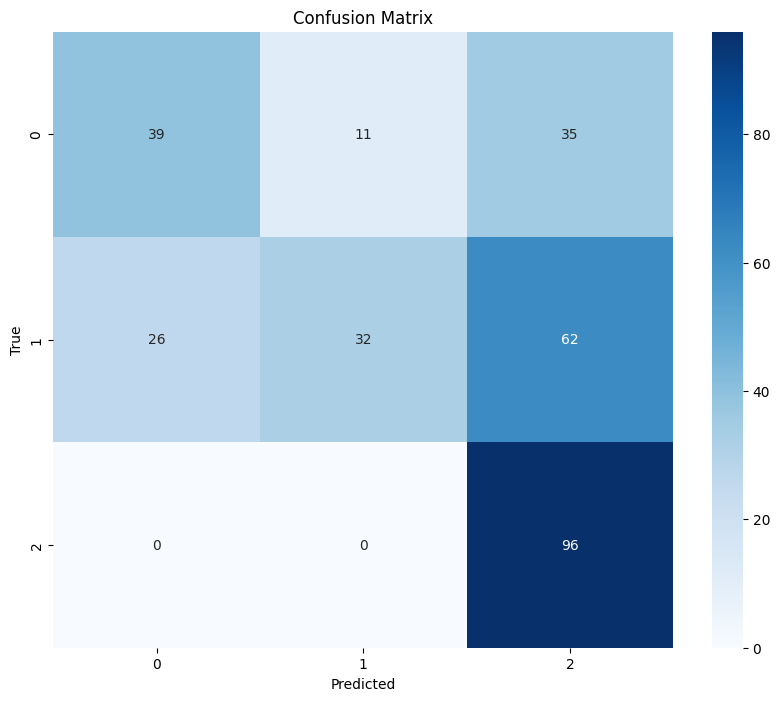


Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.8112, Acc=0.7076]


Train Loss: 1.0182, Train Accuracy: 0.5391
Validation Loss: 0.8112, Validation Accuracy: 0.7076

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.83      0.35      0.50        85
     healthy       0.81      0.72      0.77       120
   strawmite       0.61      1.00      0.76        96

    accuracy                           0.71       301
   macro avg       0.75      0.69      0.67       301
weighted avg       0.75      0.71      0.69       301



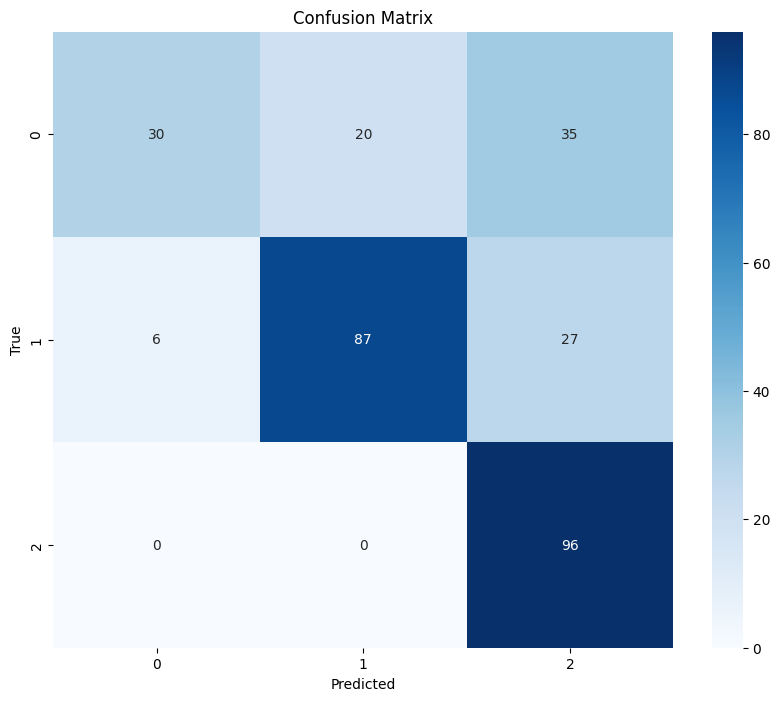


Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.5905, Acc=0.8472]


Train Loss: 0.9345, Train Accuracy: 0.6004
Validation Loss: 0.5905, Validation Accuracy: 0.8472

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.79      0.74      0.76        85
     healthy       0.81      0.82      0.81       120
   strawmite       0.94      0.98      0.96        96

    accuracy                           0.85       301
   macro avg       0.85      0.85      0.85       301
weighted avg       0.85      0.85      0.85       301



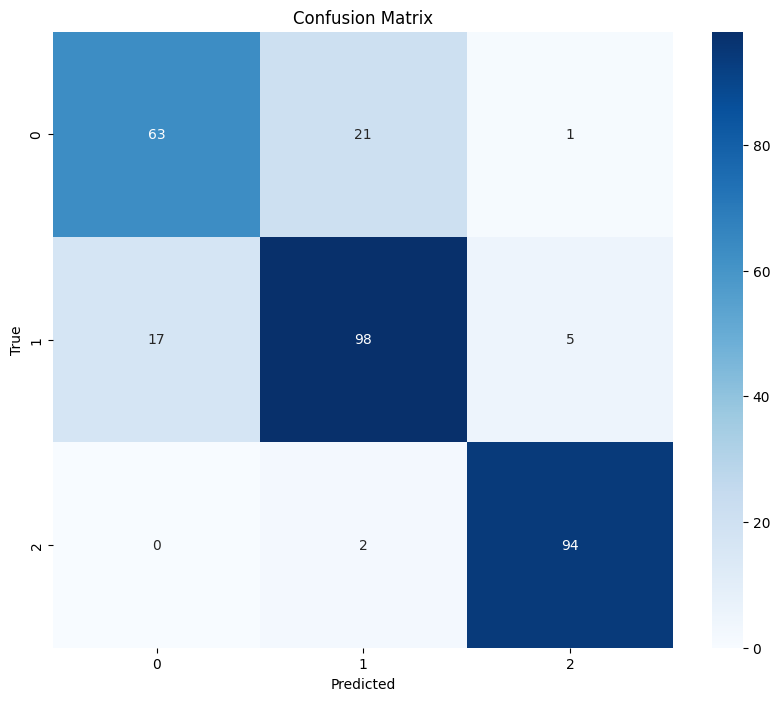


Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.5485, Acc=0.8671]


Train Loss: 0.8655, Train Accuracy: 0.6646
Validation Loss: 0.5485, Validation Accuracy: 0.8671

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.82      0.74      0.78        85
     healthy       0.83      0.88      0.85       120
   strawmite       0.96      0.97      0.96        96

    accuracy                           0.87       301
   macro avg       0.87      0.86      0.86       301
weighted avg       0.87      0.87      0.87       301



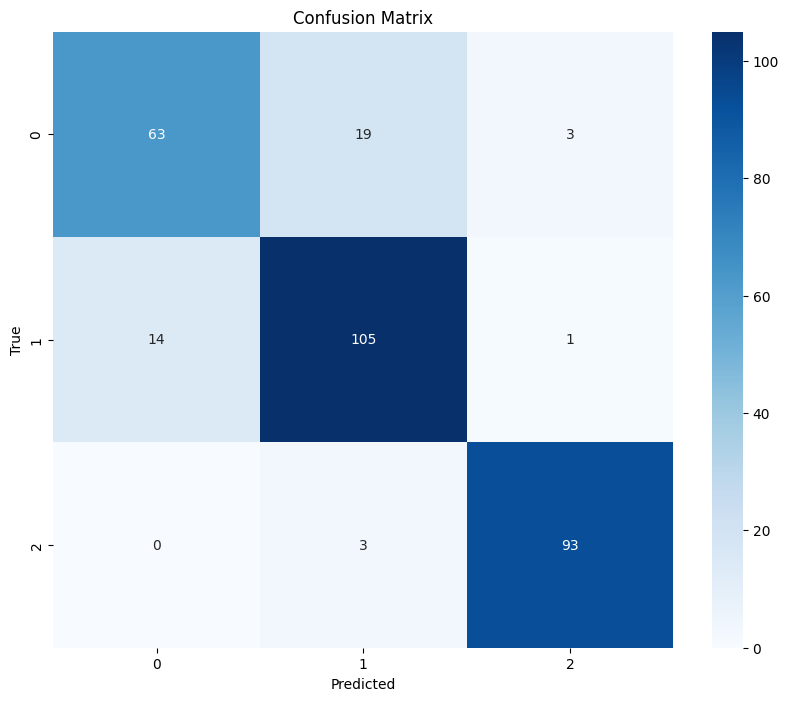


Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it, Loss=0.7382, Acc=0.7575]


Train Loss: 0.8285, Train Accuracy: 0.6897
Validation Loss: 0.7382, Validation Accuracy: 0.7575

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.5421, Acc=0.8638]


Train Loss: 0.8150, Train Accuracy: 0.7026
Validation Loss: 0.5421, Validation Accuracy: 0.8638

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.5797, Acc=0.8206]


Train Loss: 0.7443, Train Accuracy: 0.7344
Validation Loss: 0.5797, Validation Accuracy: 0.8206

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5955, Acc=0.7973]


Train Loss: 0.7253, Train Accuracy: 0.7533
Validation Loss: 0.5955, Validation Accuracy: 0.7973

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it, Loss=0.6059, Acc=0.7874]


Train Loss: 0.6620, Train Accuracy: 0.7969
Validation Loss: 0.6059, Validation Accuracy: 0.7874

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.5619, Acc=0.8571]


Train Loss: 0.6364, Train Accuracy: 0.8069
Validation Loss: 0.5619, Validation Accuracy: 0.8571

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.4942, Acc=0.9003]


Train Loss: 0.6834, Train Accuracy: 0.7768
Validation Loss: 0.4942, Validation Accuracy: 0.9003

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.69      0.81        85
     healthy       0.83      0.98      0.90       120
   strawmite       0.97      0.98      0.97        96

    accuracy                           0.90       301
   macro avg       0.92      0.89      0.89       301
weighted avg       0.91      0.90      0.90       301



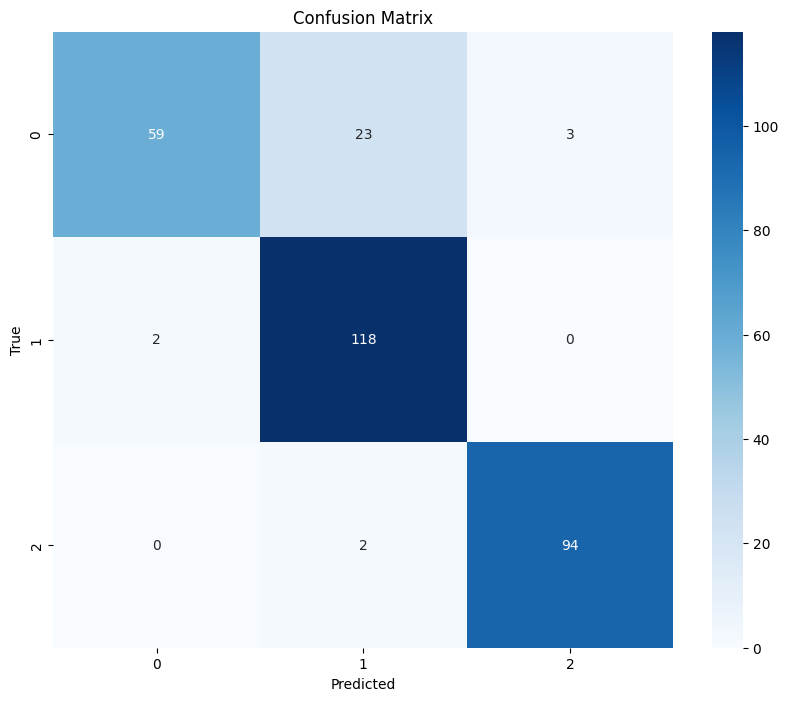


Epoch 13/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.6077, Acc=0.8439]


Train Loss: 0.6391, Train Accuracy: 0.8125
Validation Loss: 0.6077, Validation Accuracy: 0.8439

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.4817, Acc=0.8970]


Train Loss: 0.6133, Train Accuracy: 0.8253
Validation Loss: 0.4817, Validation Accuracy: 0.8970

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.5922, Acc=0.8571]


Train Loss: 0.5894, Train Accuracy: 0.8393
Validation Loss: 0.5922, Validation Accuracy: 0.8571

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.4502, Acc=0.9236]


Train Loss: 0.5898, Train Accuracy: 0.8438
Validation Loss: 0.4502, Validation Accuracy: 0.9236

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.79      0.87        85
     healthy       0.91      0.96      0.93       120
   strawmite       0.91      1.00      0.96        96

    accuracy                           0.92       301
   macro avg       0.93      0.92      0.92       301
weighted avg       0.93      0.92      0.92       301



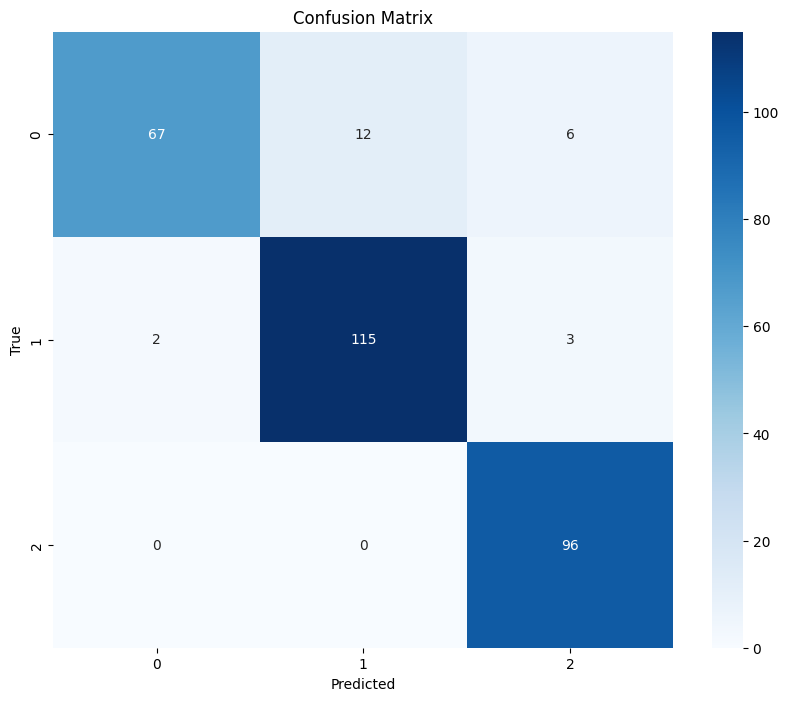


Epoch 17/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.4613, Acc=0.9236]


Train Loss: 0.5424, Train Accuracy: 0.8722
Validation Loss: 0.4613, Validation Accuracy: 0.9236

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.4434, Acc=0.9435]


Train Loss: 0.5305, Train Accuracy: 0.8789
Validation Loss: 0.4434, Validation Accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.85      0.91        85
     healthy       0.95      0.97      0.96       120
   strawmite       0.91      1.00      0.96        96

    accuracy                           0.94       301
   macro avg       0.95      0.94      0.94       301
weighted avg       0.95      0.94      0.94       301



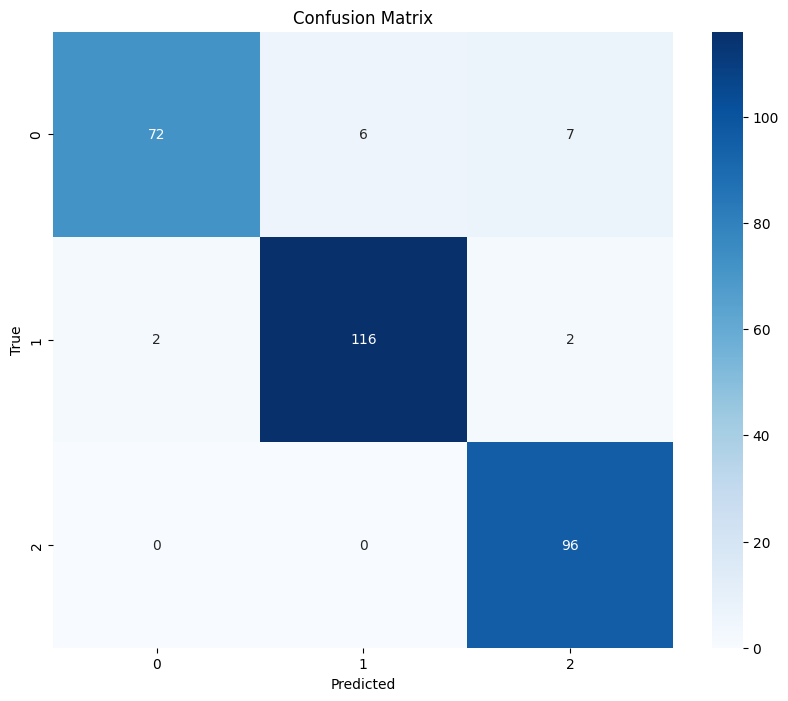


Epoch 19/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it, Loss=0.4175, Acc=0.9369]


Train Loss: 0.5185, Train Accuracy: 0.8912
Validation Loss: 0.4175, Validation Accuracy: 0.9369

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it, Loss=0.4387, Acc=0.9236]


Train Loss: 0.5052, Train Accuracy: 0.8956
Validation Loss: 0.4387, Validation Accuracy: 0.9236

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.4198, Acc=0.9435]


Train Loss: 0.4932, Train Accuracy: 0.9012
Validation Loss: 0.4198, Validation Accuracy: 0.9435

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.4225, Acc=0.9402]


Train Loss: 0.4826, Train Accuracy: 0.9046
Validation Loss: 0.4225, Validation Accuracy: 0.9402

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.4141, Acc=0.9568]


Train Loss: 0.5085, Train Accuracy: 0.8839
Validation Loss: 0.4141, Validation Accuracy: 0.9568

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.96      0.91      0.93        85
     healthy       0.97      0.96      0.96       120
   strawmite       0.94      1.00      0.97        96

    accuracy                           0.96       301
   macro avg       0.96      0.95      0.96       301
weighted avg       0.96      0.96      0.96       301



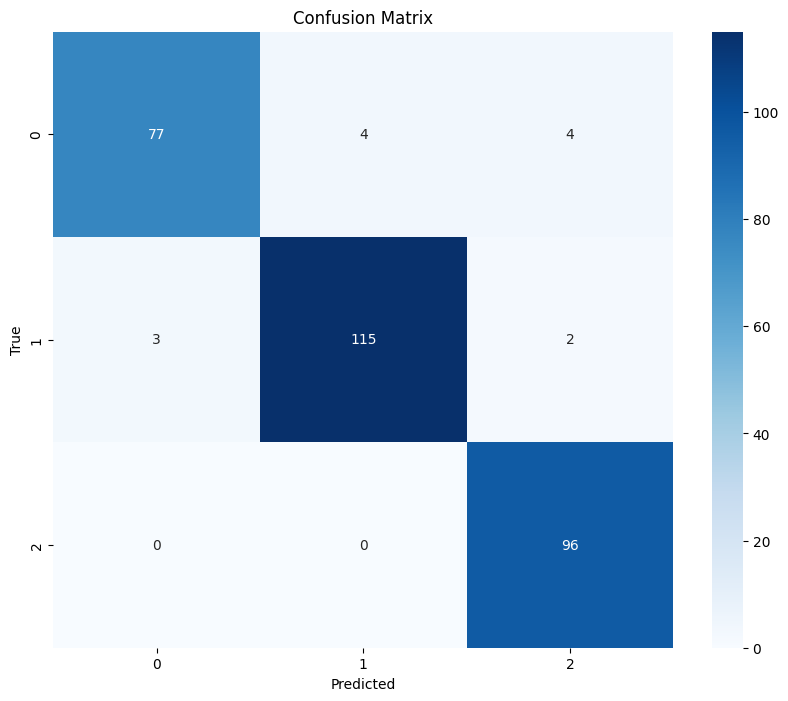


Epoch 24/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.5010, Acc=0.9003]


Train Loss: 0.5512, Train Accuracy: 0.8728
Validation Loss: 0.5010, Validation Accuracy: 0.9003

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it, Loss=0.4337, Acc=0.9203]


Train Loss: 0.5491, Train Accuracy: 0.8661
Validation Loss: 0.4337, Validation Accuracy: 0.9203

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.4353, Acc=0.9302]


Train Loss: 0.5258, Train Accuracy: 0.8856
Validation Loss: 0.4353, Validation Accuracy: 0.9302

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.5037, Acc=0.8937]


Train Loss: 0.5344, Train Accuracy: 0.8767
Validation Loss: 0.5037, Validation Accuracy: 0.8937

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.4124, Acc=0.9502]


Train Loss: 0.5135, Train Accuracy: 0.8895
Validation Loss: 0.4124, Validation Accuracy: 0.9502

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5174, Acc=0.8538]


Train Loss: 0.5127, Train Accuracy: 0.8901
Validation Loss: 0.5174, Validation Accuracy: 0.8538

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.4117, Acc=0.9601]


Train Loss: 0.5023, Train Accuracy: 0.8968
Validation Loss: 0.4117, Validation Accuracy: 0.9601

Classification Report:
              precision    recall  f1-score   support

  alternaria       1.00      0.87      0.93        85
     healthy       0.93      0.99      0.96       120
   strawmite       0.97      1.00      0.98        96

    accuracy                           0.96       301
   macro avg       0.97      0.95      0.96       301
weighted avg       0.96      0.96      0.96       301



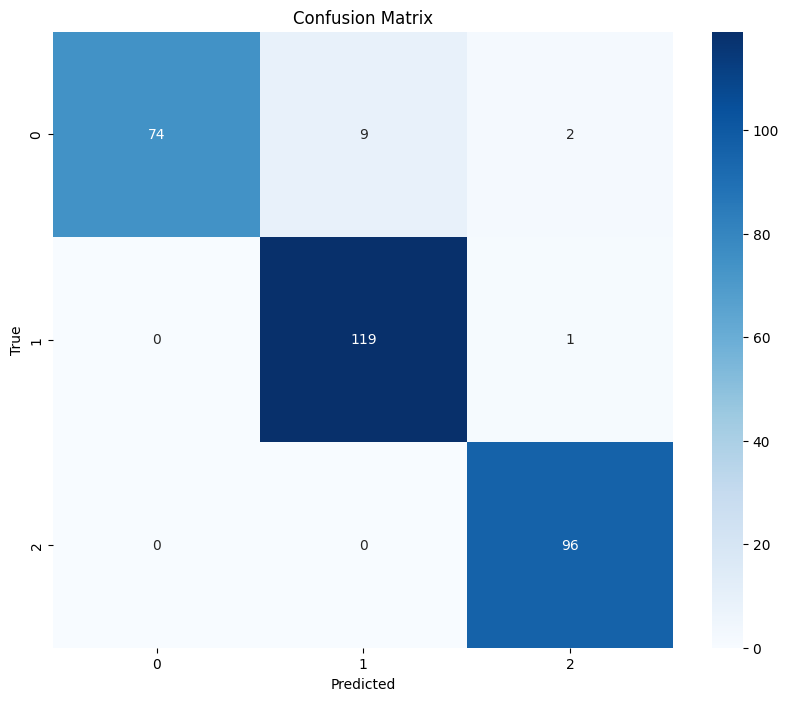

Training completed. Best validation accuracy: 0.9601


In [2]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2  # Reduced from 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3  # Update based on your dataset

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            # First conv block
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Skip connection
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    
    # Create model directory
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model, criterion, optimizer setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()  # Fixed line
    early_stopping = EarlyStopping(patience=5)
    
    # Training loop
    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels = validate(
            model, val_loader, criterion, config
        )
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes,digits=3))
            
            # Generate confusion matrix
            cm = confusion_matrix(labels, preds)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()
    
    print(f"Training completed. Best validation accuracy: {best_val_acc:.4f}")
    return model

# 6. Run Training
if __name__ == "__main__":
    config = Config()
    model = train_model(config)


In [3]:
import os
import time
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3  # Update based on your dataset

class TrainingMetrics:
    def __init__(self):
        self.train_losses = []
        self.train_accs = []
        self.val_losses = []
        self.val_accs = []
        self.epoch_times = []

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)
            skip = res_block[-1](identity)
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def count_parameters(model):
    """Count trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def get_model_size(model):
    """Get model size in MB"""
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

def plot_training_metrics(metrics):
    """Plot training and validation metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(metrics.train_losses, label='Train Loss')
    ax1.plot(metrics.val_losses, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracies
    ax2.plot(metrics.train_accs, label='Train Accuracy')
    ax2.plot(metrics.val_accs, label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig("/kaggle/working/CNNSB.png", dpi=300, bbox_inches='tight')  # Save the figure
    plt.show()

def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    metrics = TrainingMetrics()
    
    # Create model directory
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model, criterion, optimizer setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    
    # Print model statistics
    num_params = count_parameters(model)
    model_size = get_model_size(model)
    print(f"\nModel Statistics:")
    print(f"Number of trainable parameters: {num_params:,}")
    print(f"Model size: {model_size:.2f} MB")
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    early_stopping = EarlyStopping(patience=5)
    
    # Training loop
    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        # Measure epoch time
        epoch_start = time.time()
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels = validate(
            model, val_loader, criterion, config
        )
        
        epoch_time = time.time() - epoch_start
        metrics.epoch_times.append(epoch_time)
        metrics.train_losses.append(train_loss)
        metrics.train_accs.append(train_acc)
        metrics.val_losses.append(val_loss)
        metrics.val_accs.append(val_acc)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        print(f"Epoch time: {epoch_time:.2f} seconds")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes,digits=3))
    
    # Print final statistics
    avg_epoch_time = np.mean(metrics.epoch_times)
    print(f"\nTraining Summary:")
    print(f"Best validation accuracy: {best_val_acc:.4f}")
    print(f"Average training time per epoch: {avg_epoch_time:.2f} seconds")
    
    # Plot training metrics
    plot_training_metrics(metrics)
    
    return model

# 6. Run Training
if __name__ == "__main__":
    # Set up configuration
    config = Config()
    
    # Print training configuration
    print("Training Configuration:")
    print(f"Device: {config.device}")
    print(f"Number of epochs: {config.num_epochs}")
    print(f"Batch size: {config.batch_size}")
    print(f"Learning rate: {config.learning_rate}")
    print(f"Weight decay: {config.weight_decay}")
    print(f"Label smoothing: {config.label_smoothing}")
    
    # Start training
    try:
        model = train_model(config)
        print("\nTraining completed successfully!")
    except Exception as e:
        print(f"\nAn error occurred during training: {str(e)}")
        raise

Training Configuration:
Device: cuda
Number of epochs: 30
Batch size: 32
Learning rate: 0.0001
Weight decay: 0.0001
Label smoothing: 0.1

Model Statistics:
Number of trainable parameters: 5,534,211
Model size: 21.13 MB

Epoch 1/30


Training:  21%|██▏       | 12/56 [00:40<02:30,  3.41s/it, Loss=1.1661, Acc=0.4219]


KeyboardInterrupt: 

**Updated CNN**

<ipython-input-1-72f98effe73b>:206: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Number of trainable parameters: 5491203

Epoch 1/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-72f98effe73b>:152: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:25<00:00,  2.55s/it]


Train Loss: 1.1306, Train Acc: 0.4397
Val Loss: 0.9365, Val Acc: 0.4344
Epoch Time: 183.27 seconds

Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 1.0595, Train Acc: 0.4821
Val Loss: 0.8840, Val Acc: 0.5437
Epoch Time: 151.86 seconds

Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.9647, Train Acc: 0.5871
Val Loss: 0.7323, Val Acc: 0.7236
Epoch Time: 152.33 seconds

Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.8821, Train Acc: 0.6557
Val Loss: 0.5902, Val Acc: 0.8812
Epoch Time: 153.34 seconds

Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.8105, Train Acc: 0.7031
Val Loss: 0.5985, Val Acc: 0.8656
Epoch Time: 152.93 seconds

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.7741, Train Acc: 0.7299
Val Loss: 0.7711, Val Acc: 0.7173
Epoch Time: 153.19 seconds

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.7716, Train Acc: 0.7249
Val Loss: 0.5432, Val Acc: 0.8767
Epoch Time: 151.97 seconds

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.7204, Train Acc: 0.7494
Val Loss: 0.5905, Val Acc: 0.8454
Epoch Time: 154.14 seconds

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


Train Loss: 0.6689, Train Acc: 0.7863
Val Loss: 0.6532, Val Acc: 0.8236
Epoch Time: 154.31 seconds

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.6461, Train Acc: 0.8075
Val Loss: 0.6091, Val Acc: 0.8187
Epoch Time: 155.06 seconds

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.6063, Train Acc: 0.8376
Val Loss: 0.4241, Val Acc: 0.9531
Epoch Time: 155.03 seconds

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5728, Train Acc: 0.8549
Val Loss: 0.5134, Val Acc: 0.8656
Epoch Time: 153.39 seconds

Epoch 13/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.5705, Train Acc: 0.8571
Val Loss: 0.4920, Val Acc: 0.9250
Epoch Time: 154.76 seconds

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.5729, Train Acc: 0.8571
Val Loss: 0.4885, Val Acc: 0.9094
Epoch Time: 152.62 seconds

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.5460, Train Acc: 0.8700
Val Loss: 0.4539, Val Acc: 0.9313
Epoch Time: 154.90 seconds

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5399, Train Acc: 0.8694
Val Loss: 0.4737, Val Acc: 0.9219
Epoch Time: 153.27 seconds

Epoch 17/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.5390, Train Acc: 0.8778
Val Loss: 0.4205, Val Acc: 0.9688
Epoch Time: 151.90 seconds

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.5263, Train Acc: 0.8867
Val Loss: 0.4261, Val Acc: 0.9437
Epoch Time: 152.54 seconds

Epoch 19/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.5256, Train Acc: 0.8806
Val Loss: 0.4669, Val Acc: 0.9125
Epoch Time: 151.13 seconds

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5338, Train Acc: 0.8772
Val Loss: 0.5422, Val Acc: 0.8844
Epoch Time: 154.91 seconds

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.5193, Train Acc: 0.8884
Val Loss: 0.4174, Val Acc: 0.9594
Epoch Time: 153.71 seconds

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.5162, Train Acc: 0.8862
Val Loss: 0.4237, Val Acc: 0.9437
Epoch Time: 152.80 seconds

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5088, Train Acc: 0.8884
Val Loss: 0.4311, Val Acc: 0.9344
Epoch Time: 155.44 seconds

Epoch 24/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.4921, Train Acc: 0.9051
Val Loss: 0.5251, Val Acc: 0.8875
Epoch Time: 153.93 seconds

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.4876, Train Acc: 0.9057
Val Loss: 0.4918, Val Acc: 0.9156
Epoch Time: 153.40 seconds

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.5027, Train Acc: 0.8951
Val Loss: 0.4612, Val Acc: 0.9281
Epoch Time: 154.42 seconds

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.4816, Train Acc: 0.9051
Val Loss: 0.4231, Val Acc: 0.9375
Epoch Time: 156.27 seconds

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.4927, Train Acc: 0.8990
Val Loss: 0.4064, Val Acc: 0.9563
Epoch Time: 152.55 seconds

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.4800, Train Acc: 0.9090
Val Loss: 0.4192, Val Acc: 0.9469
Epoch Time: 154.87 seconds

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


Train Loss: 0.4939, Train Acc: 0.8968
Val Loss: 0.4534, Val Acc: 0.9125
Epoch Time: 155.00 seconds
Average time per epoch: 154.64 seconds


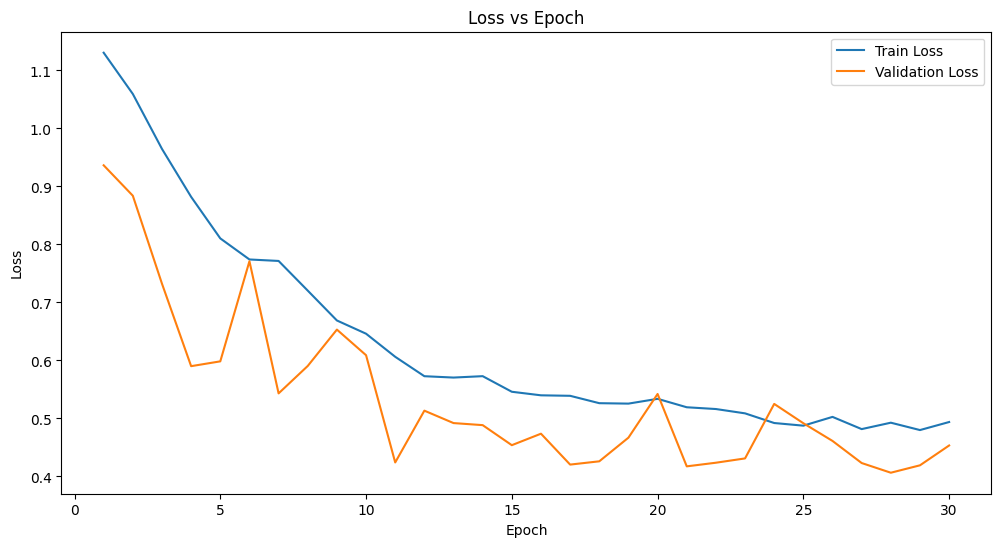

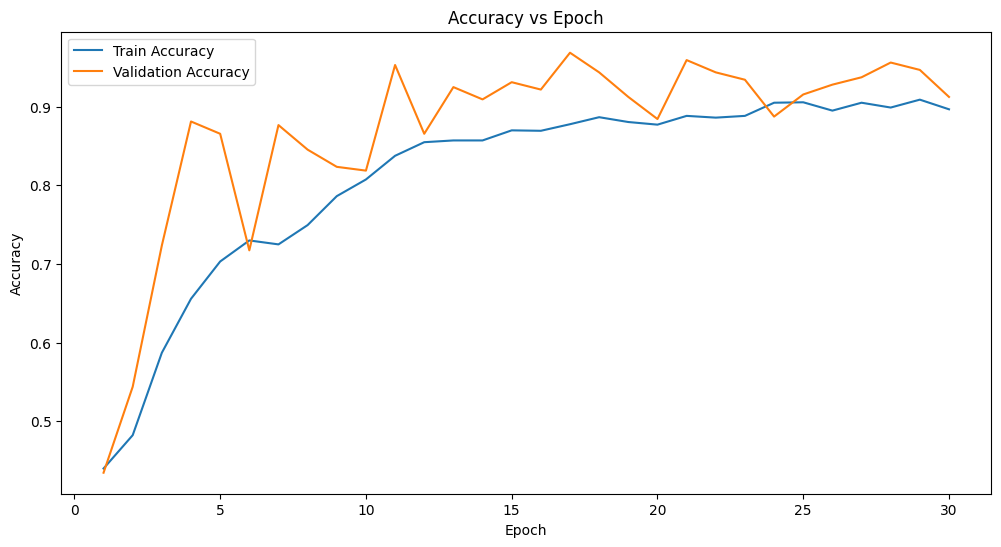

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.98      0.71      0.82        85
     healthy       0.90      0.97      0.94       120
   strawmite       0.87      1.00      0.93        96

    accuracy                           0.91       301
   macro avg       0.92      0.89      0.90       301
weighted avg       0.91      0.91      0.90       301



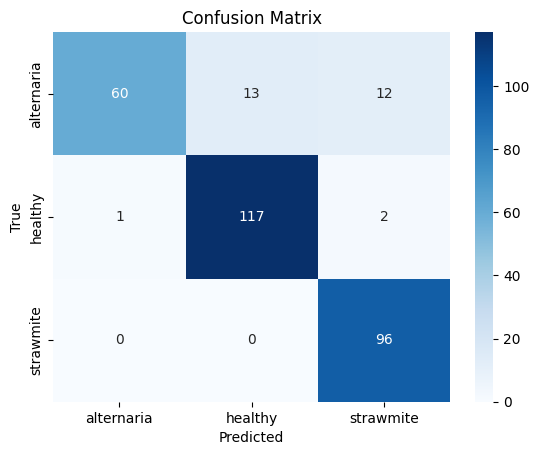

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# Utility functions
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses = []
    accuracies = []
    
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = []
    accuracies = []
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)
    
    # Model setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    print(f"Number of trainable parameters: {count_parameters(model)}")
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()
    
    # Tracking metrics
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_val_acc = 0
    total_time = 0
    
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        start_time = time.time()
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels = validate(model, val_loader, criterion, config)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        print(f"Epoch Time: {epoch_time:.2f} seconds")
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))
    
    avg_time_per_epoch = total_time / config.num_epochs
    print(f"Average time per epoch: {avg_time_per_epoch:.2f} seconds")
    
    # Plot metrics
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    plt.show()
    
    print("Classification Report:")
    print(classification_report(labels, preds, target_names=train_dataset.classes))
    
    cm = confusion_matrix(labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 6. Run the Training
config = Config()
train_model(config)


In [ ]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# Utility functions
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses = []
    accuracies = []
    
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = []
    accuracies = []
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)
    
    # Model setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    print(f"Number of trainable parameters: {count_parameters(model)}")
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()
    
    # Tracking metrics
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_val_acc = 0
    total_time = 0
    
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        start_time = time.time()
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels = validate(model, val_loader, criterion, config)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        print(f"Epoch Time: {epoch_time:.2f} seconds")
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))
    
    avg_time_per_epoch = total_time / config.num_epochs
    print(f"Average time per epoch: {avg_time_per_epoch:.2f} seconds")
    
    # Save Loss vs Epoch plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.savefig('loss_vs_epoch.png')  # Save the loss plot
    plt.close()  # Close the plot to avoid overlap
    
    # Save Accuracy vs Epoch plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    plt.savefig('accuracy_vs_epoch.png')  # Save the accuracy plot
    plt.close()  # Close the plot to avoid overlap
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(labels, preds, target_names=train_dataset.classes))
    
    cm = confusion_matrix(labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Train the model
config = Config()
train_model(config)


<ipython-input-11-2b1fce733d40>:206: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Number of trainable parameters: 5491203

Epoch 1/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-11-2b1fce733d40>:152: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 1.1306, Train Acc: 0.4397
Val Loss: 0.9365, Val Acc: 0.4344
Epoch Time: 152.19 seconds

Epoch 2/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


Train Loss: 1.0595, Train Acc: 0.4821
Val Loss: 0.8840, Val Acc: 0.5437
Epoch Time: 151.76 seconds

Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.9647, Train Acc: 0.5871
Val Loss: 0.7323, Val Acc: 0.7236
Epoch Time: 153.24 seconds

Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.8821, Train Acc: 0.6557
Val Loss: 0.5902, Val Acc: 0.8812
Epoch Time: 152.58 seconds

Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.8105, Train Acc: 0.7031
Val Loss: 0.5985, Val Acc: 0.8656
Epoch Time: 152.57 seconds

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.7741, Train Acc: 0.7299
Val Loss: 0.7711, Val Acc: 0.7173
Epoch Time: 152.27 seconds

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.7716, Train Acc: 0.7249
Val Loss: 0.5432, Val Acc: 0.8767
Epoch Time: 154.00 seconds

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.7204, Train Acc: 0.7494
Val Loss: 0.5905, Val Acc: 0.8454
Epoch Time: 154.69 seconds

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.6689, Train Acc: 0.7863
Val Loss: 0.6532, Val Acc: 0.8236
Epoch Time: 151.24 seconds

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.6461, Train Acc: 0.8075
Val Loss: 0.6091, Val Acc: 0.8187
Epoch Time: 152.38 seconds

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


Train Loss: 0.6063, Train Acc: 0.8376
Val Loss: 0.4241, Val Acc: 0.9531
Epoch Time: 153.14 seconds

Epoch 12/30


Training:  93%|█████████▎| 52/56 [02:02<00:07,  1.80s/it]

NameError: name 'train_losses' is not defined

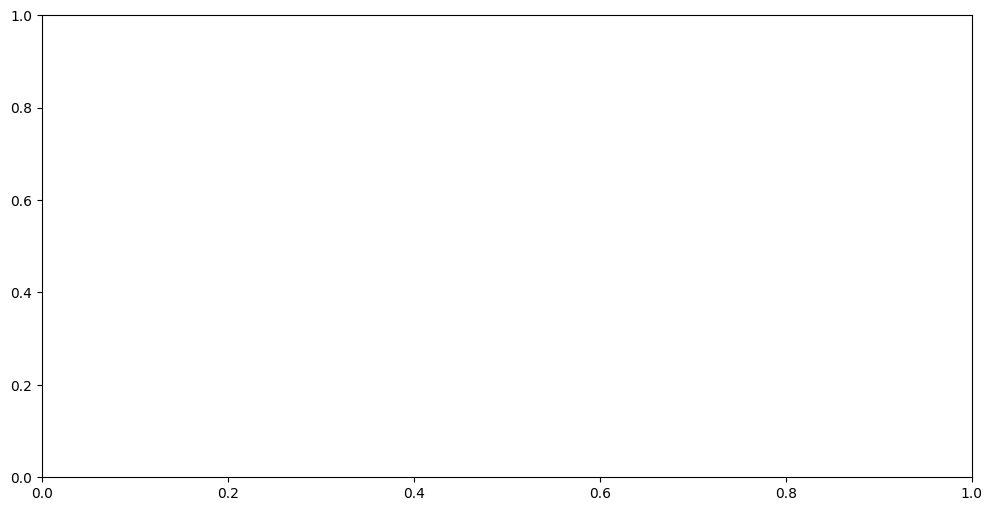

In [3]:
import matplotlib.pyplot as plt

# Plot loss and accuracy in a single figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot loss
ax1.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss', color='tab:blue')
ax1.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss', color='tab:orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for accuracy
ax2 = ax1.twinx()
ax2.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy', linestyle='dashed', color='tab:green')
ax2.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy', linestyle='dashed', color='tab:red')
ax2.set_ylabel('Accuracy', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Legends
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Title
plt.title('Loss and Accuracy vs Epoch')

# Save figure in Kaggle output directory
plt.savefig('/kaggle/working/metrics.png')

# Show the plot
plt.show()


Epoch 1/30: 100%|██████████| 56/56 [04:20<00:00,  4.65s/it]


Epoch 1/30:
Training Loss: 0.7631
Test Accuracy: 80.07%


Epoch 2/30: 100%|██████████| 56/56 [04:06<00:00,  4.39s/it]


Epoch 2/30:
Training Loss: 0.5726
Test Accuracy: 83.39%


Epoch 3/30: 100%|██████████| 56/56 [04:08<00:00,  4.44s/it]


Epoch 3/30:
Training Loss: 0.4589
Test Accuracy: 85.71%


Epoch 4/30: 100%|██████████| 56/56 [04:06<00:00,  4.40s/it]


Epoch 4/30:
Training Loss: 0.4296
Test Accuracy: 91.03%


Epoch 5/30: 100%|██████████| 56/56 [04:04<00:00,  4.37s/it]


Epoch 5/30:
Training Loss: 0.4289
Test Accuracy: 88.70%


Epoch 6/30: 100%|██████████| 56/56 [04:06<00:00,  4.40s/it]


Epoch 6/30:
Training Loss: 0.3749
Test Accuracy: 90.03%


Epoch 7/30: 100%|██████████| 56/56 [04:04<00:00,  4.36s/it]


Epoch 7/30:
Training Loss: 0.3678
Test Accuracy: 86.05%


Epoch 8/30: 100%|██████████| 56/56 [04:06<00:00,  4.39s/it]


Epoch 8/30:
Training Loss: 0.3242
Test Accuracy: 87.04%


Epoch 9/30: 100%|██████████| 56/56 [04:07<00:00,  4.42s/it]


Epoch 9/30:
Training Loss: 0.2973
Test Accuracy: 88.04%


Epoch 10/30: 100%|██████████| 56/56 [04:03<00:00,  4.35s/it]


Epoch 10/30:
Training Loss: 0.2862
Test Accuracy: 88.37%


Epoch 11/30: 100%|██████████| 56/56 [04:08<00:00,  4.44s/it]


Epoch 11/30:
Training Loss: 0.2463
Test Accuracy: 91.36%


Epoch 12/30: 100%|██████████| 56/56 [04:07<00:00,  4.41s/it]


Epoch 12/30:
Training Loss: 0.2334
Test Accuracy: 89.70%


Epoch 13/30: 100%|██████████| 56/56 [04:11<00:00,  4.48s/it]


Epoch 13/30:
Training Loss: 0.2344
Test Accuracy: 90.03%


Epoch 14/30: 100%|██████████| 56/56 [04:07<00:00,  4.42s/it]


Epoch 14/30:
Training Loss: 0.1983
Test Accuracy: 90.03%


Epoch 15/30: 100%|██████████| 56/56 [04:09<00:00,  4.45s/it]


Epoch 15/30:
Training Loss: 0.1761
Test Accuracy: 89.70%


Epoch 16/30: 100%|██████████| 56/56 [04:07<00:00,  4.43s/it]


Epoch 16/30:
Training Loss: 0.1804
Test Accuracy: 92.36%


Epoch 17/30: 100%|██████████| 56/56 [04:06<00:00,  4.41s/it]


Epoch 17/30:
Training Loss: 0.1493
Test Accuracy: 91.69%


Epoch 18/30: 100%|██████████| 56/56 [04:10<00:00,  4.48s/it]


Epoch 18/30:
Training Loss: 0.1065
Test Accuracy: 91.36%


Epoch 19/30: 100%|██████████| 56/56 [04:13<00:00,  4.52s/it]


Epoch 19/30:
Training Loss: 0.1047
Test Accuracy: 93.36%


Epoch 20/30: 100%|██████████| 56/56 [04:10<00:00,  4.47s/it]


Epoch 20/30:
Training Loss: 0.0831
Test Accuracy: 90.37%


Epoch 21/30: 100%|██████████| 56/56 [04:08<00:00,  4.44s/it]


Epoch 21/30:
Training Loss: 0.0599
Test Accuracy: 88.37%


Epoch 22/30: 100%|██████████| 56/56 [04:12<00:00,  4.51s/it]


Epoch 22/30:
Training Loss: 0.0457
Test Accuracy: 91.36%


Epoch 23/30: 100%|██████████| 56/56 [04:08<00:00,  4.44s/it]


Epoch 23/30:
Training Loss: 0.0307
Test Accuracy: 90.03%


Epoch 24/30: 100%|██████████| 56/56 [04:10<00:00,  4.48s/it]


Epoch 24/30:
Training Loss: 0.0272
Test Accuracy: 91.03%


Epoch 25/30: 100%|██████████| 56/56 [04:10<00:00,  4.47s/it]


Epoch 25/30:
Training Loss: 0.0197
Test Accuracy: 90.37%


Epoch 26/30: 100%|██████████| 56/56 [04:11<00:00,  4.49s/it]


Epoch 26/30:
Training Loss: 0.0159
Test Accuracy: 91.69%


Epoch 27/30: 100%|██████████| 56/56 [04:11<00:00,  4.48s/it]


Epoch 27/30:
Training Loss: 0.0104
Test Accuracy: 91.69%


Epoch 28/30: 100%|██████████| 56/56 [04:09<00:00,  4.45s/it]


Epoch 28/30:
Training Loss: 0.0124
Test Accuracy: 91.69%


Epoch 29/30: 100%|██████████| 56/56 [04:10<00:00,  4.48s/it]


Epoch 29/30:
Training Loss: 0.0092
Test Accuracy: 91.69%


Epoch 30/30: 100%|██████████| 56/56 [04:10<00:00,  4.46s/it]


Epoch 30/30:
Training Loss: 0.0089
Test Accuracy: 91.69%

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.84      0.93      0.88        85
     healthy       0.95      0.85      0.90       120
   strawmite       0.95      0.99      0.97        96

    accuracy                           0.92       301
   macro avg       0.91      0.92      0.92       301
weighted avg       0.92      0.92      0.92       301



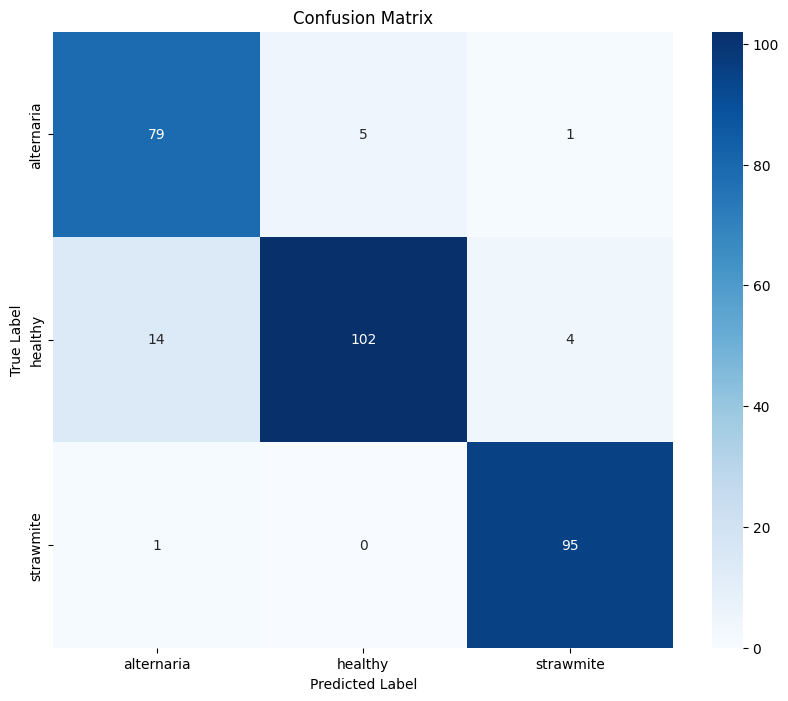

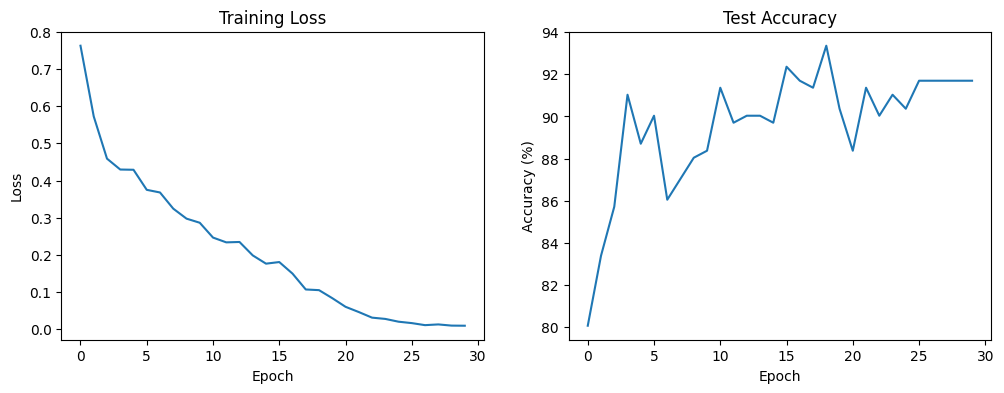

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import math
from tqdm import tqdm
import optuna
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        
        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        # x: (batch_size, channels, img_size, img_size)
        x = self.proj(x)  # (batch_size, embed_dim, n_patches^0.5, n_patches^0.5)
        x = x.flatten(2)  # (batch_size, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batch_size, n_patches, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.attn_dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, n_tokens, embed_dim = x.shape

        qkv = self.qkv(x)
        qkv = qkv.reshape(batch_size, n_tokens, 3, self.num_heads, self.head_dim)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_dropout(attn)

        x = (attn @ v).transpose(1, 2).reshape(batch_size, n_tokens, embed_dim)
        x = self.proj(x)
        x = self.proj_dropout(x)
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio, dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SpinachViT(nn.Module):
    def __init__(self, 
                 img_size=224,
                 patch_size=16,
                 in_channels=3,
                 embed_dim=768,
                 num_heads=12,
                 num_layers=12,
                 mlp_ratio=4,
                 dropout=0.1,
                 num_classes=3):
        super().__init__()
        
        # Patch embedding
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        num_patches = self.patch_embed.n_patches
        
        # Class token and position embedding
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(dropout)
        
        # Transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_layers)
        ])
        
        # Classification head
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)
        
        # Initialize weights
        self._init_weights()

    def _init_weights(self):
        # Initialize patch embeddings and linear layers
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.pos_embed, std=0.02)
        
        self.apply(self._init_weights_recursive)

    def _init_weights_recursive(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.normal_(m.weight, std=0.02)
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias)
        elif isinstance(m, nn.LayerNorm):
            torch.nn.init.zeros_(m.bias)
            torch.nn.init.ones_(m.weight)

    def forward(self, x):
        # Patch embedding
        x = self.patch_embed(x)
        
        # Add class token
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        
        # Add position embedding
        x = x + self.pos_embed
        x = self.pos_drop(x)
        
        # Apply transformer blocks
        for block in self.blocks:
            x = block(x)
        
        # Classification
        x = self.norm(x)
        x = x[:, 0]  # Use only the class token
        x = self.head(x)
        
        return x

def create_dataloaders(train_dir, test_dir, batch_size=32, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592],std=[0.2392, 0.1975, 0.3486])
    ])
    
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader, train_dataset.classes

def train_model(model, train_loader, test_loader, num_epochs, device, classes):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.05)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    
    best_acc = 0.0
    train_losses = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        
        # Evaluation
        model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        accuracy = 100. * correct / total
        test_accuracies.append(accuracy)
        
        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"Training Loss: {train_loss:.4f}")
        print(f"Test Accuracy: {accuracy:.2f}%")
        
        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), 'best_spinach_vit.pth')
        
        scheduler.step()
    
    # Final evaluation
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(all_labels, all_preds), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return train_losses, test_accuracies

def main():
    # Model parameters
    img_size = 224
    patch_size = 16
    embed_dim = 384  # Smaller than standard ViT for faster training
    num_heads = 6
    num_layers = 8
    mlp_ratio = 4
    dropout = 0.1
    batch_size = 32
    num_epochs = 30
    
    # Create model
    model = SpinachViT(
        img_size=img_size,
        patch_size=patch_size,
        embed_dim=embed_dim,
        num_heads=num_heads,
        num_layers=num_layers,
        mlp_ratio=mlp_ratio,
        dropout=dropout
    )
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Create dataloaders
    train_loader, test_loader, classes = create_dataloaders(
        "/kaggle/input/leaf-data/Leaf_Dataset/Train",
        "/kaggle/input/leaf-data/Leaf_Dataset/Test",
        batch_size=batch_size,
        img_size=img_size
    )
    
    # Train model
    train_losses, test_accuracies = train_model(
        model,
        train_loader,
        test_loader,
        num_epochs,
        device,
        classes
    )
    
    # Plot training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies)
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.show()

if __name__ == "__main__":
    main()

**Code for saving img vit**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import math
from tqdm import tqdm
import time
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.n_patches = (img_size // patch_size) ** 2
        
        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        x = self.proj(x)  
        x = x.flatten(2)  
        x = x.transpose(1, 2)  
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.attn_dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, n_tokens, embed_dim = x.shape

        qkv = self.qkv(x)
        qkv = qkv.reshape(batch_size, n_tokens, 3, self.num_heads, self.head_dim)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_dropout(attn)

        x = (attn @ v).transpose(1, 2).reshape(batch_size, n_tokens, embed_dim)
        x = self.proj(x)
        x = self.proj_dropout(x)
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio, dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SpinachViT(nn.Module):
    def __init__(self, 
                 img_size=224,
                 patch_size=16,
                 in_channels=3,
                 embed_dim=768,
                 num_heads=12,
                 num_layers=12,
                 mlp_ratio=4,
                 dropout=0.1,
                 num_classes=3):
        super().__init__()
        
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        num_patches = self.patch_embed.n_patches
        
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(dropout)
        
        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_layers)
        ])
        
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)
        
        self._init_weights()

    def _init_weights(self):
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.pos_embed, std=0.02)
        self.apply(self._init_weights_recursive)

    def _init_weights_recursive(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.normal_(m.weight, std=0.02)
            if m.bias is not None:
                torch.nn.init.zeros_(m.bias)
        elif isinstance(m, nn.LayerNorm):
            torch.nn.init.zeros_(m.bias)
            torch.nn.init.ones_(m.weight)

    def forward(self, x):
        x = self.patch_embed(x)
        
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        
        x = x + self.pos_embed
        x = self.pos_drop(x)
        
        for block in self.blocks:
            x = block(x)
        
        x = self.norm(x)
        x = x[:, 0]  
        x = self.head(x)
        
        return x

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def get_model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

def create_dataloaders(train_dir, test_dir, batch_size=32, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592],
                           std=[0.2392, 0.1975, 0.3486])
    ])
    
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader, train_dataset.classes

def train_model(model, train_loader, test_loader, num_epochs, device, classes):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.05)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    
    best_acc = 0.0
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    epoch_times = []
    
    print("\nInitial Model Statistics:")
    print(f"Total trainable parameters: {count_parameters(model):,}")
    print(f"Model size: {get_model_size(model):.2f} MB")
    print("\nStarting training...\n")
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_train_loss = 0.0
        train_correct = 0
        train_total = 0
        epoch_start_time = time.time()
        
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
        
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        epoch_times.append(epoch_time)
        
        train_loss = running_train_loss / len(train_loader)
        train_losses.append(train_loss)
        train_acc = 100. * train_correct / train_total
        train_accuracies.append(train_acc)
        
        # Evaluation
        model.eval()
        running_test_loss = 0.0
        test_correct = 0
        test_total = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item()
                
                _, predicted = outputs.max(1)
                test_total += labels.size(0)
                test_correct += predicted.eq(labels).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        test_loss = running_test_loss / len(test_loader)
        test_losses.append(test_loss)
        test_acc = 100. * test_correct / test_total
        test_accuracies.append(test_acc)
        
        print(f"\nEpoch {epoch+1}/{num_epochs}:")
        print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
        print(f"Epoch Time: {epoch_time:.2f} seconds")
        
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), 'best_spinach_vit.pth')
        
        scheduler.step()
    
    # Print final statistics
    print("\nFinal Training Statistics:")
    print(f"Best Test Accuracy: {best_acc:.2f}%")
    print(f"Average training time per epoch: {np.mean(epoch_times):.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes))
    
    # Plot and save training curves
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, 'b-', label='Train Loss')
    plt.plot(test_losses, 'r-', label='Test Loss')
    plt.title('Loss vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, 'b-', label='Train Accuracy')
    plt.plot(test_accuracies, 'r-', label='Test Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Plot and save confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return train_losses, test_losses, train_accuracies, test_accuracies

def main():
    # Model parameters
    img_size = 224
    patch_size = 16
    embed_dim = 384
    num_heads = 6
    num_layers = 8
    mlp_ratio = 4
    dropout = 0.1
    batch_size = 32
    num_epochs = 30
    
    # Create model
    model = SpinachViT(
        img_size=img_size,
        patch_size=patch_size,
        embed_dim=embed_dim,
        num_heads=num_heads,
        num_layers=num_layers,
        mlp_ratio=mlp_ratio,
        dropout=dropout
    )
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Create dataloaders
    train_loader, test_loader, classes = create_dataloaders(
        "/kaggle/input/leaf-data/Leaf_Dataset/Train",
        "/kaggle/input/leaf-data/Leaf_Dataset/Test",
        batch_size=batch_size,
        img_size=img_size
    )
    
    # Train model
    train_losses, test_losses, train_accuracies, test_accuracies = train_model(
        model,
        train_loader,
        test_loader,
        num_epochs,
        device,
        classes
    )

if __name__ == "__main__":
    main()


Initial Model Statistics:
Total trainable parameters: 14,568,963
Model size: 55.58 MB

Starting training...



Epoch 1/30: 100%|██████████| 56/56 [04:52<00:00,  5.22s/it]



Epoch 1/30:
Training Loss: 0.7944, Training Accuracy: 65.46%
Test Loss: 0.5227, Test Accuracy: 76.41%
Epoch Time: 292.12 seconds


Epoch 2/30: 100%|██████████| 56/56 [04:23<00:00,  4.71s/it]



Epoch 2/30:
Training Loss: 0.6131, Training Accuracy: 73.83%
Test Loss: 0.4290, Test Accuracy: 81.73%
Epoch Time: 263.71 seconds


Epoch 3/30: 100%|██████████| 56/56 [04:23<00:00,  4.70s/it]



Epoch 3/30:
Training Loss: 0.4905, Training Accuracy: 79.85%
Test Loss: 0.3388, Test Accuracy: 83.39%
Epoch Time: 263.25 seconds


Epoch 4/30: 100%|██████████| 56/56 [04:27<00:00,  4.77s/it]



Epoch 4/30:
Training Loss: 0.4538, Training Accuracy: 81.42%
Test Loss: 0.3404, Test Accuracy: 84.72%
Epoch Time: 267.03 seconds


Epoch 5/30: 100%|██████████| 56/56 [04:24<00:00,  4.73s/it]



Epoch 5/30:
Training Loss: 0.4084, Training Accuracy: 83.15%
Test Loss: 0.2924, Test Accuracy: 85.38%
Epoch Time: 264.87 seconds


Epoch 6/30: 100%|██████████| 56/56 [04:28<00:00,  4.79s/it]



Epoch 6/30:
Training Loss: 0.3662, Training Accuracy: 85.99%
Test Loss: 0.3115, Test Accuracy: 87.38%
Epoch Time: 268.42 seconds


Epoch 7/30: 100%|██████████| 56/56 [04:28<00:00,  4.79s/it]



Epoch 7/30:
Training Loss: 0.3824, Training Accuracy: 84.65%
Test Loss: 0.2934, Test Accuracy: 88.04%
Epoch Time: 268.09 seconds


Epoch 8/30: 100%|██████████| 56/56 [04:25<00:00,  4.74s/it]



Epoch 8/30:
Training Loss: 0.3653, Training Accuracy: 86.16%
Test Loss: 0.2939, Test Accuracy: 87.38%
Epoch Time: 265.38 seconds


Epoch 9/30: 100%|██████████| 56/56 [04:24<00:00,  4.72s/it]



Epoch 9/30:
Training Loss: 0.3106, Training Accuracy: 87.50%
Test Loss: 0.3112, Test Accuracy: 86.38%
Epoch Time: 264.56 seconds


Epoch 10/30: 100%|██████████| 56/56 [04:26<00:00,  4.76s/it]



Epoch 10/30:
Training Loss: 0.3106, Training Accuracy: 87.72%
Test Loss: 0.3058, Test Accuracy: 87.04%
Epoch Time: 266.55 seconds


Epoch 11/30: 100%|██████████| 56/56 [04:26<00:00,  4.75s/it]



Epoch 11/30:
Training Loss: 0.2573, Training Accuracy: 90.12%
Test Loss: 0.3070, Test Accuracy: 85.71%
Epoch Time: 266.12 seconds


Epoch 12/30: 100%|██████████| 56/56 [04:24<00:00,  4.72s/it]



Epoch 12/30:
Training Loss: 0.2717, Training Accuracy: 89.29%
Test Loss: 0.3143, Test Accuracy: 87.71%
Epoch Time: 264.27 seconds


Epoch 13/30: 100%|██████████| 56/56 [04:27<00:00,  4.77s/it]



Epoch 13/30:
Training Loss: 0.2180, Training Accuracy: 91.02%
Test Loss: 0.2983, Test Accuracy: 90.03%
Epoch Time: 267.04 seconds


Epoch 14/30: 100%|██████████| 56/56 [04:26<00:00,  4.75s/it]



Epoch 14/30:
Training Loss: 0.2370, Training Accuracy: 90.40%
Test Loss: 0.2671, Test Accuracy: 89.70%
Epoch Time: 266.06 seconds


Epoch 15/30: 100%|██████████| 56/56 [04:27<00:00,  4.78s/it]



Epoch 15/30:
Training Loss: 0.1942, Training Accuracy: 93.08%
Test Loss: 0.2527, Test Accuracy: 90.03%
Epoch Time: 267.72 seconds


Epoch 16/30: 100%|██████████| 56/56 [04:27<00:00,  4.78s/it]



Epoch 16/30:
Training Loss: 0.1646, Training Accuracy: 93.64%
Test Loss: 0.2152, Test Accuracy: 93.02%
Epoch Time: 267.66 seconds


Epoch 17/30: 100%|██████████| 56/56 [04:27<00:00,  4.78s/it]



Epoch 17/30:
Training Loss: 0.1462, Training Accuracy: 94.36%
Test Loss: 0.1873, Test Accuracy: 92.36%
Epoch Time: 267.73 seconds


Epoch 18/30: 100%|██████████| 56/56 [04:26<00:00,  4.77s/it]



Epoch 18/30:
Training Loss: 0.1308, Training Accuracy: 95.26%
Test Loss: 0.2648, Test Accuracy: 89.37%
Epoch Time: 266.85 seconds


Epoch 19/30: 100%|██████████| 56/56 [04:29<00:00,  4.81s/it]



Epoch 19/30:
Training Loss: 0.1178, Training Accuracy: 95.48%
Test Loss: 0.2467, Test Accuracy: 92.03%
Epoch Time: 269.44 seconds


Epoch 20/30: 100%|██████████| 56/56 [04:26<00:00,  4.75s/it]



Epoch 20/30:
Training Loss: 0.0795, Training Accuracy: 97.43%
Test Loss: 0.2595, Test Accuracy: 91.69%
Epoch Time: 266.05 seconds


Epoch 21/30: 100%|██████████| 56/56 [04:24<00:00,  4.73s/it]



Epoch 21/30:
Training Loss: 0.0691, Training Accuracy: 97.60%
Test Loss: 0.3166, Test Accuracy: 92.36%
Epoch Time: 264.69 seconds


Epoch 22/30: 100%|██████████| 56/56 [04:27<00:00,  4.77s/it]



Epoch 22/30:
Training Loss: 0.0801, Training Accuracy: 97.10%
Test Loss: 0.2520, Test Accuracy: 91.03%
Epoch Time: 267.07 seconds


Epoch 23/30: 100%|██████████| 56/56 [04:29<00:00,  4.81s/it]



Epoch 23/30:
Training Loss: 0.0413, Training Accuracy: 98.83%
Test Loss: 0.2618, Test Accuracy: 93.36%
Epoch Time: 269.61 seconds


Epoch 24/30: 100%|██████████| 56/56 [04:27<00:00,  4.78s/it]



Epoch 24/30:
Training Loss: 0.0305, Training Accuracy: 99.22%
Test Loss: 0.2537, Test Accuracy: 93.36%
Epoch Time: 267.78 seconds


Epoch 25/30: 100%|██████████| 56/56 [04:28<00:00,  4.80s/it]



Epoch 25/30:
Training Loss: 0.0224, Training Accuracy: 99.50%
Test Loss: 0.2270, Test Accuracy: 93.02%
Epoch Time: 268.69 seconds


Epoch 26/30: 100%|██████████| 56/56 [04:26<00:00,  4.76s/it]



Epoch 26/30:
Training Loss: 0.0171, Training Accuracy: 99.61%
Test Loss: 0.2682, Test Accuracy: 92.69%
Epoch Time: 266.58 seconds


Epoch 27/30: 100%|██████████| 56/56 [04:33<00:00,  4.88s/it]



Epoch 27/30:
Training Loss: 0.0151, Training Accuracy: 99.67%
Test Loss: 0.2586, Test Accuracy: 93.02%
Epoch Time: 273.55 seconds


Epoch 28/30: 100%|██████████| 56/56 [04:34<00:00,  4.90s/it]



Epoch 28/30:
Training Loss: 0.0138, Training Accuracy: 99.72%
Test Loss: 0.2597, Test Accuracy: 93.02%
Epoch Time: 274.18 seconds


Epoch 29/30: 100%|██████████| 56/56 [04:26<00:00,  4.77s/it]



Epoch 29/30:
Training Loss: 0.0112, Training Accuracy: 99.89%
Test Loss: 0.2579, Test Accuracy: 93.02%
Epoch Time: 266.99 seconds


Epoch 30/30: 100%|██████████| 56/56 [04:27<00:00,  4.78s/it]



Epoch 30/30:
Training Loss: 0.0112, Training Accuracy: 99.89%
Test Loss: 0.2582, Test Accuracy: 92.69%
Epoch Time: 267.41 seconds

Final Training Statistics:
Best Test Accuracy: 93.36%
Average training time per epoch: 267.98 seconds

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.88      0.94      0.91        85
     healthy       0.98      0.86      0.92       120
   strawmite       0.91      1.00      0.96        96

    accuracy                           0.93       301
   macro avg       0.92      0.93      0.93       301
weighted avg       0.93      0.93      0.93       301



Epoch 1/30: Training Loss: 0.7669, Test Accuracy: 77.74%


Epoch 2/30: Training Loss: 0.6508, Test Accuracy: 82.72%


Epoch 3/30: Training Loss: 0.5268, Test Accuracy: 82.39%


Epoch 4/30: Training Loss: 0.4548, Test Accuracy: 84.05%


Epoch 5/30: Training Loss: 0.3988, Test Accuracy: 84.72%


Epoch 6/30: Training Loss: 0.3994, Test Accuracy: 82.72%


Epoch 7/30: Training Loss: 0.3639, Test Accuracy: 86.05%


Epoch 8/30: Training Loss: 0.3445, Test Accuracy: 86.05%


Epoch 9/30: Training Loss: 0.3073, Test Accuracy: 84.39%


Epoch 10/30: Training Loss: 0.3064, Test Accuracy: 90.70%


Epoch 11/30: Training Loss: 0.2595, Test Accuracy: 88.37%


Epoch 12/30: Training Loss: 0.2556, Test Accuracy: 89.37%


Epoch 13/30: Training Loss: 0.2848, Test Accuracy: 87.71%


Epoch 14/30: Training Loss: 0.2135, Test Accuracy: 88.70%


Epoch 15/30: Training Loss: 0.1950, Test Accuracy: 87.71%


Epoch 16/30: Training Loss: 0.1717, Test Accuracy: 85.38%


Epoch 17/30: Training Loss: 0.1536, Test Accuracy: 93.02%


Epoch 18/30: Training Loss: 0.1310, Test Accuracy: 86.71%


Epoch 19/30: Training Loss: 0.1130, Test Accuracy: 89.70%


Epoch 20/30: Training Loss: 0.0998, Test Accuracy: 91.36%


Epoch 21/30: Training Loss: 0.0760, Test Accuracy: 91.69%


Epoch 22/30: Training Loss: 0.0658, Test Accuracy: 88.04%


Epoch 23/30: Training Loss: 0.0619, Test Accuracy: 91.03%


Epoch 24/30: Training Loss: 0.0343, Test Accuracy: 91.03%


Epoch 25/30: Training Loss: 0.0301, Test Accuracy: 91.36%


Epoch 26/30: Training Loss: 0.0228, Test Accuracy: 92.03%


Epoch 27/30: Training Loss: 0.0206, Test Accuracy: 91.36%


Epoch 28/30: Training Loss: 0.0164, Test Accuracy: 91.36%


Epoch 29/30: Training Loss: 0.0160, Test Accuracy: 91.03%


Epoch 30/30: Training Loss: 0.0152, Test Accuracy: 91.03%

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.83      0.89      0.86        85
     healthy       0.94      0.85      0.89       120
   strawmite       0.95      1.00      0.97        96

    accuracy                           0.91       301
   macro avg       0.91      0.91      0.91       301
weighted avg       0.91      0.91      0.91       301



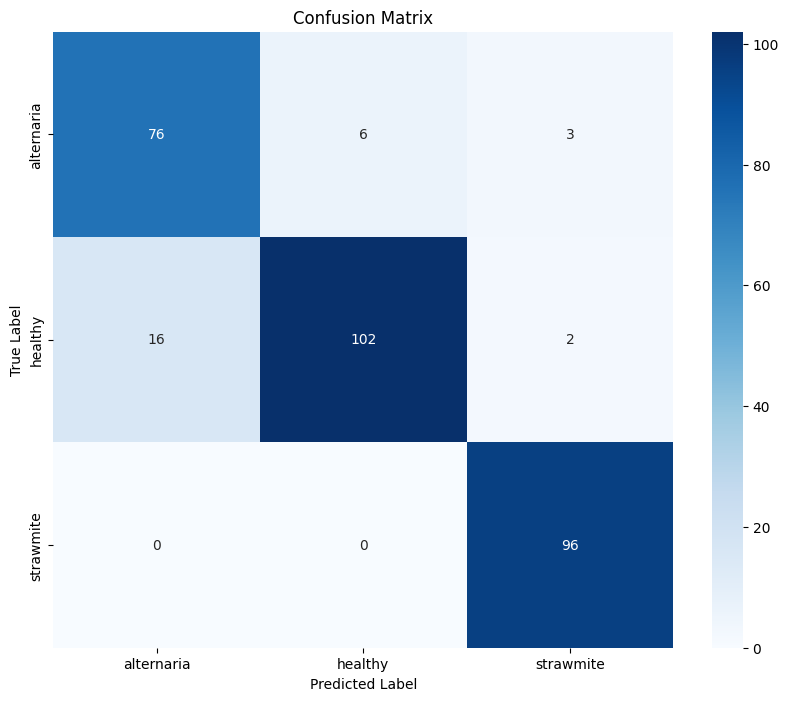

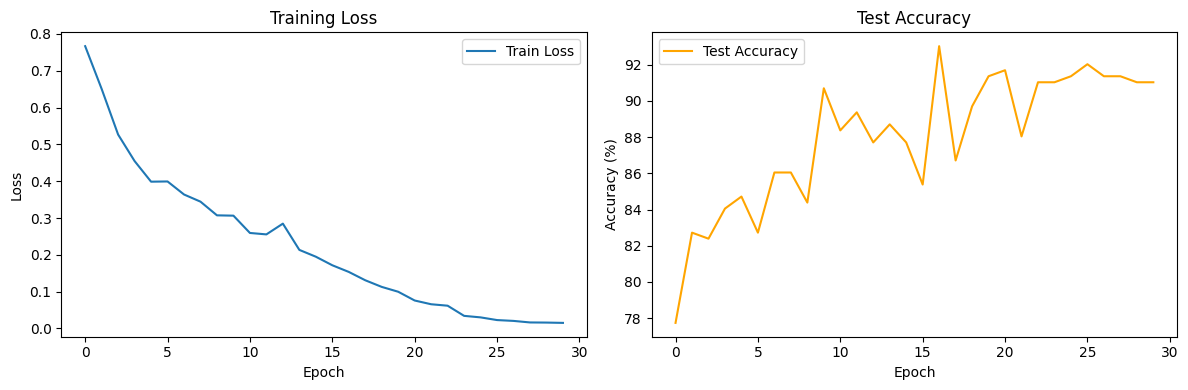

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        x = self.proj(x)  # (batch_size, embed_dim, n_patches^0.5, n_patches^0.5)
        x = x.flatten(2)  # (batch_size, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batch_size, n_patches, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.attn_dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, n_tokens, embed_dim = x.shape

        qkv = self.qkv(x).reshape(batch_size, n_tokens, 3, self.num_heads, self.head_dim)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_dropout(attn)

        x = (attn @ v).transpose(1, 2).reshape(batch_size, n_tokens, embed_dim)
        x = self.proj(x)
        x = self.proj_dropout(x)
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio, dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SpinachViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768, num_heads=12, num_layers=12, mlp_ratio=4, dropout=0.1, num_classes=3):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        num_patches = (img_size // patch_size) ** 2  # Corrected calculation for number of patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))  # Added +1 for the class token
        self.pos_drop = nn.Dropout(dropout)

        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

        self._init_weights()

    def _init_weights(self):
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.pos_embed, std=0.02)
        self.apply(self._init_weights_recursive)

    def _init_weights_recursive(self, m):
        if isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, std=0.02)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, nn.LayerNorm):
            nn.init.zeros_(m.bias)
            nn.init.ones_(m.weight)

    def forward(self, x):
        x = self.patch_embed(x)
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.pos_embed
        x = self.pos_drop(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        x = self.head(x[:, 0])
        return x

def create_dataloaders(train_dir, test_dir, batch_size=32, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
    ])

    try:
        train_dataset = datasets.ImageFolder(train_dir, transform=transform)
        test_dataset = datasets.ImageFolder(test_dir, transform=transform)
    except FileNotFoundError as e:
        raise ValueError(f"Dataset path error: {e}")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader, train_dataset.classes

def train_model(model, train_loader, test_loader, num_epochs, device, classes):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.05)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    best_acc = 0.0
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)

                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = 100. * correct / total
        test_accuracies.append(accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}: Training Loss: {train_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), 'best_spinach_vit.pth')

        scheduler.step()

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=classes))

    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return train_losses, test_accuracies

def plot_curves(train_losses, test_accuracies):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Test Accuracy', color='orange')
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    img_size = 224
    patch_size = 16
    embed_dim = 384
    num_heads = 6
    num_layers = 8
    mlp_ratio = 4
    dropout = 0.1
    batch_size = 32
    num_epochs = 30

    model = SpinachViT(
        img_size=img_size,
        patch_size=patch_size,
        embed_dim=embed_dim,
        num_heads=num_heads,
        num_layers=num_layers,
        mlp_ratio=mlp_ratio,
        dropout=dropout
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    train_loader, test_loader, classes = create_dataloaders(
        "/kaggle/input/leaf-data/Leaf_Dataset/Train",
        "/kaggle/input/leaf-data/Leaf_Dataset/Test",
        batch_size=batch_size,
        img_size=img_size
    )

    train_losses, test_accuracies = train_model(
        model, train_loader, test_loader, num_epochs, device, classes
    )

    plot_curves(train_losses, test_accuracies)

if __name__ == "__main__":
    main()


In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

class EnsembleModel(nn.Module):
    def __init__(self, cnn_model, vit_model, device):
        super().__init__()
        self.cnn_model = cnn_model
        self.vit_model = vit_model
        self.device = device
        
        # Weights for ensemble (can be learned or fixed)
        self.weights = nn.Parameter(torch.ones(2) / 2)
        
    def forward(self, x):
        cnn_output = self.cnn_model(x)
        vit_output = self.vit_model(x)
        
        # Softmax the weights
        weights = F.softmax(self.weights, dim=0)
        
        # Weighted average of predictions
        ensemble_output = (weights[0] * cnn_output + 
                         weights[1] * vit_output)
        
        return ensemble_output

def train_ensemble(config, cnn_model, vit_model, train_loader, val_loader):
    # Move models to device
    cnn_model = cnn_model.to(config.device)
    vit_model = vit_model.to(config.device)
    
    # Create ensemble
    ensemble = EnsembleModel(cnn_model, vit_model, config.device).to(config.device)
    
    # Training setup
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = torch.optim.AdamW(
        ensemble.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    
    # Training loop
    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        # Training
        ensemble.train()
        train_loss = 0
        correct = 0
        total = 0
        
        pbar = tqdm(train_loader, desc='Training')
        for batch_idx, (inputs, targets) in enumerate(pbar):
            inputs, targets = inputs.to(config.device), targets.to(config.device)
            
            optimizer.zero_grad()
            
            with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
                outputs = ensemble(inputs)
                loss = criterion(outputs, targets)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            pbar.set_postfix({
                'Loss': f'{train_loss/(batch_idx+1):.3f}',
                'Acc': f'{100.*correct/total:.2f}%'
            })
            
        scheduler.step()
        
        # Validation
        ensemble.eval()
        val_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        
        with torch.no_grad():
            pbar = tqdm(val_loader, desc='Validation')
            for batch_idx, (inputs, targets) in enumerate(pbar):
                inputs, targets = inputs.to(config.device), targets.to(config.device)
                
                outputs = ensemble(inputs)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
                
                pbar.set_postfix({
                    'Loss': f'{val_loss/(batch_idx+1):.3f}',
                    'Acc': f'{100.*correct/total:.2f}%'
                })
        
        val_acc = 100. * correct / total
        print(f'\nValidation Accuracy: {val_acc:.2f}%')
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(ensemble.state_dict(), 'best_ensemble.pth')
            
            # Print classification report
            print('\nClassification Report:')
            print(classification_report(all_targets, all_preds, 
                                     target_names=train_loader.dataset.classes))
            
            # Plot confusion matrix
            plt.figure(figsize=(10, 8))
            cm = confusion_matrix(all_targets, all_preds)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=train_loader.dataset.classes,
                       yticklabels=train_loader.dataset.classes)
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()
            
            # Print ensemble weights
            weights = F.softmax(ensemble.weights, dim=0)
            print('\nEnsemble Weights:')
            print(f'CNN Weight: {weights[0]:.3f}')
            print(f'ViT Weight: {weights[1]:.3f}')
    
    return ensemble, best_val_acc

def evaluate_ensemble(ensemble, test_loader, device):
    ensemble.eval()
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            outputs = ensemble(inputs)
            _, predicted = outputs.max(1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.numpy())
    
    # Print final results
    print('\nTest Results:')
    print(classification_report(all_targets, all_preds,
                              target_names=test_loader.dataset.classes))
    
    # Plot final confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_targets, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=test_loader.dataset.classes,
                yticklabels=test_loader.dataset.classes)
    plt.title('Final Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

def count_parameters(model):
    """Calculate total trainable parameters in the model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def get_model_size(model):
    """Calculate model size in MB"""
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

class EnsembleModel(nn.Module):
    def __init__(self, cnn_model, vit_model, device):
        super().__init__()
        self.cnn_model = cnn_model
        self.vit_model = vit_model
        self.device = device
        
        # Weights for ensemble (can be learned or fixed)
        self.weights = nn.Parameter(torch.ones(2) / 2)
        
    def forward(self, x):
        cnn_output = self.cnn_model(x)
        vit_output = self.vit_model(x)
        
        # Softmax the weights
        weights = F.softmax(self.weights, dim=0)
        
        # Weighted average of predictions
        ensemble_output = (weights[0] * cnn_output + 
                         weights[1] * vit_output)
        
        return ensemble_output

def train_ensemble(config, cnn_model, vit_model, train_loader, val_loader):
    # Move models to device
    cnn_model = cnn_model.to(config.device)
    vit_model = vit_model.to(config.device)
    
    # Create ensemble
    ensemble = EnsembleModel(cnn_model, vit_model, config.device).to(config.device)
    
    # Print model statistics
    print("\nModel Statistics:")
    print(f"Total trainable parameters: {count_parameters(ensemble):,}")
    print(f"Model size: {get_model_size(ensemble):.2f} MB")
    
    # Training setup
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = torch.optim.AdamW(
        ensemble.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    
    # Metrics tracking
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    epoch_times = []
    
    # Training loop
    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        epoch_start_time = time.time()
        
        # Training
        ensemble.train()
        train_loss = 0
        correct = 0
        total = 0
        
        pbar = tqdm(train_loader, desc='Training')
        for batch_idx, (inputs, targets) in enumerate(pbar):
            inputs, targets = inputs.to(config.device), targets.to(config.device)
            
            optimizer.zero_grad()
            
            with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
                outputs = ensemble(inputs)
                loss = criterion(outputs, targets)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            pbar.set_postfix({
                'Loss': f'{train_loss/(batch_idx+1):.3f}',
                'Acc': f'{100.*correct/total:.2f}%'
            })
        
        train_epoch_loss = train_loss / len(train_loader)
        train_epoch_acc = 100. * correct / total
        train_losses.append(train_epoch_loss)
        train_accuracies.append(train_epoch_acc)
        
        scheduler.step()
        
        # Validation
        ensemble.eval()
        val_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        
        with torch.no_grad():
            pbar = tqdm(val_loader, desc='Validation')
            for batch_idx, (inputs, targets) in enumerate(pbar):
                inputs, targets = inputs.to(config.device), targets.to(config.device)
                
                outputs = ensemble(inputs)
                loss = criterion(outputs, targets)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                all_preds.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
                
                pbar.set_postfix({
                    'Loss': f'{val_loss/(batch_idx+1):.3f}',
                    'Acc': f'{100.*correct/total:.2f}%'
                })
        
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = 100. * correct / total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)
        
        # Calculate epoch time
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        epoch_times.append(epoch_time)
        
        print(f'\nEpoch Time: {epoch_time:.2f} seconds')
        print(f'Validation Accuracy: {val_epoch_acc:.2f}%')
        
        # Save best model
        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            torch.save(ensemble.state_dict(), 'best_ensemble.pth')
            
            # Print classification report
            print('\nClassification Report:')
            print(classification_report(all_targets, all_preds, 
                                     target_names=train_loader.dataset.classes))
            
            # Print ensemble weights
            weights = F.softmax(ensemble.weights, dim=0)
            print('\nEnsemble Weights:')
            print(f'CNN Weight: {weights[0]:.3f}')
            print(f'ViT Weight: {weights[1]:.3f}')
    
    # Print final training statistics
    print("\nTraining Statistics:")
    print(f"Best validation accuracy: {best_val_acc:.2f}%")
    print(f"Average time per epoch: {np.mean(epoch_times):.2f} seconds")
    
    # Plot training curves
    plt.figure(figsize=(15, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_curvesensembe.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_targets, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_loader.dataset.classes,
                yticklabels=train_loader.dataset.classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('confusion_matrixen.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    return ensemble, best_val_acc

def evaluate_ensemble(ensemble, test_loader, device):
    ensemble.eval()
    all_preds = []
    all_targets = []
    test_loss = 0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = ensemble(inputs)
            
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    test_loss = test_loss / len(test_loader)
    test_accuracy = 100. * correct / total
    
    # Print final results
    print('\nTest Results:')
    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    print('\nClassification Report:')
    print(classification_report(all_targets, all_preds,
                              target_names=test_loader.dataset.classes))
    
    # Plot final confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(all_targets, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=test_loader.dataset.classes,
                yticklabels=test_loader.dataset.classes)
    plt.title('Final Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('test_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.close()

In [4]:
def create_dataloaders(train_dir, test_dir, batch_size=32, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
    ])

    try:
        train_dataset = datasets.ImageFolder(train_dir, transform=transform)
        test_dataset = datasets.ImageFolder(test_dir, transform=transform)
    except FileNotFoundError as e:
        raise ValueError(f"Dataset path error: {e}")

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [16]:
# Load pre-trained models
cnn_model = ImprovedLeafCNN(config.num_classes)
cnn_model.load_state_dict(torch.load('/kaggle/working/models/best_model.pth'))
vit_model= SpinachViT(config.num_classes)

vit_model.load_state_dict(torch.load('/kaggle/working/best_spinach_vit.pth'))

# Create dataloaders (adjusted)
train_loader, val_loader = create_dataloaders(
    "/kaggle/input/leaf-data/Leaf_Dataset/Train",
    "/kaggle/input/leaf-data/Leaf_Dataset/Test",
    batch_size=32,
    img_size=224
)

# Ensure torch.load uses weights_only=True
cnn_model.load_state_dict(torch.load('/kaggle/working/models/best_model.pth', weights_only=True))
vit_model.load_state_dict(torch.load('/kaggle/working/best_spinach_vit.pth', weights_only=True))

# Train ensemble
ensemble_model, best_acc = train_ensemble(
    config,
    cnn_model,
    vit_model,
    train_loader,
    val_loader
)


<ipython-input-16-4240c1ed2cd0>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load('/kaggle/working/models/best_model.pth'))


RuntimeError: Error(s) in loading state_dict for ImprovedLeafCNN:
	size mismatch for classifier.9.weight: copying a param with shape torch.Size([3, 256]) from checkpoint, the shape in current model is torch.Size([5, 256]).
	size mismatch for classifier.9.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([5]).

[I 2025-02-02 21:52:18,409] A new study created in memory with name: no-name-08f4817d-cddc-4130-bf32-9fbae8d3c47a
<ipython-input-25-3fcd36ca254f>:175: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  batch_size = trial.suggest_int('batch_size', 4, 8, 16)
Epoch 1/30:   0%|          | 0/448 [00:01<?, ?it/s]
[W 2025-02-02 21:52:19,917] Trial 0 failed with parameters: {'batch_size': 4, 'learning_rate': 4.885244550890561e-05, 'weight_decay': 2.1559711626620778e-06, 'label_smoothing': 0.06943080768296432, 'vertical_flip': True, 'rotation_degrees': 22, 'brightness': 0.2522467778634893, 'contrast': 0.1757706278188447, 'saturation': 0.17025969237082733, 'n_blocks': 3, 'n_conv_layers_0': 3, 'out_channels_0': 104, 'kernel_size_0_0': 4, 'activation_0_0': 'ReLU', 'kernel_size_0_1': 4, 'activation_0_1': 'LeakyReLU', 'kernel_size_0_2': 3, 'activation_0_2': 'LeakyReLU', 'pool_0': 'max', 'residual_0': False, 'n_conv_layers_1': 

OutOfMemoryError: CUDA out of memory. Tried to allocate 82.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 29.12 MiB is free. Process 3393 has 15.86 GiB memory in use. Of the allocated memory 15.49 GiB is allocated by PyTorch, and 67.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [19]:
!pip install optuna


In [3]:
import optuna
from optuna.trial import Trial
import torch.cuda.amp as amp
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import time

class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    num_classes = 3

def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

class OptimizedLeafCNN(nn.Module):
    def __init__(self, trial: Trial):
        super(OptimizedLeafCNN, self).__init__()
        
        # Hyperparameters to optimize
        self.n_layers = trial.suggest_int('n_layers', 2, 4)
        self.n_channels = trial.suggest_int('n_channels_base', 32, 128, step=32)
        self.n_dense = trial.suggest_int('n_dense', 128, 512, step=128)
        self.dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
        
        # Initial convolution
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, self.n_channels, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(self.n_channels),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        # Dynamic residual blocks
        self.res_blocks = nn.ModuleList()
        current_channels = self.n_channels
        for i in range(self.n_layers):
            out_channels = current_channels * 2
            self.res_blocks.append(self._make_residual_block(current_channels, out_channels))
            current_channels = out_channels
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(current_channels * 2, self.n_dense),
            nn.ReLU(),
            nn.BatchNorm1d(self.n_dense),
            nn.Dropout(self.dropout_rate),
            nn.Linear(self.n_dense, Config.num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)
            skip = res_block[-1](identity)
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

def objective(trial: Trial):
    config = Config()
    set_seed(config.seed)
    
    # Hyperparameters to optimize
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)
    label_smoothing = trial.suggest_float('label_smoothing', 0.0, 0.2)
    
    # Data preparation
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), 
                              transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), 
                            transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, 
                            shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, 
                          shuffle=False, num_workers=config.num_workers)
    
    # Model and training setup
    model = OptimizedLeafCNN(trial).to(config.device)
    criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scaler = torch.cuda.amp.GradScaler()  # Simplified GradScaler initialization
    
    # Training metrics
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    total_time = 0
    
    # Calculate model size
    model_size = sum(p.numel() * p.element_size() for p in model.parameters()) / (1024 * 1024)  # Size in MB
    n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    for epoch in range(config.num_epochs):
        start_time = time.time()
        
        # Training
        model.train()
        epoch_train_losses = []
        epoch_train_accs = []
        
        for images, labels in train_loader:
            images, labels = images.to(config.device), labels.to(config.device)
            optimizer.zero_grad()
            
            with torch.cuda.amp.autocast():  # Simplified autocast usage
                outputs = model(images)
                loss = criterion(outputs, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            acc = (outputs.argmax(dim=1) == labels).float().mean().item()
            epoch_train_losses.append(loss.item())
            epoch_train_accs.append(acc)
        
        # Validation
        model.eval()
        epoch_val_losses = []
        epoch_val_accs = []
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(config.device), labels.to(config.device)
                with torch.cuda.amp.autocast():  # Added autocast for validation as well
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                
                acc = (outputs.argmax(dim=1) == labels).float().mean().item()
                epoch_val_losses.append(loss.item())
                epoch_val_accs.append(acc)
        
        # Record metrics
        train_loss = np.mean(epoch_train_losses)
        val_loss = np.mean(epoch_val_losses)
        train_acc = np.mean(epoch_train_accs)
        val_acc = np.mean(epoch_val_accs)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        trial.report(val_acc, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    
    avg_time_per_epoch = total_time / config.num_epochs
    
    # Plot training curves
    if trial.number == 0:  # Only plot for the first trial
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Loss plot
        ax1.plot(train_losses, label='Train Loss')
        ax1.plot(val_losses, label='Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Loss vs Epoch')
        ax1.legend()
        
        # Accuracy plot
        ax2.plot(train_accs, label='Train Accuracy')
        ax2.plot(val_accs, label='Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Accuracy vs Epoch')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nModel Statistics:")
        print(f"Model Size: {model_size:.2f} MB")
        print(f"Number of trainable parameters: {n_params:,}")
        print(f"Average training time per epoch: {avg_time_per_epoch:.2f} seconds")
    
    return val_acc

def optimize_model():
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, timeout=3600)  # 20 trials or 1 hour timeout
    
    print("\nBest trial:")
    trial = study.best_trial
    print(f"Value: {trial.value}")
    print("\nBest hyperparameters:")
    for key, value in trial.params.items():
        print(f"{key}: {value}")
    
    # Plot optimization history
    optuna.visualization.plot_optimization_history(study)
    plt.show()
    
    return study.best_trial

if __name__ == "__main__":
    best_trial = optimize_model()

[I 2025-02-05 06:13:29,820] A new study created in memory with name: no-name-7427cc91-41a0-436d-a823-8c913ae54ad6
<ipython-input-3-2459d2b0b0d2>:150: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()  # Simplified GradScaler initialization
<ipython-input-3-2459d2b0b0d2>:175: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Simplified autocast usage
[W 2025-02-05 06:15:26,544] Trial 0 failed with parameters: {'learning_rate': 0.0001012144359667201, 'weight_decay': 5.635344494340613e-05, 'label_smoothing': 0.10407192508791466, 'n_layers': 4, 'n_channels_base': 64, 'n_dense': 512, 'dropout_rate': 0.20989182526972075} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_o

KeyboardInterrupt: 

<ipython-input-4-febbd28c6f78>:206: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Number of trainable parameters: 5491203

Epoch 1/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-4-febbd28c6f78>:152: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


Train Loss: 1.1306, Train Acc: 0.4397
Val Loss: 0.9365, Val Acc: 0.4344
Epoch Time: 171.23 seconds

Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 1.0595, Train Acc: 0.4821
Val Loss: 0.8840, Val Acc: 0.5437
Epoch Time: 150.48 seconds

Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.9647, Train Acc: 0.5871
Val Loss: 0.7323, Val Acc: 0.7236
Epoch Time: 150.27 seconds

Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.8821, Train Acc: 0.6557
Val Loss: 0.5902, Val Acc: 0.8812
Epoch Time: 149.39 seconds

Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.8105, Train Acc: 0.7031
Val Loss: 0.5985, Val Acc: 0.8656
Epoch Time: 152.04 seconds

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.7741, Train Acc: 0.7299
Val Loss: 0.7711, Val Acc: 0.7173
Epoch Time: 151.84 seconds

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.7716, Train Acc: 0.7249
Val Loss: 0.5432, Val Acc: 0.8767
Epoch Time: 153.44 seconds

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.7204, Train Acc: 0.7494
Val Loss: 0.5905, Val Acc: 0.8454
Epoch Time: 152.47 seconds

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.6689, Train Acc: 0.7863
Val Loss: 0.6532, Val Acc: 0.8236
Epoch Time: 151.50 seconds

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.6461, Train Acc: 0.8075
Val Loss: 0.6091, Val Acc: 0.8187
Epoch Time: 149.78 seconds

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


Train Loss: 0.6063, Train Acc: 0.8376
Val Loss: 0.4241, Val Acc: 0.9531
Epoch Time: 150.02 seconds

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.5728, Train Acc: 0.8549
Val Loss: 0.5134, Val Acc: 0.8656
Epoch Time: 151.36 seconds

Epoch 13/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5705, Train Acc: 0.8571
Val Loss: 0.4920, Val Acc: 0.9250
Epoch Time: 153.45 seconds

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.5729, Train Acc: 0.8571
Val Loss: 0.4885, Val Acc: 0.9094
Epoch Time: 151.77 seconds

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.5460, Train Acc: 0.8700
Val Loss: 0.4539, Val Acc: 0.9313
Epoch Time: 141.26 seconds

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5399, Train Acc: 0.8694
Val Loss: 0.4737, Val Acc: 0.9219
Epoch Time: 150.94 seconds

Epoch 17/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.5390, Train Acc: 0.8778
Val Loss: 0.4205, Val Acc: 0.9688
Epoch Time: 152.76 seconds

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.5263, Train Acc: 0.8867
Val Loss: 0.4261, Val Acc: 0.9437
Epoch Time: 150.33 seconds

Epoch 19/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


Train Loss: 0.5256, Train Acc: 0.8806
Val Loss: 0.4669, Val Acc: 0.9125
Epoch Time: 150.91 seconds

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.5338, Train Acc: 0.8772
Val Loss: 0.5422, Val Acc: 0.8844
Epoch Time: 153.33 seconds

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.5193, Train Acc: 0.8884
Val Loss: 0.4174, Val Acc: 0.9594
Epoch Time: 152.41 seconds

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5162, Train Acc: 0.8862
Val Loss: 0.4237, Val Acc: 0.9437
Epoch Time: 152.41 seconds

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


Train Loss: 0.5088, Train Acc: 0.8884
Val Loss: 0.4311, Val Acc: 0.9344
Epoch Time: 153.10 seconds

Epoch 24/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.4921, Train Acc: 0.9051
Val Loss: 0.5251, Val Acc: 0.8875
Epoch Time: 151.44 seconds

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.4876, Train Acc: 0.9057
Val Loss: 0.4918, Val Acc: 0.9156
Epoch Time: 151.89 seconds

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it]


Train Loss: 0.5027, Train Acc: 0.8951
Val Loss: 0.4612, Val Acc: 0.9281
Epoch Time: 139.36 seconds

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.4816, Train Acc: 0.9051
Val Loss: 0.4231, Val Acc: 0.9375
Epoch Time: 154.58 seconds

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.4927, Train Acc: 0.8990
Val Loss: 0.4064, Val Acc: 0.9563
Epoch Time: 152.47 seconds

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.4800, Train Acc: 0.9090
Val Loss: 0.4192, Val Acc: 0.9469
Epoch Time: 152.13 seconds

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.4939, Train Acc: 0.8968
Val Loss: 0.4534, Val Acc: 0.9125
Epoch Time: 153.05 seconds
Average time per epoch: 151.71 seconds


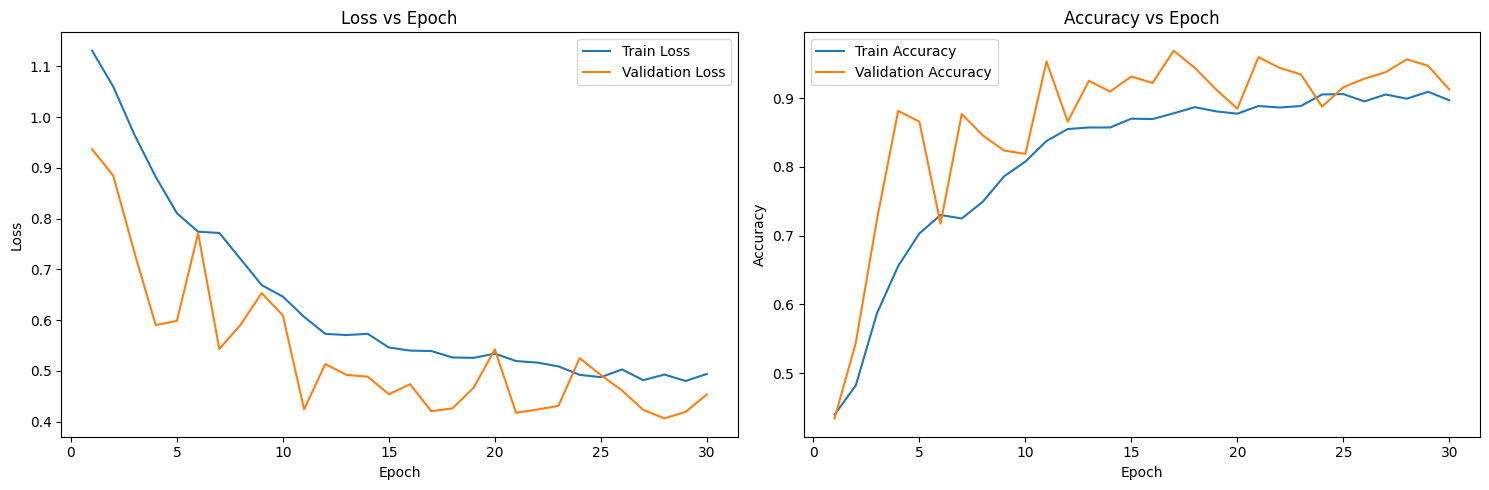

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.98      0.71      0.82        85
     healthy       0.90      0.97      0.94       120
   strawmite       0.87      1.00      0.93        96

    accuracy                           0.91       301
   macro avg       0.92      0.89      0.90       301
weighted avg       0.91      0.91      0.90       301



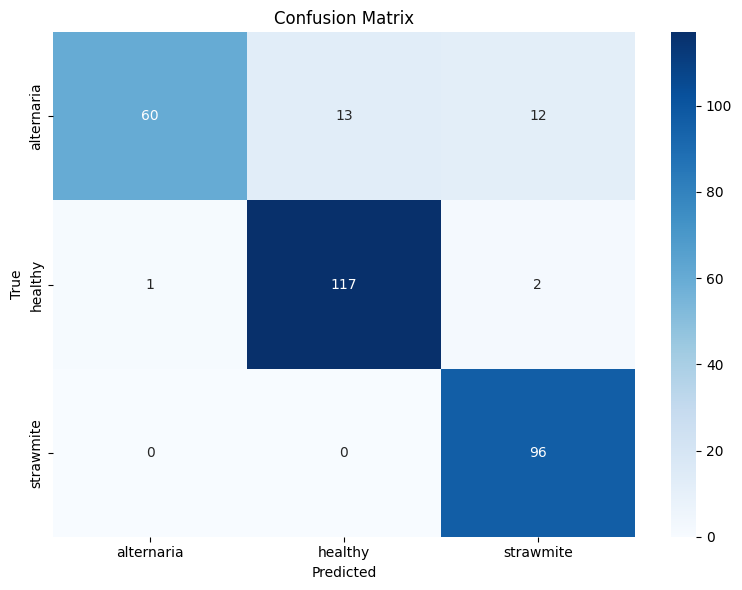

In [4]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# Utility functions
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses = []
    accuracies = []
    
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = []
    accuracies = []
    all_preds, all_labels = [], []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)
    
    # Model setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    print(f"Number of trainable parameters: {count_parameters(model)}")
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()
    
    # Tracking metrics
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_val_acc = 0
    total_time = 0
    
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        start_time = time.time()
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels = validate(model, val_loader, criterion, config)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        print(f"Epoch Time: {epoch_time:.2f} seconds")
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))
    
    avg_time_per_epoch = total_time / config.num_epochs
    print(f"Average time per epoch: {avg_time_per_epoch:.2f} seconds")
    
    # Plot metrics side by side
    plt.figure(figsize=(15, 5))
    
    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    
    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('/kaggle/working/training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Classification Report:")
    print(classification_report(labels, preds, target_names=train_dataset.classes))
    
    # Plot and save confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=train_dataset.classes, 
                yticklabels=train_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('/kaggle/working/confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

# 6. Run the Training
if __name__ == "__main__":
    config = Config()
    train_model(config)

Epoch 1: Train Loss=0.9143, Train Acc=61.94%, Test Loss=0.7095, Test Acc=56.81%


Epoch 2: Train Loss=0.6155, Train Acc=72.38%, Test Loss=0.4887, Test Acc=80.73%


Epoch 3: Train Loss=0.5089, Train Acc=79.58%, Test Loss=0.4566, Test Acc=81.73%


Epoch 4: Train Loss=0.4636, Train Acc=81.47%, Test Loss=0.2956, Test Acc=87.71%


Epoch 5: Train Loss=0.4303, Train Acc=82.87%, Test Loss=0.2937, Test Acc=88.04%


Epoch 6: Train Loss=0.3756, Train Acc=84.71%, Test Loss=0.7782, Test Acc=63.12%


Epoch 7: Train Loss=0.4243, Train Acc=83.20%, Test Loss=0.3773, Test Acc=83.06%


Epoch 8: Train Loss=0.3185, Train Acc=88.00%, Test Loss=0.3009, Test Acc=88.04%


Epoch 9: Train Loss=0.3257, Train Acc=86.94%, Test Loss=0.2671, Test Acc=89.04%


Epoch 10: Train Loss=0.3096, Train Acc=88.23%, Test Loss=0.3091, Test Acc=85.38%


Epoch 11: Train Loss=0.2740, Train Acc=89.51%, Test Loss=0.2806, Test Acc=91.03%


Epoch 12: Train Loss=0.2888, Train Acc=88.78%, Test Loss=0.3992, Test Acc=79.73%


Epoch 13: Train Loss=0.2651, Train Acc=89.40%, Test Loss=0.2735, Test Acc=90.03%


Epoch 14: Train Loss=0.2263, Train Acc=90.90%, Test Loss=0.2188, Test Acc=91.03%


Epoch 15: Train Loss=0.1903, Train Acc=92.58%, Test Loss=0.2372, Test Acc=92.36%


Epoch 16: Train Loss=0.1712, Train Acc=93.81%, Test Loss=0.2079, Test Acc=92.36%


Epoch 17: Train Loss=0.1335, Train Acc=94.98%, Test Loss=0.5145, Test Acc=81.40%


Epoch 18: Train Loss=0.1451, Train Acc=94.59%, Test Loss=0.2469, Test Acc=92.03%


Epoch 19: Train Loss=0.1060, Train Acc=96.09%, Test Loss=0.3128, Test Acc=88.37%


Epoch 20: Train Loss=0.0870, Train Acc=96.82%, Test Loss=0.2679, Test Acc=90.03%


Epoch 21: Train Loss=0.0742, Train Acc=97.21%, Test Loss=0.2754, Test Acc=91.36%


Epoch 22: Train Loss=0.0601, Train Acc=97.54%, Test Loss=0.4714, Test Acc=87.71%


Epoch 23: Train Loss=0.0381, Train Acc=98.44%, Test Loss=0.5539, Test Acc=87.71%


Epoch 24: Train Loss=0.0253, Train Acc=99.39%, Test Loss=0.4613, Test Acc=89.70%


Epoch 25: Train Loss=0.0182, Train Acc=99.55%, Test Loss=0.4358, Test Acc=90.03%


Epoch 26: Train Loss=0.0152, Train Acc=99.55%, Test Loss=0.4463, Test Acc=90.03%


Epoch 27: Train Loss=0.0115, Train Acc=99.78%, Test Loss=0.4731, Test Acc=89.70%


Epoch 28: Train Loss=0.0108, Train Acc=99.83%, Test Loss=0.4608, Test Acc=90.37%


Epoch 29: Train Loss=0.0098, Train Acc=99.78%, Test Loss=0.4652, Test Acc=89.70%


Epoch 30: Train Loss=0.0090, Train Acc=99.83%, Test Loss=0.4688, Test Acc=89.70%


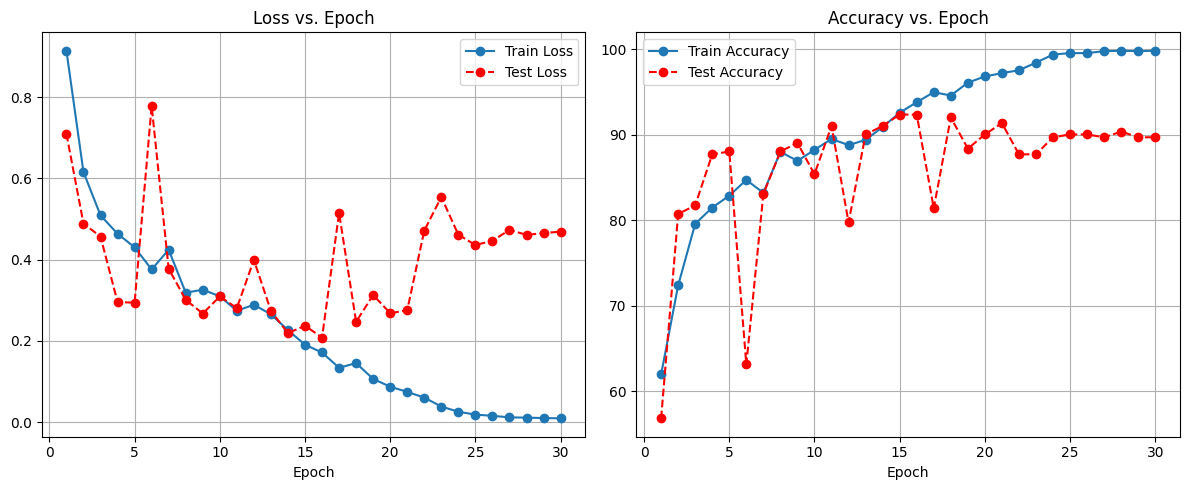

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        x = self.proj(x)  # (batch_size, embed_dim, n_patches^0.5, n_patches^0.5)
        x = x.flatten(2)  # (batch_size, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batch_size, n_patches, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.attn_dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, n_tokens, embed_dim = x.shape

        qkv = self.qkv(x).reshape(batch_size, n_tokens, 3, self.num_heads, self.head_dim)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_dropout(attn)

        x = (attn @ v).transpose(1, 2).reshape(batch_size, n_tokens, embed_dim)
        x = self.proj(x)
        x = self.proj_dropout(x)
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio, dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SpinachViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768, 
                 num_heads=12, num_layers=12, mlp_ratio=4, dropout=0.1, num_classes=3):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        num_patches = (img_size // patch_size) ** 2

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(dropout)

        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

        self._init_weights()

    def _init_weights(self):
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.pos_embed, std=0.02)
        self.apply(self._init_weights_recursive)

    def _init_weights_recursive(self, m):
        if isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, std=0.02)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, nn.LayerNorm):
            nn.init.zeros_(m.bias)
            nn.init.ones_(m.weight)

    def forward(self, x):
        x = self.patch_embed(x)
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.pos_embed
        x = self.pos_drop(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        x = self.head(x[:, 0])
        return x

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def create_dataloaders(train_dir, test_dir, batch_size=32, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
    ])

    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader, train_dataset.classes

def train_model(model, train_loader, test_loader, num_epochs, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.05)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100. * correct / total)

        model.eval()
        test_loss, correct, total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(100. * correct / total)

        print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Train Acc={train_accuracies[-1]:.2f}%, Test Loss={test_losses[-1]:.4f}, Test Acc={test_accuracies[-1]:.2f}%")

        scheduler.step()

    return train_losses, train_accuracies, test_losses, test_accuracies

def plot_training_curves(train_losses, train_accuracies, test_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].plot(epochs, train_losses, label="Train Loss", marker='o')
    axes[0].plot(epochs, test_losses, label="Test Loss", marker='o', linestyle='--', color='r')
    axes[1].plot(epochs, train_accuracies, label="Train Accuracy", marker='o')
    axes[1].plot(epochs, test_accuracies, label="Test Accuracy", marker='o', linestyle='--', color='r')

    axes[0].set_title("Loss vs. Epoch")
    axes[1].set_title("Accuracy vs. Epoch")
    for ax in axes: ax.legend(), ax.grid(), ax.set_xlabel("Epoch")

    plt.tight_layout()
    plt.savefig('/kaggle/working/training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

# -------------------------------
# Run the Training
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpinachViT().to(device)
train_loader, test_loader, _ = create_dataloaders("/kaggle/input/leaf-data/Leaf_Dataset/Train", "/kaggle/input/leaf-data/Leaf_Dataset/Test")
train_losses, train_accuracies, test_losses, test_accuracies = train_model(model, train_loader, test_loader, 30, device)
plot_training_curves(train_losses, train_accuracies, test_losses, test_accuracies)

In [16]:
acc=[56.81063122923588,
 80.73089700996678,
 81.72757475083057,
 87.70764119601328,
 88.03986710963456,
 63.12292358803987,
 83.05647840531562,
 88.03986710963456,
 89.03654485049834,
 85.38205980066445,
 91.0299003322259,
 79.734219269103,
 90.03322259136213,
 91.0299003322259,
 92.35880398671097,
 92.35880398671097,
 81.3953488372093,
 92.0265780730897,
 88.37209302325581,
 90.03322259136213,
 91.36212624584718,
 87.70764119601328,
 87.70764119601328,
 89.70099667774086,
 90.03322259136213,
 90.03322259136213,
 89.70099667774086,
 90.36544850498339,
 89.70099667774086,
 89.70099667774086]



Classification Report:
              precision    recall  f1-score   support

  alternaria      0.800     0.894     0.844        85
     healthy      0.952     0.825     0.884       120
   strawmite      0.931     0.990     0.960        96

    accuracy                          0.897       301
   macro avg      0.894     0.903     0.896       301
weighted avg      0.902     0.897     0.897       301



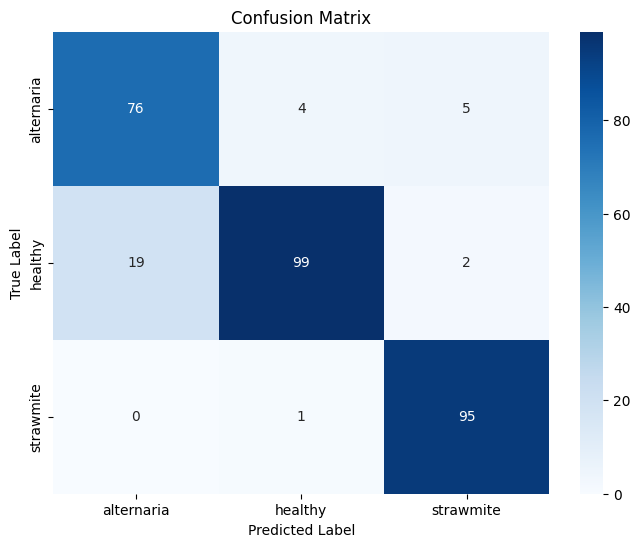

In [18]:
def evaluate_model(model, test_loader, classes, device):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes, digits=3))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function (use the same `test_loader` and `_` from before)
evaluate_model(model, test_loader, _, device)

In [ ]:
cnn_val_accuracy = [
    0.4344, 0.5437, 0.7236, 0.8812, 0.8656, 0.7173, 0.8767, 0.8454, 0.8236, 0.8187,
    0.9531, 0.8656, 0.9250, 0.9094, 0.9313, 0.9219, 0.9688, 0.9437, 0.9125, 0.8844,
    0.9594, 0.9437, 0.9344, 0.8875, 0.9156, 0.9281, 0.9375, 0.9563, 0.9469, 0.9125
]
cnn_res_SB_validation_accuracies = [
    0.3289,
    0.5548,
    0.7076,
    0.8472,
    0.8671,
    0.7575,
    0.8638,
    0.8206,
    0.7973,
    0.7874,
    0.8571,
    0.9003,
    0.8439,
    0.8970,
    0.8571,
    0.9236,
    0.9236,
    0.9435,
    0.9369,
    0.9236,
    0.9435,
    0.9402,
    0.9568,
    0.9003,
    0.9203,
    0.9302,
    0.8937,
    0.9502,
    0.8538,
    0.9601
]

EfficientnetBO_validation_accuracies = [
    0.9834,
    0.9635,
    0.9767,
    0.9767,
    0.9801,
    0.9834,
    0.9668,
    0.9734,
    0.9701,
    0.9635,
    0.9834,
    0.9834,
    0.9701,
    0.9834,
    0.9701,
    0.9668,
    0.9767,
    0.9767,
    0.9601,
    0.9734,
    0.9834,
    0.9601,
    0.9734,
    0.9734,
    0.9535,
    0.9701,
    0.9767,
    0.9801,
    0.9867,
    0.9801
]
transformer_aval_accuracies = [
    77.74,
    82.72,
    82.39,
    84.05,
    84.72,
    82.72,
    86.05,
    86.05,
    84.39,
    90.70,
    88.37,
    89.37,
    87.71,
    88.70,
    87.71,
    85.38,
    93.02,
    86.71,
    89.70,
    91.36,
    91.69,
    88.04,
    91.03,
    91.03,
    91.36,
    92.03,
    91.36,
    91.36,
    91.03,
    91.03
]

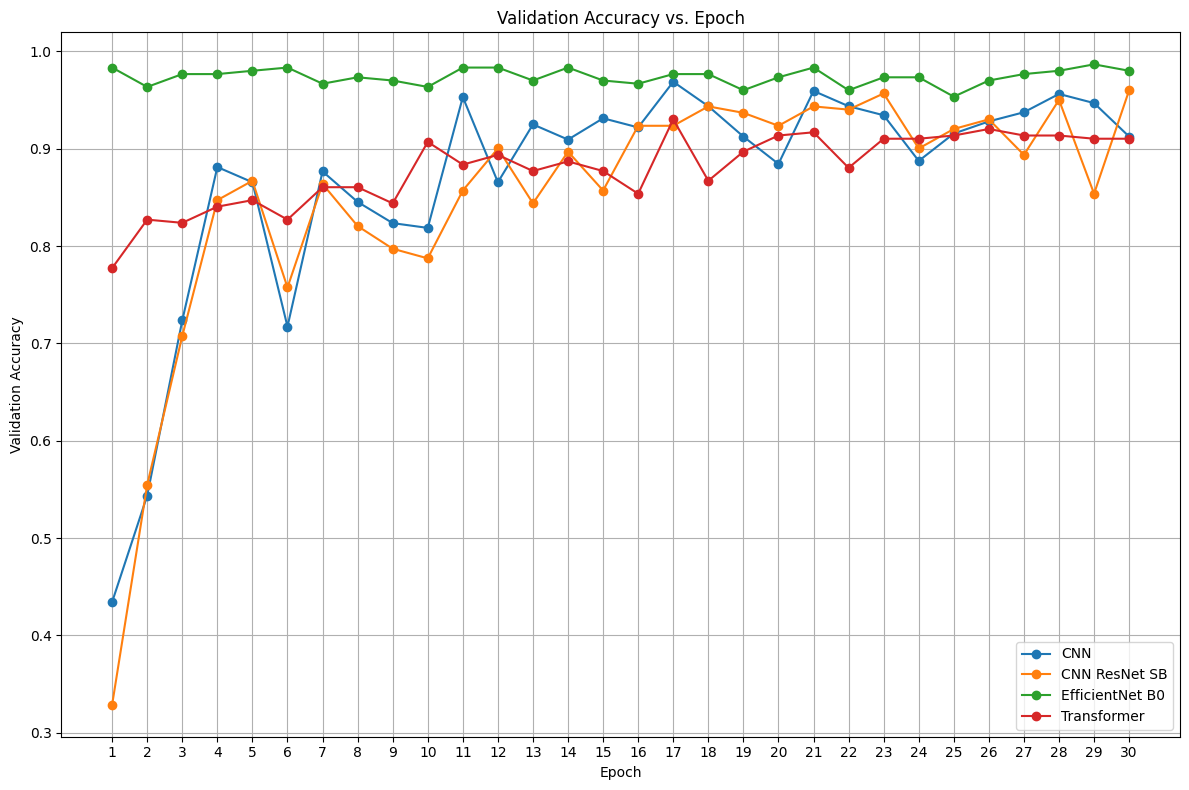

In [10]:
import matplotlib.pyplot as plt

cnn_val_accuracy = [
    0.4344, 0.5437, 0.7236, 0.8812, 0.8656, 0.7173, 0.8767, 0.8454, 0.8236, 0.8187,
    0.9531, 0.8656, 0.9250, 0.9094, 0.9313, 0.9219, 0.9688, 0.9437, 0.9125, 0.8844,
    0.9594, 0.9437, 0.9344, 0.8875, 0.9156, 0.9281, 0.9375, 0.9563, 0.9469, 0.9125
]
cnn_res_SB_validation_accuracies = [
    0.3289, 0.5548, 0.7076, 0.8472, 0.8671, 0.7575, 0.8638, 0.8206, 0.7973, 0.7874,
    0.8571, 0.9003, 0.8439, 0.8970, 0.8571, 0.9236, 0.9236, 0.9435, 0.9369, 0.9236,
    0.9435, 0.9402, 0.9568, 0.9003, 0.9203, 0.9302, 0.8937, 0.9502, 0.8538, 0.9601
]

EfficientnetBO_validation_accuracies = [
    0.9834, 0.9635, 0.9767, 0.9767, 0.9801, 0.9834, 0.9668, 0.9734, 0.9701, 0.9635,
    0.9834, 0.9834, 0.9701, 0.9834, 0.9701, 0.9668, 0.9767, 0.9767, 0.9601, 0.9734,
    0.9834, 0.9601, 0.9734, 0.9734, 0.9535, 0.9701, 0.9767, 0.9801, 0.9867, 0.9801
]
transformer_aval_accuracies = [
    77.74, 82.72, 82.39, 84.05, 84.72, 82.72, 86.05, 86.05, 84.39, 90.70, 88.37, 89.37,
    87.71, 88.70, 87.71, 85.38, 93.02, 86.71, 89.70, 91.36, 91.69, 88.04, 91.03, 91.03,
    91.36, 92.03, 91.36, 91.36, 91.03, 91.03
]

epochs = range(1, 31)  # Assuming 30 epochs

plt.figure(figsize=(12, 8))  # Adjust figure size for better readability

plt.plot(epochs, cnn_val_accuracy, label='CNN', marker='o')
plt.plot(epochs, cnn_res_SB_validation_accuracies, label='CNN ResNet SB', marker='o')
plt.plot(epochs, EfficientnetBO_validation_accuracies, label='EfficientNet B0', marker='o')
plt.plot(epochs, transformer_aval_accuracies_percentage, label='Transformer', marker='o')


plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.xticks(epochs) # Show all epoch numbers on the x-axis
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [9]:


transformer_aval_accuracies = [
    77.74, 82.72, 82.39, 84.05, 84.72, 82.72, 86.05, 86.05, 84.39, 90.70, 88.37, 89.37,
    87.71, 88.70, 87.71, 85.38, 93.02, 86.71, 89.70, 91.36, 91.69, 88.04, 91.03, 91.03,
    91.36, 92.03, 91.36, 91.36, 91.03, 91.03
]

transformer_aval_accuracies_percentage = [x / 100 for x in transformer_aval_accuracies]

print(transformer_aval_accuracies_percentage)

[0.7774, 0.8271999999999999, 0.8239, 0.8405, 0.8472, 0.8271999999999999, 0.8604999999999999, 0.8604999999999999, 0.8439, 0.907, 0.8837, 0.8937, 0.8771, 0.887, 0.8771, 0.8538, 0.9301999999999999, 0.8671, 0.897, 0.9136, 0.9168999999999999, 0.8804000000000001, 0.9103, 0.9103, 0.9136, 0.9203, 0.9136, 0.9136, 0.9103, 0.9103]


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# -------------------------------
# Patch Embedding Layer
# -------------------------------
class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        x = self.proj(x)
        x = x.flatten(2)
        x = x.transpose(1, 2)
        return x

# -------------------------------
# Multi-Head Attention
# -------------------------------
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.attn_dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, n_tokens, embed_dim = x.shape
        qkv = self.qkv(x).reshape(batch_size, n_tokens, 3, self.num_heads, self.head_dim)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_dropout(attn)
        x = (attn @ v).transpose(1, 2).reshape(batch_size, n_tokens, embed_dim)
        x = self.proj(x)
        x = self.proj_dropout(x)
        return x

# -------------------------------
# MLP Layer
# -------------------------------
class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

# -------------------------------
# Transformer Block
# -------------------------------
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio, dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

# -------------------------------
# SpinachViT Model
# -------------------------------
class SpinachViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768, 
                 num_heads=12, num_layers=12, mlp_ratio=4, dropout=0.1, num_classes=3):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        num_patches = (img_size // patch_size) ** 2

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(dropout)

        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

        self._init_weights()

    def _init_weights(self):
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.pos_embed, std=0.02)
        self.apply(self._init_weights_recursive)

    def _init_weights_recursive(self, m):
        if isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, std=0.02)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, nn.LayerNorm):
            nn.init.zeros_(m.bias)
            nn.init.ones_(m.weight)

    def forward(self, x):
        x = self.patch_embed(x)
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.pos_embed
        x = self.pos_drop(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        x = self.head(x[:, 0])
        return x

# -------------------------------
# Model Size and Parameter Count
# -------------------------------
def get_model_size_and_parameters(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_size_MB = total_params * 4 / (1024 ** 2)  # Convert bytes to megabytes
    print(f"Model size: {model_size_MB:.2f} MB")
    print(f"Total number of trainable parameters: {total_params:,}")

# -------------------------------
# Main Execution
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpinachViT(num_classes=3).to(device)

# Print model size and parameter count
get_model_size_and_parameters(model)


Model size: 327.30 MB
Total number of trainable parameters: 85,800,963



Epoch 1/30


Validation: 100%|██████████| 10/10 [00:25<00:00,  2.55s/it, Loss=1.0468, Acc=0.3289]


Train Loss: 1.1115, Train Accuracy: 0.4637
Validation Loss: 1.0468, Validation Accuracy: 0.3289
Validation ROC AUC (Macro): 0.8575

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.33      0.01      0.02        85
     healthy       0.29      0.02      0.03       120
   strawmite       0.33      1.00      0.50        96

    accuracy                           0.33       301
   macro avg       0.32      0.34      0.18       301
weighted avg       0.31      0.33      0.18       301



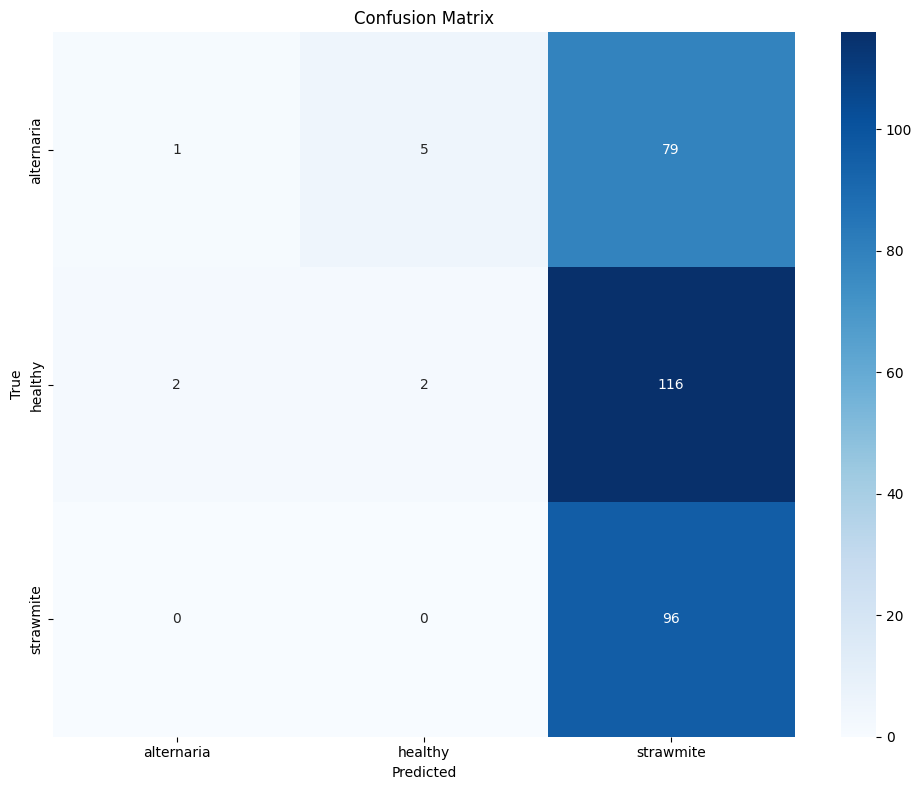

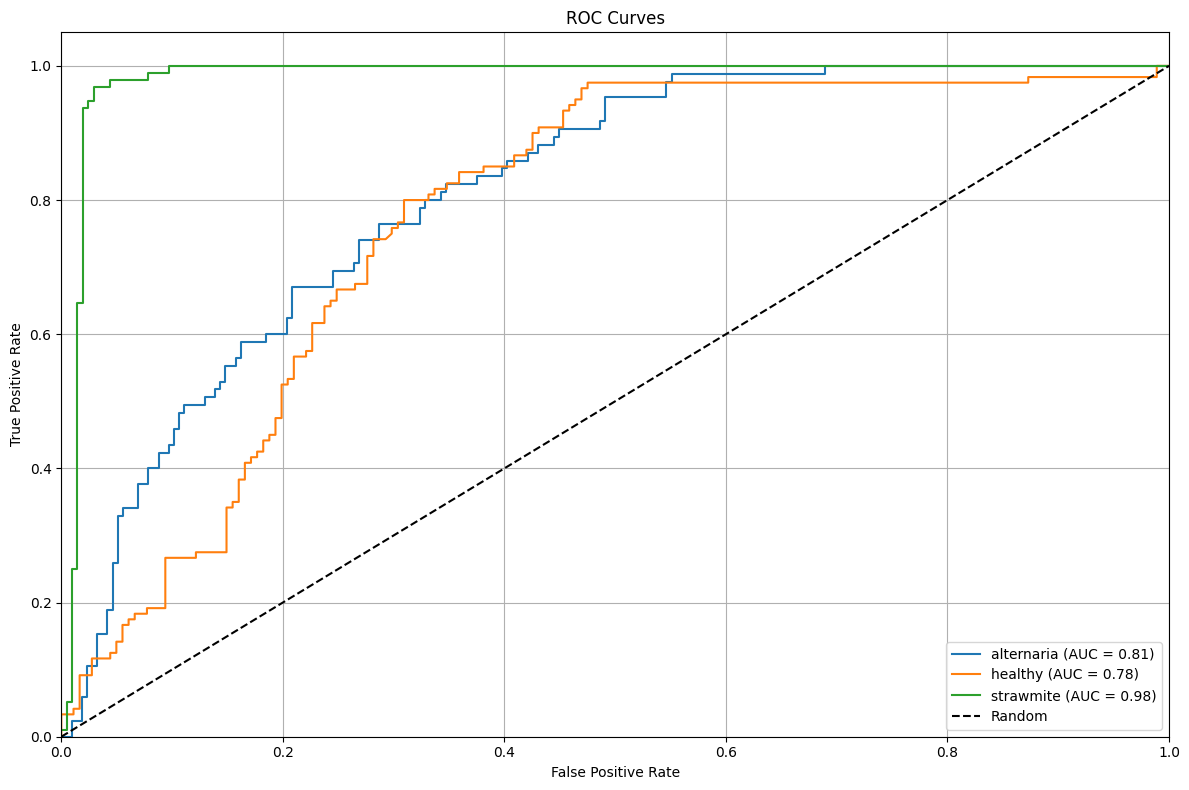


Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.8958, Acc=0.5548]


Train Loss: 1.0504, Train Accuracy: 0.4911
Validation Loss: 0.8958, Validation Accuracy: 0.5548
Validation ROC AUC (Macro): 0.8950

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.60      0.46      0.52        85
     healthy       0.74      0.27      0.39       120
   strawmite       0.50      1.00      0.66        96

    accuracy                           0.55       301
   macro avg       0.61      0.58      0.53       301
weighted avg       0.62      0.55      0.52       301



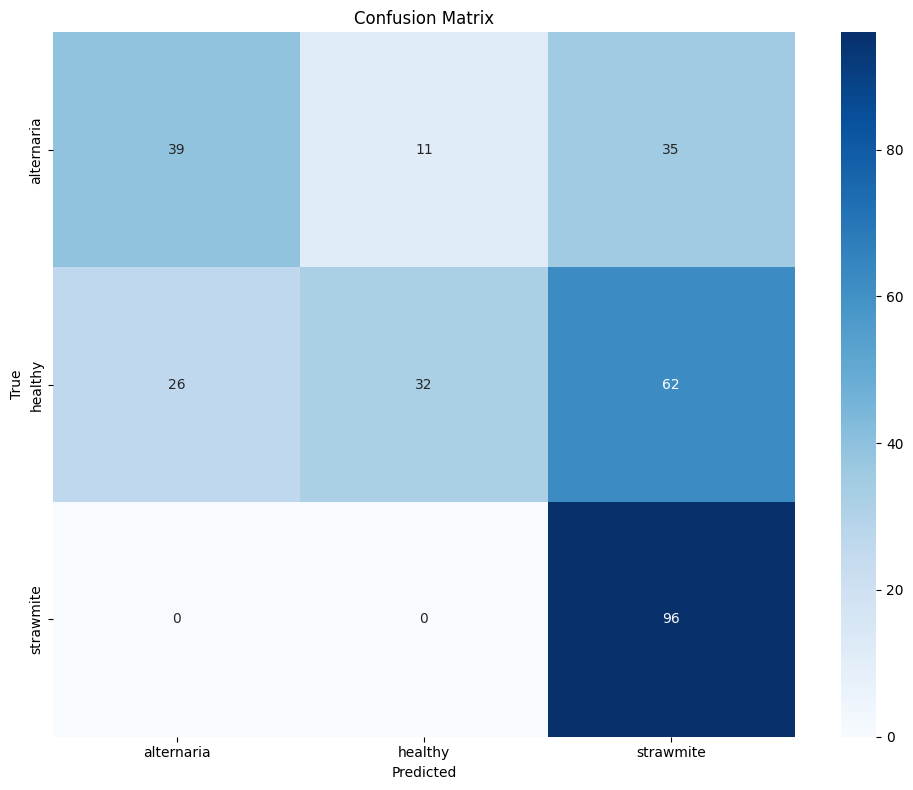

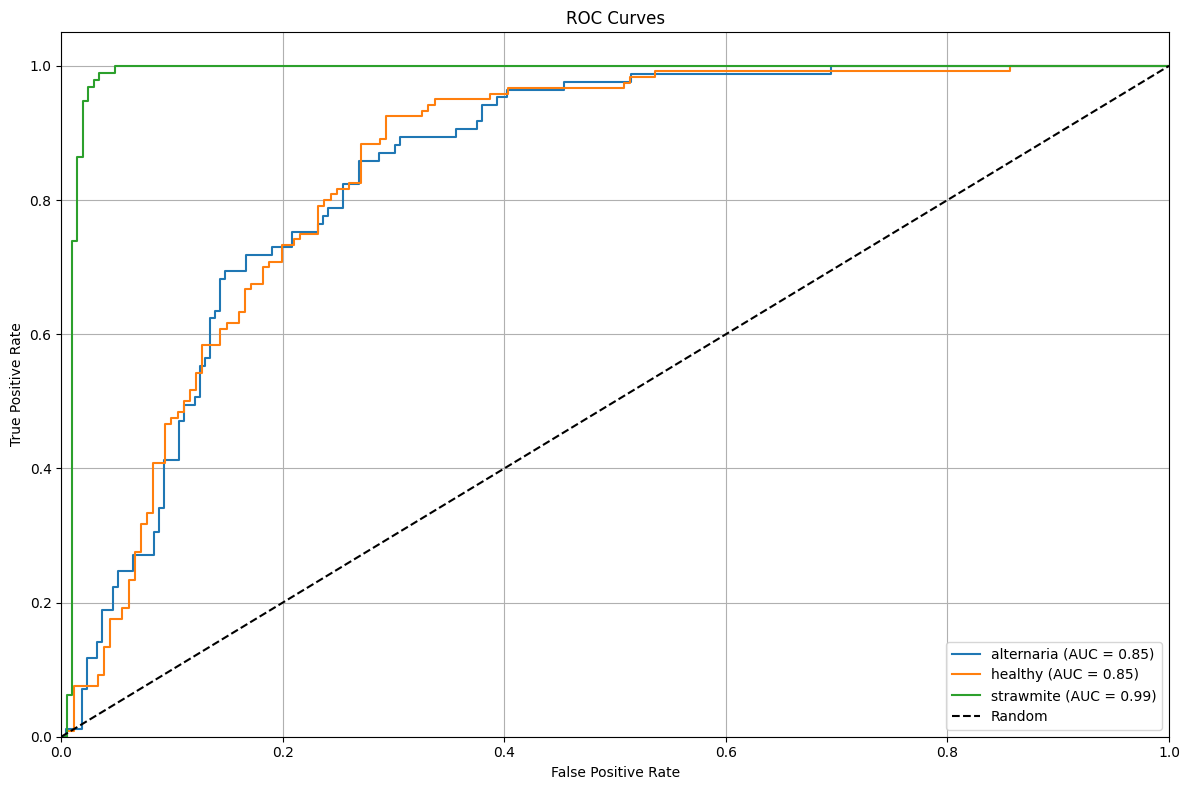


Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.8112, Acc=0.7076]


Train Loss: 1.0182, Train Accuracy: 0.5391
Validation Loss: 0.8112, Validation Accuracy: 0.7076
Validation ROC AUC (Macro): 0.9323

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.83      0.35      0.50        85
     healthy       0.81      0.72      0.77       120
   strawmite       0.61      1.00      0.76        96

    accuracy                           0.71       301
   macro avg       0.75      0.69      0.67       301
weighted avg       0.75      0.71      0.69       301



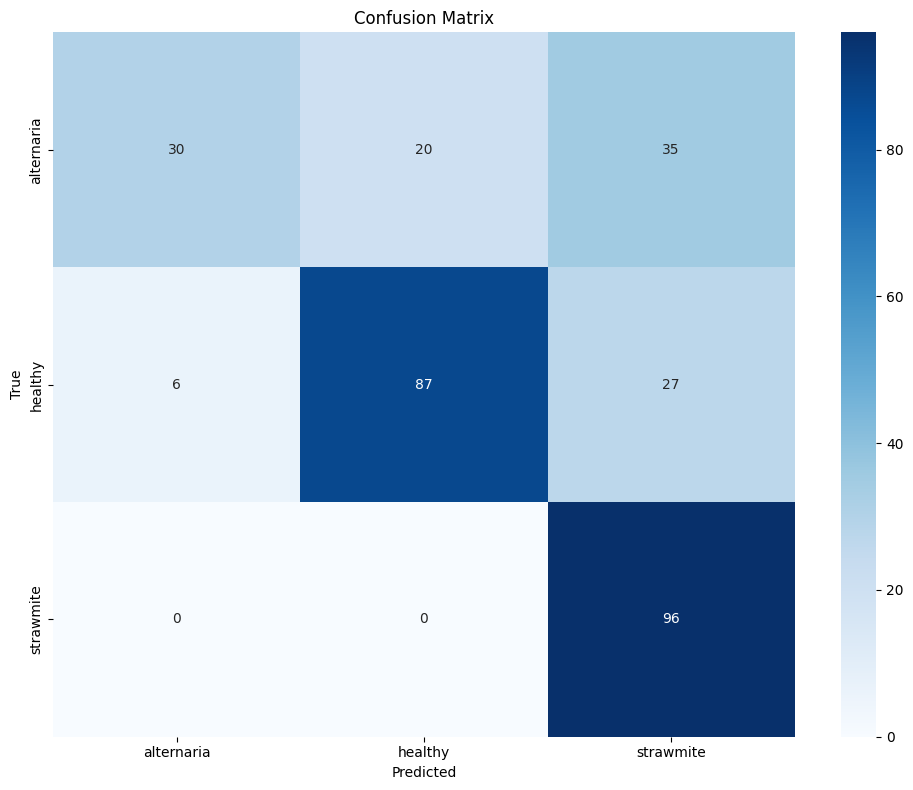

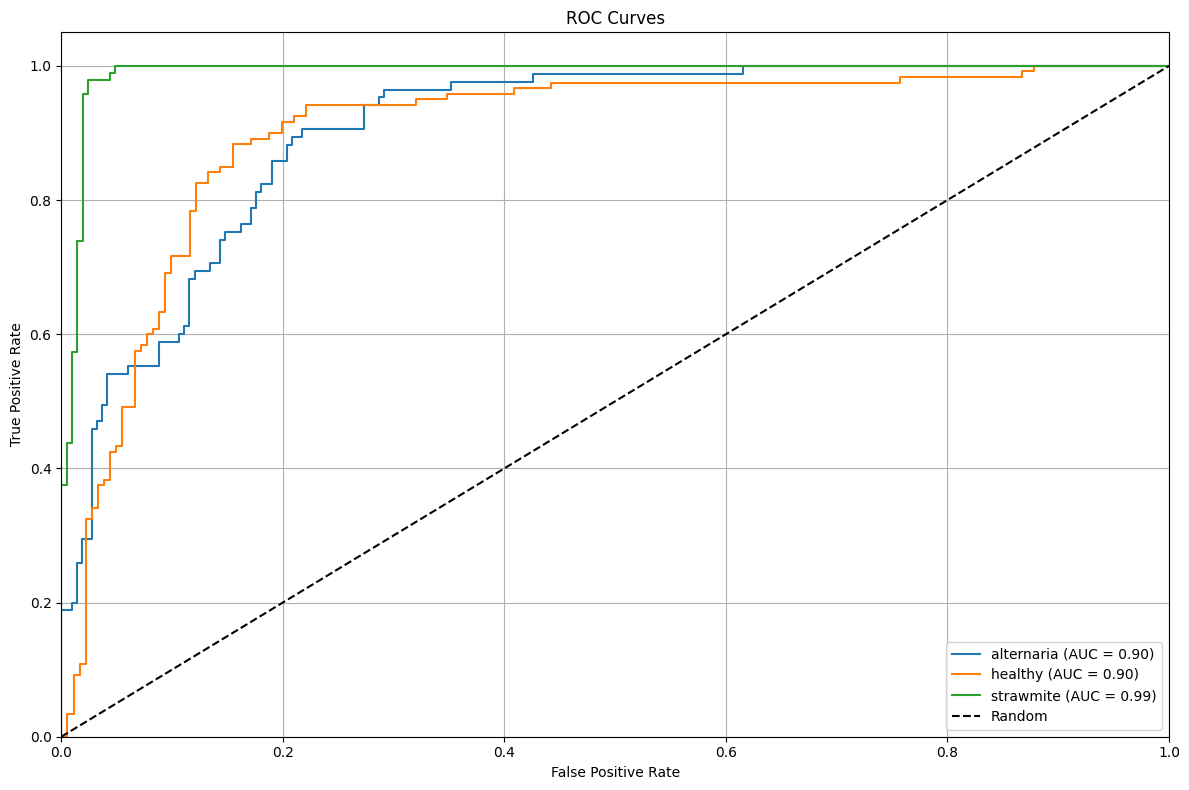


Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.5905, Acc=0.8472]


Train Loss: 0.9345, Train Accuracy: 0.6004
Validation Loss: 0.5905, Validation Accuracy: 0.8472
Validation ROC AUC (Macro): 0.9573

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.79      0.74      0.76        85
     healthy       0.81      0.82      0.81       120
   strawmite       0.94      0.98      0.96        96

    accuracy                           0.85       301
   macro avg       0.85      0.85      0.85       301
weighted avg       0.85      0.85      0.85       301



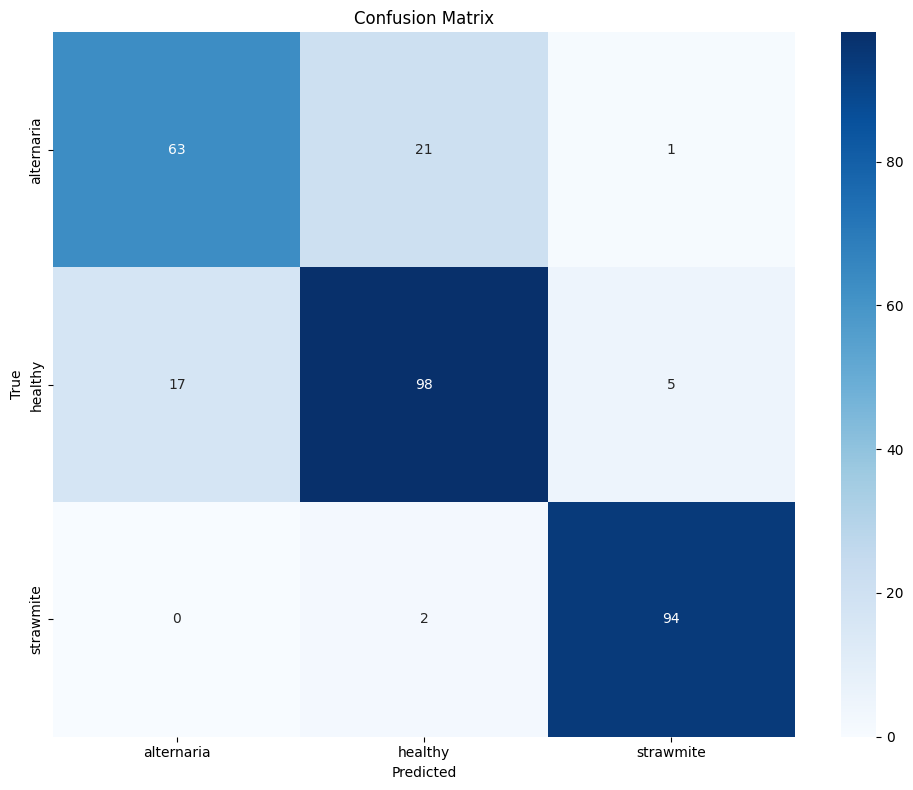

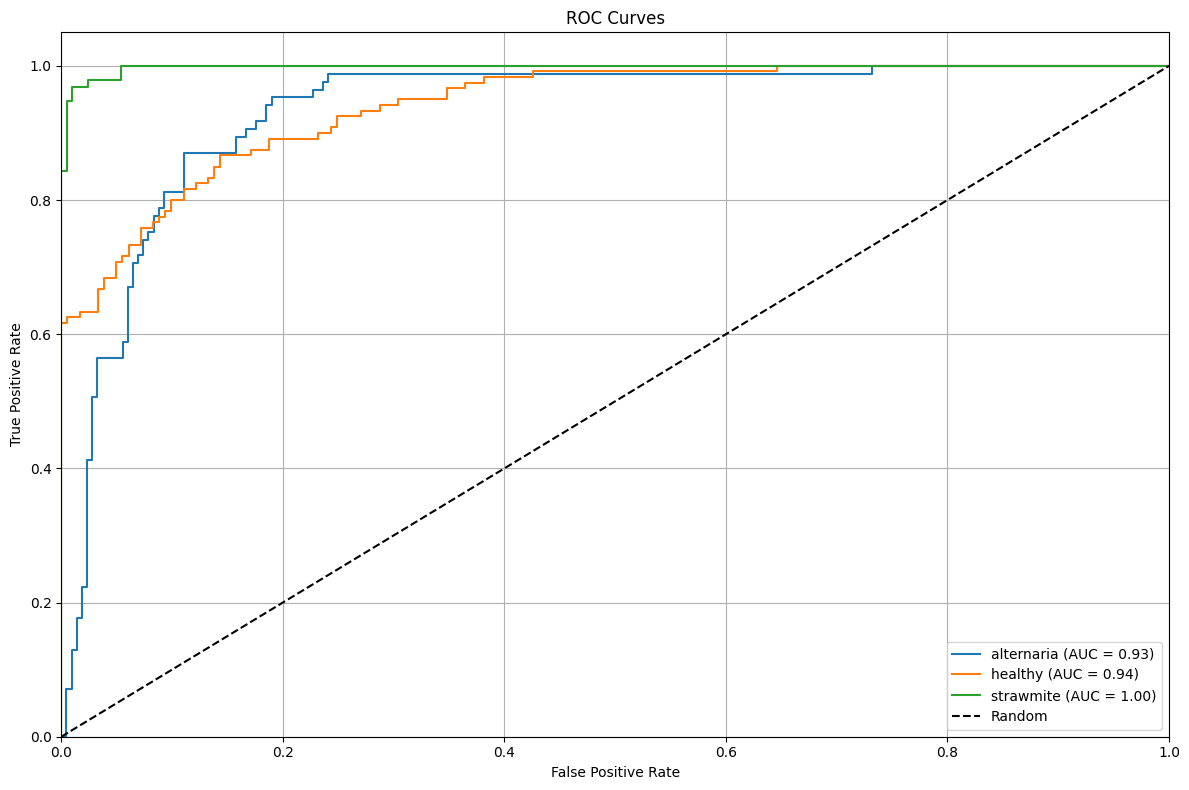


Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.5485, Acc=0.8671]


Train Loss: 0.8655, Train Accuracy: 0.6646
Validation Loss: 0.5485, Validation Accuracy: 0.8671
Validation ROC AUC (Macro): 0.9656

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.82      0.74      0.78        85
     healthy       0.83      0.88      0.85       120
   strawmite       0.96      0.97      0.96        96

    accuracy                           0.87       301
   macro avg       0.87      0.86      0.86       301
weighted avg       0.87      0.87      0.87       301



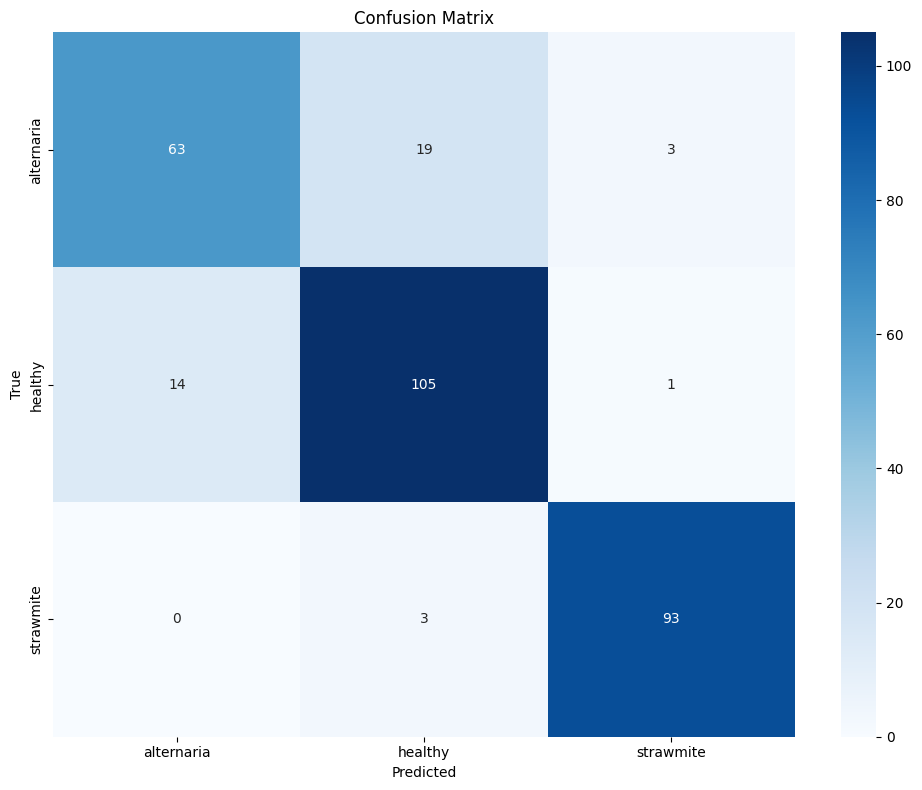

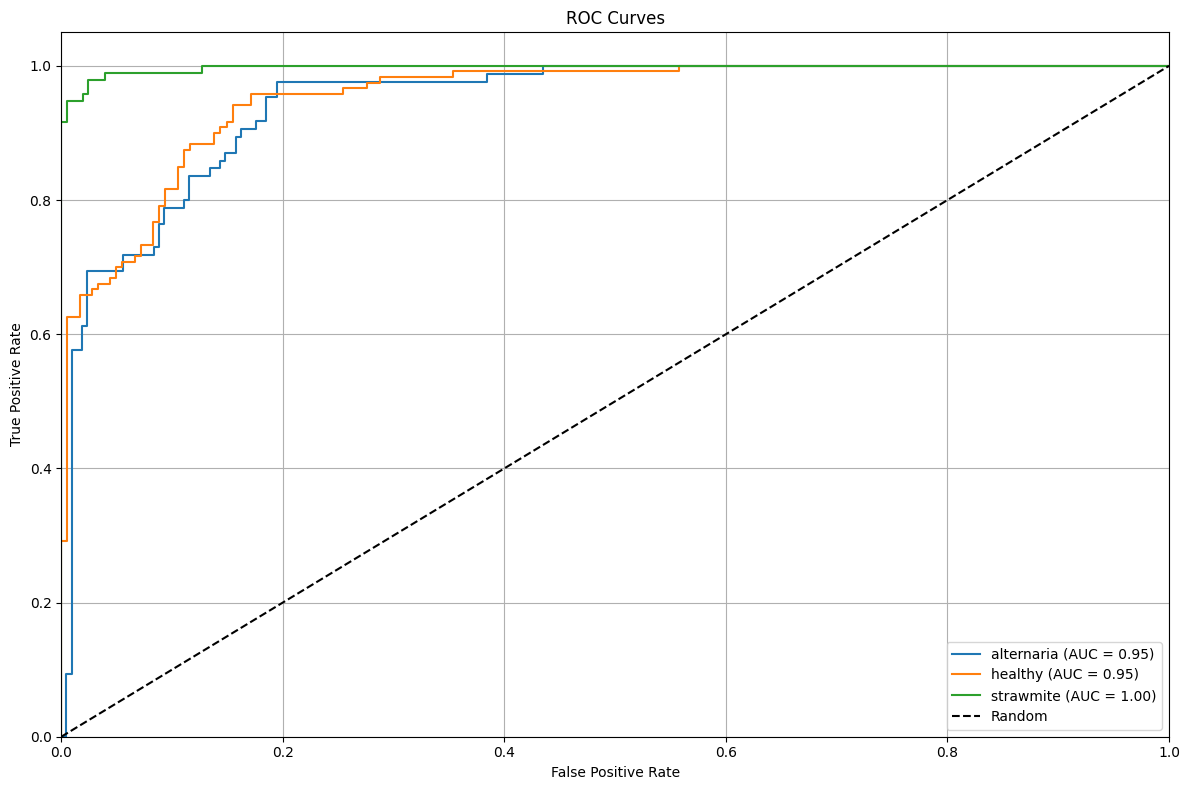


Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.7382, Acc=0.7575]


Train Loss: 0.8285, Train Accuracy: 0.6897
Validation Loss: 0.7382, Validation Accuracy: 0.7575
Validation ROC AUC (Macro): 0.9674

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.5421, Acc=0.8638]


Train Loss: 0.8150, Train Accuracy: 0.7026
Validation Loss: 0.5421, Validation Accuracy: 0.8638
Validation ROC AUC (Macro): 0.9783

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.5797, Acc=0.8206]


Train Loss: 0.7443, Train Accuracy: 0.7344
Validation Loss: 0.5797, Validation Accuracy: 0.8206
Validation ROC AUC (Macro): 0.9719

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.5955, Acc=0.7973]


Train Loss: 0.7253, Train Accuracy: 0.7533
Validation Loss: 0.5955, Validation Accuracy: 0.7973
Validation ROC AUC (Macro): 0.9715

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.6059, Acc=0.7874]


Train Loss: 0.6620, Train Accuracy: 0.7969
Validation Loss: 0.6059, Validation Accuracy: 0.7874
Validation ROC AUC (Macro): 0.9738

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.5619, Acc=0.8571]


Train Loss: 0.6364, Train Accuracy: 0.8069
Validation Loss: 0.5619, Validation Accuracy: 0.8571
Validation ROC AUC (Macro): 0.9754

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.4942, Acc=0.9003]


Train Loss: 0.6834, Train Accuracy: 0.7768
Validation Loss: 0.4942, Validation Accuracy: 0.9003
Validation ROC AUC (Macro): 0.9857

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.69      0.81        85
     healthy       0.83      0.98      0.90       120
   strawmite       0.97      0.98      0.97        96

    accuracy                           0.90       301
   macro avg       0.92      0.89      0.89       301
weighted avg       0.91      0.90      0.90       301



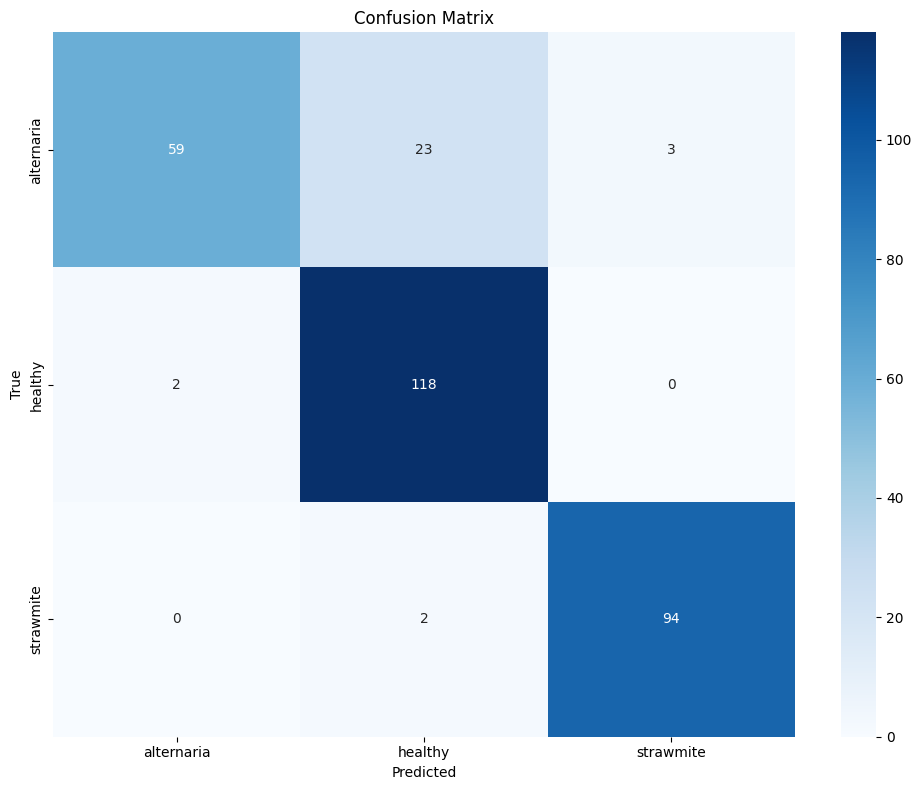

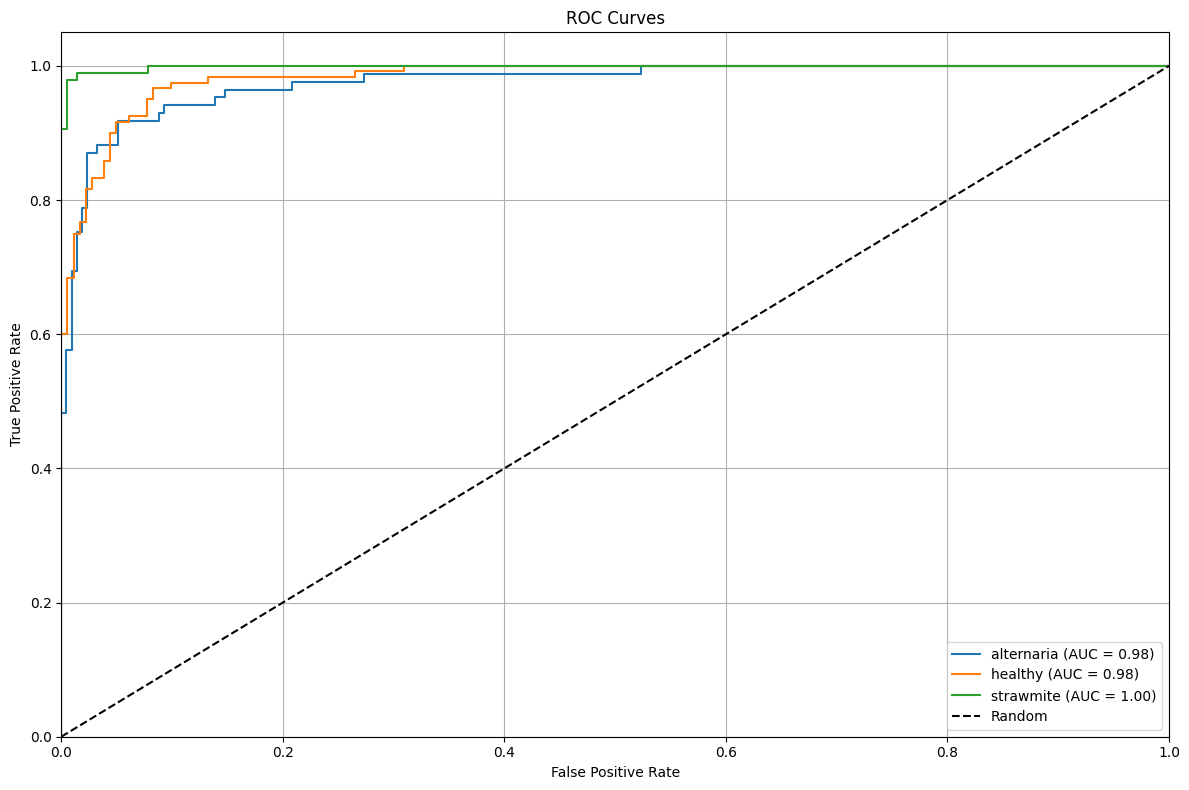


Epoch 13/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it, Loss=0.6077, Acc=0.8439]


Train Loss: 0.6391, Train Accuracy: 0.8125
Validation Loss: 0.6077, Validation Accuracy: 0.8439
Validation ROC AUC (Macro): 0.9732

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.4817, Acc=0.8970]


Train Loss: 0.6133, Train Accuracy: 0.8253
Validation Loss: 0.4817, Validation Accuracy: 0.8970
Validation ROC AUC (Macro): 0.9891

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.5922, Acc=0.8571]


Train Loss: 0.5894, Train Accuracy: 0.8393
Validation Loss: 0.5922, Validation Accuracy: 0.8571
Validation ROC AUC (Macro): 0.9827

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.4502, Acc=0.9236]


Train Loss: 0.5898, Train Accuracy: 0.8438
Validation Loss: 0.4502, Validation Accuracy: 0.9236
Validation ROC AUC (Macro): 0.9904

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.79      0.87        85
     healthy       0.91      0.96      0.93       120
   strawmite       0.91      1.00      0.96        96

    accuracy                           0.92       301
   macro avg       0.93      0.92      0.92       301
weighted avg       0.93      0.92      0.92       301



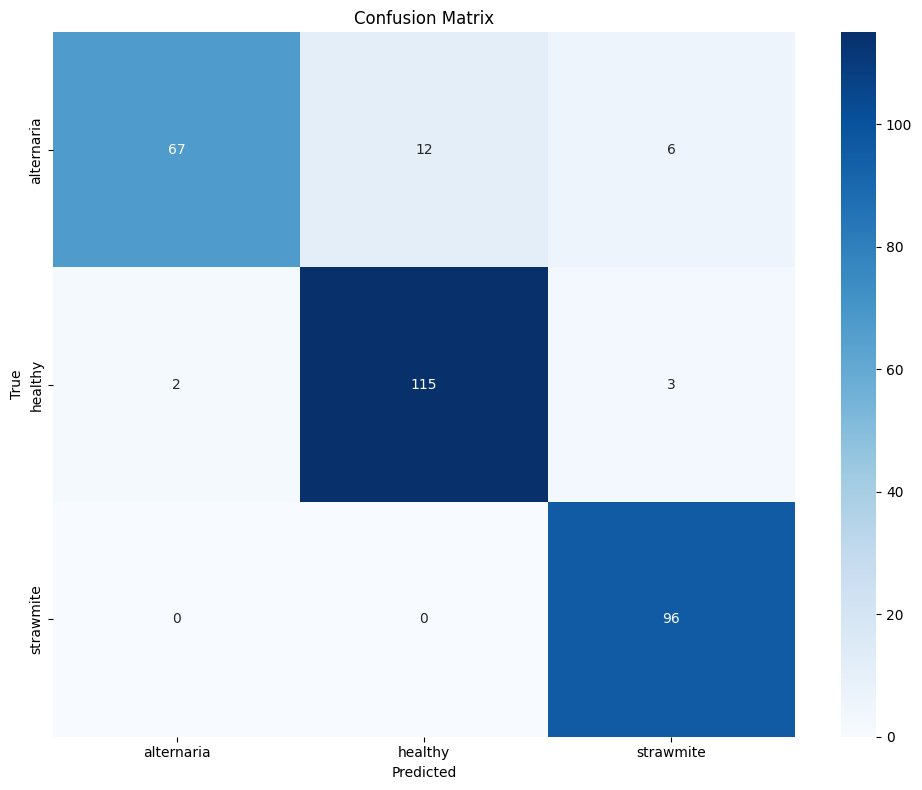

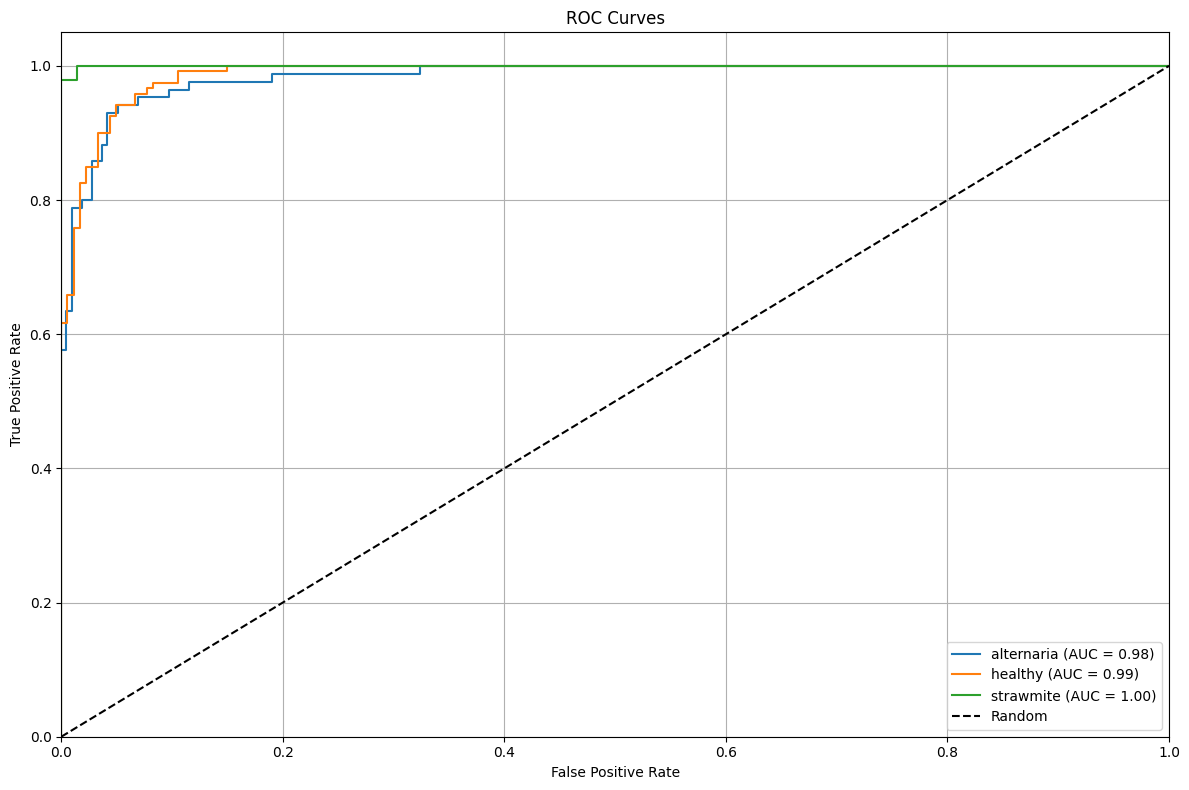


Epoch 17/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.4613, Acc=0.9236]


Train Loss: 0.5424, Train Accuracy: 0.8722
Validation Loss: 0.4613, Validation Accuracy: 0.9236
Validation ROC AUC (Macro): 0.9913

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.4434, Acc=0.9435]


Train Loss: 0.5305, Train Accuracy: 0.8789
Validation Loss: 0.4434, Validation Accuracy: 0.9435
Validation ROC AUC (Macro): 0.9953

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.85      0.91        85
     healthy       0.95      0.97      0.96       120
   strawmite       0.91      1.00      0.96        96

    accuracy                           0.94       301
   macro avg       0.95      0.94      0.94       301
weighted avg       0.95      0.94      0.94       301



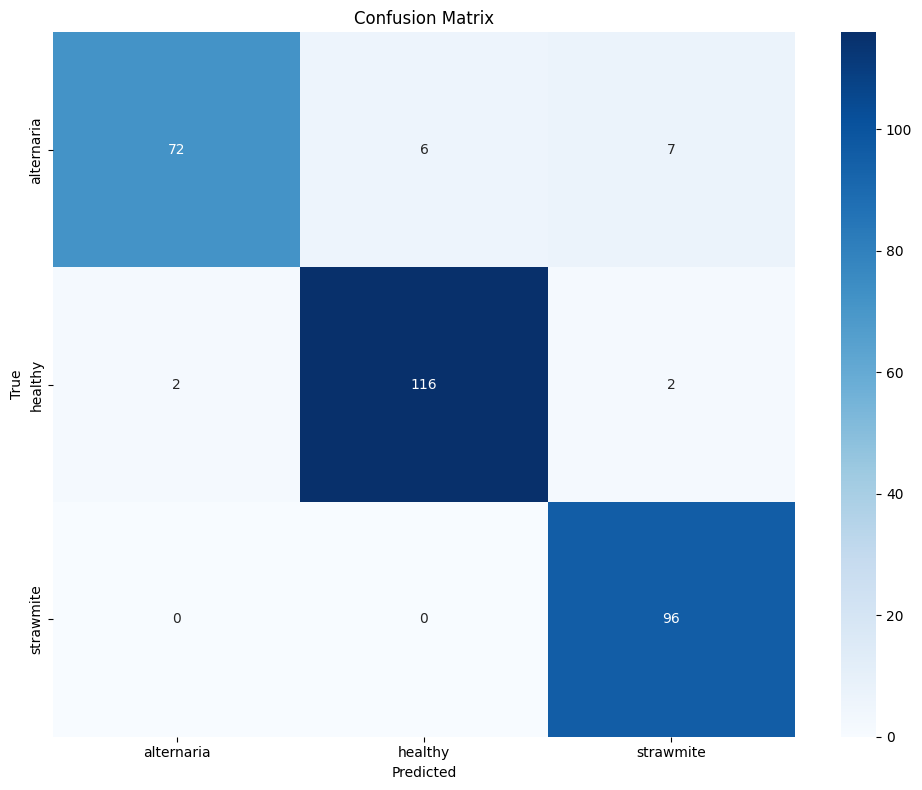

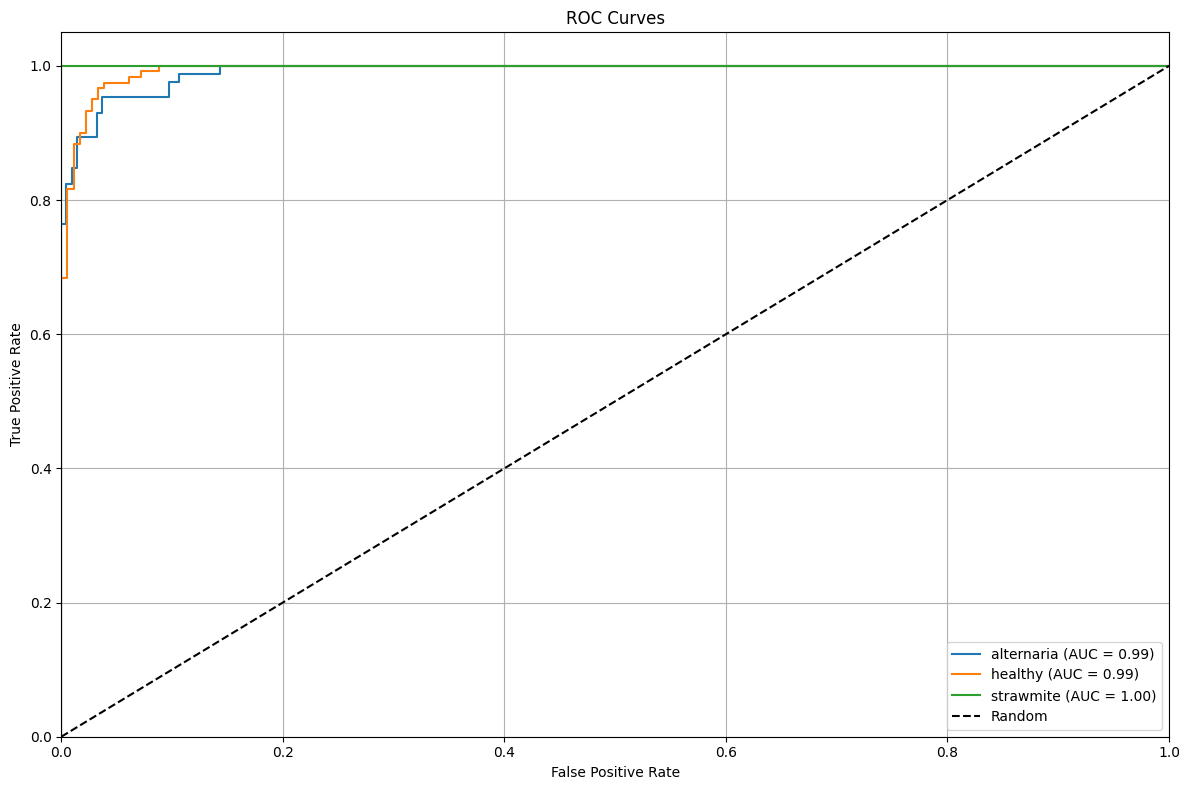


Epoch 19/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.4175, Acc=0.9369]


Train Loss: 0.5185, Train Accuracy: 0.8912
Validation Loss: 0.4175, Validation Accuracy: 0.9369
Validation ROC AUC (Macro): 0.9947

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.4387, Acc=0.9236]


Train Loss: 0.5052, Train Accuracy: 0.8956
Validation Loss: 0.4387, Validation Accuracy: 0.9236
Validation ROC AUC (Macro): 0.9951

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it, Loss=0.4198, Acc=0.9435]


Train Loss: 0.4932, Train Accuracy: 0.9012
Validation Loss: 0.4198, Validation Accuracy: 0.9435
Validation ROC AUC (Macro): 0.9960

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.4225, Acc=0.9402]


Train Loss: 0.4826, Train Accuracy: 0.9046
Validation Loss: 0.4225, Validation Accuracy: 0.9402
Validation ROC AUC (Macro): 0.9961

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.4141, Acc=0.9568]


Train Loss: 0.5085, Train Accuracy: 0.8839
Validation Loss: 0.4141, Validation Accuracy: 0.9568
Validation ROC AUC (Macro): 0.9954

Classification Report:
              precision    recall  f1-score   support

  alternaria       0.96      0.91      0.93        85
     healthy       0.97      0.96      0.96       120
   strawmite       0.94      1.00      0.97        96

    accuracy                           0.96       301
   macro avg       0.96      0.95      0.96       301
weighted avg       0.96      0.96      0.96       301



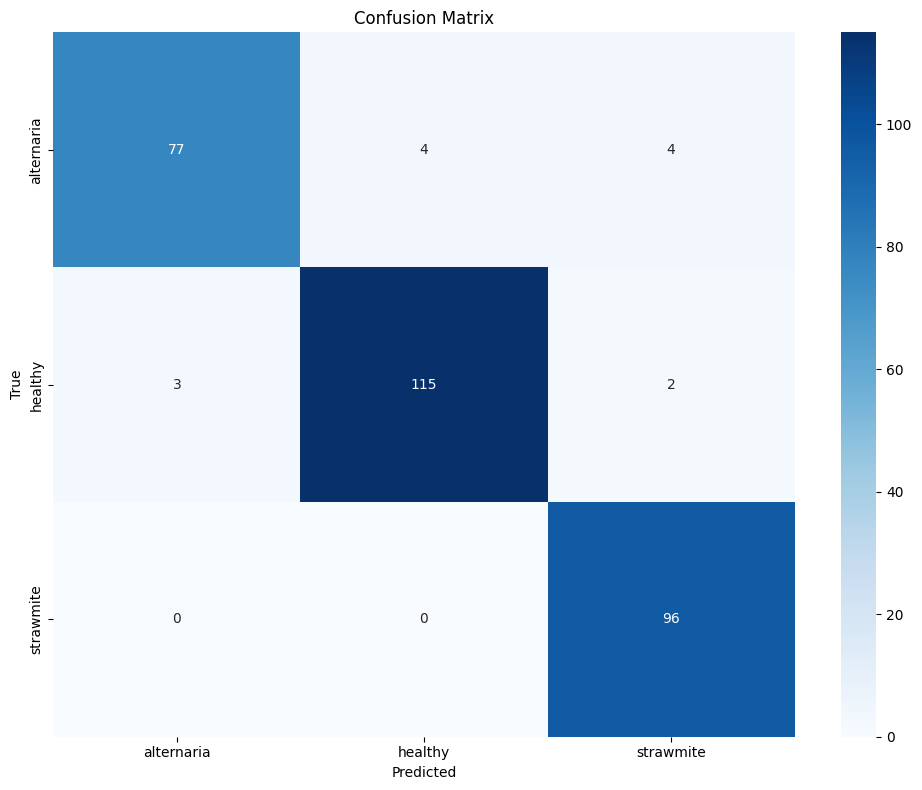

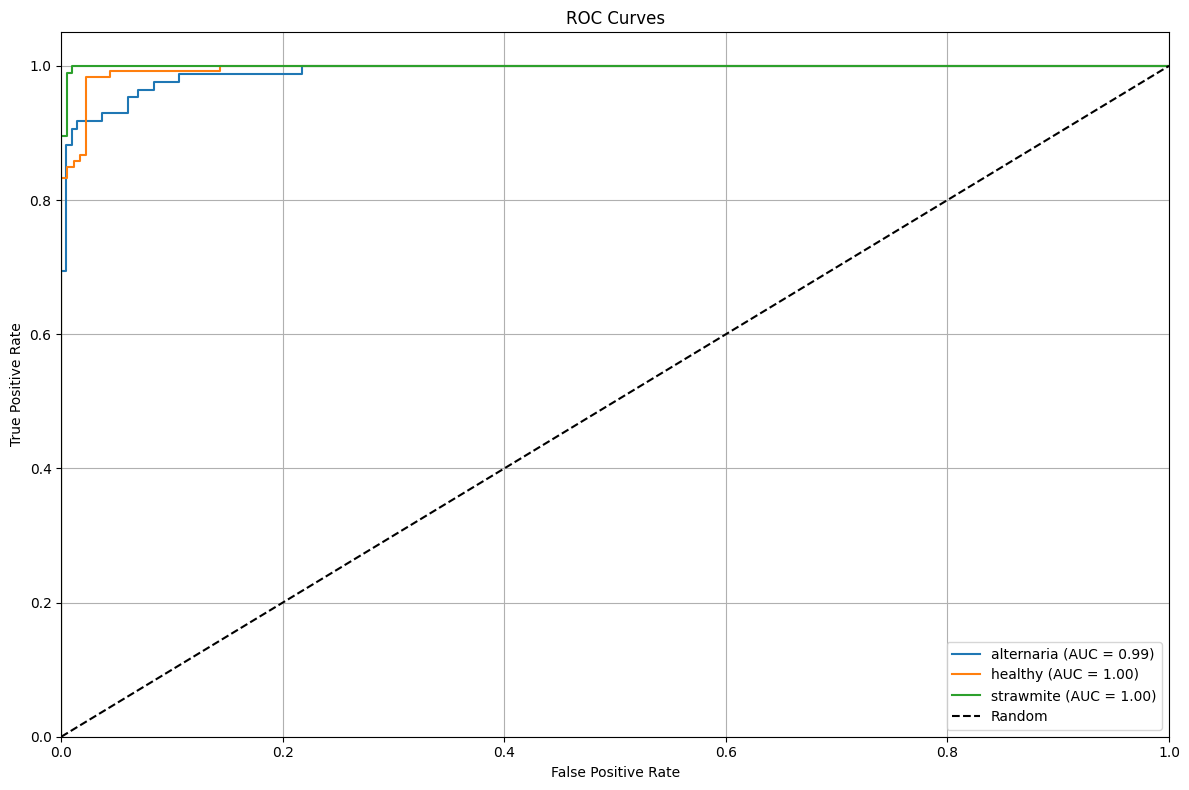


Epoch 24/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.5010, Acc=0.9003]


Train Loss: 0.5512, Train Accuracy: 0.8728
Validation Loss: 0.5010, Validation Accuracy: 0.9003
Validation ROC AUC (Macro): 0.9928

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.4337, Acc=0.9203]


Train Loss: 0.5491, Train Accuracy: 0.8661
Validation Loss: 0.4337, Validation Accuracy: 0.9203
Validation ROC AUC (Macro): 0.9953

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it, Loss=0.4353, Acc=0.9302]


Train Loss: 0.5258, Train Accuracy: 0.8856
Validation Loss: 0.4353, Validation Accuracy: 0.9302
Validation ROC AUC (Macro): 0.9937

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.5037, Acc=0.8937]


Train Loss: 0.5344, Train Accuracy: 0.8767
Validation Loss: 0.5037, Validation Accuracy: 0.8937
Validation ROC AUC (Macro): 0.9923

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.4124, Acc=0.9502]


Train Loss: 0.5135, Train Accuracy: 0.8895
Validation Loss: 0.4124, Validation Accuracy: 0.9502
Validation ROC AUC (Macro): 0.9943

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it, Loss=0.5174, Acc=0.8538]


Train Loss: 0.5127, Train Accuracy: 0.8901
Validation Loss: 0.5174, Validation Accuracy: 0.8538
Validation ROC AUC (Macro): 0.9917

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it, Loss=0.4117, Acc=0.9601]


Train Loss: 0.5023, Train Accuracy: 0.8968
Validation Loss: 0.4117, Validation Accuracy: 0.9601
Validation ROC AUC (Macro): 0.9963

Classification Report:
              precision    recall  f1-score   support

  alternaria       1.00      0.87      0.93        85
     healthy       0.93      0.99      0.96       120
   strawmite       0.97      1.00      0.98        96

    accuracy                           0.96       301
   macro avg       0.97      0.95      0.96       301
weighted avg       0.96      0.96      0.96       301



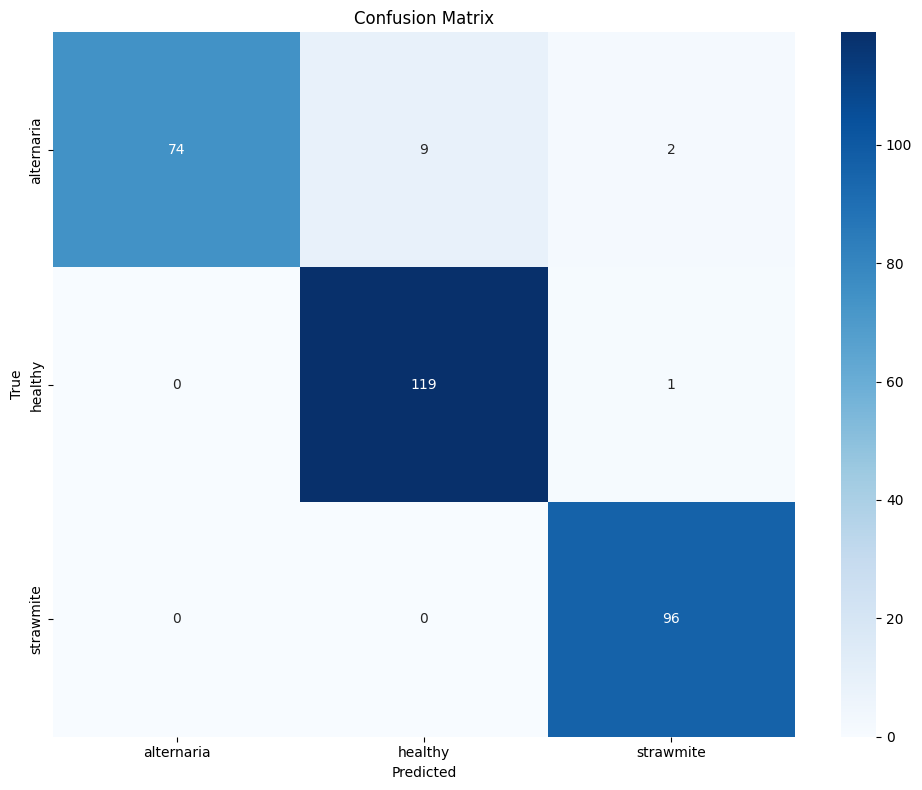

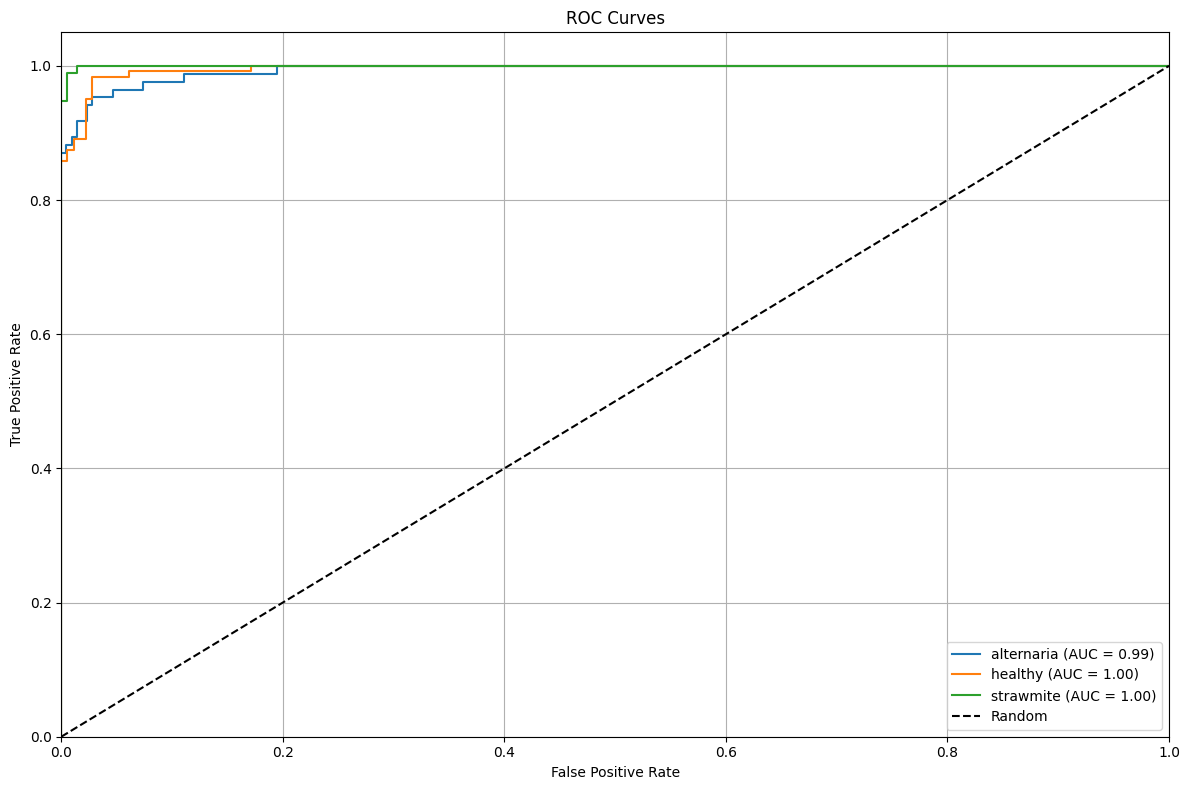


FINAL EVALUATION


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.4117, Acc=0.9601]


Final Validation Accuracy: 0.9601
Final Validation ROC AUC (Macro): 0.9963

TEST TIME AUGMENTATION EVALUATION


TTA Inference: 100%|██████████| 301/301 [02:29<00:00,  2.01it/s]


TTA Accuracy: 0.9535
TTA ROC AUC (Macro): 0.9953

COMPARISON
Regular Validation Accuracy: 0.9601
TTA Accuracy: 0.9535
Improvement: -0.0066
Regular ROC AUC: 0.9963
TTA ROC AUC: 0.9953
ROC AUC Improvement: -0.0009

TTA Classification Report:
              precision    recall  f1-score   support

  alternaria       0.97      0.87      0.92        85
     healthy       0.93      0.98      0.96       120
   strawmite       0.97      0.99      0.98        96

    accuracy                           0.95       301
   macro avg       0.96      0.95      0.95       301
weighted avg       0.95      0.95      0.95       301



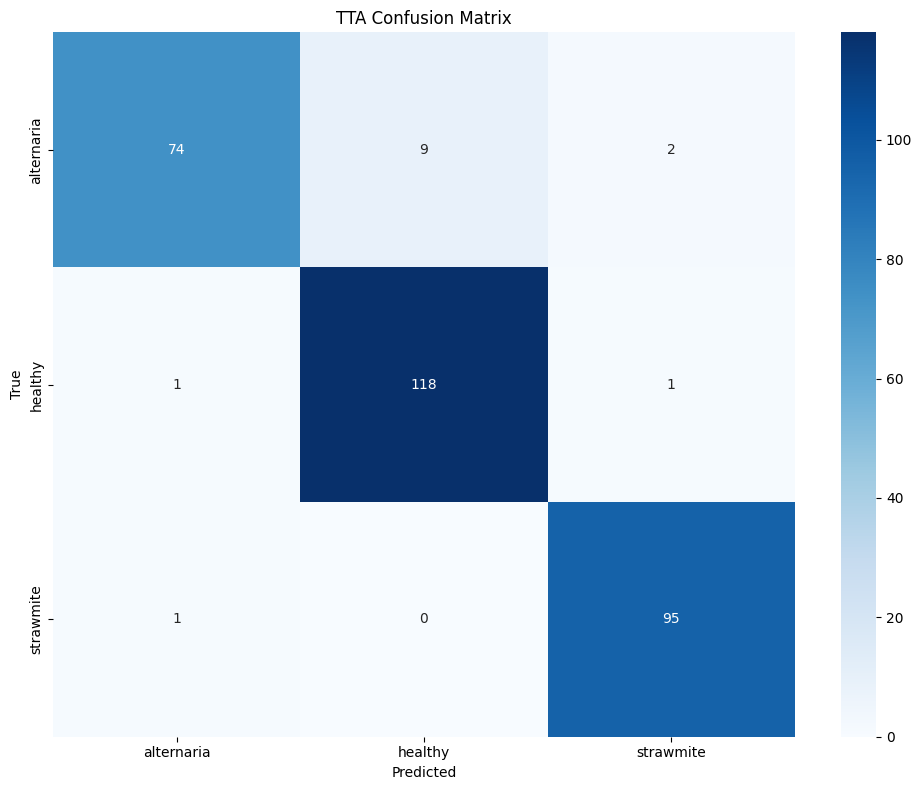

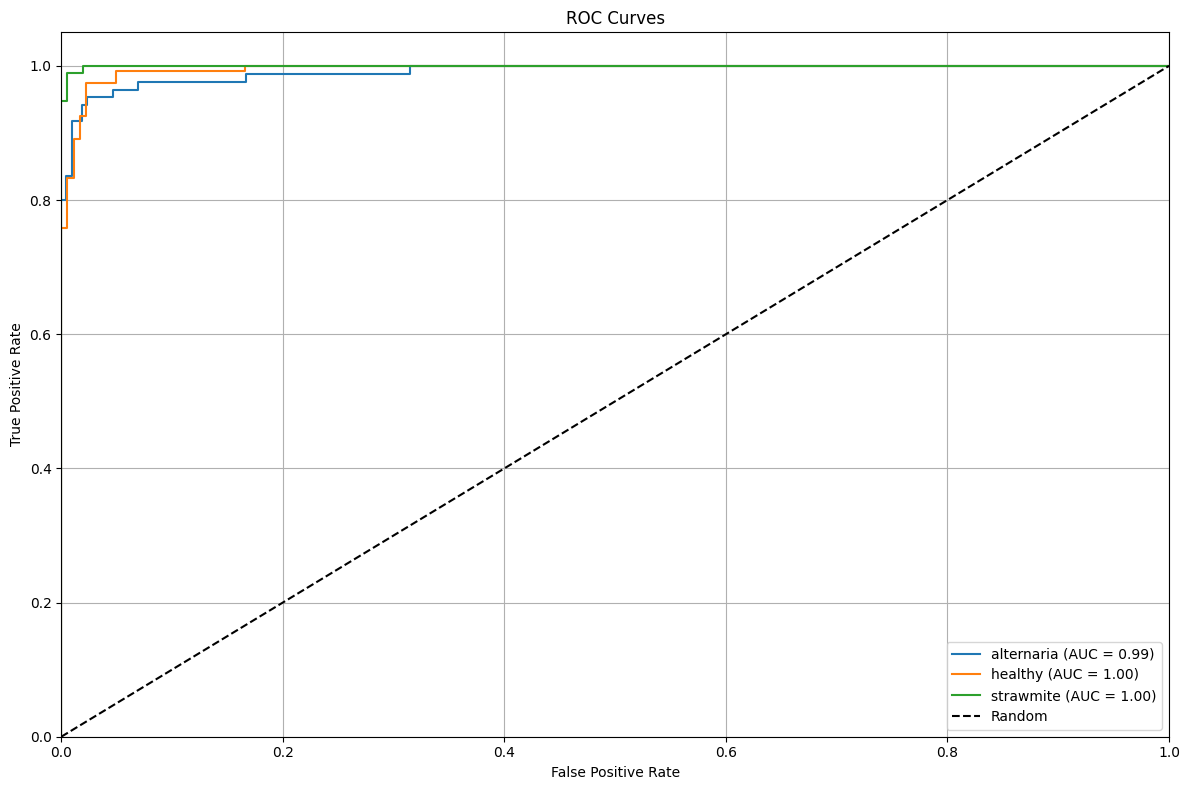

Training completed. Best validation accuracy: 0.9601


In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2  # Reduced from 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3  # Update based on your dataset
    
    # TTA parameters
    tta_num_augmentations = 10

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

def get_tta_transforms(config):
    """Get multiple augmentation transforms for TTA"""
    tta_transforms = []
    
    # Original image
    tta_transforms.append(transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ]))
    
    # Horizontal flip
    tta_transforms.append(transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ]))
    
    # Vertical flip
    tta_transforms.append(transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomVerticalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ]))
    
    # Rotations
    for angle in [90, 180, 270]:
        tta_transforms.append(transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomRotation(degrees=(angle, angle)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]))
    
    # Random crops
    for i in range(4):
        tta_transforms.append(transforms.Compose([
            transforms.RandomResizedCrop(config.image_size, scale=(0.8, 1.0)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]))
    
    return tta_transforms

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            # First conv block
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Skip connection
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            probs = F.softmax(outputs, dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels, all_probs

def test_time_augmentation(model, val_dataset, config):
    """Perform test time augmentation and return predictions"""
    model.eval()
    
    tta_transforms = get_tta_transforms(config)
    all_tta_preds = []
    all_tta_probs = []
    all_labels = []
    
    with torch.no_grad():
        for idx in tqdm(range(len(val_dataset)), desc='TTA Inference'):
            image_path = val_dataset.imgs[idx][0]
            label = val_dataset.imgs[idx][1]
            
            image = Image.open(image_path).convert('RGB')
            
            # Collect predictions from all augmentations
            augmented_probs = []
            
            for transform in tta_transforms:
                augmented_image = transform(image).unsqueeze(0).to(config.device)
                output = model(augmented_image)
                prob = F.softmax(output, dim=1)
                augmented_probs.append(prob.cpu().numpy())
            
            # Average probabilities across all augmentations
            mean_prob = np.mean(augmented_probs, axis=0)
            tta_pred = np.argmax(mean_prob, axis=1)[0]
            
            all_tta_preds.append(tta_pred)
            all_tta_probs.append(mean_prob[0])
            all_labels.append(label)
    
    return all_tta_preds, all_tta_probs, all_labels

def calculate_roc_auc(labels, probs, num_classes):
    """Calculate macro ROC AUC score"""
    try:
        if num_classes == 2:
            # Binary classification
            roc_auc = roc_auc_score(labels, probs[:, 1])
        else:
            # Multi-class classification
            # Binarize the labels
            labels_binarized = label_binarize(labels, classes=range(num_classes))
            
            # Calculate ROC AUC for each class
            roc_auc_scores = []
            for i in range(num_classes):
                try:
                    if len(np.unique(labels_binarized[:, i])) > 1:  # Check if class exists
                        class_roc_auc = roc_auc_score(labels_binarized[:, i], np.array(probs)[:, i])
                        roc_auc_scores.append(class_roc_auc)
                except:
                    continue
            
            # Macro average
            roc_auc = np.mean(roc_auc_scores) if roc_auc_scores else 0.0
        
        return roc_auc
    except Exception as e:
        print(f"Error calculating ROC AUC: {e}")
        return 0.0

def plot_roc_curves(labels, probs, num_classes, class_names):
    """Plot ROC curves for each class"""
    plt.figure(figsize=(12, 8))
    
    if num_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    else:
        # Multi-class classification
        labels_binarized = label_binarize(labels, classes=range(num_classes))
        
        for i in range(num_classes):
            if len(np.unique(labels_binarized[:, i])) > 1:
                fpr, tpr, _ = roc_curve(labels_binarized[:, i], np.array(probs)[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    
    # Create model directory
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model, criterion, optimizer setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    early_stopping = EarlyStopping(patience=5)
    
    # Training loop
    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels, probs = validate(
            model, val_loader, criterion, config
        )
        
        # Calculate ROC AUC
        val_roc_auc = calculate_roc_auc(labels, probs, config.num_classes)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        print(f"Validation ROC AUC (Macro): {val_roc_auc:.4f}")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes))
            
            # Generate confusion matrix
            cm = confusion_matrix(labels, preds)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=train_dataset.classes, 
                       yticklabels=train_dataset.classes)
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.tight_layout()
            plt.show()
            
            # Plot ROC curves
            plot_roc_curves(labels, probs, config.num_classes, train_dataset.classes)
    
    # Load best model for final evaluation
    model.load_state_dict(torch.load(os.path.join(config.model_dir, 'best_model.pth')))
    
    # Final evaluation with regular validation
    print("\n" + "="*50)
    print("FINAL EVALUATION")
    print("="*50)
    
    val_loss, val_acc, preds, labels, probs = validate(model, val_loader, criterion, config)
    val_roc_auc = calculate_roc_auc(labels, probs, config.num_classes)
    
    print(f"Final Validation Accuracy: {val_acc:.4f}")
    print(f"Final Validation ROC AUC (Macro): {val_roc_auc:.4f}")
    
    # Test Time Augmentation
    print("\n" + "="*50)
    print("TEST TIME AUGMENTATION EVALUATION")
    print("="*50)
    
    tta_preds, tta_probs, tta_labels = test_time_augmentation(model, val_dataset, config)
    tta_acc = np.mean(np.array(tta_preds) == np.array(tta_labels))
    tta_roc_auc = calculate_roc_auc(tta_labels, tta_probs, config.num_classes)
    
    print(f"TTA Accuracy: {tta_acc:.4f}")
    print(f"TTA ROC AUC (Macro): {tta_roc_auc:.4f}")
    
    # Compare results
    print("\n" + "="*50)
    print("COMPARISON")
    print("="*50)
    print(f"Regular Validation Accuracy: {val_acc:.4f}")
    print(f"TTA Accuracy: {tta_acc:.4f}")
    print(f"Improvement: {tta_acc - val_acc:.4f}")
    print(f"Regular ROC AUC: {val_roc_auc:.4f}")
    print(f"TTA ROC AUC: {tta_roc_auc:.4f}")
    print(f"ROC AUC Improvement: {tta_roc_auc - val_roc_auc:.4f}")
    
    # TTA Classification Report
    print('\nTTA Classification Report:')
    print(classification_report(tta_labels, tta_preds, 
                             target_names=train_dataset.classes))
    
    # TTA Confusion Matrix
    cm_tta = confusion_matrix(tta_labels, tta_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_tta, annot=True, fmt='d', cmap='Blues', 
               xticklabels=train_dataset.classes, 
               yticklabels=train_dataset.classes)
    plt.title('TTA Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # TTA ROC Curves
    plot_roc_curves(tta_labels, tta_probs, config.num_classes, train_dataset.classes)
    
    print(f"Training completed. Best validation accuracy: {best_val_acc:.4f}")
    return model

# 6. Run Training
if __name__ == "__main__":
    config = Config()
    model = train_model(config)

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# XAI Implementation Classes
class GradCAM:
    """
    Gradient-weighted Class Activation Mapping (Grad-CAM)
    
    Reference: Selvaraju, R. R., et al. (2017). "Grad-CAM: Visual explanations from deep networks 
    via gradient-based localization." In Proceedings of the IEEE international conference on 
    computer vision (pp. 618-626).
    """
    
    def __init__(self, model, target_layer_name):
        self.model = model
        self.target_layer_name = target_layer_name
        self.gradients = None
        self.activations = None
        self.hooks = []
        
        # Register hooks
        self._register_hooks()
    
    def _register_hooks(self):
        """Register forward and backward hooks on the target layer"""
        def forward_hook(module, input, output):
            self.activations = output.detach()
        
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()
        
        # Find target layer
        target_layer = self._find_target_layer()
        
        # Register hooks
        self.hooks.append(target_layer.register_forward_hook(forward_hook))
        self.hooks.append(target_layer.register_backward_hook(backward_hook))
    
    def _find_target_layer(self):
        """Find the target layer in the model"""
        for name, module in self.model.named_modules():
            if name == self.target_layer_name:
                return module
        raise ValueError(f"Target layer '{self.target_layer_name}' not found in model")
    
    def generate_cam(self, input_tensor, class_idx=None):
        """Generate Grad-CAM heatmap"""
        self.model.eval()
        
        # Forward pass
        output = self.model(input_tensor)
        
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        
        # Zero gradients
        self.model.zero_grad()
        
        # Backward pass
        output[0, class_idx].backward(retain_graph=True)
        
        # Generate CAM
        gradients = self.gradients[0]  # [C, H, W]
        activations = self.activations[0]  # [C, H, W]
        
        # Global average pooling of gradients
        weights = torch.mean(gradients, dim=[1, 2])  # [C]
        
        # Weighted combination of activation maps
        cam = torch.sum(weights.unsqueeze(1).unsqueeze(2) * activations, dim=0)
        
        # Apply ReLU
        cam = F.relu(cam)
        
        # Normalize to [0, 1]
        if torch.max(cam) > 0:
            cam = cam / torch.max(cam)
        
        return cam.detach().cpu().numpy(), class_idx
    
    def remove_hooks(self):
        """Remove all registered hooks"""
        for hook in self.hooks:
            hook.remove()

class GradCAMPlusPlus:
    """
    Grad-CAM++ Implementation
    
    Reference: Chattopadhay, A., et al. (2018). "Grad-CAM++: Generalized gradient-based 
    visual explanations for deep convolutional networks." In 2018 IEEE Winter Conference 
    on Applications of Computer Vision (WACV) (pp. 839-847).
    """
    
    def __init__(self, model, target_layer_name):
        self.model = model
        self.target_layer_name = target_layer_name
        self.gradients = None
        self.activations = None
        self.hooks = []
        
        self._register_hooks()
    
    def _register_hooks(self):
        """Register forward and backward hooks on the target layer"""
        def forward_hook(module, input, output):
            self.activations = output.detach()
        
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()
        
        target_layer = self._find_target_layer()
        
        self.hooks.append(target_layer.register_forward_hook(forward_hook))
        self.hooks.append(target_layer.register_backward_hook(backward_hook))
    
    def _find_target_layer(self):
        """Find the target layer in the model"""
        for name, module in self.model.named_modules():
            if name == self.target_layer_name:
                return module
        raise ValueError(f"Target layer '{self.target_layer_name}' not found in model")
    
    def generate_cam(self, input_tensor, class_idx=None):
        """Generate Grad-CAM++ heatmap"""
        self.model.eval()
        
        # Forward pass
        output = self.model(input_tensor)
        
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        
        # Zero gradients
        self.model.zero_grad()
        
        # Backward pass
        output[0, class_idx].backward(retain_graph=True)
        
        # Generate CAM++
        gradients = self.gradients[0]  # [C, H, W]
        activations = self.activations[0]  # [C, H, W]
        
        # Calculate alpha (weights)
        alpha_num = gradients.pow(2)
        alpha_denom = 2.0 * gradients.pow(2) + \
                     torch.sum(activations * gradients.pow(3), dim=[1, 2], keepdim=True)
        
        # Avoid division by zero
        alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / alpha_denom
        
        # Calculate weights
        weights = torch.sum(alpha * F.relu(gradients), dim=[1, 2])
        
        # Weighted combination of activation maps
        cam = torch.sum(weights.unsqueeze(1).unsqueeze(2) * activations, dim=0)
        
        # Apply ReLU
        cam = F.relu(cam)
        
        # Normalize to [0, 1]
        if torch.max(cam) > 0:
            cam = cam / torch.max(cam)
        
        return cam.detach().cpu().numpy(), class_idx
    
    def remove_hooks(self):
        """Remove all registered hooks"""
        for hook in self.hooks:
            hook.remove()

class LayerCAM:
    """
    Layer-wise Class Activation Mapping (Layer-CAM)
    
    Reference: Jiang, P. T., et al. (2021). "LayerCAM: Exploring hierarchical class activation 
    maps for localization." IEEE Transactions on Image Processing, 30, 5875-5888.
    """
    
    def __init__(self, model, target_layer_name):
        self.model = model
        self.target_layer_name = target_layer_name
        self.gradients = None
        self.activations = None
        self.hooks = []
        
        self._register_hooks()
    
    def _register_hooks(self):
        """Register forward and backward hooks on the target layer"""
        def forward_hook(module, input, output):
            self.activations = output.detach()
        
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()
        
        target_layer = self._find_target_layer()
        
        self.hooks.append(target_layer.register_forward_hook(forward_hook))
        self.hooks.append(target_layer.register_backward_hook(backward_hook))
    
    def _find_target_layer(self):
        """Find the target layer in the model"""
        for name, module in self.model.named_modules():
            if name == self.target_layer_name:
                return module
        raise ValueError(f"Target layer '{self.target_layer_name}' not found in model")
    
    def generate_cam(self, input_tensor, class_idx=None):
        """Generate Layer-CAM heatmap"""
        self.model.eval()
        
        # Forward pass
        output = self.model(input_tensor)
        
        if class_idx is None:
            class_idx = torch.argmax(output, dim=1).item()
        
        # Zero gradients
        self.model.zero_grad()
        
        # Backward pass
        output[0, class_idx].backward(retain_graph=True)
        
        # Generate Layer-CAM
        gradients = self.gradients[0]  # [C, H, W]
        activations = self.activations[0]  # [C, H, W]
        
        # Element-wise multiplication and sum across channels
        cam = torch.sum(F.relu(gradients) * activations, dim=0)
        
        # Normalize to [0, 1]
        if torch.max(cam) > 0:
            cam = cam / torch.max(cam)
        
        return cam.detach().cpu().numpy(), class_idx
    
    def remove_hooks(self):
        """Remove all registered hooks"""
        for hook in self.hooks:
            hook.remove()

class XAIVisualizer:
    """
    Enhanced visualization utilities for XAI methods with detailed confidence tracking
    """
    
    def __init__(self, model, class_names):
        self.model = model
        self.class_names = class_names
        self.device = next(model.parameters()).device
    
    def preprocess_image(self, image_path, transform):
        """Preprocess image for model input"""
        image = Image.open(image_path).convert('RGB')
        original_image = np.array(image)
        
        # Apply transforms
        input_tensor = transform(image).unsqueeze(0).to(self.device)
        
        return input_tensor, original_image
    
    def overlay_heatmap(self, image, heatmap, alpha=0.4):
        """Overlay heatmap on original image"""
        # Resize heatmap to match image size
        heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
        
        # Create colormap
        heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
        heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
        
        # Overlay
        overlaid = cv2.addWeighted(image, 1 - alpha, heatmap_colored, alpha, 0)
        
        return overlaid, heatmap_colored
    
    def get_detailed_predictions(self, input_tensor):
        """Get detailed prediction information including all class probabilities"""
        with torch.no_grad():
            output = self.model(input_tensor)
            probabilities = F.softmax(output, dim=1)
            predicted_class = torch.argmax(output, dim=1).item()
            
            # Get all class probabilities
            all_probs = probabilities[0].cpu().numpy()
            
            # Sort classes by probability
            sorted_indices = np.argsort(all_probs)[::-1]
            
            detailed_predictions = {
                'predicted_class': predicted_class,
                'confidence': all_probs[predicted_class],
                'all_probabilities': all_probs,
                'top_3_predictions': [(idx, all_probs[idx]) for idx in sorted_indices[:3]]
            }
            
        return detailed_predictions
    
    def save_individual_visualization(self, original_image, heatmap, overlay, colored_heatmap, 
                                    method_name, image_idx, predictions, save_dir):
        """Save individual visualization for a specific XAI method"""
        method_dir = os.path.join(save_dir, method_name.lower().replace('-', '_'))
        os.makedirs(method_dir, exist_ok=True)
        
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Original image
        axes[0].imshow(original_image)
        axes[0].set_title('Original Image', fontsize=12, fontweight='bold')
        axes[0].axis('off')
        
        # Heatmap
        axes[1].imshow(colored_heatmap)
        axes[1].set_title(f'{method_name} Heatmap', fontsize=12, fontweight='bold')
        axes[1].axis('off')
        
        # Overlay
        axes[2].imshow(overlay)
        axes[2].set_title(f'{method_name} Overlay', fontsize=12, fontweight='bold')
        axes[2].axis('off')
        
        # Raw heatmap with colorbar
        im = axes[3].imshow(heatmap, cmap='jet')
        axes[3].set_title(f'{method_name} Raw', fontsize=12, fontweight='bold')
        axes[3].axis('off')
        plt.colorbar(im, ax=axes[3], fraction=0.046, pad=0.04)
        
        # Add detailed prediction information
        pred_text = f"Predicted: {self.class_names[predictions['predicted_class']]} ({predictions['confidence']:.4f})\n"
        pred_text += "Top 3 Predictions:\n"
        for i, (class_idx, prob) in enumerate(predictions['top_3_predictions']):
            pred_text += f"{i+1}. {self.class_names[class_idx]}: {prob:.4f}\n"
        
        fig.suptitle(pred_text, fontsize=10, y=0.02, ha='left')
        
        plt.tight_layout()
        save_path = os.path.join(method_dir, f'image_{image_idx}_{method_name.lower().replace("-", "_")}.png')
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
        
        return save_path
    
    def visualize_sample_predictions(self, image_paths, save_dir='xai_results'):
        """Generate XAI visualizations for sample images with detailed confidence tracking"""
        os.makedirs(save_dir, exist_ok=True)
        
        # Define transform for inference
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
        
        # Initialize XAI methods
        target_layer = 'se_blocks.2'  # Target the last SE block
        gradcam = GradCAM(self.model, target_layer)
        gradcam_plus = GradCAMPlusPlus(self.model, target_layer)
        layercam = LayerCAM(self.model, target_layer)
        
        results = {
            'image_paths': [],
            'true_labels': [],
            'predicted_labels': [],
            'predictions_correct': [],
            'detailed_predictions': [],
            'gradcam_results': [],
            'gradcam_plus_results': [],
            'layercam_results': []
        }
        
        # Create detailed log file
        log_file = os.path.join(save_dir, 'detailed_confidence_log.txt')
        
        with open(log_file, 'w') as f:
            f.write("DETAILED XAI ANALYSIS LOG\n")
            f.write("=" * 80 + "\n\n")
            
            for idx, image_path in enumerate(image_paths):
                print(f"\n{'='*60}")
                print(f"Processing image {idx + 1}/{len(image_paths)}: {os.path.basename(image_path)}")
                print(f"{'='*60}")
                
                f.write(f"Image {idx + 1}: {os.path.basename(image_path)}\n")
                f.write("-" * 40 + "\n")
                
                # Preprocess image
                input_tensor, original_image = self.preprocess_image(image_path, transform)
                
                # Get detailed predictions
                detailed_preds = self.get_detailed_predictions(input_tensor)
                
                # Extract true label from path
                true_label = self._extract_true_label(image_path)
                
                # Print detailed confidence information
                print(f"True Label: {self.class_names[true_label]}")
                print(f"Predicted Label: {self.class_names[detailed_preds['predicted_class']]}")
                print(f"Prediction Correct: {true_label == detailed_preds['predicted_class']}")
                print(f"Confidence: {detailed_preds['confidence']:.6f}")
                print("\nAll Class Probabilities:")
                for i, prob in enumerate(detailed_preds['all_probabilities']):
                    print(f"  {self.class_names[i]}: {prob:.6f}")
                print(f"\nTop 3 Predictions:")
                for i, (class_idx, prob) in enumerate(detailed_preds['top_3_predictions']):
                    print(f"  {i+1}. {self.class_names[class_idx]}: {prob:.6f}")
                
                # Write to log file
                f.write(f"True Label: {self.class_names[true_label]}\n")
                f.write(f"Predicted Label: {self.class_names[detailed_preds['predicted_class']]}\n")
                f.write(f"Prediction Correct: {true_label == detailed_preds['predicted_class']}\n")
                f.write(f"Confidence: {detailed_preds['confidence']:.6f}\n")
                f.write("\nAll Class Probabilities:\n")
                for i, prob in enumerate(detailed_preds['all_probabilities']):
                    f.write(f"  {self.class_names[i]}: {prob:.6f}\n")
                f.write(f"\nTop 3 Predictions:\n")
                for i, (class_idx, prob) in enumerate(detailed_preds['top_3_predictions']):
                    f.write(f"  {i+1}. {self.class_names[class_idx]}: {prob:.6f}\n")
                
                # Store results
                results['image_paths'].append(image_path)
                results['true_labels'].append(true_label)
                results['predicted_labels'].append(detailed_preds['predicted_class'])
                results['predictions_correct'].append(true_label == detailed_preds['predicted_class'])
                results['detailed_predictions'].append(detailed_preds)
                
                # Generate XAI visualizations
                try:
                    print("\nGenerating XAI visualizations...")
                    
                    # Grad-CAM
                    print("  Processing Grad-CAM...")
                    gradcam_heatmap, _ = gradcam.generate_cam(input_tensor, detailed_preds['predicted_class'])
                    gradcam_overlay, gradcam_colored = self.overlay_heatmap(original_image, gradcam_heatmap)
                    gradcam_path = self.save_individual_visualization(
                        original_image, gradcam_heatmap, gradcam_overlay, gradcam_colored,
                        'Grad-CAM', idx+1, detailed_preds, save_dir
                    )
                    results['gradcam_results'].append({
                        'heatmap': gradcam_heatmap,
                        'overlay': gradcam_overlay,
                        'colored': gradcam_colored,
                        'save_path': gradcam_path
                    })
                    
                    # Grad-CAM++
                    print("  Processing Grad-CAM++...")
                    gradcam_plus_heatmap, _ = gradcam_plus.generate_cam(input_tensor, detailed_preds['predicted_class'])
                    gradcam_plus_overlay, gradcam_plus_colored = self.overlay_heatmap(original_image, gradcam_plus_heatmap)
                    gradcam_plus_path = self.save_individual_visualization(
                        original_image, gradcam_plus_heatmap, gradcam_plus_overlay, gradcam_plus_colored,
                        'Grad-CAM++', idx+1, detailed_preds, save_dir
                    )
                    results['gradcam_plus_results'].append({
                        'heatmap': gradcam_plus_heatmap,
                        'overlay': gradcam_plus_overlay,
                        'colored': gradcam_plus_colored,
                        'save_path': gradcam_plus_path
                    })
                    
                    # Layer-CAM
                    print("  Processing Layer-CAM...")
                    layercam_heatmap, _ = layercam.generate_cam(input_tensor, detailed_preds['predicted_class'])
                    layercam_overlay, layercam_colored = self.overlay_heatmap(original_image, layercam_heatmap)
                    layercam_path = self.save_individual_visualization(
                        original_image, layercam_heatmap, layercam_overlay, layercam_colored,
                        'Layer-CAM', idx+1, detailed_preds, save_dir
                    )
                    results['layercam_results'].append({
                        'heatmap': layercam_heatmap,
                        'overlay': layercam_overlay,
                        'colored': layercam_colored,
                        'save_path': layercam_path
                    })
                    
                    # Create comprehensive visualization
                    self._create_comprehensive_visualization(
                        original_image, 
                        gradcam_overlay, gradcam_colored, gradcam_heatmap,
                        gradcam_plus_overlay, gradcam_plus_colored, gradcam_plus_heatmap,
                        layercam_overlay, layercam_colored, layercam_heatmap,
                        true_label, detailed_preds, 
                        save_path=os.path.join(save_dir, f'comprehensive_xai_analysis_{idx+1}.png')
                    )
                    
                    print(f"  ✓ All visualizations saved for image {idx+1}")
                    
                except Exception as e:
                    print(f"  ✗ Error processing image {idx + 1}: {str(e)}")
                    f.write(f"ERROR: {str(e)}\n")
                    # Append None for failed visualizations
                    results['gradcam_results'].append(None)
                    results['gradcam_plus_results'].append(None)
                    results['layercam_results'].append(None)
                    continue
                
                f.write("\n" + "="*80 + "\n\n")
        
        # Clean up hooks
        gradcam.remove_hooks()
        gradcam_plus.remove_hooks()
        layercam.remove_hooks()
        
        # Generate enhanced summary report
        self._generate_enhanced_summary_report(results, save_dir)
        
        print(f"\n{'='*60}")
        print(f"XAI Analysis Complete!")
        print(f"Results saved to: {save_dir}")
        print(f"Detailed log saved to: {log_file}")
        print(f"{'='*60}")
        
        return results
    
    def _extract_true_label(self, image_path):
        """Extract true label from image path"""
        # Assuming the path structure includes class name
        # Adjust this based on your actual path structure
        path_parts = image_path.split(os.sep)
        for part in path_parts:
            if part in self.class_names:
                return self.class_names.index(part)
        return 0  # Default if not found
    
    def _create_comprehensive_visualization(self, original, gradcam_overlay, gradcam_colored, gradcam_heatmap,
                                         gradcam_plus_overlay, gradcam_plus_colored, gradcam_plus_heatmap,
                                         layercam_overlay, layercam_colored, layercam_heatmap,
                                         true_label, detailed_predictions, save_path):
        """Create comprehensive visualization with all XAI methods and detailed predictions"""
        fig, axes = plt.subplots(3, 4, figsize=(20, 15))
        
        # Row 1: Grad-CAM
        axes[0, 0].imshow(original)
        axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(gradcam_colored)
        axes[0, 1].set_title('Grad-CAM Heatmap', fontsize=12, fontweight='bold')
        axes[0, 1].axis('off')
        
        axes[0, 2].imshow(gradcam_overlay)
        axes[0, 2].set_title('Grad-CAM Overlay', fontsize=12, fontweight='bold')
        axes[0, 2].axis('off')
        
        im1 = axes[0, 3].imshow(gradcam_heatmap, cmap='jet')
        axes[0, 3].set_title('Grad-CAM Raw', fontsize=12, fontweight='bold')
        axes[0, 3].axis('off')
        plt.colorbar(im1, ax=axes[0, 3], fraction=0.046, pad=0.04)
        
        # Row 2: Grad-CAM++
        axes[1, 0].imshow(original)
        axes[1, 0].set_title('Original Image', fontsize=12, fontweight='bold')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(gradcam_plus_colored)
        axes[1, 1].set_title('Grad-CAM++ Heatmap', fontsize=12, fontweight='bold')
        axes[1, 1].axis('off')
        
        axes[1, 2].imshow(gradcam_plus_overlay)
        axes[1, 2].set_title('Grad-CAM++ Overlay', fontsize=12, fontweight='bold')
        axes[1, 2].axis('off')
        
        im2 = axes[1, 3].imshow(gradcam_plus_heatmap, cmap='jet')
        axes[1, 3].set_title('Grad-CAM++ Raw', fontsize=12, fontweight='bold')
        axes[1, 3].axis('off')
        plt.colorbar(im2, ax=axes[1, 3], fraction=0.046, pad=0.04)
        
        # Row 3: Layer-CAM
        axes[2, 0].imshow(original)
        axes[2, 0].set_title('Original Image', fontsize=12, fontweight='bold')
        axes[2, 0].axis('off')
        
        axes[2, 1].imshow(layercam_colored)
        axes[2, 1].set_title('Layer-CAM Heatmap', fontsize=12, fontweight='bold')
        axes[2, 1].axis('off')
        
        axes[2, 2].imshow(layercam_overlay)
        axes[2, 2].set_title('Layer-CAM Overlay', fontsize=12, fontweight='bold')
        axes[2, 2].axis('off')
        
        im3 = axes[2, 3].imshow(layercam_heatmap, cmap='jet')
        axes[2, 3].set_title('Layer-CAM Raw', fontsize=12, fontweight='bold')
        axes[2, 3].axis('off')
        plt.colorbar(im3, ax=axes[2, 3], fraction=0.046, pad=0.04)
        
        # Add detailed prediction information
        prediction_text = f"True: {self.class_names[true_label]}\n"
        prediction_text += f"Predicted: {self.class_names[detailed_predictions['predicted_class']]}\n"
        prediction_text += f"Confidence: {detailed_predictions['confidence']:.4f}\n\n"
        prediction_text += "Top 3 Predictions:\n"
        for i, (class_idx, prob) in enumerate(detailed_predictions['top_3_predictions']):
            prediction_text += f"{i+1}. {self.class_names[class_idx]}: {prob:.4f}\n"
        
        fig.suptitle(prediction_text, fontsize=12, fontweight='bold', y=0.98, ha='left')
        
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    
    def _generate_enhanced_summary_report(self, results, save_dir):
        """Generate enhanced summary report with detailed confidence analysis"""
        # Filter out None results
        valid_results = [r for r in results['gradcam_results'] if r is not None]
        if not valid_results:
            print("Warning: No valid XAI results to generate summary report")
            return
        
        accuracy = sum(results['predictions_correct']) / len(results['predictions_correct'])
        
        # Calculate detailed statistics
        confidence_scores = [pred['confidence'] for pred in results['detailed_predictions']]
        avg_confidence = np.mean(confidence_scores)
        std_confidence = np.std(confidence_scores)
        
        # Separate correct and incorrect predictions
        correct_confidences = [pred['confidence'] for pred, correct in 
                             zip(results['detailed_predictions'], results['predictions_correct']) if correct]
        incorrect_confidences = [pred['confidence'] for pred, correct in 
                               zip(results['detailed_predictions'], results['predictions_correct']) if not correct]
        
        # Create enhanced summary visualization
        fig, axes = plt.subplots(3, 2, figsize=(15, 18))
        
        # Accuracy pie chart
        correct = sum(results['predictions_correct'])
        incorrect = len(results['predictions_correct']) - correct
        axes[0, 0].pie([correct, incorrect], labels=['Correct', 'Incorrect'], 
                       autopct='%1.1f%%', colors=['green', 'red'])
        axes[0, 0].set_title('Prediction Accuracy', fontsize=14, fontweight='bold')
        
        # Confidence distribution
        axes[0, 1].hist(confidence_scores, bins=15, alpha=0.7, color='blue', edgecolor='black')
        axes[0, 1].set_xlabel('Confidence Score')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].set_title('Confidence Score Distribution', fontsize=14, fontweight='bold')
        axes[0, 1].axvline(avg_confidence, color='red', linestyle='--', 
                          label=f'Mean: {avg_confidence:.4f}')
        axes[0, 1].axvline(avg_confidence + std_confidence, color='orange', linestyle=':', 
                          label=f'Mean + Std: {avg_confidence + std_confidence:.4f}')
        axes[0, 1].axvline(avg_confidence - std_confidence, color='orange', linestyle=':', 
                          label=f'Mean - Std: {avg_confidence - std_confidence:.4f}')
        axes[0, 1].legend()
        
        # Class distribution
        unique_labels, counts = np.unique(results['predicted_labels'], return_counts=True)
        class_names_subset = [self.class_names[i] for i in unique_labels]
        axes[1, 0].bar(class_names_subset, counts, alpha=0.7, color='orange', edgecolor='black')
        axes[1, 0].set_xlabel('Predicted Class')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_title('Predicted Class Distribution', fontsize=14, fontweight='bold')
        axes[1, 0].tick_params(axis='x', rotation=45)
        
        # Confidence vs Accuracy
        if correct_confidences:
            axes[1, 1].hist(correct_confidences, bins=10, alpha=0.7, color='green', 
                           label=f'Correct (n={len(correct_confidences)})', edgecolor='black')
        if incorrect_confidences:
            axes[1, 1].hist(incorrect_confidences, bins=10, alpha=0.7, color='red', 
                           label=f'Incorrect (n={len(incorrect_confidences)})', edgecolor='black')
        axes[1, 1].set_xlabel('Confidence Score')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Confidence by Prediction Correctness', fontsize=14, fontweight='bold')
        axes[1, 1].legend()
        
        # Detailed confidence statistics
        axes[2, 0].axis('off')
        stats_text = f"Confidence Statistics:\n"
        stats_text += f"Overall Mean: {avg_confidence:.6f}\n"
        stats_text += f"Overall Std: {std_confidence:.6f}\n"
        stats_text += f"Overall Min: {min(confidence_scores):.6f}\n"
        stats_text += f"Overall Max: {max(confidence_scores):.6f}\n\n"
        
        if correct_confidences:
            stats_text += f"Correct Predictions:\n"
            stats_text += f"  Mean: {np.mean(correct_confidences):.6f}\n"
            stats_text += f"  Std: {np.std(correct_confidences):.6f}\n"
            stats_text += f"  Min: {min(correct_confidences):.6f}\n"
            stats_text += f"  Max: {max(correct_confidences):.6f}\n\n"
        
        if incorrect_confidences:
            stats_text += f"Incorrect Predictions:\n"
            stats_text += f"  Mean: {np.mean(incorrect_confidences):.6f}\n"
            stats_text += f"  Std: {np.std(incorrect_confidences):.6f}\n"
            stats_text += f"  Min: {min(incorrect_confidences):.6f}\n"
            stats_text += f"  Max: {max(incorrect_confidences):.6f}\n"
        
        axes[2, 0].text(0.1, 0.9, stats_text, transform=axes[2, 0].transAxes, 
                       fontsize=11, verticalalignment='top', fontfamily='monospace')
        axes[2, 0].set_title('Detailed Statistics', fontsize=14, fontweight='bold')
        
        # Per-class confidence analysis
        class_confidences = {}
        for i, pred in enumerate(results['detailed_predictions']):
            pred_class = pred['predicted_class']
            if pred_class not in class_confidences:
                class_confidences[pred_class] = []
            class_confidences[pred_class].append(pred['confidence'])
        
        if class_confidences:
            classes = list(class_confidences.keys())
            mean_confidences = [np.mean(class_confidences[cls]) for cls in classes]
            class_labels = [self.class_names[cls] for cls in classes]
            
            axes[2, 1].bar(class_labels, mean_confidences, alpha=0.7, color='purple', edgecolor='black')
            axes[2, 1].set_xlabel('Class')
            axes[2, 1].set_ylabel('Mean Confidence')
            axes[2, 1].set_title('Mean Confidence by Predicted Class', fontsize=14, fontweight='bold')
            axes[2, 1].tick_params(axis='x', rotation=45)
            
            # Add confidence values on bars
            for i, v in enumerate(mean_confidences):
                axes[2, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'enhanced_xai_summary_report.png'), dpi=300, bbox_inches='tight')
        plt.close()
        
        # Generate method comparison plots
        self._generate_method_comparison_plots(results, save_dir)
        
        # Save detailed CSV report
        self._save_detailed_csv_report(results, save_dir)
        
        # Save enhanced text report
        report_path = os.path.join(save_dir, 'enhanced_xai_detailed_report.txt')
        with open(report_path, 'w') as f:
            f.write("ENHANCED XAI ANALYSIS REPORT\n")
            f.write("=" * 80 + "\n\n")
            f.write(f"Total Images Analyzed: {len(results['image_paths'])}\n")
            f.write(f"Overall Accuracy: {accuracy:.6f}\n")
            f.write(f"Average Confidence: {avg_confidence:.6f}\n")
            f.write(f"Confidence Std Dev: {std_confidence:.6f}\n\n")
            
            if correct_confidences:
                f.write(f"Correct Predictions ({len(correct_confidences)} images):\n")
                f.write(f"  Mean Confidence: {np.mean(correct_confidences):.6f}\n")
                f.write(f"  Std Confidence: {np.std(correct_confidences):.6f}\n")
                f.write(f"  Min Confidence: {min(correct_confidences):.6f}\n")
                f.write(f"  Max Confidence: {max(correct_confidences):.6f}\n\n")
            
            if incorrect_confidences:
                f.write(f"Incorrect Predictions ({len(incorrect_confidences)} images):\n")
                f.write(f"  Mean Confidence: {np.mean(incorrect_confidences):.6f}\n")
                f.write(f"  Std Confidence: {np.std(incorrect_confidences):.6f}\n")
                f.write(f"  Min Confidence: {min(incorrect_confidences):.6f}\n")
                f.write(f"  Max Confidence: {max(incorrect_confidences):.6f}\n\n")
            
            f.write("XAI Methods Used:\n")
            f.write("1. Grad-CAM: Gradient-weighted Class Activation Mapping\n")
            f.write("   - Highlights important regions for classification\n")
            f.write("   - Uses gradients to weight feature maps\n")
            f.write("   - Individual visualizations saved in: grad_cam/\n\n")
            
            f.write("2. Grad-CAM++: Improved Grad-CAM with better localization\n")
            f.write("   - Addresses limitations of Grad-CAM\n")
            f.write("   - Provides better localization for multiple objects\n")
            f.write("   - Individual visualizations saved in: grad_cam_plus/\n\n")
            
            f.write("3. Layer-CAM: Layer-wise Class Activation Mapping\n")
            f.write("   - Explores hierarchical feature representations\n")
            f.write("   - Element-wise multiplication of gradients and activations\n")
            f.write("   - Individual visualizations saved in: layer_cam/\n\n")
            
            f.write("Per-Class Confidence Analysis:\n")
            f.write("-" * 40 + "\n")
            for cls in class_confidences:
                cls_confs = class_confidences[cls]
                f.write(f"{self.class_names[cls]}:\n")
                f.write(f"  Count: {len(cls_confs)}\n")
                f.write(f"  Mean: {np.mean(cls_confs):.6f}\n")
                f.write(f"  Std: {np.std(cls_confs):.6f}\n")
                f.write(f"  Min: {min(cls_confs):.6f}\n")
                f.write(f"  Max: {max(cls_confs):.6f}\n\n")
            
            f.write("Individual Image Results:\n")
            f.write("-" * 40 + "\n")
            for i, (path, true_label, pred_info, correct) in enumerate(
                zip(results['image_paths'], results['true_labels'], 
                    results['detailed_predictions'], results['predictions_correct'])):
                f.write(f"Image {i+1}: {os.path.basename(path)}\n")
                f.write(f"  True Label: {self.class_names[true_label]}\n")
                f.write(f"  Predicted: {self.class_names[pred_info['predicted_class']]}\n")
                f.write(f"  Correct: {correct}\n")
                f.write(f"  Confidence: {pred_info['confidence']:.6f}\n")
                f.write(f"  Top 3 Predictions:\n")
                for j, (class_idx, prob) in enumerate(pred_info['top_3_predictions']):
                    f.write(f"    {j+1}. {self.class_names[class_idx]}: {prob:.6f}\n")
                f.write(f"  All Class Probabilities:\n")
                for j, prob in enumerate(pred_info['all_probabilities']):
                    f.write(f"    {self.class_names[j]}: {prob:.6f}\n")
                f.write("\n")
        
        print(f"Enhanced summary report saved to: {report_path}")
    
    def _generate_method_comparison_plots(self, results, save_dir):
        """Generate comparison plots between different XAI methods"""
        # Filter out None results
        gradcam_results = [r for r in results['gradcam_results'] if r is not None]
        gradcam_plus_results = [r for r in results['gradcam_plus_results'] if r is not None]
        layercam_results = [r for r in results['layercam_results'] if r is not None]
        
        if not gradcam_results or not gradcam_plus_results or not layercam_results:
            print("Warning: Not enough valid results for method comparison plots")
            return
            
        # Create a comparison visualization showing heatmap intensity distributions
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Collect heatmap statistics
        gradcam_intensities = []
        gradcam_plus_intensities = []
        layercam_intensities = []
        
        for result in gradcam_results:
            gradcam_intensities.extend(result['heatmap'].flatten())
        for result in gradcam_plus_results:
            gradcam_plus_intensities.extend(result['heatmap'].flatten())
        for result in layercam_results:
            layercam_intensities.extend(result['heatmap'].flatten())
        
        # Check if we have data to plot
        if not gradcam_intensities or not gradcam_plus_intensities or not layercam_intensities:
            print("Warning: No heatmap data available for comparison")
            plt.close()
            return
        
        # Heatmap intensity distributions
        axes[0, 0].hist(gradcam_intensities, bins=50, alpha=0.7, label='Grad-CAM', density=True)
        axes[0, 0].hist(gradcam_plus_intensities, bins=50, alpha=0.7, label='Grad-CAM++', density=True)
        axes[0, 0].hist(layercam_intensities, bins=50, alpha=0.7, label='Layer-CAM', density=True)
        axes[0, 0].set_xlabel('Heatmap Intensity')
        axes[0, 0].set_ylabel('Density')
        axes[0, 0].set_title('Heatmap Intensity Distributions', fontsize=14, fontweight='bold')
        axes[0, 0].legend()
        
        # Method statistics comparison
        methods = ['Grad-CAM', 'Grad-CAM++', 'Layer-CAM']
        mean_intensities = [np.mean(gradcam_intensities), np.mean(gradcam_plus_intensities), 
                           np.mean(layercam_intensities)]
        std_intensities = [np.std(gradcam_intensities), np.std(gradcam_plus_intensities), 
                          np.std(layercam_intensities)]
        
        x_pos = np.arange(len(methods))
        axes[0, 1].bar(x_pos, mean_intensities, yerr=std_intensities, capsize=5, 
                      alpha=0.7, color=['blue', 'green', 'red'])
        axes[0, 1].set_xlabel('XAI Method')
        axes[0, 1].set_ylabel('Mean Heatmap Intensity')
        axes[0, 1].set_title('Mean Heatmap Intensity by Method', fontsize=14, fontweight='bold')
        axes[0, 1].set_xticks(x_pos)
        axes[0, 1].set_xticklabels(methods)
        
        # Add values on bars
        for i, (mean, std) in enumerate(zip(mean_intensities, std_intensities)):
            axes[0, 1].text(i, mean + std + 0.01, f'{mean:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Correlation analysis between methods
        if len(gradcam_results) > 1:
            gradcam_means = [np.mean(result['heatmap']) for result in gradcam_results]
            gradcam_plus_means = [np.mean(result['heatmap']) for result in gradcam_plus_results]
            layercam_means = [np.mean(result['heatmap']) for result in layercam_results]
            
            axes[1, 0].scatter(gradcam_means, gradcam_plus_means, alpha=0.7, label='Grad-CAM vs Grad-CAM++')
            axes[1, 0].scatter(gradcam_means, layercam_means, alpha=0.7, label='Grad-CAM vs Layer-CAM')
            axes[1, 0].scatter(gradcam_plus_means, layercam_means, alpha=0.7, label='Grad-CAM++ vs Layer-CAM')
            axes[1, 0].set_xlabel('Method 1 Mean Intensity')
            axes[1, 0].set_ylabel('Method 2 Mean Intensity')
            axes[1, 0].set_title('Method Correlation Analysis', fontsize=14, fontweight='bold')
            axes[1, 0].legend()
        
        # Summary statistics table
        axes[1, 1].axis('off')
        summary_data = [
            ['Method', 'Mean Intensity', 'Std Intensity', 'Min Intensity', 'Max Intensity'],
            ['Grad-CAM', f'{np.mean(gradcam_intensities):.4f}', f'{np.std(gradcam_intensities):.4f}', 
             f'{np.min(gradcam_intensities):.4f}', f'{np.max(gradcam_intensities):.4f}'],
            ['Grad-CAM++', f'{np.mean(gradcam_plus_intensities):.4f}', f'{np.std(gradcam_plus_intensities):.4f}', 
             f'{np.min(gradcam_plus_intensities):.4f}', f'{np.max(gradcam_plus_intensities):.4f}'],
            ['Layer-CAM', f'{np.mean(layercam_intensities):.4f}', f'{np.std(layercam_intensities):.4f}', 
             f'{np.min(layercam_intensities):.4f}', f'{np.max(layercam_intensities):.4f}']
        ]
        
        table = axes[1, 1].table(cellText=summary_data[1:], colLabels=summary_data[0], 
                                loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 2)
        axes[1, 1].set_title('Method Comparison Summary', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'method_comparison_analysis.png'), dpi=300, bbox_inches='tight')
        plt.close()
    
    def _save_detailed_csv_report(self, results, save_dir):
        """Save detailed results in CSV format for further analysis"""
        import pandas as pd
        
        # Prepare data for CSV
        csv_data = []
        for i, (path, true_label, pred_info, correct) in enumerate(
            zip(results['image_paths'], results['true_labels'], 
                results['detailed_predictions'], results['predictions_correct'])):
            
            row = {
                'image_id': i + 1,
                'image_path': path,
                'image_name': os.path.basename(path),
                'true_label': self.class_names[true_label],
                'true_label_idx': true_label,
                'predicted_label': self.class_names[pred_info['predicted_class']],
                'predicted_label_idx': pred_info['predicted_class'],
                'prediction_correct': correct,
                'confidence': pred_info['confidence']
            }
            
            # Add all class probabilities
            for j, prob in enumerate(pred_info['all_probabilities']):
                row[f'prob_{self.class_names[j]}'] = prob
            
            # Add top 3 predictions
            for j, (class_idx, prob) in enumerate(pred_info['top_3_predictions']):
                row[f'top_{j+1}_class'] = self.class_names[class_idx]
                row[f'top_{j+1}_prob'] = prob
            
            # Add XAI method statistics if available
            if i < len(results['gradcam_results']) and results['gradcam_results'][i] is not None:
                row['gradcam_mean_intensity'] = np.mean(results['gradcam_results'][i]['heatmap'])
                row['gradcam_std_intensity'] = np.std(results['gradcam_results'][i]['heatmap'])
                row['gradcam_max_intensity'] = np.max(results['gradcam_results'][i]['heatmap'])
            
            if i < len(results['gradcam_plus_results']) and results['gradcam_plus_results'][i] is not None:
                row['gradcam_plus_mean_intensity'] = np.mean(results['gradcam_plus_results'][i]['heatmap'])
                row['gradcam_plus_std_intensity'] = np.std(results['gradcam_plus_results'][i]['heatmap'])
                row['gradcam_plus_max_intensity'] = np.max(results['gradcam_plus_results'][i]['heatmap'])
            
            if i < len(results['layercam_results']) and results['layercam_results'][i] is not None:
                row['layercam_mean_intensity'] = np.mean(results['layercam_results'][i]['heatmap'])
                row['layercam_std_intensity'] = np.std(results['layercam_results'][i]['heatmap'])
                row['layercam_max_intensity'] = np.max(results['layercam_results'][i]['heatmap'])
            
            csv_data.append(row)
        
        # Create DataFrame and save
        df = pd.DataFrame(csv_data)
        csv_path = os.path.join(save_dir, 'detailed_xai_results.csv')
        df.to_csv(csv_path, index=False, float_format='%.6f')
        
        print(f"Detailed CSV report saved to: {csv_path}")

def apply_xai_to_model(model, test_dataset, sample_size=10, save_dir='xai_results'):
    """
    Apply XAI techniques to the trained model with enhanced detailed tracking
    
    Args:
        model: Trained PyTorch model
        test_dataset: Test dataset
        sample_size: Number of samples to analyze
        save_dir: Directory to save results
    """
    
    # Get class names
    class_names = test_dataset.classes
    
    # Select sample images
    sample_indices = np.random.choice(len(test_dataset), size=min(sample_size, len(test_dataset)), replace=False)
    sample_paths = [test_dataset.imgs[i][0] for i in sample_indices]
    
    # Initialize enhanced visualizer
    visualizer = XAIVisualizer(model, class_names)
    
    # Generate XAI visualizations with detailed tracking
    print("Generating Enhanced XAI visualizations with detailed confidence tracking...")
    print(f"Selected {len(sample_paths)} images for analysis")
    
    results = visualizer.visualize_sample_predictions(sample_paths, save_dir)
    
    print(f"\nXAI analysis complete. Results saved to: {save_dir}")
    print(f"Individual method visualizations saved in respective subdirectories")
    print(f"Detailed confidence log available in: {os.path.join(save_dir, 'detailed_confidence_log.txt')}")
    print(f"CSV report available in: {os.path.join(save_dir, 'detailed_xai_results.csv')}")
    
    return results

# Example usage with your trained model
def main():
    """
    Example usage of enhanced XAI implementation
    """
    # Assuming you have your trained model and test dataset
    # Replace these with your actual model and dataset
    
    # Load your trained model
    model = ImprovedLeafCNN(num_classes=3)  # Adjust num_classes as needed
    model.load_state_dict(torch.load('models/best_model.pth'))
    model.eval()
    
    # Load test dataset
    test_dataset = ImageFolder(
        root='/kaggle/input/leaf-data/Leaf_Dataset/Test',
        transform=transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    )
    
    # Apply Enhanced XAI with detailed tracking
    results = apply_xai_to_model(model, test_dataset, sample_size=15, save_dir='enhanced_xai_results')
    
    print("\nEnhanced XAI analysis completed successfully!")
    print("Check the output directory for:")
    print("  - Individual method visualizations (grad_cam/, grad_cam_plus/, layer_cam/)")
    print("  - Comprehensive analysis images")
    print("  - Detailed confidence logs")
    print("  - CSV reports for further analysis")
    print("  - Method comparison plots")

if __name__ == "__main__":
    main()

Generating Enhanced XAI visualizations with detailed confidence tracking...
Selected 15 images for analysis

Processing image 1/15: straw_mite (137).jpg
True Label: strawmite
Predicted Label: strawmite
Prediction Correct: True
Confidence: 0.985001

All Class Probabilities:
  alternaria: 0.008116
  healthy: 0.006883
  strawmite: 0.985001

Top 3 Predictions:
  1. strawmite: 0.985001
  2. alternaria: 0.008116
  3. healthy: 0.006883

Generating XAI visualizations...
  Processing Grad-CAM...
  Processing Grad-CAM++...
  Processing Layer-CAM...
  ✓ All visualizations saved for image 1

Processing image 2/15: healthy (65).jpg
True Label: healthy
Predicted Label: healthy
Prediction Correct: True
Confidence: 0.892848

All Class Probabilities:
  alternaria: 0.053400
  healthy: 0.892848
  strawmite: 0.053752

Top 3 Predictions:
  1. healthy: 0.892848
  2. strawmite: 0.053752
  3. alternaria: 0.053400

Generating XAI visualizations...
  Processing Grad-CAM...
  Processing Grad-CAM++...
  Processin

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report, confusion_matrix
import glob

# XAI CAM Implementation
class GradCAM:
    """Gradient-weighted Class Activation Mapping"""
    
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()
    
    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
            
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()
            
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_full_backward_hook(backward_hook)
    
    def generate_cam(self, input_image, class_idx=None):
        input_image = input_image.to(next(self.model.parameters()).device)
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.detach().cpu().numpy())
        
        self.model.zero_grad()
        class_loss = model_output[0, class_idx]
        class_loss.backward(retain_graph=True)
        
        gradients = self.gradients.to(input_image.device)
        activations = self.activations.to(input_image.device)
        
        weights = torch.mean(gradients, dim=(2, 3))[0, :]
        
        cam = torch.zeros(activations.shape[2:], dtype=torch.float32, device=input_image.device)
        for i, w in enumerate(weights):
            cam += w * activations[0, i, :, :]
        
        cam = F.relu(cam)
        cam = cam / (torch.max(cam) + 1e-10)  # Added small epsilon to avoid division by zero
        
        return cam.detach().cpu().numpy(), class_idx

class GradCAMPlusPlus(GradCAM):
    """Improved version of GradCAM"""
    
    def generate_cam(self, input_image, class_idx=None):
        input_image = input_image.to(next(self.model.parameters()).device)
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.detach().cpu().numpy())
        
        self.model.zero_grad()
        class_loss = model_output[0, class_idx]
        class_loss.backward(retain_graph=True)
        
        gradients = self.gradients.to(input_image.device)
        activations = self.activations.to(input_image.device)
        
        alpha_num = gradients.pow(2)
        alpha_denom = 2.0 * gradients.pow(2) + torch.sum(activations * gradients.pow(3), dim=(2, 3), keepdim=True)
        alpha = alpha_num / (alpha_denom + 1e-7)
        weights = torch.sum(alpha * F.relu(gradients), dim=(2, 3))[0, :]
        
        cam = torch.zeros(activations.shape[2:], dtype=torch.float32, device=input_image.device)
        for i, w in enumerate(weights):
            cam += w * activations[0, i, :, :]
        
        cam = F.relu(cam)
        cam = cam / (torch.max(cam) + 1e-10)
        
        return cam.detach().cpu().numpy(), class_idx

class LayerCAM(GradCAM):
    """Layer-wise Class Activation Mapping"""
    
    def generate_cam(self, input_image, class_idx=None):
        input_image = input_image.to(next(self.model.parameters()).device)
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.detach().cpu().numpy())
        
        self.model.zero_grad()
        class_loss = model_output[0, class_idx]
        class_loss.backward(retain_graph=True)
        
        gradients = self.gradients.to(input_image.device)
        activations = self.activations.to(input_image.device)
        
        cam = torch.sum(gradients * activations, dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = cam / (torch.max(cam) + 1e-10)
        
        return cam.squeeze().detach().cpu().numpy(), class_idx

class XAIVisualizer:
    """Comprehensive XAI visualization tools with advanced visualizations"""
    
    def __init__(self, model, class_names, device, output_dir='xai_results'):
        self.model = model
        self.class_names = class_names
        self.device = device
        self.output_dir = output_dir
        self.model.eval()
        self.target_layers = self._find_target_layers()
        os.makedirs(output_dir, exist_ok=True)
    
    def _find_target_layers(self):
        target_layers = {}
        if hasattr(self.model, 'res_blocks'):
            target_layers['last_conv'] = self.model.res_blocks[-1][1]
            target_layers['mid_conv'] = self.model.res_blocks[1][1]
            target_layers['early_conv'] = self.model.res_blocks[0][1]
        return target_layers
    
    def _apply_colormap_on_image(self, org_im, activation, colormap_name='jet', alpha=0.5):
        activation = (activation - activation.min()) / (activation.max() - activation.min() + 1e-10)
        colormap = plt.cm.get_cmap(colormap_name)
        heatmap = colormap(activation)
        heatmap = np.uint8(255 * heatmap)[:, :, :3]
        superimposed_img = heatmap * alpha + org_im * (1 - alpha)
        return np.clip(superimposed_img, 0, 255).astype(np.uint8)
    
    def generate_cam_comparison(self, image_path, output_subdir='cam_comparisons'):
        output_dir = os.path.join(self.output_dir, output_subdir)
        os.makedirs(output_dir, exist_ok=True)
        
        try:
            image = Image.open(image_path).convert('RGB')
            transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                                   std=[0.2392, 0.1975, 0.3486])
            ])
            
            input_tensor = transform(image).unsqueeze(0).to(self.device)
            
            with torch.no_grad():
                output = self.model(input_tensor)
                probabilities = F.softmax(output, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1).item()
                confidence = probabilities[0, predicted_class].item()
            
            cams = {}
            if 'last_conv' in self.target_layers:
                try:
                    gradcam = GradCAM(self.model, self.target_layers['last_conv'])
                    cam, _ = gradcam.generate_cam(input_tensor, predicted_class)
                    cams['GradCAM'] = cam
                    
                    gradcam_pp = GradCAMPlusPlus(self.model, self.target_layers['last_conv'])
                    cam, _ = gradcam_pp.generate_cam(input_tensor, predicted_class)
                    cams['GradCAM++'] = cam
                    
                    layercam = LayerCAM(self.model, self.target_layers['last_conv'])
                    cam, _ = layercam.generate_cam(input_tensor, predicted_class)
                    cams['LayerCAM'] = cam
                except Exception as e:
                    print(f"CAM generation failed: {str(e)}")
            
            if cams:
                self._visualize_cams(image, cams, predicted_class, confidence, output_dir, os.path.basename(image_path))
                return cams, predicted_class, confidence
            
        except Exception as e:
            print(f"Error processing {image_path}: {str(e)}")
        return {}, -1, 0.0
    
    def _visualize_cams(self, original_image, cams, predicted_class, confidence, output_dir, filename):
        original_np = np.array(original_image.resize((224, 224)))
        
        n_cams = len(cams)
        cols = min(4, n_cams + 1)
        rows = (n_cams + 1 + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
        if rows == 1:
            axes = axes.reshape(1, -1)
        
        axes[0, 0].imshow(original_np)
        axes[0, 0].set_title(f'Original\nPred: {self.class_names[predicted_class]}\nConf: {confidence:.3f}')
        axes[0, 0].axis('off')
        
        for idx, (cam_name, cam) in enumerate(cams.items()):
            row = (idx + 1) // cols
            col = (idx + 1) % cols
            
            cam_resized = cv2.resize(cam, (224, 224))
            heatmap = self._apply_colormap_on_image(original_np, cam_resized)
            
            axes[row, col].imshow(heatmap)
            axes[row, col].set_title(cam_name)
            axes[row, col].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'cam_comparison_{filename}'), dpi=300, bbox_inches='tight')
        plt.close()
    
    def analyze_dataset_samples(self, dataset, num_samples=5):
        print(f"Analyzing {num_samples} samples from each class...")
        
        class_samples = {}
        for idx, (path, label) in enumerate(dataset.samples):
            if label not in class_samples:
                class_samples[label] = []
            class_samples[label].append((path, idx))
        
        selected_samples = []
        np.random.seed(42)
        for class_idx, samples in class_samples.items():
            selected = np.random.choice(len(samples), min(num_samples, len(samples)), replace=False)
            for idx in selected:
                selected_samples.append(samples[idx])
        
        results = []
        for sample_path, sample_idx in tqdm(selected_samples, desc="Analyzing samples"):
            cams, predicted_class, confidence = self.generate_cam_comparison(sample_path)
            true_label = dataset.samples[sample_idx][1]
            
            results.append({
                'sample_path': sample_path,
                'true_label': true_label,
                'true_class_name': self.class_names[true_label],
                'predicted_label': predicted_class,
                'predicted_class_name': self.class_names[predicted_class],
                'confidence': confidence,
                'correct': true_label == predicted_class
            })
        
        results_df = pd.DataFrame(results)
        results_df.to_csv(os.path.join(self.output_dir, 'xai_analysis_results.csv'), index=False)
        
        print("\nXAI Analysis Summary:")
        print(f"Total samples analyzed: {len(results)}")
        if len(results) > 0:
            correct = sum(r['correct'] for r in results)
            print(f"Correct predictions: {correct}")
            print(f"Accuracy: {correct/len(results):.3f}")
        
        return results_df
    
    def plot_class_comparison_grid(self, test_loader, n_samples=3):
        """Visualize CAMs for multiple classes side-by-side"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        fig, axs = plt.subplots(len(self.class_names), n_samples+1, figsize=(15,10))
        
        for class_idx, class_name in enumerate(self.class_names):
            samples = [x for x in test_loader.dataset if x[1] == class_idx][:n_samples]
            
            for sample_idx, (img, _) in enumerate(samples):
                try:
                    gradcam = GradCAM(self.model, list(self.target_layers.values())[0])
                    cam, _ = gradcam.generate_cam(img.unsqueeze(0).to(self.device))
                    
                    ax = axs[class_idx, sample_idx]
                    ax.imshow(transforms.ToPILImage()(img))
                    ax.imshow(cam, alpha=0.5, cmap='jet')
                    ax.set_title(f"{class_name} Sample {sample_idx+1}")
                    ax.axis('off')
                except Exception as e:
                    print(f"Error generating CAM for {class_name} sample {sample_idx}: {str(e)}")
                    ax.axis('off')
            
            ax = axs[class_idx, n_samples]
            self._plot_class_activation_distribution(test_loader, class_idx, ax=ax)
        
        plt.tight_layout()
        fig.savefig(os.path.join(vis_dir, 'class_comparison_grid.png'))
        plt.close()
    
    def _plot_class_activation_distribution(self, test_loader, class_idx, ax=None):
        """Helper for activation distribution plot"""
        if ax is None:
            fig, ax = plt.subplots(figsize=(5,5))
        
        activations = []
        for images, labels in test_loader:
            if class_idx not in labels:
                continue
                
            images = images.to(self.device)
            with torch.no_grad():
                outputs = self.model(images)
                activations.extend(F.softmax(outputs, dim=1)[labels==class_idx, class_idx].detach().cpu().numpy())
            
            if len(activations) > 100:
                break
        
        if activations:
            sns.histplot(activations, bins=20, kde=True, ax=ax)
            ax.set_title(f"Activation Distribution\n{self.class_names[class_idx]}")
            ax.set_xlabel("Activation Value")
            ax.set_ylabel("Frequency")
        else:
            ax.text(0.5, 0.5, 'No activations found', ha='center', va='center')
    
    def plot_confidence_distribution(self, results_df):
        """Visualize prediction confidence distributions"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        plt.figure(figsize=(12,6))
        if not results_df.empty:
            sns.violinplot(x='true_class_name', y='confidence', 
                          hue='correct', data=results_df,
                          split=True, inner="quartile", palette="Set2")
            
            plt.title("Prediction Confidence Distribution by Class")
            plt.ylabel("Model Confidence")
            plt.xlabel("True Class")
            plt.xticks(rotation=45)
            plt.legend(title='Correct Prediction')
        else:
            plt.text(0.5, 0.5, 'No results to display', ha='center', va='center')
        
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'confidence_distribution.png'))
        plt.close()
    
    def plot_misclassification_analysis(self, results_df):
        """Analyze patterns in misclassifications"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        plt.figure(figsize=(10,8))
        if not results_df.empty and 'correct' in results_df.columns:
            incorrect = results_df[~results_df['correct']]
            if not incorrect.empty:
                cm = confusion_matrix(incorrect['true_label'], 
                                    incorrect['predicted_label'],
                                    labels=range(len(self.class_names)))
                
                sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                           xticklabels=self.class_names, 
                           yticklabels=self.class_names)
                
                plt.title("Misclassification Patterns")
                plt.xlabel("Predicted Class")
                plt.ylabel("True Class")
            else:
                plt.text(0.5, 0.5, 'No misclassifications found', ha='center', va='center')
        else:
            plt.text(0.5, 0.5, 'No results to display', ha='center', va='center')
        
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'misclassification_analysis.png'))
        plt.close()
    
    def plot_saliency_map(self, image_path):
        """Generate gradient-based saliency map"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        try:
            img = Image.open(image_path).convert('RGB')
            transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                                   std=[0.2392, 0.1975, 0.3486])
            ])
            input_tensor = transform(img).unsqueeze(0).to(self.device)
            input_tensor.requires_grad_()
            
            output = self.model(input_tensor)
            pred_class = output.argmax(dim=1).item()
            
            self.model.zero_grad()
            output[0,pred_class].backward()
            
            saliency, _ = torch.max(input_tensor.grad.data.abs(), dim=1)
            saliency = saliency.squeeze().detach().cpu().numpy()
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
            ax1.imshow(img)
            ax1.set_title("Original Image")
            
            ax2.imshow(img)
            ax2.imshow(saliency, cmap='hot', alpha=0.5)
            ax2.set_title(f"Saliency Map (Pred: {self.class_names[pred_class]})")
            
            plt.tight_layout()
            plt.savefig(os.path.join(vis_dir, f'saliency_map_{os.path.basename(image_path)}.png'))
            plt.close()
        except Exception as e:
            print(f"Error generating saliency map: {str(e)}")
    
    def plot_feature_importance(self, test_loader):
        """Analyze which features contribute most to predictions"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        self.model.eval()
        all_importances = []
        
        for images, labels in test_loader:
            images = images.to(self.device).requires_grad_()
            outputs = self.model(images)
            outputs[:,labels].sum().backward()
            
            importances = images.grad.abs().mean(dim=(0,2,3)).detach().cpu().numpy()
            all_importances.append(importances)
        
        if all_importances:
            avg_importances = np.mean(all_importances, axis=0)
            
            plt.figure(figsize=(10,5))
            plt.bar(range(len(avg_importances)), avg_importances)
            plt.title("Average Feature Importance Across Channels")
            plt.xlabel("Input Channel")
            plt.ylabel("Importance Score")
            plt.tight_layout()
            plt.savefig(os.path.join(vis_dir, 'feature_importance.png'))
            plt.close()
        else:
            print("No feature importance data collected")
    
    def generate_all_visualizations(self, dataset, test_loader):
        """Generate all visualizations in one call"""
        # Basic CAM analysis
        results_df = self.analyze_dataset_samples(dataset)
        
        # Advanced visualizations
        self.plot_class_comparison_grid(test_loader)
        self.plot_confidence_distribution(results_df)
        self.plot_misclassification_analysis(results_df)
        self.plot_feature_importance(test_loader)
        
        # Generate saliency maps for some samples
        sample_images = [x[0] for x in dataset.samples[:3]]  # First 3 samples
        for img_path in sample_images:
            self.plot_saliency_map(img_path)
        
        return results_df

def apply_xai_to_model(model_path, data_dir, output_dir='xai_results'):
    """Main function to apply XAI to the trained model"""
    os.makedirs(output_dir, exist_ok=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load model - replace ImprovedLeafCNN with your actual model class
    model = ImprovedLeafCNN(num_classes=3)
    model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    model.to(device)
    model.eval()
    
    # Data transforms
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ])
    
    # Load datasets
    dataset = ImageFolder(os.path.join(data_dir, 'Test'), transform=test_transform)
    test_loader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    # Initialize visualizer and run all analyses
    visualizer = XAIVisualizer(model, dataset.classes, device, output_dir)
    results_df = visualizer.generate_all_visualizations(dataset, test_loader)
    
    print(f"\nXAI analysis complete! Results saved to: {output_dir}")
    return results_df

if __name__ == "__main__":
    # Configuration
    model_path = '/kaggle/working/models/best_model.pth'
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    output_dir = '/kaggle/working/xai_results'
    
    # Run analysis
    results = apply_xai_to_model(model_path, data_dir, output_dir)
    
    if not results.empty:
        print("\nQuick Summary:")
        print(f"Total samples analyzed: {len(results)}")
        print(f"Overall accuracy: {results['correct'].mean():.3f}")
        print(f"Average confidence: {results['confidence'].mean():.3f}")
    else:
        print("No results were generated due to errors.")

Analyzing 5 samples from each class...


Analyzing samples: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]



XAI Analysis Summary:
Total samples analyzed: 15
Correct predictions: 13
Accuracy: 0.867

XAI analysis complete! Results saved to: /kaggle/working/xai_results

Quick Summary:
Total samples analyzed: 15
Overall accuracy: 0.867
Average confidence: 0.888


In [13]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report, confusion_matrix
import glob

# XAI CAM Implementation
class GradCAM:
    """Gradient-weighted Class Activation Mapping"""
    
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()
    
    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
            
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0].detach()
            
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_full_backward_hook(backward_hook)
    
    def generate_cam(self, input_image, class_idx=None):
        input_image = input_image.to(next(self.model.parameters()).device)
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.detach().cpu().numpy())
        
        confidence = F.softmax(model_output, dim=1)[0, class_idx].item()
        self.model.zero_grad()
        class_loss = model_output[0, class_idx]
        class_loss.backward(retain_graph=True)
        
        gradients = self.gradients.to(input_image.device)
        activations = self.activations.to(input_image.device)
        
        weights = torch.mean(gradients, dim=(2, 3))[0, :]
        
        cam = torch.zeros(activations.shape[2:], dtype=torch.float32, device=input_image.device)
        for i, w in enumerate(weights):
            cam += w * activations[0, i, :, :]
        
        cam = F.relu(cam)
        cam = cam / (torch.max(cam) + 1e-10)
        
        return cam.detach().cpu().numpy(), class_idx, confidence

class GradCAMPlusPlus(GradCAM):
    """Improved version of GradCAM"""
    
    def generate_cam(self, input_image, class_idx=None):
        input_image = input_image.to(next(self.model.parameters()).device)
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.detach().cpu().numpy())
        
        confidence = F.softmax(model_output, dim=1)[0, class_idx].item()
        self.model.zero_grad()
        class_loss = model_output[0, class_idx]
        class_loss.backward(retain_graph=True)
        
        gradients = self.gradients.to(input_image.device)
        activations = self.activations.to(input_image.device)
        
        alpha_num = gradients.pow(2)
        alpha_denom = 2.0 * gradients.pow(2) + torch.sum(activations * gradients.pow(3), dim=(2, 3), keepdim=True)
        alpha = alpha_num / (alpha_denom + 1e-7)
        weights = torch.sum(alpha * F.relu(gradients), dim=(2, 3))[0, :]
        
        cam = torch.zeros(activations.shape[2:], dtype=torch.float32, device=input_image.device)
        for i, w in enumerate(weights):
            cam += w * activations[0, i, :, :]
        
        cam = F.relu(cam)
        cam = cam / (torch.max(cam) + 1e-10)
        
        return cam.detach().cpu().numpy(), class_idx, confidence

class LayerCAM(GradCAM):
    """Layer-wise Class Activation Mapping"""
    
    def generate_cam(self, input_image, class_idx=None):
        input_image = input_image.to(next(self.model.parameters()).device)
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.detach().cpu().numpy())
        
        confidence = F.softmax(model_output, dim=1)[0, class_idx].item()
        self.model.zero_grad()
        class_loss = model_output[0, class_idx]
        class_loss.backward(retain_graph=True)
        
        gradients = self.gradients.to(input_image.device)
        activations = self.activations.to(input_image.device)
        
        cam = torch.sum(gradients * activations, dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = cam / (torch.max(cam) + 1e-10)
        
        return cam.squeeze().detach().cpu().numpy(), class_idx, confidence

class XAIVisualizer:
    """Comprehensive XAI visualization tools with advanced metrics"""
    
    def __init__(self, model, class_names, device, output_dir='xai_results'):
        self.model = model
        self.class_names = class_names
        self.device = device
        self.output_dir = output_dir
        self.model.eval()
        self.target_layers = self._find_target_layers()
        os.makedirs(output_dir, exist_ok=True)
    
    def _find_target_layers(self):
        target_layers = {}
        if hasattr(self.model, 'res_blocks'):
            target_layers['last_conv'] = self.model.res_blocks[-1][1]
            target_layers['mid_conv'] = self.model.res_blocks[1][1]
            target_layers['early_conv'] = self.model.res_blocks[0][1]
        return target_layers
    
    def _apply_colormap_on_image(self, org_im, activation, colormap_name='jet', alpha=0.5):
        activation = (activation - activation.min()) / (activation.max() - activation.min() + 1e-10)
        colormap = plt.cm.get_cmap(colormap_name)
        heatmap = colormap(activation)
        heatmap = np.uint8(255 * heatmap)[:, :, :3]
        superimposed_img = heatmap * alpha + org_im * (1 - alpha)
        return np.clip(superimposed_img, 0, 255).astype(np.uint8)
    
    def _visualize_cams(self, original_image, cams, predicted_class, confidence, output_dir, filename):
        """Visualize CAM results for a single image"""
        original_np = np.array(original_image.resize((224, 224)))
        
        n_cams = len(cams)
        cols = min(4, n_cams + 1)
        rows = (n_cams + 1 + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
        if rows == 1:
            axes = axes.reshape(1, -1)
        
        axes[0, 0].imshow(original_np)
        axes[0, 0].set_title(f'Original\nPred: {self.class_names[predicted_class]}\nConf: {confidence:.3f}')
        axes[0, 0].axis('off')
        
        for idx, (cam_name, cam) in enumerate(cams.items()):
            row = (idx + 1) // cols
            col = (idx + 1) % cols
            
            cam_resized = cv2.resize(cam, (224, 224))
            heatmap = self._apply_colormap_on_image(original_np, cam_resized)
            
            axes[row, col].imshow(heatmap)
            axes[row, col].set_title(cam_name)
            axes[row, col].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'cam_comparison_{filename}'), dpi=300, bbox_inches='tight')
        plt.close()
    
    def generate_cam_comparison(self, image_path, output_subdir='cam_comparisons'):
        """Generate and compare different CAM methods for an image"""
        output_dir = os.path.join(self.output_dir, output_subdir)
        os.makedirs(output_dir, exist_ok=True)
        
        try:
            image = Image.open(image_path).convert('RGB')
            transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                                   std=[0.2392, 0.1975, 0.3486])
            ])
            
            input_tensor = transform(image).unsqueeze(0).to(self.device)
            
            with torch.no_grad():
                output = self.model(input_tensor)
                probabilities = F.softmax(output, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1).item()
                model_confidence = probabilities[0, predicted_class].item()
            
            cams = {}
            cam_metrics = {}
            
            if 'last_conv' in self.target_layers:
                try:
                    # GradCAM
                    gradcam = GradCAM(self.model, self.target_layers['last_conv'])
                    cam, gc_class, gc_conf = gradcam.generate_cam(input_tensor)
                    cams['GradCAM'] = cam
                    cam_metrics['GradCAM'] = {
                        'predicted_class': gc_class,
                        'confidence': gc_conf,
                        'correct': gc_class == predicted_class
                    }
                    
                    # GradCAM++
                    gradcam_pp = GradCAMPlusPlus(self.model, self.target_layers['last_conv'])
                    cam, gcp_class, gcp_conf = gradcam_pp.generate_cam(input_tensor)
                    cams['GradCAM++'] = cam
                    cam_metrics['GradCAM++'] = {
                        'predicted_class': gcp_class,
                        'confidence': gcp_conf,
                        'correct': gcp_class == predicted_class
                    }
                    
                    # LayerCAM
                    layercam = LayerCAM(self.model, self.target_layers['last_conv'])
                    cam, lc_class, lc_conf = layercam.generate_cam(input_tensor)
                    cams['LayerCAM'] = cam
                    cam_metrics['LayerCAM'] = {
                        'predicted_class': lc_class,
                        'confidence': lc_conf,
                        'correct': lc_class == predicted_class
                    }
                except Exception as e:
                    print(f"CAM generation failed: {str(e)}")
            
            if cams:
                self._visualize_cams(image, cams, predicted_class, model_confidence, output_dir, os.path.basename(image_path))
                return cams, cam_metrics, predicted_class, model_confidence
            
        except Exception as e:
            print(f"Error processing {image_path}: {str(e)}")
        return {}, {}, -1, 0.0
    
    def analyze_dataset_samples(self, dataset, num_samples=5):
        """Analyze multiple samples from the dataset"""
        print(f"Analyzing {num_samples} samples from each class...")
        
        class_samples = {}
        for idx, (path, label) in enumerate(dataset.samples):
            if label not in class_samples:
                class_samples[label] = []
            class_samples[label].append((path, idx))
        
        selected_samples = []
        np.random.seed(42)
        for class_idx, samples in class_samples.items():
            selected = np.random.choice(len(samples), min(num_samples, len(samples)), replace=False)
            for idx in selected:
                selected_samples.append(samples[idx])
        
        results = []
        xai_metrics = {
            'GradCAM': {'correct': 0, 'total': 0, 'confidences': []},
            'GradCAM++': {'correct': 0, 'total': 0, 'confidences': []},
            'LayerCAM': {'correct': 0, 'total': 0, 'confidences': []}
        }
        
        for sample_path, sample_idx in tqdm(selected_samples, desc="Analyzing samples"):
            true_label = dataset.samples[sample_idx][1]
            cams, cam_metrics, pred_class, model_conf = self.generate_cam_comparison(sample_path)
            
            results.append({
                'sample_path': sample_path,
                'true_label': true_label,
                'true_class_name': self.class_names[true_label],
                'predicted_label': pred_class,
                'predicted_class_name': self.class_names[pred_class],
                'model_confidence': model_conf,
                'correct': true_label == pred_class
            })
            
            # Update XAI method metrics
            for method, metrics in cam_metrics.items():
                xai_metrics[method]['total'] += 1
                xai_metrics[method]['confidences'].append(metrics['confidence'])
                if metrics['correct']:
                    xai_metrics[method]['correct'] += 1
        
        # Calculate XAI method statistics
        xai_stats = {}
        for method, metrics in xai_metrics.items():
            if metrics['total'] > 0:
                xai_stats[method] = {
                    'accuracy': metrics['correct'] / metrics['total'],
                    'avg_confidence': np.mean(metrics['confidences']),
                    'std_confidence': np.std(metrics['confidences']),
                    'min_confidence': np.min(metrics['confidences']),
                    'max_confidence': np.max(metrics['confidences'])
                }
        
        results_df = pd.DataFrame(results)
        results_df.to_csv(os.path.join(self.output_dir, 'xai_analysis_results.csv'), index=False)
        
        # Save XAI method statistics
        xai_stats_df = pd.DataFrame(xai_stats).T
        xai_stats_df.to_csv(os.path.join(self.output_dir, 'xai_method_metrics.csv'))
        
        print("\nXAI Analysis Summary:")
        print(f"Total samples analyzed: {len(results)}")
        if len(results) > 0:
            correct = sum(r['correct'] for r in results)
            print(f"Model Accuracy: {correct/len(results):.3f}")
            print("\nXAI Method Performance:")
            print(xai_stats_df)
        
        return results_df, xai_stats_df
    
    def plot_class_comparison_grid(self, test_loader, n_samples=3):
        """Visualize CAMs for multiple classes side-by-side"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        fig, axs = plt.subplots(len(self.class_names), n_samples+1, figsize=(15,10))
        
        for class_idx, class_name in enumerate(self.class_names):
            samples = [x for x in test_loader.dataset if x[1] == class_idx][:n_samples]
            
            for sample_idx, (img, _) in enumerate(samples):
                try:
                    gradcam = GradCAM(self.model, list(self.target_layers.values())[0])
                    cam, _, _ = gradcam.generate_cam(img.unsqueeze(0).to(self.device))
                    
                    ax = axs[class_idx, sample_idx]
                    ax.imshow(transforms.ToPILImage()(img))
                    ax.imshow(cam, alpha=0.5, cmap='jet')
                    ax.set_title(f"{class_name} Sample {sample_idx+1}")
                    ax.axis('off')
                except Exception as e:
                    print(f"Error generating CAM for {class_name} sample {sample_idx}: {str(e)}")
                    ax.axis('off')
            
            ax = axs[class_idx, n_samples]
            self._plot_class_activation_distribution(test_loader, class_idx, ax=ax)
        
        plt.tight_layout()
        fig.savefig(os.path.join(vis_dir, 'class_comparison_grid.png'))
        plt.close()
    
    def _plot_class_activation_distribution(self, test_loader, class_idx, ax=None):
        """Helper for activation distribution plot"""
        if ax is None:
            fig, ax = plt.subplots(figsize=(5,5))
        
        activations = []
        for images, labels in test_loader:
            if class_idx not in labels:
                continue
                
            images = images.to(self.device)
            with torch.no_grad():
                outputs = self.model(images)
                activations.extend(F.softmax(outputs, dim=1)[labels==class_idx, class_idx].detach().cpu().numpy())
            
            if len(activations) > 100:
                break
        
        if activations:
            sns.histplot(activations, bins=20, kde=True, ax=ax)
            ax.set_title(f"Activation Distribution\n{self.class_names[class_idx]}")
            ax.set_xlabel("Activation Value")
            ax.set_ylabel("Frequency")
        else:
            ax.text(0.5, 0.5, 'No activations found', ha='center', va='center')
    
    def plot_confidence_distribution(self, results_df):
        """Visualize prediction confidence distributions"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        plt.figure(figsize=(12,6))
        if not results_df.empty:
            sns.violinplot(x='true_class_name', y='model_confidence', 
                          hue='correct', data=results_df,
                          split=True, inner="quartile", palette="Set2")
            
            plt.title("Model Confidence Distribution by Class")
            plt.ylabel("Model Confidence")
            plt.xlabel("True Class")
            plt.xticks(rotation=45)
            plt.legend(title='Correct Prediction')
        else:
            plt.text(0.5, 0.5, 'No results to display', ha='center', va='center')
        
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'confidence_distribution.png'))
        plt.close()
    
    def plot_misclassification_analysis(self, results_df):
        """Analyze patterns in misclassifications"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        plt.figure(figsize=(10,8))
        if not results_df.empty and 'correct' in results_df.columns:
            incorrect = results_df[~results_df['correct']]
            if not incorrect.empty:
                cm = confusion_matrix(incorrect['true_label'], 
                                    incorrect['predicted_label'],
                                    labels=range(len(self.class_names)))
                
                sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                           xticklabels=self.class_names, 
                           yticklabels=self.class_names)
                
                plt.title("Misclassification Patterns")
                plt.xlabel("Predicted Class")
                plt.ylabel("True Class")
            else:
                plt.text(0.5, 0.5, 'No misclassifications found', ha='center', va='center')
        else:
            plt.text(0.5, 0.5, 'No results to display', ha='center', va='center')
        
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'misclassification_analysis.png'))
        plt.close()
    
    def plot_xai_method_comparison(self, xai_stats_df):
        """Visual comparison of XAI method performance"""
        vis_dir = os.path.join(self.output_dir, 'advanced_visualizations')
        os.makedirs(vis_dir, exist_ok=True)
        
        if not xai_stats_df.empty:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Accuracy comparison
            xai_stats_df['accuracy'].plot(kind='bar', ax=ax1, color='skyblue')
            ax1.set_title('XAI Method Accuracy Comparison')
            ax1.set_ylabel('Accuracy')
            ax1.set_ylim(0, 1)
            
            # Confidence comparison
            xai_stats_df['avg_confidence'].plot(kind='bar', ax=ax2, color='lightgreen', 
                                               yerr=xai_stats_df['std_confidence'], capsize=4)
            ax2.set_title('XAI Method Confidence Comparison')
            ax2.set_ylabel('Average Confidence')
            ax2.set_ylim(0, 1)
            
            plt.tight_layout()
            plt.savefig(os.path.join(vis_dir, 'xai_method_comparison.png'))
            plt.close()
    
    def generate_all_visualizations(self, dataset, test_loader):
        """Generate all visualizations with detailed metrics"""
        # Basic CAM analysis with XAI metrics
        results_df, xai_stats_df = self.analyze_dataset_samples(dataset)
        
        # Advanced visualizations
        self.plot_class_comparison_grid(test_loader)
        self.plot_confidence_distribution(results_df)
        self.plot_misclassification_analysis(results_df)
        self.plot_xai_method_comparison(xai_stats_df)
        
        return results_df, xai_stats_df

def apply_xai_to_model(model_path, data_dir, output_dir='xai_results'):
    """Main function to apply XAI to the trained model"""
    os.makedirs(output_dir, exist_ok=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load model - replace ImprovedLeafCNN with your actual model class
    model = ImprovedLeafCNN(num_classes=3)
    model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    model.to(device)
    model.eval()
    
    # Data transforms
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ])
    
    # Load datasets
    dataset = ImageFolder(os.path.join(data_dir, 'Test'), transform=test_transform)
    test_loader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    # Initialize visualizer and run all analyses
    visualizer = XAIVisualizer(model, dataset.classes, device, output_dir)
    results_df, xai_stats_df = visualizer.generate_all_visualizations(dataset, test_loader)
    
    print(f"\nXAI analysis complete! Results saved to: {output_dir}")
    return results_df, xai_stats_df

if __name__ == "__main__":
    # Configuration
    model_path = '/kaggle/working/models/best_model.pth'
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    output_dir = '/kaggle/working/xai_results'
    
    # Run analysis
    results_df, xai_stats_df = apply_xai_to_model(model_path, data_dir, output_dir)
    
    if not results_df.empty:
        print("\nFinal Summary:")
        print(f"Total samples analyzed: {len(results_df)}")
        print(f"Model Accuracy: {results_df['correct'].mean():.3f}")
        print(f"Average Model Confidence: {results_df['model_confidence'].mean():.3f}")
        
        print("\nXAI Method Performance Details:")
        print(xai_stats_df)
    else:
        print("No results were generated due to errors.")

Analyzing 5 samples from each class...


Analyzing samples: 100%|██████████| 15/15 [00:18<00:00,  1.22s/it]



XAI Analysis Summary:
Total samples analyzed: 15
Model Accuracy: 0.867

XAI Method Performance:
           accuracy  avg_confidence  std_confidence  min_confidence  \
GradCAM         1.0        0.888415        0.152671        0.489469   
GradCAM++       1.0        0.888415        0.152671        0.489469   
LayerCAM        1.0        0.888415        0.152671        0.489469   

           max_confidence  
GradCAM          0.989411  
GradCAM++        0.989411  
LayerCAM         0.989411  

XAI analysis complete! Results saved to: /kaggle/working/xai_results

Final Summary:
Total samples analyzed: 15
Model Accuracy: 0.867
Average Model Confidence: 0.888

XAI Method Performance Details:
           accuracy  avg_confidence  std_confidence  min_confidence  \
GradCAM         1.0        0.888415        0.152671        0.489469   
GradCAM++       1.0        0.888415        0.152671        0.489469   
LayerCAM        1.0        0.888415        0.152671        0.489469   

           max_confid

In [2]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2  # Reduced from 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3  # Update based on your dataset
    
    # TTA parameters
    tta_num_augmentations = 10

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

def get_tta_transforms(config):
    """Get multiple augmentation transforms for TTA"""
    tta_transforms = []
    
    # Original image
    tta_transforms.append(transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ]))
    
    # Horizontal flip
    tta_transforms.append(transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ]))
    
    # Vertical flip
    tta_transforms.append(transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.RandomVerticalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ]))
    
    # Rotations
    for angle in [90, 180, 270]:
        tta_transforms.append(transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomRotation(degrees=(angle, angle)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]))
    
    # Random crops
    for i in range(4):
        tta_transforms.append(transforms.Compose([
            transforms.RandomResizedCrop(config.image_size, scale=(0.8, 1.0)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]))
    
    return tta_transforms

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            # First conv block
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Skip connection
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            probs = F.softmax(outputs, dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels, all_probs

def test_time_augmentation(model, val_dataset, config):
    """Perform test time augmentation and return predictions"""
    model.eval()
    
    tta_transforms = get_tta_transforms(config)
    all_tta_preds = []
    all_tta_probs = []
    all_labels = []
    
    with torch.no_grad():
        for idx in tqdm(range(len(val_dataset)), desc='TTA Inference'):
            image_path = val_dataset.imgs[idx][0]
            label = val_dataset.imgs[idx][1]
            
            image = Image.open(image_path).convert('RGB')
            
            # Collect predictions from all augmentations
            augmented_probs = []
            
            for transform in tta_transforms:
                augmented_image = transform(image).unsqueeze(0).to(config.device)
                output = model(augmented_image)
                prob = F.softmax(output, dim=1)
                augmented_probs.append(prob.cpu().numpy())
            
            # Average probabilities across all augmentations
            mean_prob = np.mean(augmented_probs, axis=0)
            tta_pred = np.argmax(mean_prob, axis=1)[0]
            
            all_tta_preds.append(tta_pred)
            all_tta_probs.append(mean_prob[0])
            all_labels.append(label)
    
    return all_tta_preds, all_tta_probs, all_labels

def calculate_roc_auc(labels, probs, num_classes):
    """Calculate macro ROC AUC score"""
    try:
        if num_classes == 2:
            # Binary classification
            roc_auc = roc_auc_score(labels, probs[:, 1])
        else:
            # Multi-class classification
            # Binarize the labels
            labels_binarized = label_binarize(labels, classes=range(num_classes))
            
            # Calculate ROC AUC for each class
            roc_auc_scores = []
            for i in range(num_classes):
                try:
                    if len(np.unique(labels_binarized[:, i])) > 1:  # Check if class exists
                        class_roc_auc = roc_auc_score(labels_binarized[:, i], np.array(probs)[:, i])
                        roc_auc_scores.append(class_roc_auc)
                except:
                    continue
            
            # Macro average
            roc_auc = np.mean(roc_auc_scores) if roc_auc_scores else 0.0
        
        return roc_auc
    except Exception as e:
        print(f"Error calculating ROC AUC: {e}")
        return 0.0

def plot_roc_curves(labels, probs, num_classes, class_names):
    """Plot ROC curves for each class"""
    plt.figure(figsize=(12, 8))
    
    if num_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, probs[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    else:
        # Multi-class classification
        labels_binarized = label_binarize(labels, classes=range(num_classes))
        
        for i in range(num_classes):
            if len(np.unique(labels_binarized[:, i])) > 1:
                fpr, tpr, _ = roc_curve(labels_binarized[:, i], np.array(probs)[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Main Training Loop
def count_parameters(model):
    """Count total number of parameters in the model"""
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

def print_model_info(model):
    """Print detailed model information"""
    total_params, trainable_params = count_parameters(model)
    
    print("="*60)
    print("MODEL INFORMATION")
    print("="*60)
    print(f"Total Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")
    print(f"Non-trainable Parameters: {total_params - trainable_params:,}")
    print(f"Model Size (MB): {total_params * 4 / (1024 * 1024):.2f}")  # Assuming float32
    print("="*60)
    
    # Print parameter breakdown by layer type
    print("\nParameter Breakdown by Layer Type:")
    print("-" * 40)
    
    layer_params = {}
    for name, param in model.named_parameters():
        layer_type = name.split('.')[0]
        if layer_type not in layer_params:
            layer_params[layer_type] = 0
        layer_params[layer_type] += param.numel()
    
    for layer_type, param_count in sorted(layer_params.items()):
        percentage = (param_count / total_params) * 100
        print(f"{layer_type:<20}: {param_count:>10,} ({percentage:>5.1f}%)")
    
    print("-" * 40)
    print(f"{'Total':<20}: {total_params:>10,} ({100.0:>5.1f}%)")
    print()

def train_model(config):
    set_seed(config.seed)
    
    # Create model directory
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model, criterion, optimizer setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    
    # Print model information
    print_model_info(model)
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    early_stopping = EarlyStopping(patience=5)
    
    # Training loop
    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels, probs = validate(
            model, val_loader, criterion, config
        )
        
        # Calculate ROC AUC
        val_roc_auc = calculate_roc_auc(labels, probs, config.num_classes)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        print(f"Validation ROC AUC (Macro): {val_roc_auc:.4f}")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes))
            
            # Generate confusion matrix
            cm = confusion_matrix(labels, preds)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=train_dataset.classes, 
                       yticklabels=train_dataset.classes)
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.tight_layout()
            plt.show()
            
            # Plot ROC curves
            plot_roc_curves(labels, probs, config.num_classes, train_dataset.classes)
    
    # Load best model for final evaluation
    model.load_state_dict(torch.load(os.path.join(config.model_dir, 'best_model.pth')))
    
    # Final evaluation with regular validation
    print("\n" + "="*50)
    print("FINAL EVALUATION")
    print("="*50)
    
    val_loss, val_acc, preds, labels, probs = validate(model, val_loader, criterion, config)
    val_roc_auc = calculate_roc_auc(labels, probs, config.num_classes)
    
    print(f"Final Validation Accuracy: {val_acc:.4f}")
    print(f"Final Validation ROC AUC (Macro): {val_roc_auc:.4f}")
    
    # Test Time Augmentation
    print("\n" + "="*50)
    print("TEST TIME AUGMENTATION EVALUATION")
    print("="*50)
    
    tta_preds, tta_probs, tta_labels = test_time_augmentation(model, val_dataset, config)
    tta_acc = np.mean(np.array(tta_preds) == np.array(tta_labels))
    tta_roc_auc = calculate_roc_auc(tta_labels, tta_probs, config.num_classes)
    
    print(f"TTA Accuracy: {tta_acc:.4f}")
    print(f"TTA ROC AUC (Macro): {tta_roc_auc:.4f}")
    
    # Compare results
    print("\n" + "="*50)
    print("COMPARISON")
    print("="*50)
    print(f"Regular Validation Accuracy: {val_acc:.4f}")
    print(f"TTA Accuracy: {tta_acc:.4f}")
    print(f"Improvement: {tta_acc - val_acc:.4f}")
    print(f"Regular ROC AUC: {val_roc_auc:.4f}")
    print(f"TTA ROC AUC: {tta_roc_auc:.4f}")
    print(f"ROC AUC Improvement: {tta_roc_auc - val_roc_auc:.4f}")
    
    # TTA Classification Report
    print('\nTTA Classification Report:')
    print(classification_report(tta_labels, tta_preds, 
                             target_names=train_dataset.classes))
    
    # TTA Confusion Matrix
    cm_tta = confusion_matrix(tta_labels, tta_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_tta, annot=True, fmt='d', cmap='Blues', 
               xticklabels=train_dataset.classes, 
               yticklabels=train_dataset.classes)
    plt.title('TTA Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
    
    # TTA ROC Curves
    plot_roc_curves(tta_labels, tta_probs, config.num_classes, train_dataset.classes)
    
    print(f"Training completed. Best validation accuracy: {best_val_acc:.4f}")
    return model

# 6. Run Training
if __name__ == "__main__":
    config = Config()
    model = train_model(config)

MODEL INFORMATION
Total Parameters: 5,534,211
Trainable Parameters: 5,534,211
Non-trainable Parameters: 0
Model Size (MB): 21.11

Parameter Breakdown by Layer Type:
----------------------------------------
classifier          :    658,435 ( 11.9%)
conv1               :      9,600 (  0.2%)
res_blocks          :  4,823,168 ( 87.2%)
se_blocks           :     43,008 (  0.8%)
----------------------------------------
Total               :  5,534,211 (100.0%)


Epoch 1/30


Training:   4%|▎         | 2/56 [00:08<03:40,  4.08s/it, Loss=1.2913, Acc=0.3750]


KeyboardInterrupt: 

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1

    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    num_classes = 3

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                                 std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                                 std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers

    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)
            skip = res_block[-1](identity)
            x = x + skip
            x = F.relu(x)
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        x = self.classifier(x)
        return x

# Utility function to count parameters
def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses, accuracies = [], []
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config, use_tta=False, num_augments=5):
    model.eval()
    losses, accuracies = [], []
    all_preds, all_labels, all_probs = [], [], []
    to_pil = transforms.ToPILImage()
    aug_transform = get_transforms(config, is_training=True)

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            if use_tta:
                tta_outputs = torch.zeros((images.size(0), config.num_classes)).to(config.device)
                for _ in range(num_augments):
                    aug_images = torch.stack([
                        aug_transform(to_pil(img.cpu())) for img in images
                    ])
                    tta_outputs += model(aug_images.to(config.device))
                outputs = tta_outputs / num_augments
            else:
                outputs = model(images)
            loss = criterion(outputs, labels)
            preds = outputs.argmax(dim=1)
            probs = torch.softmax(outputs, dim=1)
            acc = (preds == labels).float().mean().item()
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    return np.mean(losses), np.mean(accuracies), all_preds, all_labels, all_probs

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)

    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    total_params, trainable_params = count_parameters(model)
    print(f"Total Parameters: {total_params}, Trainable: {trainable_params}")

    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()

    best_val_acc = 0
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels, _ = validate(model, val_loader, criterion, config)
        print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))

    # TTA Evaluation
    print("\nEvaluating with Test-Time Augmentation...")
    _, tta_acc, tta_preds, tta_labels, tta_probs = validate(
        model, val_loader, criterion, config, use_tta=True, num_augments=5
    )
    print(f"TTA Accuracy: {tta_acc:.4f}")
    try:
        macro_roc_auc = roc_auc_score(
            pd.get_dummies(tta_labels).values, np.array(tta_probs), average='macro', multi_class='ovr'
        )
        print(f"Macro ROC AUC: {macro_roc_auc:.4f}")
    except Exception as e:
        print(f"ROC AUC calculation failed: {e}")

    print("\nClassification Report:")
    print(classification_report(tta_labels, tta_preds, target_names=val_dataset.classes))

    # Confusion Matrix
    cm = confusion_matrix(tta_labels, tta_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=val_dataset.classes, yticklabels=val_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('/kaggle/working/confusion_matrix_tta.png', dpi=300)
    plt.show()

# 6. Run
if __name__ == "__main__":
    config = Config()
    train_model(config)


<ipython-input-1-75bdf744a837>:199: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Total Parameters: 5491203, Trainable: 5491203

Epoch 1/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-75bdf744a837>:141: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


Train Loss: 1.1306, Acc: 0.4397 | Val Loss: 0.9365, Acc: 0.4344

Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 1.0595, Acc: 0.4821 | Val Loss: 0.8840, Acc: 0.5437

Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.9647, Acc: 0.5871 | Val Loss: 0.7323, Acc: 0.7236

Epoch 4/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.8821, Acc: 0.6557 | Val Loss: 0.5902, Acc: 0.8812

Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.8105, Acc: 0.7031 | Val Loss: 0.5985, Acc: 0.8656

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.7741, Acc: 0.7299 | Val Loss: 0.7711, Acc: 0.7173

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.7716, Acc: 0.7249 | Val Loss: 0.5432, Acc: 0.8767

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.7204, Acc: 0.7494 | Val Loss: 0.5905, Acc: 0.8454

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.6689, Acc: 0.7863 | Val Loss: 0.6532, Acc: 0.8236

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.6461, Acc: 0.8075 | Val Loss: 0.6091, Acc: 0.8187

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.6063, Acc: 0.8376 | Val Loss: 0.4241, Acc: 0.9531

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5728, Acc: 0.8549 | Val Loss: 0.5134, Acc: 0.8656

Epoch 13/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Train Loss: 0.5705, Acc: 0.8571 | Val Loss: 0.4920, Acc: 0.9250

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5729, Acc: 0.8571 | Val Loss: 0.4885, Acc: 0.9094

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Train Loss: 0.5460, Acc: 0.8700 | Val Loss: 0.4539, Acc: 0.9313

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.5399, Acc: 0.8694 | Val Loss: 0.4737, Acc: 0.9219

Epoch 17/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5390, Acc: 0.8778 | Val Loss: 0.4205, Acc: 0.9688

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


Train Loss: 0.5263, Acc: 0.8867 | Val Loss: 0.4261, Acc: 0.9437

Epoch 19/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.5256, Acc: 0.8806 | Val Loss: 0.4669, Acc: 0.9125

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.5338, Acc: 0.8772 | Val Loss: 0.5422, Acc: 0.8844

Epoch 21/30


Validation:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # TTA parameters
    tta_num_augmentations = 8
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

def get_tta_transforms(config):
    """Get multiple augmentation transforms for TTA"""
    base_transform = transforms.Compose([
        transforms.Resize((config.image_size, config.image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ])
    
    tta_transforms = [
        # Original
        base_transform,
        # Horizontal flip
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]),
        # Vertical flip
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomVerticalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]),
        # Rotation 90
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomRotation(degrees=(90, 90)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]),
        # Rotation 180
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomRotation(degrees=(180, 180)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]),
        # Rotation 270
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomRotation(degrees=(270, 270)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]),
        # Color jitter
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ]),
        # Both flips
        transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.RandomVerticalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    ]
    
    return tta_transforms

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# Utility functions
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses = []
    accuracies = []
    
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = []
    accuracies = []
    all_preds, all_labels = [], []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            probs = F.softmax(outputs, dim=1)
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels, np.array(all_probs)

def test_time_augmentation(model, val_dataset, config):
    """Perform Test Time Augmentation"""
    model.eval()
    tta_transforms = get_tta_transforms(config)
    
    all_tta_probs = []
    all_labels = []
    
    print("Performing Test Time Augmentation...")
    
    with torch.no_grad():
        for idx in tqdm(range(len(val_dataset))):
            image, label = val_dataset.samples[idx]
            pil_image = Image.open(image).convert('RGB')
            
            # Apply each TTA transform
            tta_outputs = []
            for transform in tta_transforms:
                augmented_image = transform(pil_image).unsqueeze(0).to(config.device)
                output = model(augmented_image)
                prob = F.softmax(output, dim=1)
                tta_outputs.append(prob.cpu().numpy())
            
            # Average the predictions
            mean_prob = np.mean(tta_outputs, axis=0)
            all_tta_probs.append(mean_prob[0])
            all_labels.append(label)
    
    all_tta_probs = np.array(all_tta_probs)
    all_labels = np.array(all_labels)
    
    # Calculate TTA accuracy
    tta_preds = np.argmax(all_tta_probs, axis=1)
    tta_accuracy = np.mean(tta_preds == all_labels)
    
    return tta_accuracy, tta_preds, all_labels, all_tta_probs

def calculate_macro_auc_roc(labels, probs, num_classes):
    """Calculate macro-averaged AUC-ROC"""
    # Binarize labels for multiclass ROC
    y_bin = label_binarize(labels, classes=range(num_classes))
    
    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Calculate macro-average AUC
    macro_auc = np.mean(list(roc_auc.values()))
    
    return macro_auc, fpr, tpr, roc_auc

def plot_roc_curves(fpr, tpr, roc_auc, class_names, num_classes):
    """Plot ROC curves for all classes"""
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])
    
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('/kaggle/working/roc_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)
    
    # Model setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    print(f"Number of trainable parameters: {count_parameters(model)}")
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()
    
    # Tracking metrics
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_val_acc = 0
    total_time = 0
    
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        start_time = time.time()
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels, probs = validate(model, val_loader, criterion, config)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        print(f"Epoch Time: {epoch_time:.2f} seconds")
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))
    
    avg_time_per_epoch = total_time / config.num_epochs
    print(f"Average time per epoch: {avg_time_per_epoch:.2f} seconds")
    
    # Load best model for final evaluation
    model.load_state_dict(torch.load(os.path.join(config.model_dir, 'best_model.pth')))
    
    # Final validation with best model
    val_loss, val_acc, preds, labels, probs = validate(model, val_loader, criterion, config)
    
    # Calculate macro AUC-ROC
    macro_auc, fpr, tpr, roc_auc = calculate_macro_auc_roc(labels, probs, config.num_classes)
    
    # Perform Test Time Augmentation
    tta_accuracy, tta_preds, tta_labels, tta_probs = test_time_augmentation(model, val_dataset, config)
    tta_macro_auc, tta_fpr, tta_tpr, tta_roc_auc = calculate_macro_auc_roc(tta_labels, tta_probs, config.num_classes)
    
    # Print results
    print(f"\n{'='*50}")
    print("FINAL RESULTS")
    print(f"{'='*50}")
    print(f"Standard Validation Accuracy: {val_acc:.4f}")
    print(f"Standard Macro AUC-ROC: {macro_auc:.4f}")
    print(f"TTA Validation Accuracy: {tta_accuracy:.4f}")
    print(f"TTA Macro AUC-ROC: {tta_macro_auc:.4f}")
    print(f"TTA Improvement in Accuracy: {(tta_accuracy - val_acc)*100:.2f}%")
    print(f"TTA Improvement in Macro AUC-ROC: {(tta_macro_auc - macro_auc)*100:.2f}%")
    
    # Plot training metrics
    plt.figure(figsize=(15, 5))
    
    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('/kaggle/working/training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Classification reports
    print("\n" + "="*50)
    print("STANDARD VALIDATION CLASSIFICATION REPORT")
    print("="*50)
    print(classification_report(labels, preds, target_names=train_dataset.classes))
    
    print("\n" + "="*50)
    print("TTA VALIDATION CLASSIFICATION REPORT")
    print("="*50)
    print(classification_report(tta_labels, tta_preds, target_names=train_dataset.classes))
    
    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Standard confusion matrix
    cm1 = confusion_matrix(labels, preds)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
                xticklabels=train_dataset.classes, 
                yticklabels=train_dataset.classes, ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title(f'Standard Validation Confusion Matrix\nAccuracy: {val_acc:.4f}')
    
    # TTA confusion matrix
    cm2 = confusion_matrix(tta_labels, tta_preds)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
                xticklabels=train_dataset.classes, 
                yticklabels=train_dataset.classes, ax=axes[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')
    axes[1].set_title(f'TTA Validation Confusion Matrix\nAccuracy: {tta_accuracy:.4f}')
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Plot ROC curves
    print("\nPlotting ROC Curves...")
    plot_roc_curves(fpr, tpr, roc_auc, train_dataset.classes, config.num_classes)
    
    # Plot TTA ROC curves
    plot_roc_curves(tta_fpr, tta_tpr, tta_roc_auc, train_dataset.classes, config.num_classes)
    
    # Save metrics to file
    metrics_dict = {
        'standard_accuracy': val_acc,
        'standard_macro_auc': macro_auc,
        'tta_accuracy': tta_accuracy,
        'tta_macro_auc': tta_macro_auc,
        'accuracy_improvement': (tta_accuracy - val_acc) * 100,
        'auc_improvement': (tta_macro_auc - macro_auc) * 100
    }
    
    pd.DataFrame([metrics_dict]).to_csv('/kaggle/working/final_metrics.csv', index=False)
    print("\nMetrics saved to final_metrics.csv")

# 6. Run the Training
if __name__ == "__main__":
    config = Config()
    train_model(config)

<ipython-input-2-71e201de9479>:364: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Number of trainable parameters: 5491203

Epoch 1/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-2-71e201de9479>:230: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.62s/it]


Train Loss: 1.1306, Train Acc: 0.4397
Val Loss: 0.9365, Val Acc: 0.4344
Epoch Time: 184.74 seconds

Epoch 2/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Train Loss: 1.0595, Train Acc: 0.4821
Val Loss: 0.8840, Val Acc: 0.5437
Epoch Time: 159.24 seconds

Epoch 3/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


Train Loss: 0.9647, Train Acc: 0.5871
Val Loss: 0.7323, Val Acc: 0.7236
Epoch Time: 161.77 seconds

Epoch 4/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Train Loss: 0.8821, Train Acc: 0.6557
Val Loss: 0.5902, Val Acc: 0.8812
Epoch Time: 158.42 seconds

Epoch 5/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Train Loss: 0.8105, Train Acc: 0.7031
Val Loss: 0.5985, Val Acc: 0.8656
Epoch Time: 158.98 seconds

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Train Loss: 0.7741, Train Acc: 0.7299
Val Loss: 0.7711, Val Acc: 0.7173
Epoch Time: 157.46 seconds

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Train Loss: 0.7716, Train Acc: 0.7249
Val Loss: 0.5432, Val Acc: 0.8767
Epoch Time: 158.44 seconds

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Train Loss: 0.7204, Train Acc: 0.7494
Val Loss: 0.5905, Val Acc: 0.8454
Epoch Time: 161.28 seconds

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Train Loss: 0.6689, Train Acc: 0.7863
Val Loss: 0.6532, Val Acc: 0.8236
Epoch Time: 157.84 seconds

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Train Loss: 0.6461, Train Acc: 0.8075
Val Loss: 0.6091, Val Acc: 0.8187
Epoch Time: 159.40 seconds

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Train Loss: 0.6063, Train Acc: 0.8376
Val Loss: 0.4241, Val Acc: 0.9531
Epoch Time: 160.16 seconds

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Train Loss: 0.5728, Train Acc: 0.8549
Val Loss: 0.5134, Val Acc: 0.8656
Epoch Time: 158.95 seconds

Epoch 13/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Train Loss: 0.5705, Train Acc: 0.8571
Val Loss: 0.4920, Val Acc: 0.9250
Epoch Time: 159.79 seconds

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


Train Loss: 0.5729, Train Acc: 0.8571
Val Loss: 0.4885, Val Acc: 0.9094
Epoch Time: 158.73 seconds

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Train Loss: 0.5460, Train Acc: 0.8700
Val Loss: 0.4539, Val Acc: 0.9313
Epoch Time: 161.85 seconds

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Train Loss: 0.5399, Train Acc: 0.8694
Val Loss: 0.4737, Val Acc: 0.9219
Epoch Time: 157.70 seconds

Epoch 17/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]


Train Loss: 0.5390, Train Acc: 0.8778
Val Loss: 0.4205, Val Acc: 0.9688
Epoch Time: 159.22 seconds

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.36s/it]


Train Loss: 0.5263, Train Acc: 0.8867
Val Loss: 0.4261, Val Acc: 0.9437
Epoch Time: 159.25 seconds

Epoch 19/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Train Loss: 0.5256, Train Acc: 0.8806
Val Loss: 0.4669, Val Acc: 0.9125
Epoch Time: 157.08 seconds

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.33s/it]


Train Loss: 0.5338, Train Acc: 0.8772
Val Loss: 0.5422, Val Acc: 0.8844
Epoch Time: 159.98 seconds

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it]


Train Loss: 0.5193, Train Acc: 0.8884
Val Loss: 0.4174, Val Acc: 0.9594
Epoch Time: 159.07 seconds

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Train Loss: 0.5162, Train Acc: 0.8862
Val Loss: 0.4237, Val Acc: 0.9437
Epoch Time: 157.17 seconds

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Train Loss: 0.5088, Train Acc: 0.8884
Val Loss: 0.4311, Val Acc: 0.9344
Epoch Time: 161.28 seconds

Epoch 24/30


Validation:  40%|████      | 4/10 [00:07<00:09,  1.57s/it]

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from sklearn.metrics import classification_report, confusion_matrix
import glob

# XAI CAM Implementation
class GradCAM:
    """Gradient-weighted Class Activation Mapping"""
    
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()
    
    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output
            
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]
            
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)
    
    def generate_cam(self, input_image, class_idx=None):
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.cpu().data.numpy())
        
        # Zero gradients
        self.model.zero_grad()
        
        # Backward pass
        class_loss = model_output[0, class_idx]
        class_loss.backward()
        
        # Get gradients and activations
        gradients = self.gradients
        activations = self.activations
        
        # Calculate weights
        weights = torch.mean(gradients, dim=(2, 3))[0, :]
        
        # Generate CAM
        cam = torch.zeros(activations.shape[2:], dtype=torch.float32)
        for i, w in enumerate(weights):
            cam += w * activations[0, i, :, :]
        
        # Apply ReLU and normalize
        cam = F.relu(cam)
        cam = cam / torch.max(cam)
        
        return cam.cpu().numpy(), class_idx

class GradCAMPlusPlus:
    """Improved version of GradCAM"""
    
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()
    
    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output
            
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]
            
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)
    
    def generate_cam(self, input_image, class_idx=None):
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.cpu().data.numpy())
        
        # Zero gradients
        self.model.zero_grad()
        
        # Backward pass
        class_loss = model_output[0, class_idx]
        class_loss.backward()
        
        # Get gradients and activations
        gradients = self.gradients
        activations = self.activations
        
        # Calculate alpha weights (GradCAM++)
        alpha_num = gradients.pow(2)
        alpha_denom = 2.0 * gradients.pow(2) + torch.sum(activations * gradients.pow(3), dim=(2, 3), keepdim=True)
        alpha = alpha_num / (alpha_denom + 1e-7)
        
        # Calculate weights
        weights = torch.sum(alpha * F.relu(gradients), dim=(2, 3))[0, :]
        
        # Generate CAM
        cam = torch.zeros(activations.shape[2:], dtype=torch.float32)
        for i, w in enumerate(weights):
            cam += w * activations[0, i, :, :]
        
        # Apply ReLU and normalize
        cam = F.relu(cam)
        cam = cam / torch.max(cam)
        
        return cam.cpu().numpy(), class_idx

class LayerCAM:
    """Layer-wise Class Activation Mapping"""
    
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()
    
    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output
            
        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]
            
        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)
    
    def generate_cam(self, input_image, class_idx=None):
        model_output = self.model(input_image)
        
        if class_idx is None:
            class_idx = np.argmax(model_output.cpu().data.numpy())
        
        # Zero gradients
        self.model.zero_grad()
        
        # Backward pass
        class_loss = model_output[0, class_idx]
        class_loss.backward()
        
        # Get gradients and activations
        gradients = self.gradients
        activations = self.activations
        
        # Element-wise multiplication and sum
        cam = torch.sum(gradients * activations, dim=1, keepdim=True)
        
        # Apply ReLU and normalize
        cam = F.relu(cam)
        cam = cam / torch.max(cam)
        
        return cam.squeeze().cpu().numpy(), class_idx

class XAIVisualizer:
    """Comprehensive XAI visualization tools"""
    
    def __init__(self, model, class_names, device):
        self.model = model
        self.class_names = class_names
        self.device = device
        self.model.eval()
        
        # Find target layers for different CAM methods
        self.target_layers = self._find_target_layers()
        
    def _find_target_layers(self):
        """Find appropriate target layers for CAM"""
        target_layers = {}
        
        # For the ImprovedLeafCNN model
        if hasattr(self.model, 'res_blocks'):
            # Last convolutional layer before global pooling
            target_layers['last_conv'] = self.model.res_blocks[-1][1]  # Last res block's second conv
            target_layers['mid_conv'] = self.model.res_blocks[1][1]    # Middle res block
            target_layers['early_conv'] = self.model.res_blocks[0][1]  # Early res block
        
        return target_layers
    
    def generate_cam_comparison(self, image_path, output_dir, image_size=224):
        """Generate and compare different CAM methods"""
        # Load and preprocess image
        image = Image.open(image_path).convert('RGB')
        original_size = image.size
        
        # Preprocessing
        transform = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
        
        input_tensor = transform(image).unsqueeze(0).to(self.device)
        
        # Get model prediction
        with torch.no_grad():
            output = self.model(input_tensor)
            probabilities = F.softmax(output, dim=1)
            predicted_class = torch.argmax(probabilities, dim=1).item()
            confidence = probabilities[0, predicted_class].item()
        
        # Generate CAMs using different methods
        cams = {}
        
        # GradCAM
        if 'last_conv' in self.target_layers:
            gradcam = GradCAM(self.model, self.target_layers['last_conv'])
            cam, _ = gradcam.generate_cam(input_tensor, predicted_class)
            cams['GradCAM'] = cam
        
        # GradCAM++
        if 'last_conv' in self.target_layers:
            gradcam_pp = GradCAMPlusPlus(self.model, self.target_layers['last_conv'])
            cam, _ = gradcam_pp.generate_cam(input_tensor, predicted_class)
            cams['GradCAM++'] = cam
        
        # LayerCAM
        if 'last_conv' in self.target_layers:
            layercam = LayerCAM(self.model, self.target_layers['last_conv'])
            cam, _ = layercam.generate_cam(input_tensor, predicted_class)
            cams['LayerCAM'] = cam
        
        # Multi-layer GradCAM
        for layer_name, layer in self.target_layers.items():
            if layer_name != 'last_conv':
                gradcam = GradCAM(self.model, layer)
                cam, _ = gradcam.generate_cam(input_tensor, predicted_class)
                cams[f'GradCAM_{layer_name}'] = cam
        
        # Visualize results
        self._visualize_cams(image, cams, predicted_class, confidence, output_dir, 
                           os.path.basename(image_path))
        
        return cams, predicted_class, confidence
    
    def _visualize_cams(self, original_image, cams, predicted_class, confidence, 
                       output_dir, filename):
        """Visualize CAM results"""
        os.makedirs(output_dir, exist_ok=True)
        
        # Prepare original image
        original_np = np.array(original_image.resize((224, 224)))
        
        # Create subplot grid
        n_cams = len(cams)
        cols = min(4, n_cams + 1)
        rows = (n_cams + 1 + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
        if rows == 1:
            axes = axes.reshape(1, -1)
        
        # Plot original image
        axes[0, 0].imshow(original_np)
        axes[0, 0].set_title(f'Original\nPredicted: {self.class_names[predicted_class]}\n'
                           f'Confidence: {confidence:.3f}')
        axes[0, 0].axis('off')
        
        # Plot CAMs
        for idx, (cam_name, cam) in enumerate(cams.items()):
            row = (idx + 1) // cols
            col = (idx + 1) % cols
            
            # Resize CAM to match image size
            cam_resized = cv2.resize(cam, (224, 224))
            
            # Create heatmap overlay
            heatmap = self._apply_colormap_on_image(original_np, cam_resized)
            
            axes[row, col].imshow(heatmap)
            axes[row, col].set_title(f'{cam_name}')
            axes[row, col].axis('off')
        
        # Hide unused subplots
        for idx in range(n_cams + 1, rows * cols):
            row = idx // cols
            col = idx % cols
            axes[row, col].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'cam_comparison_{filename}'), 
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # Save individual CAMs
        for cam_name, cam in cams.items():
            self._save_individual_cam(original_np, cam, cam_name, output_dir, filename)
    
    def _apply_colormap_on_image(self, org_im, activation, colormap_name='jet', alpha=0.5):
        """Apply colormap on image"""
        # Normalize activation
        activation = (activation - activation.min()) / (activation.max() - activation.min())
        
        # Apply colormap
        colormap = plt.cm.get_cmap(colormap_name)
        heatmap = colormap(activation)
        heatmap = np.uint8(255 * heatmap)
        
        # Convert to RGB
        heatmap = heatmap[:, :, :3]
        
        # Overlay on original image
        superimposed_img = heatmap * alpha + org_im * (1 - alpha)
        superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
        
        return superimposed_img
    
    def _save_individual_cam(self, original_image, cam, cam_name, output_dir, filename):
        """Save individual CAM visualization"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Original image
        axes[0].imshow(original_image)
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        
        # CAM heatmap
        im = axes[1].imshow(cam, cmap='jet')
        axes[1].set_title(f'{cam_name} Heatmap')
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
        
        # Overlay
        overlay = self._apply_colormap_on_image(original_image, cam)
        axes[2].imshow(overlay)
        axes[2].set_title(f'{cam_name} Overlay')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'{cam_name}_{filename}'), 
                   dpi=300, bbox_inches='tight')
        plt.close()
    
    def analyze_dataset_samples(self, dataset, output_dir, num_samples=5):
        """Analyze multiple samples from dataset"""
        print(f"Analyzing {num_samples} samples from each class...")
        
        # Group samples by class
        class_samples = {}
        for idx, (path, label) in enumerate(dataset.samples):
            if label not in class_samples:
                class_samples[label] = []
            class_samples[label].append((path, idx))
        
        # Select samples from each class
        selected_samples = []
        np.random.seed(42)  # For reproducibility
        for class_idx, samples in class_samples.items():
            selected = np.random.choice(len(samples), 
                                      min(num_samples, len(samples)), 
                                      replace=False)
            for idx in selected:
                selected_samples.append(samples[idx])
        
        # Analyze each sample
        results = []
        for sample_path, sample_idx in tqdm(selected_samples, desc="Analyzing samples"):
            try:
                cams, predicted_class, confidence = self.generate_cam_comparison(
                    sample_path, output_dir
                )
                
                # Get true label
                true_label = dataset.samples[sample_idx][1]
                
                results.append({
                    'sample_path': sample_path,
                    'true_label': true_label,
                    'true_class_name': self.class_names[true_label],
                    'predicted_label': predicted_class,
                    'predicted_class_name': self.class_names[predicted_class],
                    'confidence': confidence,
                    'correct': true_label == predicted_class
                })
                
            except Exception as e:
                print(f"Error processing {sample_path}: {e}")
                continue
        
        # Save results
        results_df = pd.DataFrame(results)
        results_df.to_csv(os.path.join(output_dir, 'xai_analysis_results.csv'), index=False)
        
        # Print summary
        print("\nXAI Analysis Summary:")
        print(f"Total samples analyzed: {len(results)}")
        if len(results) > 0:
            print(f"Correct predictions: {sum(r['correct'] for r in results)}")
            print(f"Accuracy: {np.mean([r['correct'] for r in results]):.3f}")
        
        return results_df
    
    def generate_class_activation_summary(self, dataset, output_dir, num_samples=10):
        """Generate summary of class activations"""
        print("Generating class activation summary...")
        
        # Analyze samples
        results_df = self.analyze_dataset_samples(dataset, output_dir, num_samples)
        
        if len(results_df) == 0:
            print("No samples were successfully analyzed.")
            return results_df
        
        # Create summary visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Accuracy by class
        if 'true_class_name' in results_df.columns and 'correct' in results_df.columns:
            class_accuracy = results_df.groupby('true_class_name')['correct'].mean()
            axes[0, 0].bar(class_accuracy.index, class_accuracy.values)
            axes[0, 0].set_title('Accuracy by Class')
            axes[0, 0].set_ylabel('Accuracy')
            axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Confidence distribution
        if 'confidence' in results_df.columns and 'correct' in results_df.columns:
            correct_conf = results_df[results_df['correct']]['confidence']
            incorrect_conf = results_df[~results_df['correct']]['confidence']
            
            axes[0, 1].hist(correct_conf, alpha=0.7, label='Correct', bins=20)
            if len(incorrect_conf) > 0:
                axes[0, 1].hist(incorrect_conf, alpha=0.7, label='Incorrect', bins=20)
            axes[0, 1].set_title('Confidence Distribution')
            axes[0, 1].set_xlabel('Confidence')
            axes[0, 1].set_ylabel('Frequency')
            axes[0, 1].legend()
        
        # Confusion matrix
        if 'true_label' in results_df.columns and 'predicted_label' in results_df.columns:
            cm = confusion_matrix(results_df['true_label'], results_df['predicted_label'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=self.class_names, yticklabels=self.class_names, 
                       ax=axes[1, 0])
            axes[1, 0].set_title('Confusion Matrix')
            axes[1, 0].set_xlabel('Predicted')
            axes[1, 0].set_ylabel('True')
        
        # Average confidence by class
        if 'true_class_name' in results_df.columns and 'confidence' in results_df.columns:
            avg_conf = results_df.groupby('true_class_name')['confidence'].mean()
            axes[1, 1].bar(avg_conf.index, avg_conf.values)
            axes[1, 1].set_title('Average Confidence by Class')
            axes[1, 1].set_ylabel('Average Confidence')
            axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'xai_summary.png'), 
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        return results_df

def apply_xai_to_model(model_path, data_dir, output_dir='xai_results'):
    """Main function to apply XAI to the trained model"""
    
    # Setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Load model (ImprovedLeafCNN should be defined above)
    model = ImprovedLeafCNN(num_classes=3)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    
    # Load dataset
    test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                           std=[0.2392, 0.1975, 0.3486])
    ])
    
    dataset = ImageFolder(os.path.join(data_dir, 'Test'), transform=test_transform)
    class_names = dataset.classes
    
    # Create XAI visualizer
    visualizer = XAIVisualizer(model, class_names, device)
    
    # Generate comprehensive XAI analysis
    results_df = visualizer.generate_class_activation_summary(dataset, output_dir)
    
    print(f"\nXAI analysis complete! Results saved to: {output_dir}")
    return results_df

# Example usage
if __name__ == "__main__":
    # Configuration - Updated for Kaggle paths
    model_path = '/kaggle/working/models/best_model.pth'
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    output_dir = '/kaggle/working/xai_results'
    
    # Apply XAI
    results = apply_xai_to_model(model_path, data_dir, output_dir)
    
    print("XAI Analysis Complete!")
    print(f"Check {output_dir} for all generated visualizations and results.")
    
    # Print quick summary
    print(f"\nQuick Summary:")
    print(f"Total samples analyzed: {len(results)}")
    print(f"Overall accuracy: {results['correct'].mean():.3f}")
    print(f"Average confidence: {results['confidence'].mean():.3f}")
    
    # List generated files
    import glob
    generated_files = glob.glob(f"{output_dir}/*")
    print(f"\nGenerated files ({len(generated_files)}):")
    for file in generated_files[:10]:  # Show first 10 files
        print(f"  - {os.path.basename(file)}")
    if len(generated_files) > 10:
        print(f"  ... and {len(generated_files) - 10} more files")

Using device: cuda
Total parameters: 85,800,963
Trainable parameters: 85,800,963
Number of classes: 3
Class names: ['alternaria', 'healthy', 'strawmite']

Starting training...


Epoch 1: Train Loss=0.9841, Train Acc=67.19%, Test Loss=0.5043, Test Acc=78.74%


Epoch 2: Train Loss=0.6295, Train Acc=75.50%, Test Loss=0.3992, Test Acc=84.05%


Epoch 3: Train Loss=0.5344, Train Acc=79.35%, Test Loss=0.3465, Test Acc=86.38%


Epoch 4: Train Loss=0.4684, Train Acc=80.86%, Test Loss=0.3157, Test Acc=86.71%


Epoch 5: Train Loss=0.4264, Train Acc=83.04%, Test Loss=0.3183, Test Acc=86.05%


Epoch 6: Train Loss=0.4357, Train Acc=82.92%, Test Loss=0.3033, Test Acc=89.37%


Epoch 7: Train Loss=0.4495, Train Acc=81.75%, Test Loss=0.3872, Test Acc=84.05%


Epoch 8: Train Loss=0.3698, Train Acc=85.49%, Test Loss=0.2884, Test Acc=87.71%


Epoch 9: Train Loss=0.3599, Train Acc=86.38%, Test Loss=0.2931, Test Acc=87.38%


Epoch 10: Train Loss=0.3696, Train Acc=85.21%, Test Loss=0.2535, Test Acc=88.04%


Epoch 11: Train Loss=0.3121, Train Acc=87.22%, Test Loss=0.2570, Test Acc=87.71%


Epoch 12: Train Loss=0.2909, Train Acc=88.00%, Test Loss=0.2282, Test Acc=90.03%


Epoch 13: Train Loss=0.2907, Train Acc=89.29%, Test Loss=0.3364, Test Acc=86.05%


Epoch 14: Train Loss=0.2657, Train Acc=89.51%, Test Loss=0.2132, Test Acc=90.70%


Epoch 15: Train Loss=0.2498, Train Acc=90.23%, Test Loss=0.3622, Test Acc=84.39%


Epoch 16: Train Loss=0.2315, Train Acc=90.79%, Test Loss=0.3880, Test Acc=87.38%


Epoch 17: Train Loss=0.2162, Train Acc=91.57%, Test Loss=0.2327, Test Acc=90.37%


Epoch 18: Train Loss=0.1909, Train Acc=92.24%, Test Loss=0.3706, Test Acc=88.37%


Epoch 19: Train Loss=0.1913, Train Acc=92.58%, Test Loss=0.2622, Test Acc=89.37%


Epoch 20: Train Loss=0.1523, Train Acc=94.03%, Test Loss=0.2926, Test Acc=89.04%


Epoch 21: Train Loss=0.1311, Train Acc=95.15%, Test Loss=0.3594, Test Acc=87.71%


Epoch 22: Train Loss=0.1055, Train Acc=96.21%, Test Loss=0.3342, Test Acc=89.04%


Epoch 23: Train Loss=0.0898, Train Acc=96.93%, Test Loss=0.3831, Test Acc=87.04%


Epoch 24: Train Loss=0.0721, Train Acc=97.77%, Test Loss=0.4143, Test Acc=88.70%


Epoch 25: Train Loss=0.0583, Train Acc=97.60%, Test Loss=0.4315, Test Acc=89.70%


Epoch 26: Train Loss=0.0506, Train Acc=98.60%, Test Loss=0.4018, Test Acc=90.37%


Epoch 27/30:  80%|████████  | 45/56 [04:05<01:00,  5.50s/it]

Epoch 27: Train Loss=0.0477, Train Acc=98.33%, Test Loss=0.4127, Test Acc=90.03%


Epoch 28: Train Loss=0.0337, Train Acc=99.00%, Test Loss=0.4474, Test Acc=90.03%


Epoch 29: Train Loss=0.0307, Train Acc=98.83%, Test Loss=0.4446, Test Acc=89.37%


Epoch 30: Train Loss=0.0344, Train Acc=99.11%, Test Loss=0.4452, Test Acc=89.37%


<ipython-input-1-ba413d298a01>:459: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/best_vit_model.pth'))


Loaded best model for evaluation

Performing standard evaluation...


Evaluating: 100%|██████████| 10/10 [00:30<00:00,  3.06s/it]



Performing Test Time Augmentation...
Performing Test Time Augmentation...


100%|██████████| 301/301 [02:17<00:00,  2.19it/s]



COMPREHENSIVE EVALUATION RESULTS
Model: Vision Transformer (ViT)
Total Parameters: 85,800,963
Trainable Parameters: 85,800,963
Number of Classes: 3
Class Names: ['alternaria', 'healthy', 'strawmite']

Standard Validation Accuracy: 0.9070 (90.70%)
Standard Macro AUC-ROC: 0.9784
TTA Validation Accuracy: 0.9103 (91.03%)
TTA Macro AUC-ROC: 0.9805

TTA Improvements:
Accuracy Improvement: 0.33%
Macro AUC-ROC Improvement: 0.21%


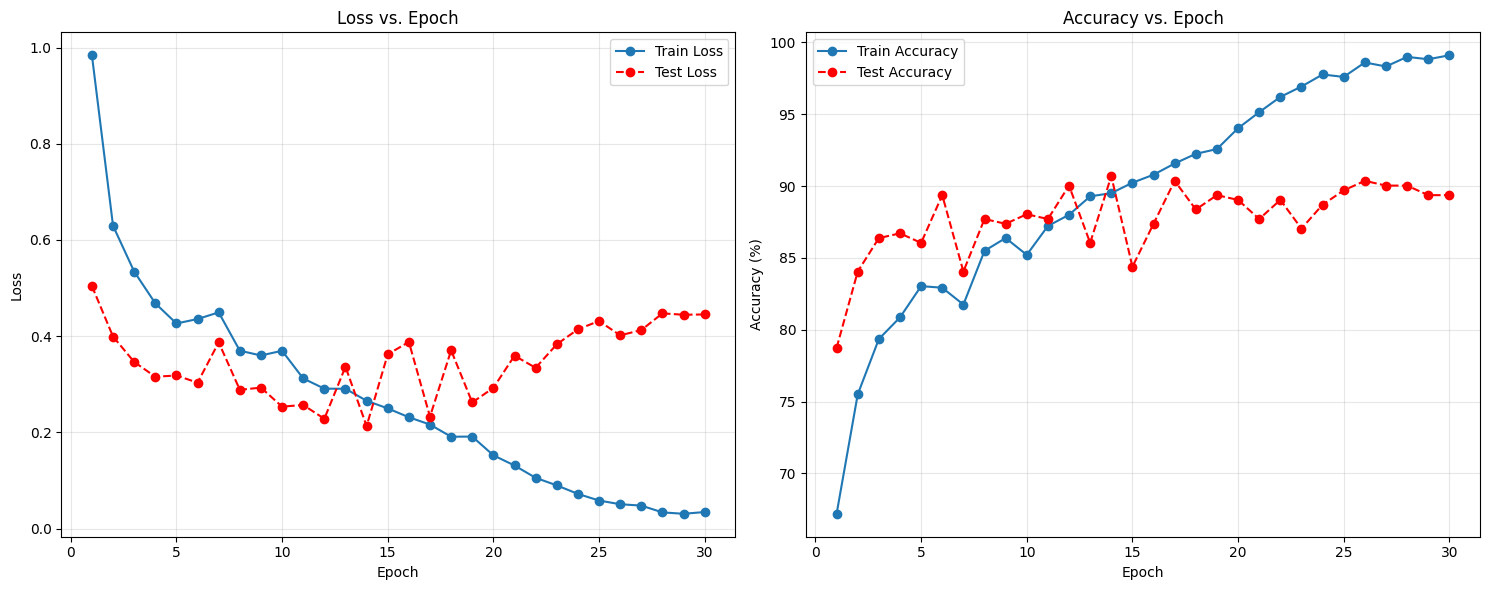


STANDARD VALIDATION CLASSIFICATION REPORT
              precision    recall  f1-score   support

  alternaria       0.81      0.92      0.86        85
     healthy       0.93      0.82      0.88       120
   strawmite       0.97      1.00      0.98        96

    accuracy                           0.91       301
   macro avg       0.91      0.91      0.91       301
weighted avg       0.91      0.91      0.91       301


TTA VALIDATION CLASSIFICATION REPORT
              precision    recall  f1-score   support

  alternaria       0.84      0.92      0.88        85
     healthy       0.93      0.84      0.88       120
   strawmite       0.96      0.99      0.97        96

    accuracy                           0.91       301
   macro avg       0.91      0.92      0.91       301
weighted avg       0.91      0.91      0.91       301



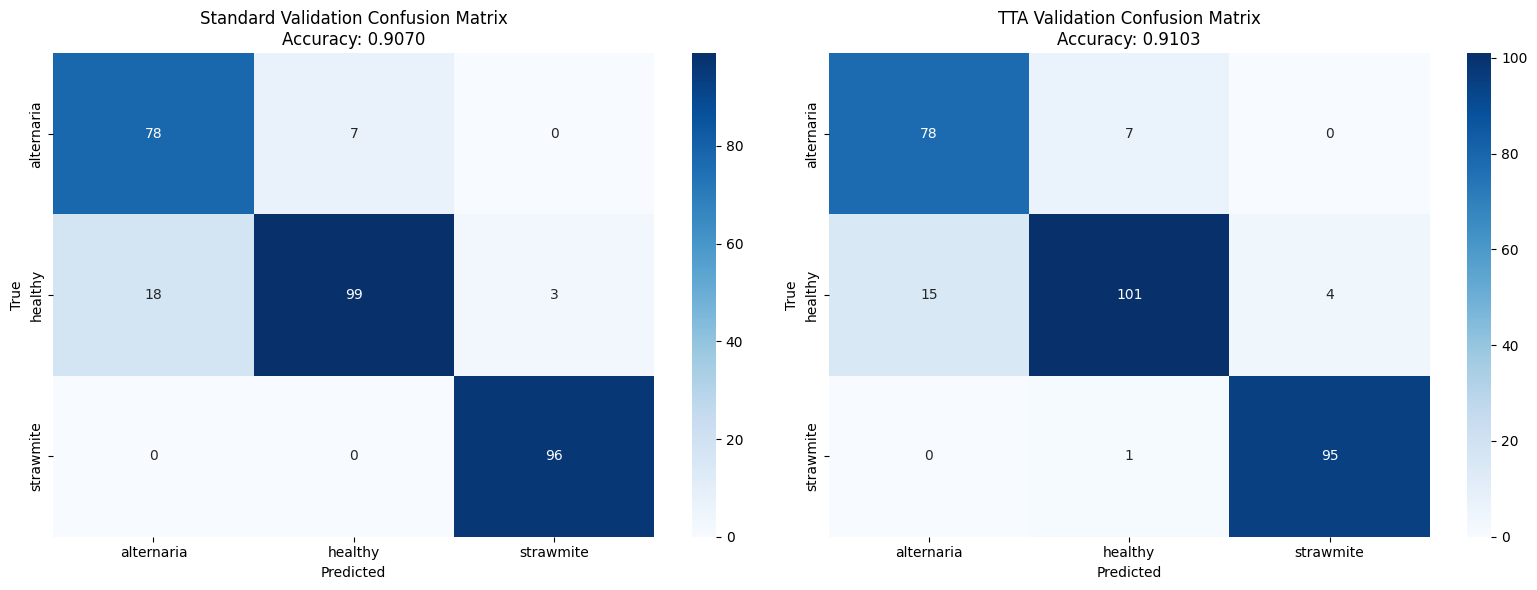


Plotting ROC Curves...


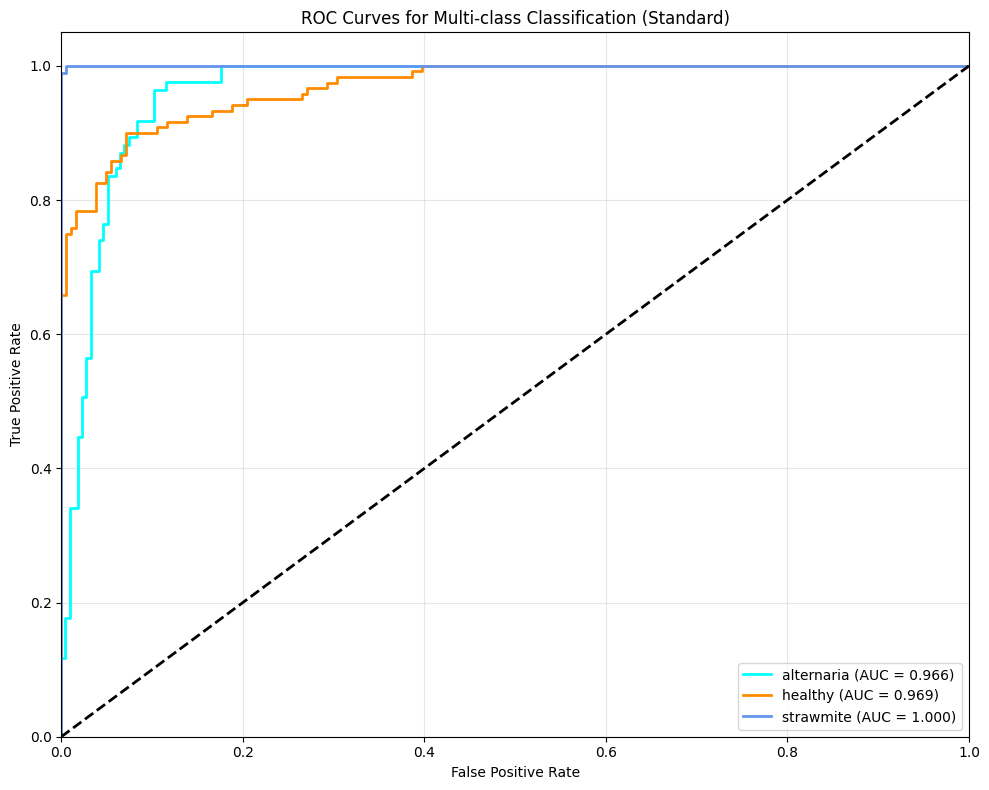

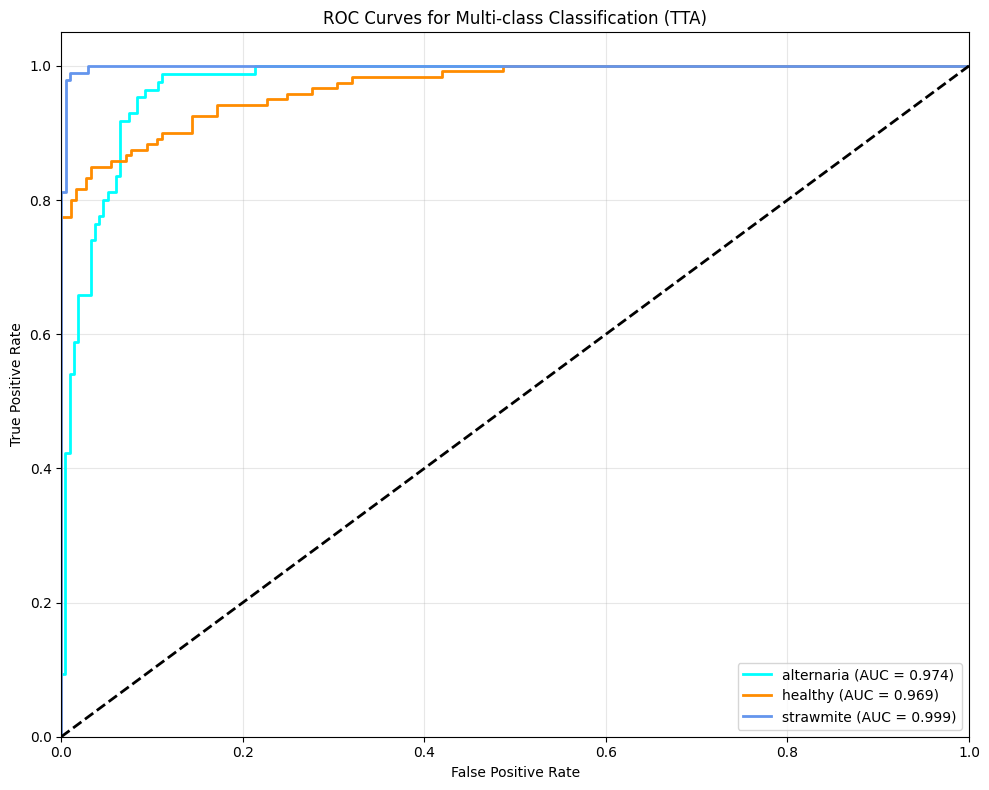


Comprehensive metrics saved to comprehensive_metrics.csv

EVALUATION COMPLETE!


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle
import time
from PIL import Image
import os

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768):
        super().__init__()
        self.proj = nn.Conv2d(
            in_channels,
            embed_dim,
            kernel_size=patch_size,
            stride=patch_size
        )

    def forward(self, x):
        x = self.proj(x)  # (batch_size, embed_dim, n_patches^0.5, n_patches^0.5)
        x = x.flatten(2)  # (batch_size, embed_dim, n_patches)
        x = x.transpose(1, 2)  # (batch_size, n_patches, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.attn_dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(embed_dim, embed_dim)
        self.proj_dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, n_tokens, embed_dim = x.shape

        qkv = self.qkv(x).reshape(batch_size, n_tokens, 3, self.num_heads, self.head_dim)
        qkv = qkv.permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_dropout(attn)

        x = (attn @ v).transpose(1, 2).reshape(batch_size, n_tokens, embed_dim)
        x = self.proj(x)
        x = self.proj_dropout(x)
        return x

class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.layers(x)

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio, dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SpinachViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=768, 
                 num_heads=12, num_layers=12, mlp_ratio=4, dropout=0.1, num_classes=3):
        super().__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        num_patches = (img_size // patch_size) ** 2

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(dropout)

        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)

        self._init_weights()

    def _init_weights(self):
        nn.init.normal_(self.cls_token, std=0.02)
        nn.init.normal_(self.pos_embed, std=0.02)
        self.apply(self._init_weights_recursive)

    def _init_weights_recursive(self, m):
        if isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, std=0.02)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
        elif isinstance(m, nn.LayerNorm):
            nn.init.zeros_(m.bias)
            nn.init.ones_(m.weight)

    def forward(self, x):
        x = self.patch_embed(x)
        cls_token = self.cls_token.expand(x.shape[0], -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.pos_embed
        x = self.pos_drop(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        x = self.head(x[:, 0])
        return x

def count_parameters(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

def get_tta_transforms(img_size=224):
    """Get multiple augmentation transforms for TTA"""
    base_transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
    ])
    
    tta_transforms = [
        # Original
        base_transform,
        # Horizontal flip
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ]),
        # Vertical flip
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomVerticalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ]),
        # Rotation 90
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomRotation(degrees=(90, 90)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ]),
        # Rotation 180
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomRotation(degrees=(180, 180)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ]),
        # Rotation 270
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomRotation(degrees=(270, 270)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ]),
        # Color jitter
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ]),
        # Both flips
        transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomHorizontalFlip(p=1.0),
            transforms.RandomVerticalFlip(p=1.0),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
        ])
    ]
    
    return tta_transforms

def create_dataloaders(train_dir, test_dir, batch_size=32, img_size=224):
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], std=[0.2392, 0.1975, 0.3486])
    ])

    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader, train_dataset.classes, test_dataset

def evaluate_model(model, test_loader, device):
    """Evaluate model and return predictions, labels, and probabilities"""
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = F.softmax(outputs, dim=1)
            preds = outputs.argmax(dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    return np.array(all_preds), np.array(all_labels), np.array(all_probs)

def test_time_augmentation(model, test_dataset, device, img_size=224):
    """Perform Test Time Augmentation"""
    model.eval()
    tta_transforms = get_tta_transforms(img_size)
    
    all_tta_probs = []
    all_labels = []
    
    print("Performing Test Time Augmentation...")
    
    with torch.no_grad():
        for idx in tqdm(range(len(test_dataset))):
            image_path, label = test_dataset.samples[idx]
            pil_image = Image.open(image_path).convert('RGB')
            
            # Apply each TTA transform
            tta_outputs = []
            for transform in tta_transforms:
                augmented_image = transform(pil_image).unsqueeze(0).to(device)
                output = model(augmented_image)
                prob = F.softmax(output, dim=1)
                tta_outputs.append(prob.cpu().numpy())
            
            # Average the predictions
            mean_prob = np.mean(tta_outputs, axis=0)
            all_tta_probs.append(mean_prob[0])
            all_labels.append(label)
    
    all_tta_probs = np.array(all_tta_probs)
    all_labels = np.array(all_labels)
    
    # Calculate TTA accuracy
    tta_preds = np.argmax(all_tta_probs, axis=1)
    tta_accuracy = np.mean(tta_preds == all_labels)
    
    return tta_accuracy, tta_preds, all_labels, all_tta_probs

def calculate_macro_auc_roc(labels, probs, num_classes):
    """Calculate macro-averaged AUC-ROC"""
    # Binarize labels for multiclass ROC
    y_bin = label_binarize(labels, classes=range(num_classes))
    
    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Calculate macro-average AUC
    macro_auc = np.mean(list(roc_auc.values()))
    
    return macro_auc, fpr, tpr, roc_auc

def plot_roc_curves(fpr, tpr, roc_auc, class_names, num_classes, title_suffix=""):
    """Plot ROC curves for all classes"""
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])
    
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for Multi-class Classification{title_suffix}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'/kaggle/working/roc_curves{title_suffix.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

def train_model(model, train_loader, test_loader, num_epochs, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.05)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    best_test_acc = 0
    
    # Create models directory
    os.makedirs('models', exist_ok=True)

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100. * correct / total)

        model.eval()
        test_loss, correct, total = 0.0, 0, 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_losses.append(test_loss / len(test_loader))
        test_acc = 100. * correct / total
        test_accuracies.append(test_acc)

        print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Train Acc={train_accuracies[-1]:.2f}%, Test Loss={test_losses[-1]:.4f}, Test Acc={test_acc:.2f}%")

        # Save best model
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save(model.state_dict(), 'models/best_vit_model.pth')

        scheduler.step()

    return train_losses, train_accuracies, test_losses, test_accuracies

def plot_training_curves(train_losses, train_accuracies, test_losses, test_accuracies):
    epochs = range(1, len(train_losses) + 1)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    axes[0].plot(epochs, train_losses, label="Train Loss", marker='o')
    axes[0].plot(epochs, test_losses, label="Test Loss", marker='o', linestyle='--', color='r')
    axes[0].set_title("Loss vs. Epoch")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(epochs, train_accuracies, label="Train Accuracy", marker='o')
    axes[1].plot(epochs, test_accuracies, label="Test Accuracy", marker='o', linestyle='--', color='r')
    axes[1].set_title("Accuracy vs. Epoch")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy (%)")
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('/kaggle/working/training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_confusion_matrices(labels, preds, tta_labels, tta_preds, class_names, std_acc, tta_acc):
    """Plot confusion matrices side by side"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Standard confusion matrix
    cm1 = confusion_matrix(labels, preds)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title(f'Standard Validation Confusion Matrix\nAccuracy: {std_acc:.4f}')
    
    # TTA confusion matrix
    cm2 = confusion_matrix(tta_labels, tta_preds)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')
    axes[1].set_title(f'TTA Validation Confusion Matrix\nAccuracy: {tta_acc:.4f}')
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

# -------------------------------
# Main Execution
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create model and count parameters
model = SpinachViT().to(device)
total_params, trainable_params = count_parameters(model)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Create data loaders
train_loader, test_loader, class_names, test_dataset = create_dataloaders(
    "/kaggle/input/leaf-data/Leaf_Dataset/Train", 
    "/kaggle/input/leaf-data/Leaf_Dataset/Test"
)

print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")

# Train the model
print("\nStarting training...")
train_losses, train_accuracies, test_losses, test_accuracies = train_model(
    model, train_loader, test_loader, 30, device
)

# Load best model for evaluation
model.load_state_dict(torch.load('models/best_vit_model.pth'))
print("Loaded best model for evaluation")

# Standard evaluation
print("\nPerforming standard evaluation...")
std_preds, std_labels, std_probs = evaluate_model(model, test_loader, device)
std_accuracy = np.mean(std_preds == std_labels)

# Calculate standard macro AUC-ROC
std_macro_auc, std_fpr, std_tpr, std_roc_auc = calculate_macro_auc_roc(
    std_labels, std_probs, len(class_names)
)

# Test Time Augmentation
print("\nPerforming Test Time Augmentation...")
tta_accuracy, tta_preds, tta_labels, tta_probs = test_time_augmentation(
    model, test_dataset, device
)

# Calculate TTA macro AUC-ROC
tta_macro_auc, tta_fpr, tta_tpr, tta_roc_auc = calculate_macro_auc_roc(
    tta_labels, tta_probs, len(class_names)
)

# Print comprehensive results
print(f"\n{'='*60}")
print("COMPREHENSIVE EVALUATION RESULTS")
print(f"{'='*60}")
print(f"Model: Vision Transformer (ViT)")
print(f"Total Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")
print(f"Number of Classes: {len(class_names)}")
print(f"Class Names: {class_names}")
print(f"\nStandard Validation Accuracy: {std_accuracy:.4f} ({std_accuracy*100:.2f}%)")
print(f"Standard Macro AUC-ROC: {std_macro_auc:.4f}")
print(f"TTA Validation Accuracy: {tta_accuracy:.4f} ({tta_accuracy*100:.2f}%)")
print(f"TTA Macro AUC-ROC: {tta_macro_auc:.4f}")
print(f"\nTTA Improvements:")
print(f"Accuracy Improvement: {(tta_accuracy - std_accuracy)*100:.2f}%")
print(f"Macro AUC-ROC Improvement: {(tta_macro_auc - std_macro_auc)*100:.2f}%")

# Plot training curves
plot_training_curves(train_losses, train_accuracies, test_losses, test_accuracies)

# Classification reports
print(f"\n{'='*50}")
print("STANDARD VALIDATION CLASSIFICATION REPORT")
print(f"{'='*50}")
print(classification_report(std_labels, std_preds, target_names=class_names))

print(f"\n{'='*50}")
print("TTA VALIDATION CLASSIFICATION REPORT")
print(f"{'='*50}")
print(classification_report(tta_labels, tta_preds, target_names=class_names))

# Plot confusion matrices
plot_confusion_matrices(std_labels, std_preds, tta_labels, tta_preds, 
                       class_names, std_accuracy, tta_accuracy)

# Plot ROC curves
print("\nPlotting ROC Curves...")
plot_roc_curves(std_fpr, std_tpr, std_roc_auc, class_names, len(class_names), " (Standard)")
plot_roc_curves(tta_fpr, tta_tpr, tta_roc_auc, class_names, len(class_names), " (TTA)")

# Save comprehensive metrics
metrics_dict = {
    'model_name': 'Vision Transformer (ViT)',
    'total_parameters': total_params,
    'trainable_parameters': trainable_params,
    'num_classes': len(class_names),
    'standard_accuracy': std_accuracy,
    'standard_macro_auc': std_macro_auc,
    'tta_accuracy': tta_accuracy,
    'tta_macro_auc': tta_macro_auc,
    'accuracy_improvement_percent': (tta_accuracy - std_accuracy) * 100,
    'auc_improvement_percent': (tta_macro_auc - std_macro_auc) * 100
}

# Save individual class AUC scores
for i, class_name in enumerate(class_names):
    metrics_dict[f'standard_auc_{class_name}'] = std_roc_auc[i]
    metrics_dict[f'tta_auc_{class_name}'] = tta_roc_auc[i]

pd.DataFrame([metrics_dict]).to_csv('/kaggle/working/comprehensive_metrics.csv', index=False)
print("\nComprehensive metrics saved to comprehensive_metrics.csv")

print(f"\n{'='*60}")
print("EVALUATION COMPLETE!")
print(f"{'='*60}")

**SpinachCNN**

<ipython-input-1-e45500e74b84>:292: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Trainable Parameters:
                 Name  Parameters
       conv1.0.weight        9408
         conv1.0.bias          64
       conv1.1.weight          64
         conv1.1.bias          64
res_blocks.0.0.weight       73728
  res_blocks.0.0.bias         128
res_blocks.0.1.weight         128
  res_blocks.0.1.bias         128
res_blocks.0.3.weight      147456
  res_blocks.0.3.bias         128
res_blocks.0.4.weight         128
  res_blocks.0.4.bias         128
res_blocks.0.6.weight        8192
  res_blocks.0.6.bias         128
res_blocks.1.0.weight      294912
  res_blocks.1.0.bias         256
res_blocks.1.1.weight         256
  res_blocks.1.1.bias         256
res_blocks.1.3.weight      589824
  res_blocks.1.3.bias         256
res_blocks.1.4.weight         256
  res_blocks.1.4.bias         256
res_blocks.1.6.weight       32768
  res_blocks.1.6.bias         256
res_blocks.2.0.weight     1179648
  res_blocks.2.0.bias         512
res_blocks.2.1.weight         512
  res_blocks.2.1.bias     

Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.38s/it]


Train Loss: 1.1306, Train Acc: 0.4397
Val Loss: 0.9365, Val Acc: 0.4344, Val AUC: 0.8617
Epoch Time: 170.20 seconds

Epoch 2/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


Train Loss: 0.9647, Train Acc: 0.5871
Val Loss: 0.7323, Val Acc: 0.7236, Val AUC: 0.9493
Epoch Time: 154.81 seconds

Epoch 4/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.8821, Train Acc: 0.6557
Val Loss: 0.5902, Val Acc: 0.8812, Val AUC: 0.9624
Epoch Time: 153.50 seconds

Epoch 5/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.8105, Train Acc: 0.7031
Val Loss: 0.5985, Val Acc: 0.8656, Val AUC: 0.9556
Epoch Time: 151.54 seconds

Epoch 6/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.7741, Train Acc: 0.7299
Val Loss: 0.7711, Val Acc: 0.7173, Val AUC: 0.8629
Epoch Time: 152.91 seconds

Epoch 7/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.7716, Train Acc: 0.7249
Val Loss: 0.5432, Val Acc: 0.8767, Val AUC: 0.9664
Epoch Time: 153.44 seconds

Epoch 8/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.7204, Train Acc: 0.7494
Val Loss: 0.5905, Val Acc: 0.8454, Val AUC: 0.9509
Epoch Time: 154.90 seconds

Epoch 9/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.6689, Train Acc: 0.7863
Val Loss: 0.6532, Val Acc: 0.8236, Val AUC: 0.9443
Epoch Time: 152.86 seconds

Epoch 10/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.6461, Train Acc: 0.8075
Val Loss: 0.6091, Val Acc: 0.8187, Val AUC: 0.9663
Epoch Time: 155.45 seconds

Epoch 11/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.6063, Train Acc: 0.8376
Val Loss: 0.4241, Val Acc: 0.9531, Val AUC: 0.9909
Epoch Time: 155.29 seconds

Epoch 12/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it]


Train Loss: 0.5728, Train Acc: 0.8549
Val Loss: 0.5134, Val Acc: 0.8656, Val AUC: 0.9785
Epoch Time: 154.17 seconds

Epoch 13/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.5705, Train Acc: 0.8571
Val Loss: 0.4920, Val Acc: 0.9250, Val AUC: 0.9862
Epoch Time: 154.75 seconds

Epoch 14/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.5729, Train Acc: 0.8571
Val Loss: 0.4885, Val Acc: 0.9094, Val AUC: 0.9804
Epoch Time: 153.70 seconds

Epoch 15/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.5460, Train Acc: 0.8700
Val Loss: 0.4539, Val Acc: 0.9313, Val AUC: 0.9873
Epoch Time: 157.09 seconds

Epoch 16/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.5399, Train Acc: 0.8694
Val Loss: 0.4737, Val Acc: 0.9219, Val AUC: 0.9900
Epoch Time: 152.73 seconds

Epoch 17/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.5390, Train Acc: 0.8778
Val Loss: 0.4205, Val Acc: 0.9688, Val AUC: 0.9931
Epoch Time: 151.85 seconds

Epoch 18/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5263, Train Acc: 0.8867
Val Loss: 0.4261, Val Acc: 0.9437, Val AUC: 0.9922
Epoch Time: 154.24 seconds

Epoch 19/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.5256, Train Acc: 0.8806
Val Loss: 0.4669, Val Acc: 0.9125, Val AUC: 0.9868
Epoch Time: 152.68 seconds

Epoch 20/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.5338, Train Acc: 0.8772
Val Loss: 0.5422, Val Acc: 0.8844, Val AUC: 0.9685
Epoch Time: 153.66 seconds

Epoch 21/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.20s/it]


Train Loss: 0.5193, Train Acc: 0.8884
Val Loss: 0.4174, Val Acc: 0.9594, Val AUC: 0.9921
Epoch Time: 152.05 seconds

Epoch 22/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.5162, Train Acc: 0.8862
Val Loss: 0.4237, Val Acc: 0.9437, Val AUC: 0.9944
Epoch Time: 152.53 seconds

Epoch 23/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.5088, Train Acc: 0.8884
Val Loss: 0.4311, Val Acc: 0.9344, Val AUC: 0.9903
Epoch Time: 154.73 seconds

Epoch 24/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.4921, Train Acc: 0.9051
Val Loss: 0.5251, Val Acc: 0.8875, Val AUC: 0.9825
Epoch Time: 152.06 seconds

Epoch 25/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.4876, Train Acc: 0.9057
Val Loss: 0.4918, Val Acc: 0.9156, Val AUC: 0.9816
Epoch Time: 152.54 seconds

Epoch 26/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5027, Train Acc: 0.8951
Val Loss: 0.4612, Val Acc: 0.9281, Val AUC: 0.9902
Epoch Time: 155.25 seconds

Epoch 27/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.4816, Train Acc: 0.9051
Val Loss: 0.4231, Val Acc: 0.9375, Val AUC: 0.9938
Epoch Time: 156.42 seconds

Epoch 28/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:21<00:00,  2.20s/it]


Train Loss: 0.4927, Train Acc: 0.8990
Val Loss: 0.4064, Val Acc: 0.9563, Val AUC: 0.9936
Epoch Time: 151.28 seconds

Epoch 29/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it]


Train Loss: 0.4800, Train Acc: 0.9090
Val Loss: 0.4192, Val Acc: 0.9469, Val AUC: 0.9932
Epoch Time: 151.06 seconds

Epoch 30/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-e45500e74b84>:166: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]
<ipython-input-1-e45500e74b84>:327: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`

Train Loss: 0.4939, Train Acc: 0.8968
Val Loss: 0.4534, Val Acc: 0.9125, Val AUC: 0.9945
Epoch Time: 152.43 seconds

Running final evaluation with Test-Time Augmentation...


Validation with TTA: 100%|██████████| 10/10 [00:23<00:00,  2.35s/it]



TTA Results - Accuracy: 0.9688, AUC-ROC: 0.9921

Average time per epoch: 154.09 seconds


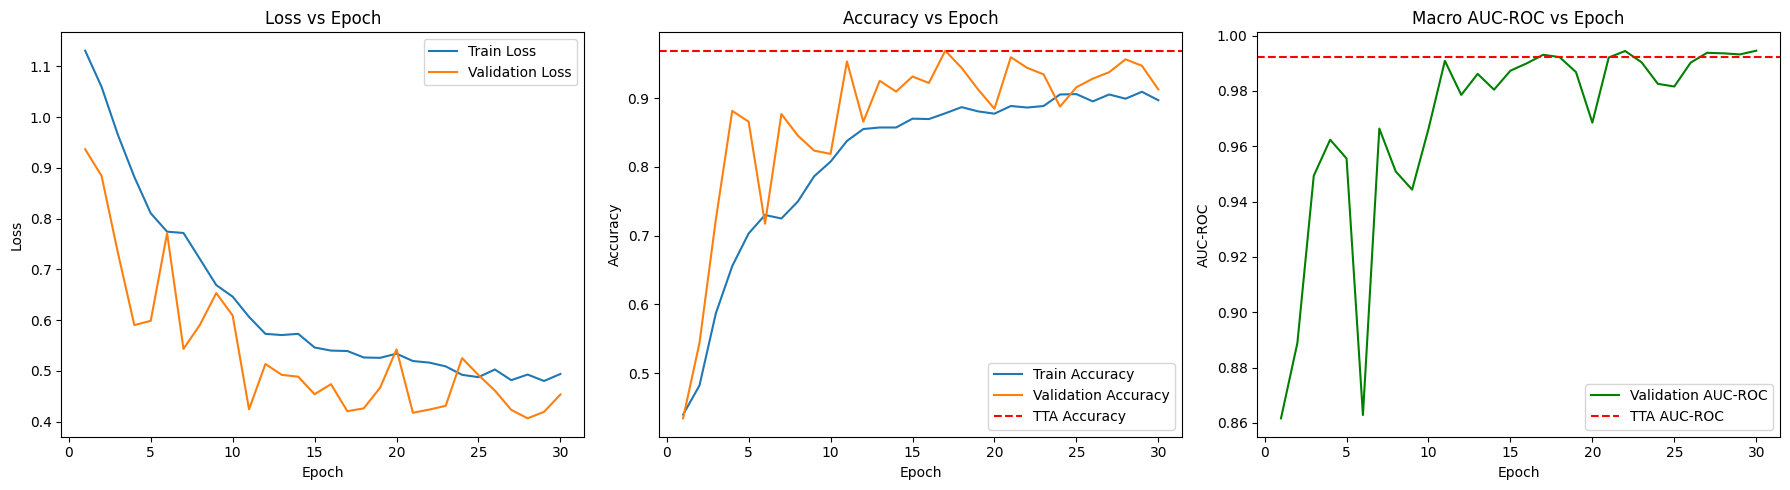


Classification Report (Standard Validation):
              precision    recall  f1-score   support

  alternaria       0.98      0.71      0.82        85
     healthy       0.90      0.97      0.94       120
   strawmite       0.87      1.00      0.93        96

    accuracy                           0.91       301
   macro avg       0.92      0.89      0.90       301
weighted avg       0.91      0.91      0.90       301


Classification Report (TTA Validation):
              precision    recall  f1-score   support

  alternaria       0.98      0.93      0.95        85
     healthy       0.94      0.98      0.96       120
   strawmite       0.99      0.98      0.98        96

    accuracy                           0.97       301
   macro avg       0.97      0.96      0.97       301
weighted avg       0.97      0.97      0.97       301



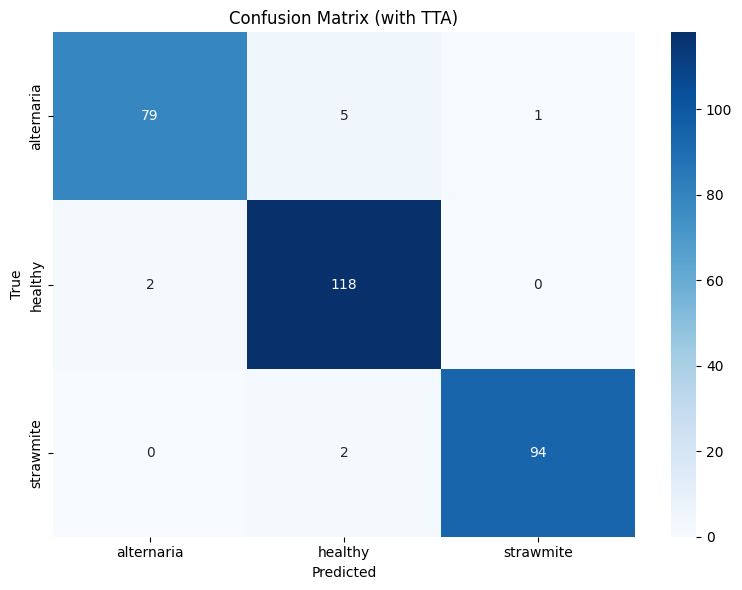

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3
    
    # TTA parameters
    tta_num = 5  # Number of augmentations for TTA

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# Utility functions
def count_parameters(model):
    table = []
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.append([name, params])
        total_params += params
    print("Trainable Parameters:")
    print(pd.DataFrame(table, columns=["Name", "Parameters"]).to_string(index=False))
    print(f"\nTotal Trainable Parameters: {total_params:,}")
    return total_params

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses = []
    accuracies = []
    
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = []
    accuracies = []
    all_preds, all_labels = [], []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            probs = F.softmax(outputs, dim=1)
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Calculate macro AUC-ROC
    y_true_bin = label_binarize(all_labels, classes=range(config.num_classes))
    macro_auc = roc_auc_score(y_true_bin, all_probs, multi_class='ovr', average='macro')
    
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels, all_probs, macro_auc

# Test-Time Augmentation
def tta_predict(model, images, config):
    """Perform test-time augmentation and return averaged predictions"""
    model.eval()
    batch_size = images.shape[0]
    tta_transforms = [
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.RandomVerticalFlip(p=1.0),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    ]
    
    # Original prediction
    with torch.no_grad():
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        total_probs = probs
    
    # Augmented predictions
    for _ in range(config.tta_num - 1):
        # Apply random augmentation
        aug_transform = random.choice(tta_transforms)
        augmented_images = torch.stack([aug_transform(img) for img in images])
        augmented_images = augmented_images.to(config.device)
        
        with torch.no_grad():
            outputs = model(augmented_images)
            probs = F.softmax(outputs, dim=1)
            total_probs += probs
    
    # Average probabilities
    avg_probs = total_probs / config.tta_num
    return avg_probs

def validate_with_tta(model, val_loader, criterion, config):
    model.eval()
    losses = []
    accuracies = []
    all_preds, all_labels = [], []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation with TTA'):
            images, labels = images.to(config.device), labels.to(config.device)
            
            # Get TTA predictions
            probs = tta_predict(model, images, config)
            outputs = torch.log(probs)  # Convert back to logits for loss calculation
            
            loss = criterion(outputs, labels)
            preds = probs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Calculate macro AUC-ROC
    y_true_bin = label_binarize(all_labels, classes=range(config.num_classes))
    macro_auc = roc_auc_score(y_true_bin, all_probs, multi_class='ovr', average='macro')
    
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels, all_probs, macro_auc

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)
    
    # Model setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    total_params = count_parameters(model)
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()
    
    # Tracking metrics
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    val_aucs = []
    best_val_acc = 0
    total_time = 0
    
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        start_time = time.time()
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels, probs, macro_auc = validate(model, val_loader, criterion, config)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        val_aucs.append(macro_auc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {macro_auc:.4f}")
        print(f"Epoch Time: {epoch_time:.2f} seconds")
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))
    
    # Final evaluation with TTA
    print("\nRunning final evaluation with Test-Time Augmentation...")
    model.load_state_dict(torch.load(os.path.join(config.model_dir, 'best_model.pth')))
    tta_loss, tta_acc, tta_preds, tta_labels, tta_probs, tta_auc = validate_with_tta(
        model, val_loader, criterion, config)
    
    print(f"\nTTA Results - Accuracy: {tta_acc:.4f}, AUC-ROC: {tta_auc:.4f}")
    
    avg_time_per_epoch = total_time / config.num_epochs
    print(f"\nAverage time per epoch: {avg_time_per_epoch:.2f} seconds")
    
    # Plot metrics
    plt.figure(figsize=(18, 5))
    
    # Loss subplot
    plt.subplot(1, 3, 1)
    plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    
    # Accuracy subplot
    plt.subplot(1, 3, 2)
    plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.axhline(y=tta_acc, color='r', linestyle='--', label='TTA Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    
    # AUC-ROC subplot
    plt.subplot(1, 3, 3)
    plt.plot(range(1, config.num_epochs + 1), val_aucs, label='Validation AUC-ROC', color='green')
    plt.axhline(y=tta_auc, color='r', linestyle='--', label='TTA AUC-ROC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC-ROC')
    plt.title('Macro AUC-ROC vs Epoch')
    plt.legend()
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('/kaggle/working/training_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nClassification Report (Standard Validation):")
    print(classification_report(labels, preds, target_names=val_dataset.classes))
    
    print("\nClassification Report (TTA Validation):")
    print(classification_report(tta_labels, tta_preds, target_names=val_dataset.classes))
    
    # Plot and save confusion matrix for TTA
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(tta_labels, tta_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=val_dataset.classes, 
                yticklabels=val_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (with TTA)')
    plt.tight_layout()
    plt.savefig('/kaggle/working/confusion_matrix_tta.png', dpi=300, bbox_inches='tight')
    plt.show()

# 6. Run the Training
if __name__ == "__main__":
    config = Config()
    train_model(config)

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2  # Reduced from 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    plots_dir = 'plots'  # New directory for plots
    
    # Model parameters
    num_classes = 3  # Update based on your dataset

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            # First conv block
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Skip connection
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# 5. UPDATED: Plotting Functions
def save_training_plots(train_losses, val_losses, train_accs, val_accs, config):
    """Save training and validation loss and accuracy plots side by side"""
    plt.style.use('seaborn-v0_8')  # Use modern style
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    epochs = range(1, len(train_losses) + 1)
    
    # Loss plot
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2, marker='o', markersize=4)
    ax1.plot(epochs, val_losses, 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=4)
    ax1.set_title('Training and Validation Loss', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Epochs', fontsize=14)
    ax1.set_ylabel('Loss', fontsize=14)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=12)
    
    # Accuracy plot
    ax2.plot(epochs, train_accs, 'b-', label='Training Accuracy', linewidth=2, marker='o', markersize=4)
    ax2.plot(epochs, val_accs, 'r-', label='Validation Accuracy', linewidth=2, marker='s', markersize=4)
    ax2.set_title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Epochs', fontsize=14)
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=12)
    
    plt.tight_layout()
    
    # Save with 300 DPI
    plot_path = os.path.join(config.plots_dir, 'training_metrics.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Training metrics plot saved to: {plot_path}")

def save_confusion_matrix(labels, preds, class_names, config, epoch=None):
    """Save both regular and normalized confusion matrices as separate high-quality images"""
    cm = confusion_matrix(labels, preds)
    
    # 1. Regular Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 14})
    
    plt.title('Confusion Matrix', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add accuracy information
    accuracy = np.trace(cm) / np.sum(cm)
    plt.figtext(0.02, 0.02, f'Overall Accuracy: {accuracy:.3f}', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    
    # Save regular confusion matrix with 300 DPI
    if epoch is not None:
        filename = f'confusion_matrix_epoch_{epoch}.png'
    else:
        filename = 'confusion_matrix_best.png'
    
    cm_path = os.path.join(config.plots_dir, filename)
    plt.savefig(cm_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Confusion matrix saved to: {cm_path}")
    
    # 2. Normalized Confusion Matrix (Row-normalized)
    cm_normalized = normalize(cm, axis=1, norm='l1')  # Normalize by rows (true labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8, 'label': 'Proportion'}, 
                annot_kws={'size': 14})
    
    plt.title('Normalized Confusion Matrix (Row-Normalized)', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add accuracy information
    plt.figtext(0.02, 0.02, f'Overall Accuracy: {accuracy:.3f}', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    
    # Save normalized confusion matrix with 300 DPI
    if epoch is not None:
        norm_filename = f'confusion_matrix_normalized_epoch_{epoch}.png'
    else:
        norm_filename = 'confusion_matrix_normalized_best.png'
    
    norm_cm_path = os.path.join(config.plots_dir, norm_filename)
    plt.savefig(norm_cm_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Normalized confusion matrix saved to: {norm_cm_path}")
    
    # 3. Side-by-side comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Regular CM
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 12}, ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    # Normalized CM
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8, 'label': 'Proportion'}, 
                annot_kws={'size': 12}, ax=ax2)
    ax2.set_title('Normalized Confusion Matrix (Proportions)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    plt.suptitle(f'Confusion Matrix Comparison - Accuracy: {accuracy:.3f}', 
                 fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Save comparison plot with 300 DPI
    if epoch is not None:
        comp_filename = f'confusion_matrix_comparison_epoch_{epoch}.png'
    else:
        comp_filename = 'confusion_matrix_comparison_best.png'
    
    comp_path = os.path.join(config.plots_dir, comp_filename)
    plt.savefig(comp_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Confusion matrix comparison saved to: {comp_path}")

def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels

# 6. Main Training Loop (UNCHANGED - just using updated plotting functions)
def train_model(config):
    set_seed(config.seed)
    
    # Create directories
    os.makedirs(config.model_dir, exist_ok=True)
    os.makedirs(config.plots_dir, exist_ok=True)  # Create plots directory
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model, criterion, optimizer setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    early_stopping = EarlyStopping(patience=5)
    
    # Lists to store metrics for plotting
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    # Training loop
    best_val_acc = 0
    best_preds = None
    best_labels = None
    
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels = validate(
            model, val_loader, criterion, config
        )
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model and store best predictions
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_preds = preds
            best_labels = labels
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes, digits=3))
        
        # Save plots every 5 epochs and at the end
        if (epoch + 1) % 5 == 0 or epoch == config.num_epochs - 1:
            save_training_plots(train_losses, val_losses, train_accs, val_accs, config)
    
    # Save final plots and confusion matrices
    save_training_plots(train_losses, val_losses, train_accs, val_accs, config)
    
    if best_preds is not None and best_labels is not None:
        save_confusion_matrix(best_labels, best_preds, train_dataset.classes, config)
    
    # Save training history as CSV
    history_df = pd.DataFrame({
        'epoch': range(1, len(train_losses) + 1),
        'train_loss': train_losses,
        'val_loss': val_losses,
        'train_acc': train_accs,
        'val_acc': val_accs
    })
    history_path = os.path.join(config.plots_dir, 'training_history.csv')
    history_df.to_csv(history_path, index=False)
    print(f"Training history saved to: {history_path}")
    
    print(f"Training completed. Best validation accuracy: {best_val_acc:.4f}")
    print(f"All plots saved in: {config.plots_dir}")
    return model

# 7. Run Training
if __name__ == "__main__":
    config = Config()
    model = train_model(config)


Epoch 1/30


Validation: 100%|██████████| 10/10 [00:25<00:00,  2.50s/it, Loss=1.0468, Acc=0.3289]


Train Loss: 1.1115, Train Accuracy: 0.4637
Validation Loss: 1.0468, Validation Accuracy: 0.3289

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.333     0.012     0.023        85
     healthy      0.286     0.017     0.031       120
   strawmite      0.330     1.000     0.496        96

    accuracy                          0.329       301
   macro avg      0.316     0.343     0.183       301
weighted avg      0.313     0.329     0.177       301


Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.8958, Acc=0.5548]


Train Loss: 1.0504, Train Accuracy: 0.4911
Validation Loss: 0.8958, Validation Accuracy: 0.5548

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.600     0.459     0.520        85
     healthy      0.744     0.267     0.393       120
   strawmite      0.497     1.000     0.664        96

    accuracy                          0.555       301
   macro avg      0.614     0.575     0.526       301
weighted avg      0.625     0.555     0.515       301


Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.8112, Acc=0.7076]


Train Loss: 1.0182, Train Accuracy: 0.5391
Validation Loss: 0.8112, Validation Accuracy: 0.7076

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.833     0.353     0.496        85
     healthy      0.813     0.725     0.767       120
   strawmite      0.608     1.000     0.756        96

    accuracy                          0.708       301
   macro avg      0.751     0.693     0.673       301
weighted avg      0.753     0.708     0.687       301


Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.5905, Acc=0.8472]


Train Loss: 0.9345, Train Accuracy: 0.6004
Validation Loss: 0.5905, Validation Accuracy: 0.8472

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.787     0.741     0.764        85
     healthy      0.810     0.817     0.813       120
   strawmite      0.940     0.979     0.959        96

    accuracy                          0.847       301
   macro avg      0.846     0.846     0.845       301
weighted avg      0.845     0.847     0.846       301


Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5485, Acc=0.8671]


Train Loss: 0.8655, Train Accuracy: 0.6646
Validation Loss: 0.5485, Validation Accuracy: 0.8671

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.818     0.741     0.778        85
     healthy      0.827     0.875     0.850       120
   strawmite      0.959     0.969     0.964        96

    accuracy                          0.867       301
   macro avg      0.868     0.862     0.864       301
weighted avg      0.866     0.867     0.866       301

Training metrics plot saved to: plots/training_metrics.png

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.7382, Acc=0.7575]


Train Loss: 0.8285, Train Accuracy: 0.6897
Validation Loss: 0.7382, Validation Accuracy: 0.7575

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5421, Acc=0.8638]


Train Loss: 0.8150, Train Accuracy: 0.7026
Validation Loss: 0.5421, Validation Accuracy: 0.8638

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.5797, Acc=0.8206]


Train Loss: 0.7443, Train Accuracy: 0.7344
Validation Loss: 0.5797, Validation Accuracy: 0.8206

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.5955, Acc=0.7973]


Train Loss: 0.7253, Train Accuracy: 0.7533
Validation Loss: 0.5955, Validation Accuracy: 0.7973

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.6059, Acc=0.7874]


Train Loss: 0.6620, Train Accuracy: 0.7969
Validation Loss: 0.6059, Validation Accuracy: 0.7874
Training metrics plot saved to: plots/training_metrics.png

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.5619, Acc=0.8571]


Train Loss: 0.6364, Train Accuracy: 0.8069
Validation Loss: 0.5619, Validation Accuracy: 0.8571

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.4942, Acc=0.9003]


Train Loss: 0.6834, Train Accuracy: 0.7768
Validation Loss: 0.4942, Validation Accuracy: 0.9003

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.967     0.694     0.808        85
     healthy      0.825     0.983     0.897       120
   strawmite      0.969     0.979     0.974        96

    accuracy                          0.900       301
   macro avg      0.920     0.886     0.893       301
weighted avg      0.911     0.900     0.897       301


Epoch 13/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.6077, Acc=0.8439]


Train Loss: 0.6391, Train Accuracy: 0.8125
Validation Loss: 0.6077, Validation Accuracy: 0.8439

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it, Loss=0.4817, Acc=0.8970]


Train Loss: 0.6133, Train Accuracy: 0.8253
Validation Loss: 0.4817, Validation Accuracy: 0.8970

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5922, Acc=0.8571]


Train Loss: 0.5894, Train Accuracy: 0.8393
Validation Loss: 0.5922, Validation Accuracy: 0.8571
Training metrics plot saved to: plots/training_metrics.png

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.4502, Acc=0.9236]


Train Loss: 0.5898, Train Accuracy: 0.8438
Validation Loss: 0.4502, Validation Accuracy: 0.9236

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.971     0.788     0.870        85
     healthy      0.906     0.958     0.931       120
   strawmite      0.914     1.000     0.955        96

    accuracy                          0.924       301
   macro avg      0.930     0.916     0.919       301
weighted avg      0.927     0.924     0.922       301


Epoch 17/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it, Loss=0.4613, Acc=0.9236]


Train Loss: 0.5424, Train Accuracy: 0.8722
Validation Loss: 0.4613, Validation Accuracy: 0.9236

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.4434, Acc=0.9435]


Train Loss: 0.5305, Train Accuracy: 0.8789
Validation Loss: 0.4434, Validation Accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.973     0.847     0.906        85
     healthy      0.951     0.967     0.959       120
   strawmite      0.914     1.000     0.955        96

    accuracy                          0.944       301
   macro avg      0.946     0.938     0.940       301
weighted avg      0.945     0.944     0.943       301


Epoch 19/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it, Loss=0.4175, Acc=0.9369]


Train Loss: 0.5185, Train Accuracy: 0.8912
Validation Loss: 0.4175, Validation Accuracy: 0.9369

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it, Loss=0.4387, Acc=0.9236]


Train Loss: 0.5052, Train Accuracy: 0.8956
Validation Loss: 0.4387, Validation Accuracy: 0.9236
Training metrics plot saved to: plots/training_metrics.png

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it, Loss=0.4198, Acc=0.9435]


Train Loss: 0.4932, Train Accuracy: 0.9012
Validation Loss: 0.4198, Validation Accuracy: 0.9435

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it, Loss=0.4225, Acc=0.9402]


Train Loss: 0.4826, Train Accuracy: 0.9046
Validation Loss: 0.4225, Validation Accuracy: 0.9402

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.4141, Acc=0.9568]


Train Loss: 0.5085, Train Accuracy: 0.8839
Validation Loss: 0.4141, Validation Accuracy: 0.9568

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.963     0.906     0.933        85
     healthy      0.966     0.958     0.962       120
   strawmite      0.941     1.000     0.970        96

    accuracy                          0.957       301
   macro avg      0.957     0.955     0.955       301
weighted avg      0.957     0.957     0.956       301


Epoch 24/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5010, Acc=0.9003]


Train Loss: 0.5512, Train Accuracy: 0.8728
Validation Loss: 0.5010, Validation Accuracy: 0.9003

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.4337, Acc=0.9203]


Train Loss: 0.5491, Train Accuracy: 0.8661
Validation Loss: 0.4337, Validation Accuracy: 0.9203
Training metrics plot saved to: plots/training_metrics.png

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.4353, Acc=0.9302]


Train Loss: 0.5258, Train Accuracy: 0.8856
Validation Loss: 0.4353, Validation Accuracy: 0.9302

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it, Loss=0.5037, Acc=0.8937]


Train Loss: 0.5344, Train Accuracy: 0.8767
Validation Loss: 0.5037, Validation Accuracy: 0.8937

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it, Loss=0.4124, Acc=0.9502]


Train Loss: 0.5135, Train Accuracy: 0.8895
Validation Loss: 0.4124, Validation Accuracy: 0.9502

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5174, Acc=0.8538]


Train Loss: 0.5127, Train Accuracy: 0.8901
Validation Loss: 0.5174, Validation Accuracy: 0.8538

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.4117, Acc=0.9601]


Train Loss: 0.5023, Train Accuracy: 0.8968
Validation Loss: 0.4117, Validation Accuracy: 0.9601

Classification Report:
              precision    recall  f1-score   support

  alternaria      1.000     0.871     0.931        85
     healthy      0.930     0.992     0.960       120
   strawmite      0.970     1.000     0.985        96

    accuracy                          0.960       301
   macro avg      0.966     0.954     0.958       301
weighted avg      0.962     0.960     0.959       301

Training metrics plot saved to: plots/training_metrics.png
Training metrics plot saved to: plots/training_metrics.png
Confusion matrix saved to: plots/confusion_matrix_best.png
Training history saved to: plots/training_history.csv
Training completed. Best validation accuracy: 0.9601
All plots saved in: plots


<ipython-input-1-d826489fd50a>:255: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Trainable Parameters:
                 Name  Parameters
       conv1.0.weight        9408
         conv1.0.bias          64
       conv1.1.weight          64
         conv1.1.bias          64
res_blocks.0.0.weight       73728
  res_blocks.0.0.bias         128
res_blocks.0.1.weight         128
  res_blocks.0.1.bias         128
res_blocks.0.3.weight      147456
  res_blocks.0.3.bias         128
res_blocks.0.4.weight         128
  res_blocks.0.4.bias         128
res_blocks.0.6.weight        8192
  res_blocks.0.6.bias         128
res_blocks.1.0.weight      294912
  res_blocks.1.0.bias         256
res_blocks.1.1.weight         256
  res_blocks.1.1.bias         256
res_blocks.1.3.weight      589824
  res_blocks.1.3.bias         256
res_blocks.1.4.weight         256
  res_blocks.1.4.bias         256
res_blocks.1.6.weight       32768
  res_blocks.1.6.bias         256
res_blocks.2.0.weight     1179648
  res_blocks.2.0.bias         512
res_blocks.2.1.weight         512
  res_blocks.2.1.bias     

Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:25<00:00,  2.55s/it]


Train Loss: 1.1306, Train Acc: 0.4397
Val Loss: 0.9365, Val Acc: 0.4344, Val AUC: 0.8617

Epoch 2/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 1.0595, Train Acc: 0.4821
Val Loss: 0.8840, Val Acc: 0.5437, Val AUC: 0.8889

Epoch 3/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.9647, Train Acc: 0.5871
Val Loss: 0.7323, Val Acc: 0.7236, Val AUC: 0.9493

Epoch 4/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Train Loss: 0.8821, Train Acc: 0.6557
Val Loss: 0.5902, Val Acc: 0.8812, Val AUC: 0.9624

Epoch 5/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.8105, Train Acc: 0.7031
Val Loss: 0.5985, Val Acc: 0.8656, Val AUC: 0.9556

Epoch 6/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.7741, Train Acc: 0.7299
Val Loss: 0.7711, Val Acc: 0.7173, Val AUC: 0.8629

Epoch 7/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.7716, Train Acc: 0.7249
Val Loss: 0.5432, Val Acc: 0.8767, Val AUC: 0.9664

Epoch 8/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.7204, Train Acc: 0.7494
Val Loss: 0.5905, Val Acc: 0.8454, Val AUC: 0.9509

Epoch 9/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.6689, Train Acc: 0.7863
Val Loss: 0.6532, Val Acc: 0.8236, Val AUC: 0.9443

Epoch 10/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.6461, Train Acc: 0.8075
Val Loss: 0.6091, Val Acc: 0.8187, Val AUC: 0.9663

Epoch 11/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


Train Loss: 0.6063, Train Acc: 0.8376
Val Loss: 0.4241, Val Acc: 0.9531, Val AUC: 0.9909

Epoch 12/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


Train Loss: 0.5728, Train Acc: 0.8549
Val Loss: 0.5134, Val Acc: 0.8656, Val AUC: 0.9785

Epoch 13/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


Train Loss: 0.5705, Train Acc: 0.8571
Val Loss: 0.4920, Val Acc: 0.9250, Val AUC: 0.9862

Epoch 14/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5729, Train Acc: 0.8571
Val Loss: 0.4885, Val Acc: 0.9094, Val AUC: 0.9804

Epoch 15/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.5460, Train Acc: 0.8700
Val Loss: 0.4539, Val Acc: 0.9313, Val AUC: 0.9873

Epoch 16/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.24s/it]


Train Loss: 0.5399, Train Acc: 0.8694
Val Loss: 0.4737, Val Acc: 0.9219, Val AUC: 0.9900

Epoch 17/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.5390, Train Acc: 0.8778
Val Loss: 0.4205, Val Acc: 0.9688, Val AUC: 0.9931

Epoch 18/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5263, Train Acc: 0.8867
Val Loss: 0.4261, Val Acc: 0.9437, Val AUC: 0.9922

Epoch 19/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.34s/it]


Train Loss: 0.5256, Train Acc: 0.8806
Val Loss: 0.4669, Val Acc: 0.9125, Val AUC: 0.9868

Epoch 20/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]


Train Loss: 0.5338, Train Acc: 0.8772
Val Loss: 0.5422, Val Acc: 0.8844, Val AUC: 0.9685

Epoch 21/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


Train Loss: 0.5193, Train Acc: 0.8884
Val Loss: 0.4174, Val Acc: 0.9594, Val AUC: 0.9921

Epoch 22/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.30s/it]


Train Loss: 0.5162, Train Acc: 0.8862
Val Loss: 0.4237, Val Acc: 0.9437, Val AUC: 0.9944

Epoch 23/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


Train Loss: 0.5088, Train Acc: 0.8884
Val Loss: 0.4311, Val Acc: 0.9344, Val AUC: 0.9903

Epoch 24/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.4921, Train Acc: 0.9051
Val Loss: 0.5251, Val Acc: 0.8875, Val AUC: 0.9825

Epoch 25/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


Train Loss: 0.4876, Train Acc: 0.9057
Val Loss: 0.4918, Val Acc: 0.9156, Val AUC: 0.9816

Epoch 26/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.28s/it]


Train Loss: 0.5027, Train Acc: 0.8951
Val Loss: 0.4612, Val Acc: 0.9281, Val AUC: 0.9902

Epoch 27/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:22<00:00,  2.27s/it]


Train Loss: 0.4816, Train Acc: 0.9051
Val Loss: 0.4231, Val Acc: 0.9375, Val AUC: 0.9938

Epoch 28/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:24<00:00,  2.50s/it]


Train Loss: 0.4927, Train Acc: 0.8990
Val Loss: 0.4064, Val Acc: 0.9563, Val AUC: 0.9936

Epoch 29/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:24<00:00,  2.42s/it]


Train Loss: 0.4800, Train Acc: 0.9090
Val Loss: 0.4192, Val Acc: 0.9469, Val AUC: 0.9932

Epoch 30/30


Training:   0%|          | 0/56 [00:00<?, ?it/s]<ipython-input-1-d826489fd50a>:162: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.36s/it]
<ipython-input-1-d826489fd50a>:286: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`

Train Loss: 0.4939, Train Acc: 0.8968
Val Loss: 0.4534, Val Acc: 0.9125, Val AUC: 0.9945

Running final evaluation with Test-Time Augmentation...


Validation with TTA: 100%|██████████| 10/10 [00:24<00:00,  2.42s/it]



TTA Results - Accuracy: 0.9688, AUC-ROC: 0.9921


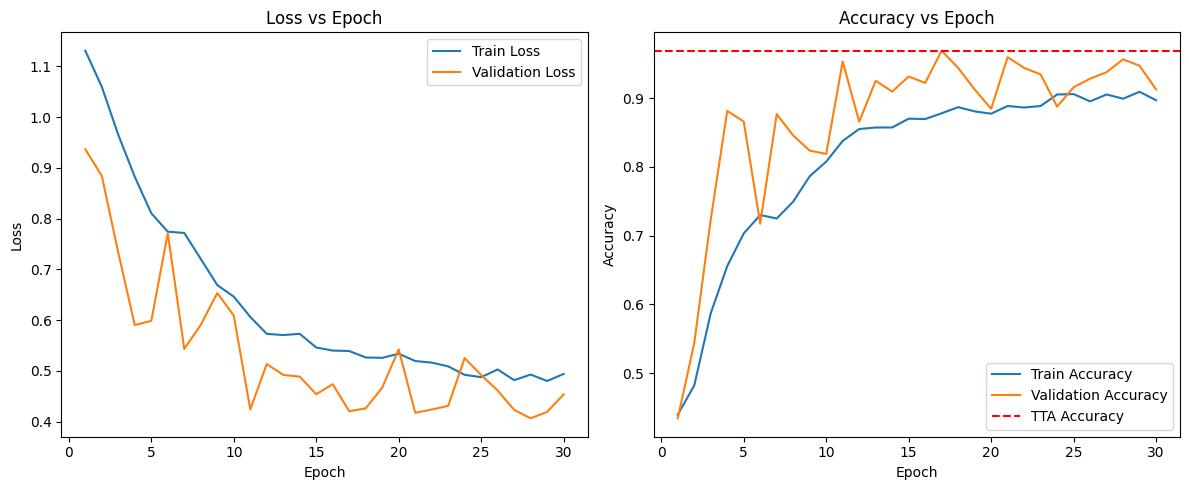

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    
    # Model parameters
    num_classes = 3
    
    # TTA parameters
    tta_num = 5  # Number of augmentations for TTA

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        for res_block in self.res_blocks:
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

def count_parameters(model):
    table = []
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.append([name, params])
        total_params += params
    print("Trainable Parameters:")
    print(pd.DataFrame(table, columns=["Name", "Parameters"]).to_string(index=False))
    print(f"\nTotal Trainable Parameters: {total_params:,}")
    return total_params

# 4. Training and Validation
def train_epoch(model, train_loader, criterion, optimizer, scaler, config):
    model.train()
    losses, accuracies = [], []
    for images, labels in tqdm(train_loader, desc='Training'):
        images, labels = images.to(config.device), labels.to(config.device)
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        acc = (outputs.argmax(dim=1) == labels).float().mean().item()
        losses.append(loss.item())
        accuracies.append(acc)
    return np.mean(losses), np.mean(accuracies)

def validate(model, val_loader, criterion, config):
    model.eval()
    losses, accuracies = [], []
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(config.device), labels.to(config.device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            probs = F.softmax(outputs, dim=1)
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    y_true_bin = label_binarize(all_labels, classes=range(config.num_classes))
    macro_auc = roc_auc_score(y_true_bin, all_probs, multi_class='ovr', average='macro')
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels, all_probs, macro_auc

def tta_predict(model, images, config):
    model.eval()
    batch_size = images.shape[0]
    tta_transforms = [
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.RandomVerticalFlip(p=1.0),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    ]
    with torch.no_grad():
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
        total_probs = probs
    for _ in range(config.tta_num - 1):
        aug_transform = random.choice(tta_transforms)
        augmented_images = torch.stack([aug_transform(img.cpu()) for img in images.cpu()])
        augmented_images = augmented_images.to(config.device)
        with torch.no_grad():
            outputs = model(augmented_images)
            probs = F.softmax(outputs, dim=1)
            total_probs += probs
    avg_probs = total_probs / config.tta_num
    return avg_probs

def validate_with_tta(model, val_loader, criterion, config):
    model.eval()
    losses, accuracies = [], []
    all_preds, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation with TTA'):
            images, labels = images.to(config.device), labels.to(config.device)
            probs = tta_predict(model, images, config)
            outputs = torch.log(probs)
            loss = criterion(outputs, labels)
            preds = probs.argmax(dim=1)
            acc = (preds == labels).float().mean().item()
            losses.append(loss.item())
            accuracies.append(acc)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    y_true_bin = label_binarize(all_labels, classes=range(config.num_classes))
    macro_auc = roc_auc_score(y_true_bin, all_probs, multi_class='ovr', average='macro')
    return np.mean(losses), np.mean(accuracies), all_preds, all_labels, all_probs, macro_auc

# 5. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    os.makedirs(config.model_dir, exist_ok=True)
    
    train_dataset = ImageFolder(os.path.join(config.data_dir, 'Train'), transform=get_transforms(config, is_training=True))
    val_dataset = ImageFolder(os.path.join(config.data_dir, 'Test'), transform=get_transforms(config, is_training=False))
    
    train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True, num_workers=config.num_workers)
    val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False, num_workers=config.num_workers)
    
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    total_params = count_parameters(model)
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay)
    scaler = torch.cuda.amp.GradScaler()
    
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    val_aucs = []
    best_val_acc = 0
    total_time = 0
    
    for epoch in range(config.num_epochs):
        print(f"\nEpoch {epoch + 1}/{config.num_epochs}")
        start_time = time.time()
        
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scaler, config)
        val_loss, val_acc, preds, labels, probs, macro_auc = validate(model, val_loader, criterion, config)
        
        epoch_time = time.time() - start_time
        total_time += epoch_time
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        val_aucs.append(macro_auc)
        
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val AUC: {macro_auc:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(config.model_dir, 'best_model.pth'))
    
    print("\nRunning final evaluation with Test-Time Augmentation...")
    model.load_state_dict(torch.load(os.path.join(config.model_dir, 'best_model.pth')))
    tta_loss, tta_acc, tta_preds, tta_labels, tta_probs, tta_auc = validate_with_tta(
        model, val_loader, criterion, config)
    
    print(f"\nTTA Results - Accuracy: {tta_acc:.4f}, AUC-ROC: {tta_auc:.4f}")
    
    # 🔥 Only Plot Loss and Accuracy
    plt.figure(figsize=(12, 5))

    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()

    # Accuracy subplot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.axhline(y=tta_acc, color='r', linestyle='--', label='TTA Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()

    plt.tight_layout()
    plt.savefig('/kaggle/working/loss_accuracy_graphs.png', dpi=300, bbox_inches='tight')
    plt.show()

# 6. Run the Training
if __name__ == "__main__":
    config = Config()
    train_model(config)


NameError: name 'train_losses' is not defined

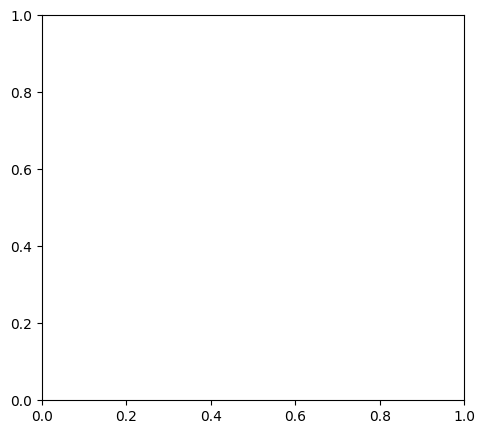

In [3]:
plt.figure(figsize=(12, 5))

 # Loss subplot
plt.subplot(1, 2, 1)
plt.plot(range(1, config.num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, config.num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

    # Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(range(1, config.num_epochs + 1), train_accs, label='Train Accuracy')
plt.plot(range(1, config.num_epochs + 1), val_accs, label='Validation Accuracy')
plt.axhline(y=tta_acc, color='r', linestyle='--', label='TTA Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('/kaggle/working/loss_accuracy_graphsCNNndk.png', dpi=600, bbox_inches='tight')
plt.show()

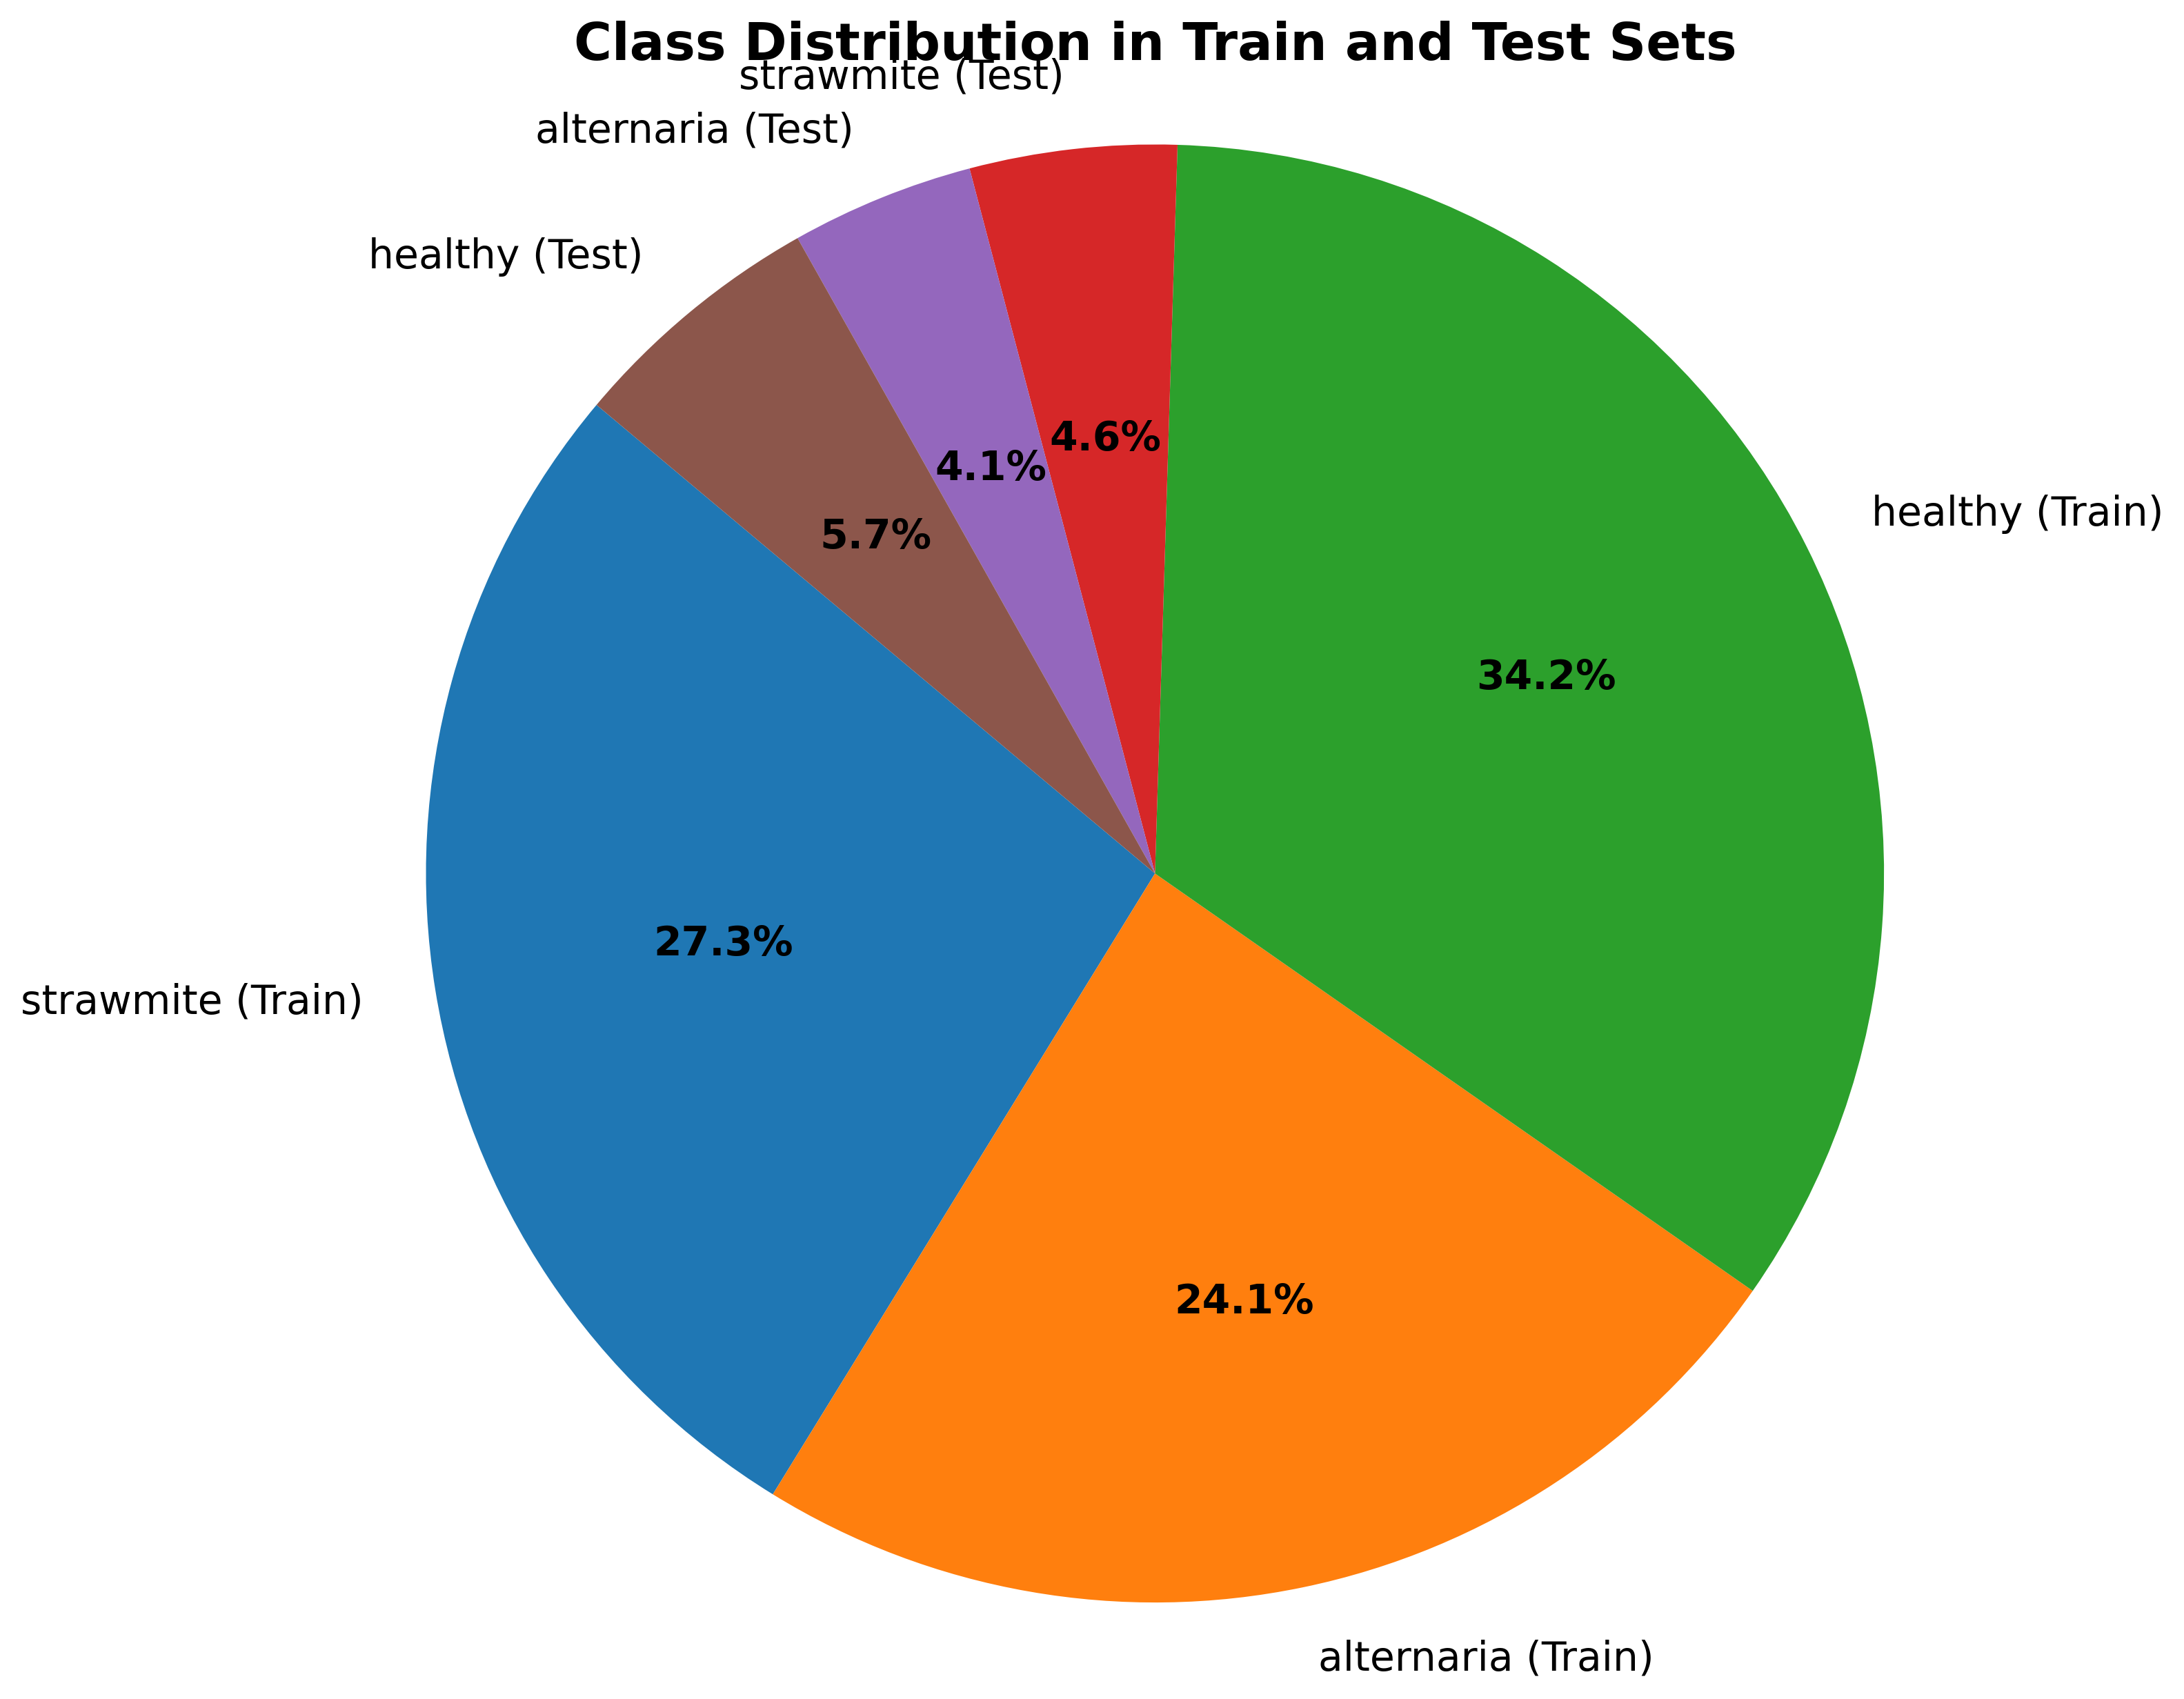

In [2]:
import os
import matplotlib.pyplot as plt

# Set path to dataset
base_path = "/kaggle/input/leaf-data/Leaf_Dataset"

# Define subdirectories for Train and Test
splits = ['Train', 'Test']
class_counts = {}

# Loop through Train and Test folders
for split in splits:
    split_path = os.path.join(base_path, split)
    for class_name in os.listdir(split_path):
        class_folder = os.path.join(split_path, class_name)
        if os.path.isdir(class_folder):
            count = len(os.listdir(class_folder))
            key = f"{class_name} ({split})"
            class_counts[key] = count

# Plotting with higher DPI and larger font sizes
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
wedges, texts, autotexts = ax.pie(
    class_counts.values(),
    labels=class_counts.keys(),
    autopct='%1.1f%%',
    textprops=dict(fontsize=14),
    startangle=140
)

plt.setp(autotexts, size=14, weight="bold")
plt.setp(texts, size=14)
ax.set_title('Class Distribution in Train and Test Sets', fontsize=18, weight='bold')
ax.axis('equal')

# Save the figure
plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

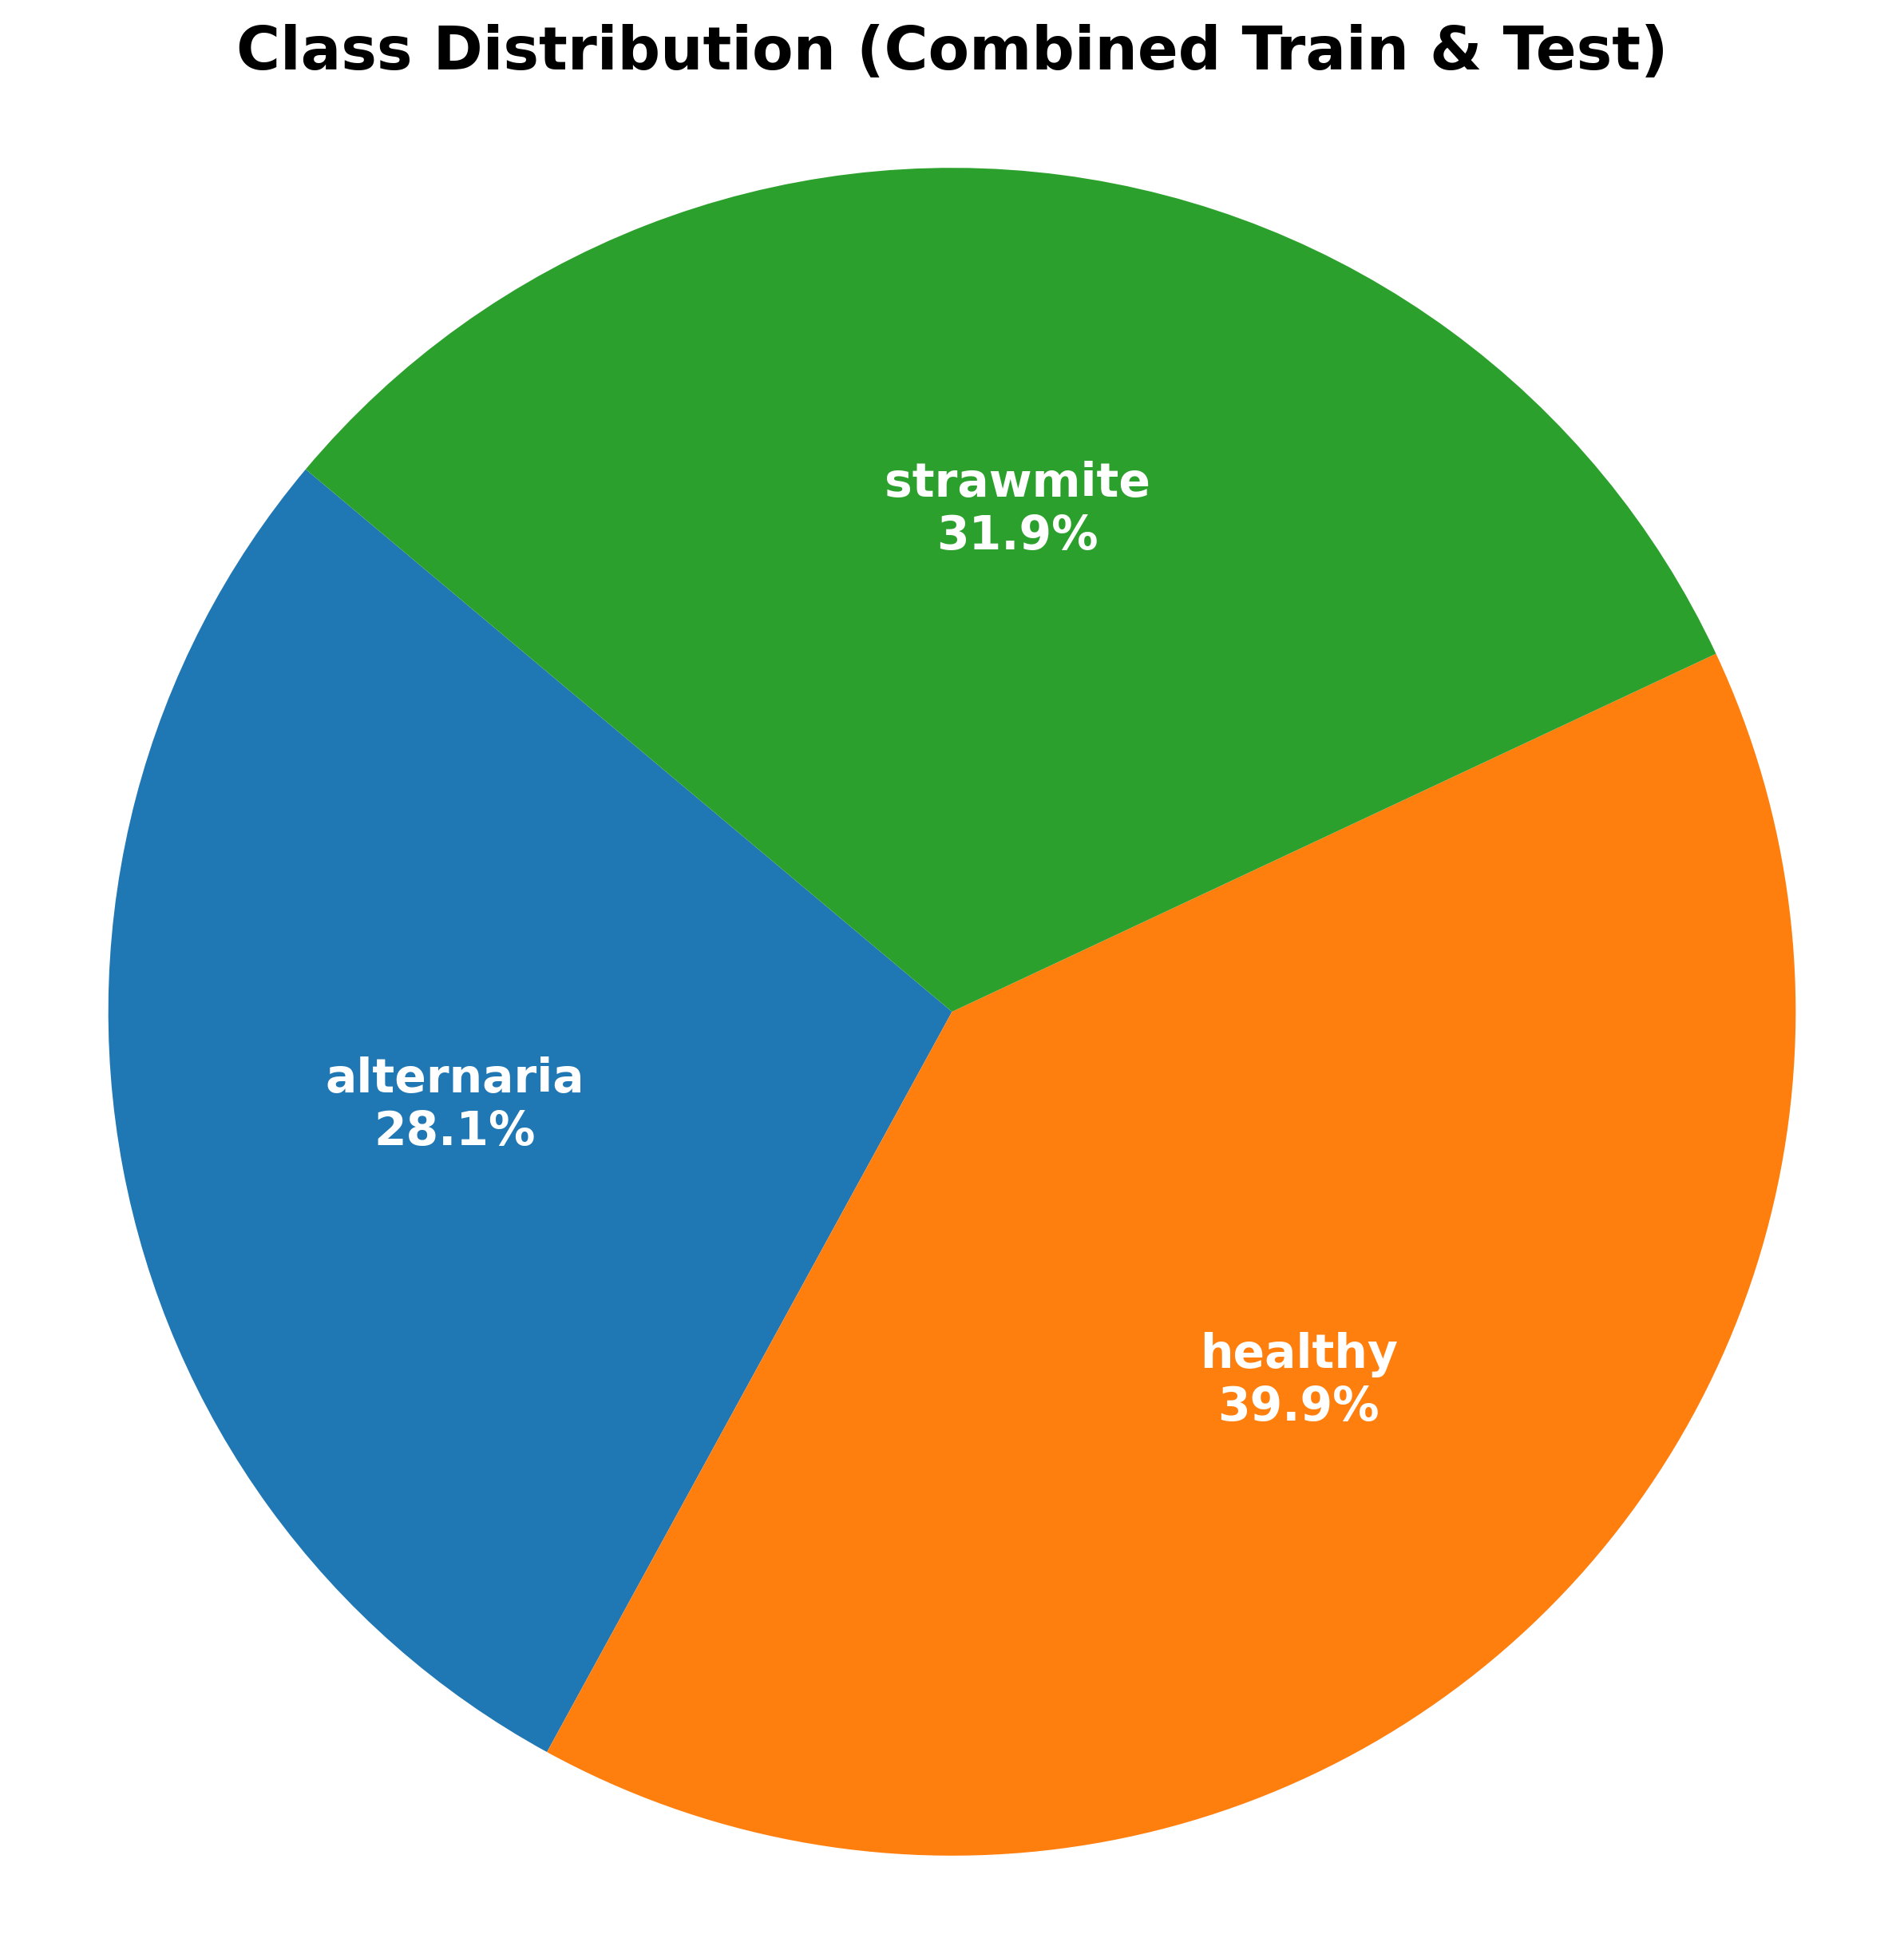

In [4]:
import os
import matplotlib.pyplot as plt

# Set base dataset path
base_path = "/kaggle/input/leaf-data/Leaf_Dataset"

#  Class names
class_names = ['alternaria', 'healthy', 'strawmite']
class_counts = {cls: 0 for cls in class_names}

# Count images in Train and Test combined
for split in ['Train', 'Test']:
    for cls in class_names:
        class_dir = os.path.join(base_path, split, cls)
        if os.path.isdir(class_dir):
            class_counts[cls] += len(os.listdir(class_dir))

# Custom autopct function to include class name
def make_autopct(values, labels):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        label = labels[len(used)]  # use global counter to track index
        used.append(label)
        return f'{label}\n{pct:.1f}%'
    used = []
    return my_autopct

# Plot pie chart
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
wedges, texts, autotexts = ax.pie(
    class_counts.values(),
    labels=[''] * len(class_counts),  # Hide outer labels
    autopct=make_autopct(list(class_counts.values()), list(class_counts.keys())),
    textprops=dict(color="white", fontsize=14, weight='bold'),
    startangle=140
)

ax.set_title('Class Distribution (Combined Train & Test)', fontsize=18, weight='bold')
ax.axis('equal')

# Save figure
plt.savefig("class_distribution_inside_labels.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2  # Reduced from 4
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    plots_dir = 'plots'  # New directory for plots
    
    # Model parameters
    num_classes = 3  # Update based on your dataset

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            # First conv block
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            
            # Skip connection
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)  # Main path
            skip = res_block[-1](identity)  # Skip connection
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# 5. UPDATED: Plotting Functions
def save_training_plots(train_losses, val_losses, train_accs, val_accs, config):
    """Save training and validation loss and accuracy plots side by side"""
    plt.style.use('seaborn-v0_8')  # Use modern style
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    epochs = range(1, len(train_losses) + 1)
    
    # Loss plot
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2, marker='o', markersize=4)
    ax1.plot(epochs, val_losses, 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=4)
    ax1.set_title('Training and Validation Loss', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Epochs', fontsize=14)
    ax1.set_ylabel('Loss', fontsize=14)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=12)
    
    # Accuracy plot
    ax2.plot(epochs, train_accs, 'b-', label='Training Accuracy', linewidth=2, marker='o', markersize=4)
    ax2.plot(epochs, val_accs, 'r-', label='Validation Accuracy', linewidth=2, marker='s', markersize=4)
    ax2.set_title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Epochs', fontsize=14)
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=12)
    
    plt.tight_layout()
    
    # Save with 300 DPI
    plot_path = os.path.join(config.plots_dir, 'training_metrics.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Training metrics plot saved to: {plot_path}")

def save_confusion_matrix(labels, preds, class_names, config, epoch=None):
    """Save both regular and normalized confusion matrices as separate high-quality images"""
    cm = confusion_matrix(labels, preds)
    
    # 1. Regular Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 14})
    
    plt.title('Confusion Matrix', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add accuracy information
    accuracy = np.trace(cm) / np.sum(cm)
    plt.figtext(0.02, 0.02, f'Overall Accuracy: {accuracy:.3f}', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    
    # Save regular confusion matrix with 300 DPI
    if epoch is not None:
        filename = f'confusion_matrix_epoch_{epoch}.png'
    else:
        filename = 'confusion_matrix_best.png'
    
    cm_path = os.path.join(config.plots_dir, filename)
    plt.savefig(cm_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Confusion matrix saved to: {cm_path}")
    
    # 2. Normalized Confusion Matrix (Row-normalized)
    cm_normalized = normalize(cm, axis=1, norm='l1')  # Normalize by rows (true labels)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8, 'label': 'Proportion'}, 
                annot_kws={'size': 14})
    
    plt.title('Normalized Confusion Matrix (Row-Normalized)', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add accuracy information
    plt.figtext(0.02, 0.02, f'Overall Accuracy: {accuracy:.3f}', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    
    # Save normalized confusion matrix with 300 DPI
    if epoch is not None:
        norm_filename = f'confusion_matrix_normalized_epoch_{epoch}.png'
    else:
        norm_filename = 'confusion_matrix_normalized_best.png'
    
    norm_cm_path = os.path.join(config.plots_dir, norm_filename)
    plt.savefig(norm_cm_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Normalized confusion matrix saved to: {norm_cm_path}")
    
    # 3. Side-by-side comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Regular CM
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 12}, ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    # Normalized CM
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8, 'label': 'Proportion'}, 
                annot_kws={'size': 12}, ax=ax2)
    ax2.set_title('Normalized Confusion Matrix (Proportions)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    plt.suptitle(f'Confusion Matrix Comparison - Accuracy: {accuracy:.3f}', 
                 fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    # Save comparison plot with 300 DPI
    if epoch is not None:
        comp_filename = f'confusion_matrix_comparison_epoch_{epoch}.png'
    else:
        comp_filename = 'confusion_matrix_comparison_best.png'
    
    comp_path = os.path.join(config.plots_dir, comp_filename)
    plt.savefig(comp_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Confusion matrix comparison saved to: {comp_path}")

def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels

# 6. Main Training Loop (UNCHANGED - just using updated plotting functions)
def train_model(config):
    set_seed(config.seed)
    
    # Create directories
    os.makedirs(config.model_dir, exist_ok=True)
    os.makedirs(config.plots_dir, exist_ok=True)  # Create plots directory
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model, criterion, optimizer setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    early_stopping = EarlyStopping(patience=5)
    
    # Lists to store metrics for plotting
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    # Training loop
    best_val_acc = 0
    best_preds = None
    best_labels = None
    
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels = validate(
            model, val_loader, criterion, config
        )
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model and store best predictions
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_preds = preds
            best_labels = labels
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes, digits=3))
        
        # Save plots every 5 epochs and at the end
        if (epoch + 1) % 5 == 0 or epoch == config.num_epochs - 1:
            save_training_plots(train_losses, val_losses, train_accs, val_accs, config)
    
    # Save final plots and confusion matrices
    save_training_plots(train_losses, val_losses, train_accs, val_accs, config)
    
    if best_preds is not None and best_labels is not None:
        save_confusion_matrix(best_labels, best_preds, train_dataset.classes, config)
    
    # Save training history as CSV
    history_df = pd.DataFrame({
        'epoch': range(1, len(train_losses) + 1),
        'train_loss': train_losses,
        'val_loss': val_losses,
        'train_acc': train_accs,
        'val_acc': val_accs
    })
    history_path = os.path.join(config.plots_dir, 'training_history.csv')
    history_df.to_csv(history_path, index=False)
    print(f"Training history saved to: {history_path}")
    
    print(f"Training completed. Best validation accuracy: {best_val_acc:.4f}")
    print(f"All plots saved in: {config.plots_dir}")
    return model

# 7. Run Training
if __name__ == "__main__":
    config = Config()
    model = train_model(config)


Epoch 1/30


Validation: 100%|██████████| 10/10 [00:24<00:00,  2.41s/it, Loss=1.0468, Acc=0.3289]


Train Loss: 1.1115, Train Accuracy: 0.4637
Validation Loss: 1.0468, Validation Accuracy: 0.3289

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.333     0.012     0.023        85
     healthy      0.286     0.017     0.031       120
   strawmite      0.330     1.000     0.496        96

    accuracy                          0.329       301
   macro avg      0.316     0.343     0.183       301
weighted avg      0.313     0.329     0.177       301


Epoch 2/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it, Loss=0.8958, Acc=0.5548]


Train Loss: 1.0504, Train Accuracy: 0.4911
Validation Loss: 0.8958, Validation Accuracy: 0.5548

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.600     0.459     0.520        85
     healthy      0.744     0.267     0.393       120
   strawmite      0.497     1.000     0.664        96

    accuracy                          0.555       301
   macro avg      0.614     0.575     0.526       301
weighted avg      0.625     0.555     0.515       301


Epoch 3/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.22s/it, Loss=0.8112, Acc=0.7076]


Train Loss: 1.0182, Train Accuracy: 0.5391
Validation Loss: 0.8112, Validation Accuracy: 0.7076

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.833     0.353     0.496        85
     healthy      0.813     0.725     0.767       120
   strawmite      0.608     1.000     0.756        96

    accuracy                          0.708       301
   macro avg      0.751     0.693     0.673       301
weighted avg      0.753     0.708     0.687       301


Epoch 4/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5905, Acc=0.8472]


Train Loss: 0.9345, Train Accuracy: 0.6004
Validation Loss: 0.5905, Validation Accuracy: 0.8472

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.787     0.741     0.764        85
     healthy      0.810     0.817     0.813       120
   strawmite      0.940     0.979     0.959        96

    accuracy                          0.847       301
   macro avg      0.846     0.846     0.845       301
weighted avg      0.845     0.847     0.846       301


Epoch 5/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it, Loss=0.5485, Acc=0.8671]


Train Loss: 0.8655, Train Accuracy: 0.6646
Validation Loss: 0.5485, Validation Accuracy: 0.8671

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.818     0.741     0.778        85
     healthy      0.827     0.875     0.850       120
   strawmite      0.959     0.969     0.964        96

    accuracy                          0.867       301
   macro avg      0.868     0.862     0.864       301
weighted avg      0.866     0.867     0.866       301

Training metrics plot saved to: plots/training_metrics.png

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.21s/it, Loss=0.7382, Acc=0.7575]


Train Loss: 0.8285, Train Accuracy: 0.6897
Validation Loss: 0.7382, Validation Accuracy: 0.7575

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.5421, Acc=0.8638]


Train Loss: 0.8150, Train Accuracy: 0.7026
Validation Loss: 0.5421, Validation Accuracy: 0.8638

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.5797, Acc=0.8206]


Train Loss: 0.7443, Train Accuracy: 0.7344
Validation Loss: 0.5797, Validation Accuracy: 0.8206

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.5955, Acc=0.7973]


Train Loss: 0.7253, Train Accuracy: 0.7533
Validation Loss: 0.5955, Validation Accuracy: 0.7973

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.20s/it, Loss=0.6059, Acc=0.7874]


Train Loss: 0.6620, Train Accuracy: 0.7969
Validation Loss: 0.6059, Validation Accuracy: 0.7874
Training metrics plot saved to: plots/training_metrics.png

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.5619, Acc=0.8571]


Train Loss: 0.6364, Train Accuracy: 0.8069
Validation Loss: 0.5619, Validation Accuracy: 0.8571

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.4942, Acc=0.9003]


Train Loss: 0.6834, Train Accuracy: 0.7768
Validation Loss: 0.4942, Validation Accuracy: 0.9003

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.967     0.694     0.808        85
     healthy      0.825     0.983     0.897       120
   strawmite      0.969     0.979     0.974        96

    accuracy                          0.900       301
   macro avg      0.920     0.886     0.893       301
weighted avg      0.911     0.900     0.897       301


Epoch 13/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it, Loss=0.6077, Acc=0.8439]


Train Loss: 0.6391, Train Accuracy: 0.8125
Validation Loss: 0.6077, Validation Accuracy: 0.8439

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.4817, Acc=0.8970]


Train Loss: 0.6133, Train Accuracy: 0.8253
Validation Loss: 0.4817, Validation Accuracy: 0.8970

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.5922, Acc=0.8571]


Train Loss: 0.5894, Train Accuracy: 0.8393
Validation Loss: 0.5922, Validation Accuracy: 0.8571
Training metrics plot saved to: plots/training_metrics.png

Epoch 16/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.15s/it, Loss=0.4502, Acc=0.9236]


Train Loss: 0.5898, Train Accuracy: 0.8438
Validation Loss: 0.4502, Validation Accuracy: 0.9236

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.971     0.788     0.870        85
     healthy      0.906     0.958     0.931       120
   strawmite      0.914     1.000     0.955        96

    accuracy                          0.924       301
   macro avg      0.930     0.916     0.919       301
weighted avg      0.927     0.924     0.922       301


Epoch 17/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.4613, Acc=0.9236]


Train Loss: 0.5424, Train Accuracy: 0.8722
Validation Loss: 0.4613, Validation Accuracy: 0.9236

Epoch 18/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.4434, Acc=0.9435]


Train Loss: 0.5305, Train Accuracy: 0.8789
Validation Loss: 0.4434, Validation Accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.973     0.847     0.906        85
     healthy      0.951     0.967     0.959       120
   strawmite      0.914     1.000     0.955        96

    accuracy                          0.944       301
   macro avg      0.946     0.938     0.940       301
weighted avg      0.945     0.944     0.943       301


Epoch 19/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.4175, Acc=0.9369]


Train Loss: 0.5185, Train Accuracy: 0.8912
Validation Loss: 0.4175, Validation Accuracy: 0.9369

Epoch 20/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.4387, Acc=0.9236]


Train Loss: 0.5052, Train Accuracy: 0.8956
Validation Loss: 0.4387, Validation Accuracy: 0.9236
Training metrics plot saved to: plots/training_metrics.png

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.4198, Acc=0.9435]


Train Loss: 0.4932, Train Accuracy: 0.9012
Validation Loss: 0.4198, Validation Accuracy: 0.9435

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it, Loss=0.4225, Acc=0.9402]


Train Loss: 0.4826, Train Accuracy: 0.9046
Validation Loss: 0.4225, Validation Accuracy: 0.9402

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.4141, Acc=0.9568]


Train Loss: 0.5085, Train Accuracy: 0.8839
Validation Loss: 0.4141, Validation Accuracy: 0.9568

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.963     0.906     0.933        85
     healthy      0.966     0.958     0.962       120
   strawmite      0.941     1.000     0.970        96

    accuracy                          0.957       301
   macro avg      0.957     0.955     0.955       301
weighted avg      0.957     0.957     0.956       301


Epoch 24/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.5010, Acc=0.9003]


Train Loss: 0.5512, Train Accuracy: 0.8728
Validation Loss: 0.5010, Validation Accuracy: 0.9003

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.16s/it, Loss=0.4337, Acc=0.9203]


Train Loss: 0.5491, Train Accuracy: 0.8661
Validation Loss: 0.4337, Validation Accuracy: 0.9203
Training metrics plot saved to: plots/training_metrics.png

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.4353, Acc=0.9302]


Train Loss: 0.5258, Train Accuracy: 0.8856
Validation Loss: 0.4353, Validation Accuracy: 0.9302

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:22<00:00,  2.29s/it, Loss=0.5037, Acc=0.8937]


Train Loss: 0.5344, Train Accuracy: 0.8767
Validation Loss: 0.5037, Validation Accuracy: 0.8937

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.4124, Acc=0.9502]


Train Loss: 0.5135, Train Accuracy: 0.8895
Validation Loss: 0.4124, Validation Accuracy: 0.9502

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.18s/it, Loss=0.5174, Acc=0.8538]


Train Loss: 0.5127, Train Accuracy: 0.8901
Validation Loss: 0.5174, Validation Accuracy: 0.8538

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:21<00:00,  2.19s/it, Loss=0.4117, Acc=0.9601]


Train Loss: 0.5023, Train Accuracy: 0.8968
Validation Loss: 0.4117, Validation Accuracy: 0.9601

Classification Report:
              precision    recall  f1-score   support

  alternaria      1.000     0.871     0.931        85
     healthy      0.930     0.992     0.960       120
   strawmite      0.970     1.000     0.985        96

    accuracy                          0.960       301
   macro avg      0.966     0.954     0.958       301
weighted avg      0.962     0.960     0.959       301

Training metrics plot saved to: plots/training_metrics.png
Training metrics plot saved to: plots/training_metrics.png
Confusion matrix saved to: plots/confusion_matrix_best.png
Normalized confusion matrix saved to: plots/confusion_matrix_normalized_best.png
Confusion matrix comparison saved to: plots/confusion_matrix_comparison_best.png
Training history saved to: plots/training_history.csv
Training completed. Best validation accuracy: 0.9601
All plots saved in: plots


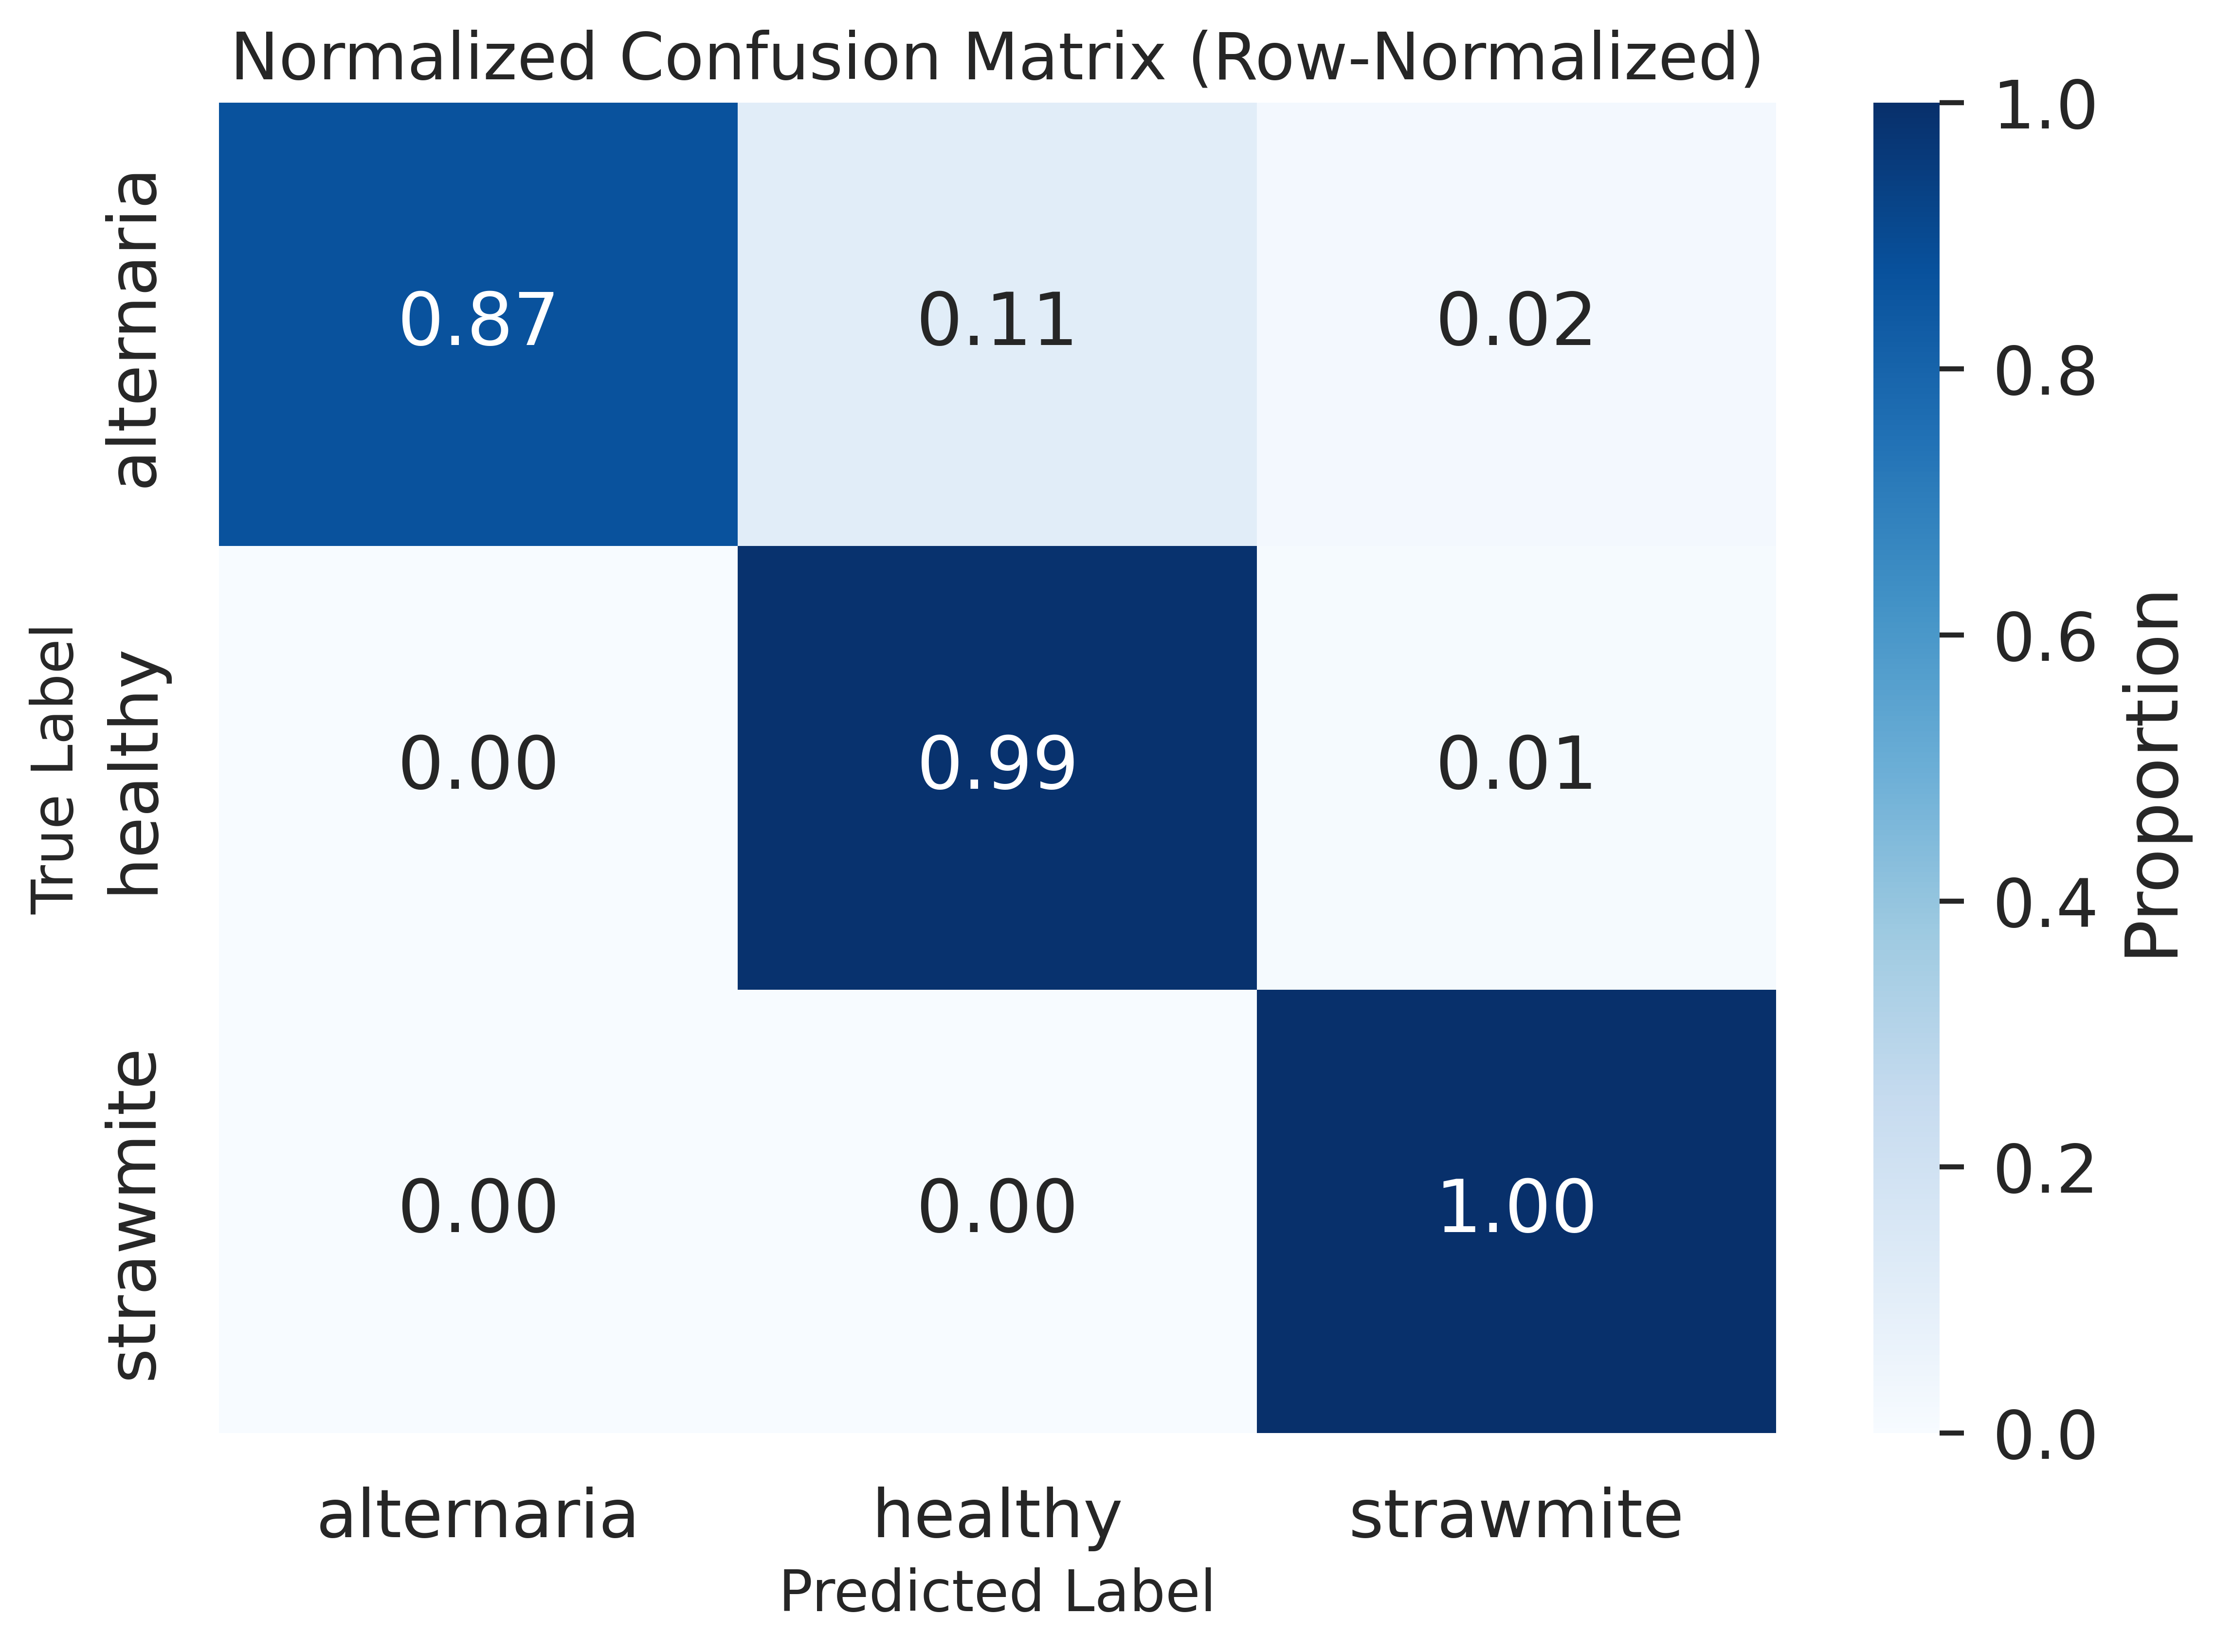

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalized confusion matrix
cm = np.array([
    [0.87, 0.11, 0.02],
    [0.00, 0.99, 0.01],
    [0.00, 0.00, 1.00]
])

# Class labels
labels = ['alternaria', 'healthy', 'strawmite']

# Plot and save
plt.figure(figsize=(8, 6), dpi=600)
sns.set(font_scale=1.5)
ax = sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=labels, yticklabels=labels,
                 cbar_kws={'label': 'Proportion'})

plt.title('Normalized Confusion Matrix (Row-Normalized)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.tight_layout()
plt.savefig("enhanced_normalized_confusion_matrix.png", format='png', dpi=600)
plt.show()


In [3]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

# 1. Configuration and Setup
class Config:
    seed = 42
    num_epochs = 30
    batch_size = 32
    image_size = 224
    num_workers = 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Training parameters
    learning_rate = 1e-4
    weight_decay = 1e-4
    label_smoothing = 0.1
    
    # Paths
    data_dir = '/kaggle/input/leaf-data/Leaf_Dataset'
    model_dir = 'models'
    plots_dir = 'plots'
    
    # Model parameters
    num_classes = 3

# Set seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 2. Data Augmentation and Dataset
class LeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

def get_transforms(config, is_training=True):
    if is_training:
        return transforms.Compose([
            transforms.RandomResizedCrop(config.image_size),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])
    else:
        return transforms.Compose([
            transforms.Resize((config.image_size, config.image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.6786, 0.7230, 0.5592], 
                               std=[0.2392, 0.1975, 0.3486])
        ])

# 3. Model Architecture
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.squeeze(x).view(b, c)
        y = self.excitation(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class ImprovedLeafCNN(nn.Module):
    def __init__(self, num_classes):
        super(ImprovedLeafCNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        
        self.res_blocks = nn.ModuleList([
            self._make_residual_block(64, 128),
            self._make_residual_block(128, 256),
            self._make_residual_block(256, 512)
        ])
        
        self.se_blocks = nn.ModuleList([
            SEBlock(128),
            SEBlock(256),
            SEBlock(512)
        ])
        
        self.global_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.AdaptiveMaxPool2d(1)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def _make_residual_block(self, in_channels, out_channels):
        layers = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        )
        return layers
    
    def forward(self, x):
        x = self.conv1(x)
        
        for res_block, se_block in zip(self.res_blocks, self.se_blocks):
            identity = x
            x = res_block[:-1](x)
            skip = res_block[-1](identity)
            x = x + skip
            x = se_block(x)
            x = F.relu(x)
        
        avg_pool = self.global_pool[0](x)
        max_pool = self.global_pool[1](x)
        x = torch.cat([avg_pool, max_pool], dim=1)
        
        x = self.classifier(x)
        return x

# 4. Training Utils
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# UPDATED: Parameter counting and model size calculation functions
def count_parameters(model):
    """Count total and trainable parameters in the model"""
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

def get_model_size(model):
    """Calculate model size in MB (in-memory)"""
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()
    
    size_all_mb = (param_size + buffer_size) / 1024**2
    return size_all_mb

def get_saved_model_size(model_path):
    """Get actual saved model file size in MB"""
    if os.path.exists(model_path):
        size_bytes = os.path.getsize(model_path)
        size_mb = size_bytes / 1024**2
        return size_mb
    return 0

# 5. Plotting Functions
def save_training_plots(train_losses, val_losses, train_accs, val_accs, config):
    """Save training and validation loss and accuracy plots side by side"""
    try:
        plt.style.use('seaborn-v0_8')
    except OSError:
        sns.set_theme(style='whitegrid')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    epochs = range(1, len(train_losses) + 1)
    
    # Loss plot
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2, marker='o', markersize=4)
    ax1.plot(epochs, val_losses, 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=4)
    ax1.set_title('Training and Validation Loss', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Epochs', fontsize=14)
    ax1.set_ylabel('Loss', fontsize=14)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelsize=12)
    
    # Accuracy plot
    ax2.plot(epochs, train_accs, 'b-', label='Training Accuracy', linewidth=2, marker='o', markersize=4)
    ax2.plot(epochs, val_accs, 'r-', label='Validation Accuracy', linewidth=2, marker='s', markersize=4)
    ax2.set_title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Epochs', fontsize=14)
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(labelsize=12)
    
    plt.tight_layout()
    
    plot_path = os.path.join(config.plots_dir, 'training_metrics.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Training metrics plot saved to: {plot_path}")

def save_confusion_matrix(labels, preds, class_names, config, epoch=None):
    """Save both regular and normalized confusion matrices as separate high-quality images"""
    cm = confusion_matrix(labels, preds)
    
    # 1. Regular Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 14})
    
    plt.title('Confusion Matrix', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    accuracy = np.trace(cm) / np.sum(cm)
    plt.figtext(0.02, 0.02, f'Overall Accuracy: {accuracy:.3f}', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    
    if epoch is not None:
        filename = f'confusion_matrix_epoch_{epoch}.png'
    else:
        filename = 'confusion_matrix_best.png'
    
    cm_path = os.path.join(config.plots_dir, filename)
    plt.savefig(cm_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Confusion matrix saved to: {cm_path}")
    
    # 2. Normalized Confusion Matrix
    cm_normalized = normalize(cm, axis=1, norm='l1')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8, 'label': 'Proportion'}, 
                annot_kws={'size': 14})
    
    plt.title('Normalized Confusion Matrix (Row-Normalized)', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.figtext(0.02, 0.02, f'Overall Accuracy: {accuracy:.3f}', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    
    if epoch is not None:
        norm_filename = f'confusion_matrix_normalized_epoch_{epoch}.png'
    else:
        norm_filename = 'confusion_matrix_normalized_best.png'
    
    norm_cm_path = os.path.join(config.plots_dir, norm_filename)
    plt.savefig(norm_cm_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Normalized confusion matrix saved to: {norm_cm_path}")
    
    # 3. Side-by-side comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8}, annot_kws={'size': 12}, ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'shrink': 0.8, 'label': 'Proportion'}, 
                annot_kws={'size': 12}, ax=ax2)
    ax2.set_title('Normalized Confusion Matrix (Proportions)', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
    
    plt.suptitle(f'Confusion Matrix Comparison - Accuracy: {accuracy:.3f}', 
                 fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    
    if epoch is not None:
        comp_filename = f'confusion_matrix_comparison_epoch_{epoch}.png'
    else:
        comp_filename = 'confusion_matrix_comparison_best.png'
    
    comp_path = os.path.join(config.plots_dir, comp_filename)
    plt.savefig(comp_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    plt.close()
    print(f"Confusion matrix comparison saved to: {comp_path}")

# 6. Training Functions
def train_epoch(model, train_loader, criterion, optimizer, scheduler, scaler, config):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    
    pbar = tqdm(train_loader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(config.device), labels.to(config.device)
        
        optimizer.zero_grad()
        
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(images)
            loss = criterion(outputs, labels)
        
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        
        if scheduler is not None:
            scheduler.step()
        
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        losses.update(loss.item(), images.size(0))
        accuracies.update(acc.item(), images.size(0))
        
        pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                         'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg

def validate(model, val_loader, criterion, config):
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        pbar = tqdm(val_loader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(config.device), labels.to(config.device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            preds = outputs.argmax(dim=1)
            acc = (preds == labels).float().mean()
            
            losses.update(loss.item(), images.size(0))
            accuracies.update(acc.item(), images.size(0))
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.set_postfix({'Loss': f'{losses.avg:.4f}', 
                            'Acc': f'{accuracies.avg:.4f}'})
    
    return losses.avg, accuracies.avg, all_preds, all_labels

# 7. Main Training Loop
def train_model(config):
    set_seed(config.seed)
    
    # Create directories
    os.makedirs(config.model_dir, exist_ok=True)
    os.makedirs(config.plots_dir, exist_ok=True)
    
    # Data preparation
    train_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Train'),
        transform=get_transforms(config, is_training=True)
    )
    val_dataset = ImageFolder(
        root=os.path.join(config.data_dir, 'Test'),
        transform=get_transforms(config, is_training=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )
    
    # Model setup
    model = ImprovedLeafCNN(config.num_classes).to(config.device)
    
    # UPDATED: Print parameter counts and model size
    total_params, trainable_params = count_parameters(model)
    model_size_mb = get_model_size(model)
    
    print(f"\n{'='*70}")
    print(f"{'Model Architecture: ImprovedLeafCNN':^70}")
    print(f"{'='*70}")
    print(f"  Total parameters:        {total_params:>15,}")
    print(f"  Trainable parameters:    {trainable_params:>15,}")
    print(f"  Non-trainable parameters:{total_params - trainable_params:>15,}")
    print(f"  Model size (in-memory):  {model_size_mb:>15.3f} MB")
    print(f"{'='*70}\n")
    
    criterion = nn.CrossEntropyLoss(label_smoothing=config.label_smoothing)
    optimizer = optim.AdamW(
        model.parameters(),
        lr=config.learning_rate,
        weight_decay=config.weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=5, T_mult=2, eta_min=1e-6
    )
    scaler = torch.amp.GradScaler()
    early_stopping = EarlyStopping(patience=5)
    
    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    # Training loop
    best_val_acc = 0
    best_preds = None
    best_labels = None
    
    for epoch in range(config.num_epochs):
        print(f'\nEpoch {epoch + 1}/{config.num_epochs}')
        
        train_loss, train_acc = train_epoch(
            model, train_loader, criterion, optimizer, scheduler, scaler, config
        )
        
        val_loss, val_acc, preds, labels = validate(
            model, val_loader, criterion, config
        )
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
        
        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_preds = preds
            best_labels = labels
            torch.save(model.state_dict(), 
                      os.path.join(config.model_dir, 'best_model.pth'))
            
            # Generate classification report
            print('\nClassification Report:')
            print(classification_report(labels, preds, 
                                     target_names=train_dataset.classes, digits=3))
        
        # Save plots every 5 epochs and at the end
        if (epoch + 1) % 5 == 0 or epoch == config.num_epochs - 1:
            save_training_plots(train_losses, val_losses, train_accs, val_accs, config)
    
    # Save final plots and confusion matrices
    save_training_plots(train_losses, val_losses, train_accs, val_accs, config)
    
    if best_preds is not None and best_labels is not None:
        save_confusion_matrix(best_labels, best_preds, train_dataset.classes, config)
    
    # Save training history
    history_df = pd.DataFrame({
        'epoch': range(1, len(train_losses) + 1),
        'train_loss': train_losses,
        'val_loss': val_losses,
        'train_acc': train_accs,
        'val_acc': val_accs
    })
    history_path = os.path.join(config.plots_dir, 'training_history.csv')
    history_df.to_csv(history_path, index=False)
    print(f"Training history saved to: {history_path}")
    
    # UPDATED: Print both in-memory and saved file size
    best_model_path = os.path.join(config.model_dir, 'best_model.pth')
    saved_size_mb = get_saved_model_size(best_model_path)
    
    print(f"\n{'='*70}")
    print(f"{'Training Summary':^70}")
    print(f"{'='*70}")
    print(f"  Best validation accuracy:    {best_val_acc:>15.4f}")
    print(f"  Model size (in-memory):      {model_size_mb:>15.3f} MB")
    print(f"  Model size (saved file):     {saved_size_mb:>15.3f} MB")
    print(f"  All plots saved in:          {config.plots_dir}")
    print(f"  Model saved in:              {config.model_dir}")
    print(f"{'='*70}\n")
    
    return model

# 8. Run Training
if __name__ == "__main__":
    config = Config()
    model = train_model(config)



                 Model Architecture: ImprovedLeafCNN                  
  Total parameters:              5,534,211
  Trainable parameters:          5,534,211
  Non-trainable parameters:              0
  Model size (in-memory):           21.131 MB


Epoch 1/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it, Loss=1.0468, Acc=0.3289]


Train Loss: 1.1115, Train Accuracy: 0.4637
Validation Loss: 1.0468, Validation Accuracy: 0.3289

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.333     0.012     0.023        85
     healthy      0.286     0.017     0.031       120
   strawmite      0.330     1.000     0.496        96

    accuracy                          0.329       301
   macro avg      0.316     0.343     0.183       301
weighted avg      0.313     0.329     0.177       301


Epoch 2/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it, Loss=0.8958, Acc=0.5548]


Train Loss: 1.0504, Train Accuracy: 0.4911
Validation Loss: 0.8958, Validation Accuracy: 0.5548

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.600     0.459     0.520        85
     healthy      0.744     0.267     0.393       120
   strawmite      0.497     1.000     0.664        96

    accuracy                          0.555       301
   macro avg      0.614     0.575     0.526       301
weighted avg      0.625     0.555     0.515       301


Epoch 3/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it, Loss=0.8112, Acc=0.7076]


Train Loss: 1.0182, Train Accuracy: 0.5391
Validation Loss: 0.8112, Validation Accuracy: 0.7076

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.833     0.353     0.496        85
     healthy      0.813     0.725     0.767       120
   strawmite      0.608     1.000     0.756        96

    accuracy                          0.708       301
   macro avg      0.751     0.693     0.673       301
weighted avg      0.753     0.708     0.687       301


Epoch 4/30


Validation: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it, Loss=0.5905, Acc=0.8472]


Train Loss: 0.9345, Train Accuracy: 0.6004
Validation Loss: 0.5905, Validation Accuracy: 0.8472

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.787     0.741     0.764        85
     healthy      0.810     0.817     0.813       120
   strawmite      0.940     0.979     0.959        96

    accuracy                          0.847       301
   macro avg      0.846     0.846     0.845       301
weighted avg      0.845     0.847     0.846       301


Epoch 5/30


Validation: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it, Loss=0.5485, Acc=0.8671]


Train Loss: 0.8655, Train Accuracy: 0.6646
Validation Loss: 0.5485, Validation Accuracy: 0.8671

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.818     0.741     0.778        85
     healthy      0.827     0.875     0.850       120
   strawmite      0.959     0.969     0.964        96

    accuracy                          0.867       301
   macro avg      0.868     0.862     0.864       301
weighted avg      0.866     0.867     0.866       301

Training metrics plot saved to: plots/training_metrics.png

Epoch 6/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it, Loss=0.7382, Acc=0.7575]


Train Loss: 0.8285, Train Accuracy: 0.6897
Validation Loss: 0.7382, Validation Accuracy: 0.7575

Epoch 7/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it, Loss=0.5421, Acc=0.8638]


Train Loss: 0.8150, Train Accuracy: 0.7026
Validation Loss: 0.5421, Validation Accuracy: 0.8638

Epoch 8/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it, Loss=0.5797, Acc=0.8206]


Train Loss: 0.7443, Train Accuracy: 0.7344
Validation Loss: 0.5797, Validation Accuracy: 0.8206

Epoch 9/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it, Loss=0.5955, Acc=0.7973]


Train Loss: 0.7253, Train Accuracy: 0.7533
Validation Loss: 0.5955, Validation Accuracy: 0.7973

Epoch 10/30


Validation: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it, Loss=0.6059, Acc=0.7874]


Train Loss: 0.6620, Train Accuracy: 0.7969
Validation Loss: 0.6059, Validation Accuracy: 0.7874
Training metrics plot saved to: plots/training_metrics.png

Epoch 11/30


Validation: 100%|██████████| 10/10 [00:19<00:00,  1.97s/it, Loss=0.5619, Acc=0.8571]


Train Loss: 0.6364, Train Accuracy: 0.8069
Validation Loss: 0.5619, Validation Accuracy: 0.8571

Epoch 12/30


Validation: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it, Loss=0.4942, Acc=0.9003]


Train Loss: 0.6834, Train Accuracy: 0.7768
Validation Loss: 0.4942, Validation Accuracy: 0.9003

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.967     0.694     0.808        85
     healthy      0.825     0.983     0.897       120
   strawmite      0.969     0.979     0.974        96

    accuracy                          0.900       301
   macro avg      0.920     0.886     0.893       301
weighted avg      0.911     0.900     0.897       301


Epoch 13/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.00s/it, Loss=0.6077, Acc=0.8439]


Train Loss: 0.6391, Train Accuracy: 0.8125
Validation Loss: 0.6077, Validation Accuracy: 0.8439

Epoch 14/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it, Loss=0.4817, Acc=0.8970]


Train Loss: 0.6133, Train Accuracy: 0.8253
Validation Loss: 0.4817, Validation Accuracy: 0.8970

Epoch 15/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.02s/it, Loss=0.5922, Acc=0.8571]


Train Loss: 0.5894, Train Accuracy: 0.8393
Validation Loss: 0.5922, Validation Accuracy: 0.8571
Training metrics plot saved to: plots/training_metrics.png

Epoch 16/30


Training:  61%|██████    | 34/56 [01:12<00:38,  1.77s/it, Loss=0.5925, Acc=0.8493]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/data

Train Loss: 0.5898, Train Accuracy: 0.8438
Validation Loss: 0.4502, Validation Accuracy: 0.9236

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.971     0.788     0.870        85
     healthy      0.906     0.958     0.931       120
   strawmite      0.914     1.000     0.955        96

    accuracy                          0.924       301
   macro avg      0.930     0.916     0.919       301
weighted avg      0.927     0.924     0.922       301


Epoch 17/30


Training:  34%|███▍      | 19/56 [00:39<01:15,  2.05s/it, Loss=0.5758, Acc=0.8536]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Training:  36%|███▌      | 20/56 [00:41<01:10,  1.96s/it, Loss=0.5756, Acc=0.8531]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdo

Train Loss: 0.5424, Train Accuracy: 0.8722
Validation Loss: 0.4613, Validation Accuracy: 0.9236

Epoch 18/30


Training:  32%|███▏      | 18/56 [00:39<01:21,  2.14s/it, Loss=0.5219, Acc=0.8819]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Training:  34%|███▍      | 19/56 [00:41<01:18,  2.13s/it, Loss=0.5297, Acc=0.8750]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdo

Train Loss: 0.5305, Train Accuracy: 0.8789
Validation Loss: 0.4434, Validation Accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.973     0.847     0.906        85
     healthy      0.951     0.967     0.959       120
   strawmite      0.914     1.000     0.955        96

    accuracy                          0.944       301
   macro avg      0.946     0.938     0.940       301
weighted avg      0.945     0.944     0.943       301


Epoch 19/30


Training:  32%|███▏      | 18/56 [00:39<01:12,  1.90s/it, Loss=0.5265, Acc=0.8715]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/data

Train Loss: 0.5185, Train Accuracy: 0.8912
Validation Loss: 0.4175, Validation Accuracy: 0.9369

Epoch 20/30


Training:  32%|███▏      | 18/56 [00:40<01:10,  1.85s/it, Loss=0.5217, Acc=0.8837]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1460, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bcf77f4cf70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1477, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/data

Train Loss: 0.5052, Train Accuracy: 0.8956
Validation Loss: 0.4387, Validation Accuracy: 0.9236
Training metrics plot saved to: plots/training_metrics.png

Epoch 21/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it, Loss=0.4198, Acc=0.9435]


Train Loss: 0.4932, Train Accuracy: 0.9012
Validation Loss: 0.4198, Validation Accuracy: 0.9435

Epoch 22/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it, Loss=0.4225, Acc=0.9402]


Train Loss: 0.4826, Train Accuracy: 0.9046
Validation Loss: 0.4225, Validation Accuracy: 0.9402

Epoch 23/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.08s/it, Loss=0.4141, Acc=0.9568]


Train Loss: 0.5085, Train Accuracy: 0.8839
Validation Loss: 0.4141, Validation Accuracy: 0.9568

Classification Report:
              precision    recall  f1-score   support

  alternaria      0.963     0.906     0.933        85
     healthy      0.966     0.958     0.962       120
   strawmite      0.941     1.000     0.970        96

    accuracy                          0.957       301
   macro avg      0.957     0.955     0.955       301
weighted avg      0.957     0.957     0.956       301


Epoch 24/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it, Loss=0.5010, Acc=0.9003]


Train Loss: 0.5512, Train Accuracy: 0.8728
Validation Loss: 0.5010, Validation Accuracy: 0.9003

Epoch 25/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it, Loss=0.4337, Acc=0.9203]


Train Loss: 0.5491, Train Accuracy: 0.8661
Validation Loss: 0.4337, Validation Accuracy: 0.9203
Training metrics plot saved to: plots/training_metrics.png

Epoch 26/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it, Loss=0.4353, Acc=0.9302]


Train Loss: 0.5258, Train Accuracy: 0.8856
Validation Loss: 0.4353, Validation Accuracy: 0.9302

Epoch 27/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it, Loss=0.5037, Acc=0.8937]


Train Loss: 0.5344, Train Accuracy: 0.8767
Validation Loss: 0.5037, Validation Accuracy: 0.8937

Epoch 28/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.04s/it, Loss=0.4124, Acc=0.9502]


Train Loss: 0.5135, Train Accuracy: 0.8895
Validation Loss: 0.4124, Validation Accuracy: 0.9502

Epoch 29/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it, Loss=0.5174, Acc=0.8538]


Train Loss: 0.5127, Train Accuracy: 0.8901
Validation Loss: 0.5174, Validation Accuracy: 0.8538

Epoch 30/30


Validation: 100%|██████████| 10/10 [00:20<00:00,  2.05s/it, Loss=0.4117, Acc=0.9601]


Train Loss: 0.5023, Train Accuracy: 0.8968
Validation Loss: 0.4117, Validation Accuracy: 0.9601

Classification Report:
              precision    recall  f1-score   support

  alternaria      1.000     0.871     0.931        85
     healthy      0.930     0.992     0.960       120
   strawmite      0.970     1.000     0.985        96

    accuracy                          0.960       301
   macro avg      0.966     0.954     0.958       301
weighted avg      0.962     0.960     0.959       301

Training metrics plot saved to: plots/training_metrics.png
Training metrics plot saved to: plots/training_metrics.png
Confusion matrix saved to: plots/confusion_matrix_best.png
Normalized confusion matrix saved to: plots/confusion_matrix_normalized_best.png
Confusion matrix comparison saved to: plots/confusion_matrix_comparison_best.png
Training history saved to: plots/training_history.csv

                           Training Summary                           
  Best validation accuracy:       